In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer

In [3]:
from IPython.display import HTML
from IPython.display import display

# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)


In [74]:
df= pd.read_excel(r'C:\Users\SIMRAN\Downloads\100-S_gender_data.xlsx')
df1= pd.read_excel(r'C:\Users\SIMRAN\Downloads\name_gender_classification.xlsx', index_col=0)

In [75]:
df.head()


data_sr_ID  gender name_of_person_start_with_the_head_of_household
0      390472  Female                                         Shabeen
1      391236  Female                                            Alia
2      387553    Male                               Shamshad Ali Khan
3      389200  Female                                    Zakira Begum
4      389846    Male                                      Mohd Firoz

In [76]:
df1.head()

data_sr_ID     First Name  gender gender_new
0       77105  SANDEEP KUMAR    Male       Male
1       75139        Sourabh    Male       Male
2      142337          Rajiv    Male       Male
3      155881     Mamta Devi  Female     Female
4      195370       Partibha  Female     Female

In [77]:
df.rename(columns={'name_of_person_start_with_the_head_of_household':'Name'}, inplace=True)

In [78]:
df.columns

Index(['data_sr_ID', 'gender', 'Name'], dtype='object')

In [79]:
df.dtypes

data_sr_ID     int64
gender        object
Name          object
dtype: object

In [80]:
df_names=df.copy()

In [81]:
df_names.gender.unique()

array(['Female', 'Male', 'Third Gender', nan], dtype=object)

In [82]:
df_names.drop(df_names[df_names.gender=='Third Gender'].index, inplace=True)

In [83]:
df_names.drop(df_names[df_names.gender.isna()].index, inplace=True)

In [87]:
df_names.drop(df_names[df_names.Name.isna()].index, inplace=True)

In [88]:
df_names.gender.unique()

array(['Female', 'Male'], dtype=object)

In [89]:
df_names.gender.replace({'Female':0, 'Male':1}, inplace=True)

In [90]:
df_names

data_sr_ID  gender               Name
0           390472       0            Shabeen
1           391236       0               Alia
2           387553       1  Shamshad Ali Khan
3           389200       0       Zakira Begum
4           389846       1         Mohd Firoz
5           391688       1               Ahad
6           390893       1               Asif
7           414778       1         Mohd Ashar
8           414996       0            Kishwar
9           415220       1              Nasir
10          416027       1             KASHIF
11          417784       0            Swaliha
12          419328       0     Zakiya parveen
13          414469       1              Ameen
14          416483       0             Muskan
15          416844       0              Nisha
16          417480       0              Mayra
17          421707       1    Misbahul hassan
18          422161       1      Rayyan hassan
19          413807       1          Mohd Asif
20          414867       1          Fakruddin
21          415400       0            Nargish
22          416352       0            Haseena
23          416609       1         Rais ahmed
24          418773       0       Afsana begum
25          421948       0       Meher fatima
26          417008       0             Bazila
27          417248       0              Inaya
28          417649       1             Rizwan
29          419165       1           Abdullah
...            ...     ...                ...
209541    13043838       0       Ayesha ahmed
209542    13043846       1       Zia ur haque
209543    13043863       0   Manazara khatoon
209544    13043877       1        Siraj ahmed
209545    13043892       0      Firdaus begum
209546    13043901       1         Aslam khan
209547    13043915       0              Naila
209548    13043926       0              Insha
209549    13043939       0              Aisha
209550    13043981       1           Md irfan
209551    13043996       0       Razia sultan
209552    13044010       0             Maisha
209553    13044031       0              Jarka
209554    13044042       1            Huzaifa
209555    13044071       1              Yasir
209556    13044089       0             Humera
209557    13044109       0              Maira
209558    13044154       1           Mudassar
209559    13044167       0            Shabana
209560    13044178       1    Anees ur rehman
209561    13044189       0      Shehnaz anees
209562    13044196       0        Saria anees
209563    13044205       1              Ashar
209564    13044221       1    Farhana khatoon
209565    13044231       0            Haleema
209566    13044250       0            Safoora
209567    13044261       1           Md abbas
209568    13044289       0       Sheeba naqvi
209569    13044301       1        Md saif ali
209570    13044313       1      Hussain abbas

[209520 rows x 3 columns]

In [91]:
df_names.gender.unique()

array([0, 1], dtype=int64)

In [92]:
df_names= df_names[~df_names.isna()]

In [93]:
df_names

data_sr_ID  gender               Name
0           390472       0            Shabeen
1           391236       0               Alia
2           387553       1  Shamshad Ali Khan
3           389200       0       Zakira Begum
4           389846       1         Mohd Firoz
5           391688       1               Ahad
6           390893       1               Asif
7           414778       1         Mohd Ashar
8           414996       0            Kishwar
9           415220       1              Nasir
10          416027       1             KASHIF
11          417784       0            Swaliha
12          419328       0     Zakiya parveen
13          414469       1              Ameen
14          416483       0             Muskan
15          416844       0              Nisha
16          417480       0              Mayra
17          421707       1    Misbahul hassan
18          422161       1      Rayyan hassan
19          413807       1          Mohd Asif
20          414867       1          Fakruddin
21          415400       0            Nargish
22          416352       0            Haseena
23          416609       1         Rais ahmed
24          418773       0       Afsana begum
25          421948       0       Meher fatima
26          417008       0             Bazila
27          417248       0              Inaya
28          417649       1             Rizwan
29          419165       1           Abdullah
...            ...     ...                ...
209541    13043838       0       Ayesha ahmed
209542    13043846       1       Zia ur haque
209543    13043863       0   Manazara khatoon
209544    13043877       1        Siraj ahmed
209545    13043892       0      Firdaus begum
209546    13043901       1         Aslam khan
209547    13043915       0              Naila
209548    13043926       0              Insha
209549    13043939       0              Aisha
209550    13043981       1           Md irfan
209551    13043996       0       Razia sultan
209552    13044010       0             Maisha
209553    13044031       0              Jarka
209554    13044042       1            Huzaifa
209555    13044071       1              Yasir
209556    13044089       0             Humera
209557    13044109       0              Maira
209558    13044154       1           Mudassar
209559    13044167       0            Shabana
209560    13044178       1    Anees ur rehman
209561    13044189       0      Shehnaz anees
209562    13044196       0        Saria anees
209563    13044205       1              Ashar
209564    13044221       1    Farhana khatoon
209565    13044231       0            Haleema
209566    13044250       0            Safoora
209567    13044261       1           Md abbas
209568    13044289       0       Sheeba naqvi
209569    13044301       1        Md saif ali
209570    13044313       1      Hussain abbas

[209520 rows x 3 columns]

In [94]:
df_names.dtypes

data_sr_ID     int64
gender         int64
Name          object
dtype: object

In [95]:
Xfeatures= df_names['Name']

In [96]:
Xfeatures

0                   Shabeen
1                      Alia
2         Shamshad Ali Khan
3              Zakira Begum
4                Mohd Firoz
5                      Ahad
6                      Asif
7                Mohd Ashar
8                   Kishwar
9                     Nasir
10                   KASHIF
11                  Swaliha
12           Zakiya parveen
13                    Ameen
14                   Muskan
15                    Nisha
16                    Mayra
17          Misbahul hassan
18            Rayyan hassan
19                Mohd Asif
20                Fakruddin
21                  Nargish
22                  Haseena
23               Rais ahmed
24             Afsana begum
25             Meher fatima
26                   Bazila
27                    Inaya
28                   Rizwan
29                 Abdullah
                ...        
209541         Ayesha ahmed
209542         Zia ur haque
209543     Manazara khatoon
209544          Siraj ahmed
209545        Firdau

In [97]:
cv=CountVectorizer()

In [98]:
X= cv.fit_transform(Xfeatures)

In [99]:
df_names.dtypes

data_sr_ID     int64
gender         int64
Name          object
dtype: object

In [100]:
cv.get_feature_names()

['10',
 '101',
 '12',
 '121',
 '157',
 '164',
 '174',
 '20',
 '21',
 '212',
 '217',
 '23',
 '24',
 '27',
 '279',
 '295',
 '30',
 '319',
 '40',
 '43',
 '487709314903',
 '49',
 '55',
 '61',
 '76',
 '8287561764',
 '8750448040',
 '9891689145',
 '9999302890',
 'aaaniya',
 'aaas',
 'aaasiya',
 'aabad',
 'aaban',
 'aabda',
 'aabdi',
 'aabha',
 'aabid',
 'aabida',
 'aabil',
 'aabir',
 'aabish',
 'aabrish',
 'aabru',
 'aadi',
 'aadib',
 'aadil',
 'aadish',
 'aaesha',
 'aafan',
 'aafaq',
 'aafar',
 'aafi',
 'aafia',
 'aafiya',
 'aafiza',
 'aafnan',
 'aafran',
 'aafreen',
 'aafren',
 'aafrin',
 'aafya',
 'aagra',
 'aahaan',
 'aahad',
 'aahan',
 'aahana',
 'aahayna',
 'aahfaque',
 'aahil',
 'aahin',
 'aaija',
 'aaila',
 'aaima',
 'aaiman',
 'aain',
 'aaina',
 'aaira',
 'aairah',
 'aaisa',
 'aaisar',
 'aaisha',
 'aaishia',
 'aaiya',
 'aaiz',
 'aaiza',
 'aaj',
 'aaja',
 'aajam',
 'aajay',
 'aajma',
 'aakansha',
 'aakash',
 'aakfa',
 'aakib',
 'aakif',
 'aakifa',
 'aakifah',
 'aakil',
 'aakriti',
 'a

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [103]:
X
Y= df_names['gender']

In [104]:
test_size=[x/100 for x in range(1,34)]

In [105]:
len(test_size)

33

In [106]:
ytr = []
ytst = []
for a in test_size:
    X_train1, X_test1, Y_train1, Y_test1= train_test_split(X,Y,test_size=a, random_state=42)
    clf=MultinomialNB()
    clf.fit(X_train1, Y_train1)
    ytst.append(1-clf.score(X_test1, Y_test1))
    ytr.append(1-clf.score(X_train1, Y_train1))
    print("Accuracy of model(TEST) is:",a,":",100- clf.score(X_test1, Y_test1)*100, "%")
    print("Accuracy of model(TRAIN) is:",100-a, ":", 100- clf.score(X_train1, Y_train1)*100, "%")
    print("")
    

Accuracy of model(TEST) is: 0.01 : 3.4828244274809066 %
Accuracy of model(TRAIN) is: 99.99 : 1.9284171551990141 %

Accuracy of model(TEST) is: 0.02 : 3.626819374850882 %
Accuracy of model(TRAIN) is: 99.98 : 1.928125106536342 %

Accuracy of model(TEST) is: 0.03 : 3.611199490932222 %
Accuracy of model(TRAIN) is: 99.97 : 1.9327474733558319 %

Accuracy of model(TEST) is: 0.04 : 3.436344111681194 %
Accuracy of model(TRAIN) is: 99.96 : 1.9344831186393492 %

Accuracy of model(TEST) is: 0.05 : 3.5032455135547877 %
Accuracy of model(TRAIN) is: 99.95 : 1.9322360885030463 %

Accuracy of model(TEST) is: 0.06 : 3.436207445116139 %
Accuracy of model(TRAIN) is: 99.94 : 1.9329975424985264 %

Accuracy of model(TEST) is: 0.07 : 3.395377377786872 %
Accuracy of model(TRAIN) is: 99.93 : 1.9363314909188034 %

Accuracy of model(TEST) is: 0.08 : 3.3647536093544943 %
Accuracy of model(TRAIN) is: 99.92 : 1.936106413222788 %

Accuracy of model(TEST) is: 0.09 : 3.314419048629162 %
Accuracy of model(TRAIN) is: 99.

In [107]:
x = [x for x in range(len(ytst))]

In [109]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.20, random_state=42)
clf=MultinomialNB()
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.964442535318824

In [110]:
    print("Accuracy of model(TEST) is:",a,":",clf.score(X_test, Y_test)*100, "%")
    print("Accuracy of model(TRAIN) is:",1-a, ":", clf.score(X_train, Y_train)*100, "%")
    

Accuracy of model(TEST) is: 0.33 : 96.4442535318824 %
Accuracy of model(TRAIN) is: 0.6699999999999999 : 98.08013554791906 %


In [111]:
sample_name= ['Asifa']
vect= cv.transform(sample_name).toarray()

In [112]:
for i in vect[0]:
    if i != 0:
        print(i)
print(len(vect[0]))
print(cv.transform(sample_name))

1
16798
  (0, 1994)	1


In [113]:
clf.predict(vect)

array([0], dtype=int64)

In [114]:
def genderpredictor(a):
    test_name=[a]
    vector= cv.transform(test_name).toarray()
    if clf.predict(vector)==0:
        return 'Female'
    else:
        return 'Male'

In [116]:
df1['gender_N']= df1['First Name'].apply(lambda x: genderpredictor(x))

In [118]:
df1.to_excel(r'F:\Analytics\transerve assignmnts\gender_classification.xlsx', index=False)

In [134]:
name=list(df_names['Name'])

In [135]:
name

['Shabeen',
 'Alia',
 'Shamshad Ali Khan',
 'Zakira Begum',
 'Mohd Firoz',
 'Ahad',
 'Asif',
 'Mohd Ashar',
 'Kishwar',
 'Nasir',
 'KASHIF',
 'Swaliha',
 'Zakiya parveen',
 'Ameen',
 'Muskan',
 'Nisha',
 'Mayra',
 'Misbahul hassan',
 'Rayyan hassan',
 'Mohd Asif',
 'Fakruddin',
 'Nargish',
 'Haseena',
 'Rais ahmed',
 'Afsana begum',
 'Meher fatima',
 'Bazila',
 'Inaya',
 'Rizwan',
 'Abdullah',
 'Mohd Ishtiaq',
 'Urfi ',
 'Mehzabi',
 'Abdul rehman',
 'Quamrul hassan',
 'Nasreen bano',
 'Reena',
 'Amjad khan',
 'Waseerul bano',
 'Mazida begum',
 'Ayat khan',
 'Shazia khan',
 'Mohd ashfaq khan',
 'Zainab',
 'Nazia khan',
 'IKRA KHAN',
 'Razia khan',
 'Fauzia khan',
 'Mohd asif',
 'Shuhana',
 'Shagufta khanam',
 'Anas',
 'Sameera',
 'Aziza',
 'Laiba',
 'Shifa',
 'Mehzabeen',
 'Gul bahar',
 'Mohd Adil',
 'Mohd arfaz',
 'Mohd irshad',
 'Mohd aquil',
 'Mohd daniyal',
 'Mohd fazil',
 'Mohd ashar',
 'Zainab khan',
 'Mohd nasir',
 'Shabana',
 'Nida',
 'Yasmeen',
 'Manzoor Ali',
 'Zeenat e qisa',

In [93]:
for a in name:
    genderpredictor(a)

Shabeen Female
Alia Female
Shamshad Ali Khan Male
Zakira Begum Female
Mohd Firoz Male
Ahad Male
Asif Male
Mohd Ashar Male
Kishwar Female
Nasir Male
KASHIF Male
Swaliha Female
Zakiya parveen Female
Ameen Male
Muskan Female
Nisha Female
Mayra Female
Misbahul hassan Male
Rayyan hassan Male
Mohd Asif Male
Fakruddin Male
Nargish Female
Haseena Female
Rais ahmed Male
Afsana begum Female
Meher fatima Female
Bazila Female
Inaya Female
Rizwan Male
Abdullah Male
Mohd Ishtiaq Male
Urfi  Female
Mehzabi Female
Abdul rehman Male
Quamrul hassan Male
Nasreen bano Female
Reena Female
Amjad khan Male
Waseerul bano Female
Mazida begum Female
Ayat khan Female
Shazia khan Female
Mohd ashfaq khan Male
Zainab Female
Nazia khan Female
IKRA KHAN Female
Razia khan Female
Fauzia khan Female
Mohd asif Male
Shuhana Female
Shagufta khanam Female
Anas Male
Sameera Female
Aziza Female
Laiba Female
Shifa Female
Mehzabeen Female
Gul bahar Female
Mohd Adil Male
Mohd arfaz Male
Mohd irshad Male
Mohd aquil Male
Mohd daniy

Siraj ahmad  Male
Iqra khan  Female
Shadab Male
Rafat Female
Ismail  Male
Nazmeen parveen  Female
Anas Male
Asif Male
Iftekar Male
Mohd sameer Male
Jannat zabi Female
Zaibun nisar Female
V A khan Male
Nasreen khan Female
Anabia Female
Adnan Ahmed Khan Male
Aliza adnan Female
Yusra Female
Yasar Male
Fawaz Male
Sadiya khan Female
Mohammad irshad  Male
Mohammad sajid Male
Shamshid ahmad Male
Mohiuddin siddqui Male
Dilnaz parveen  Female
Md qayyum Male
Farzina bano Female
Mohd suban Male
Imran khan Male
Mariya khan Female
Mahi khan Female
Swaleha khan Female
Tabassum ara Female
Tasleem Male
Adil Male
Kulsum Female
Khizar mohd khan Male
Huzaifa khan Male
Mohammad Azam khan Male
Zara khan Female
Mohammad anis khan Male
Alisha Female
Mohammad Ibrahim Male
Mohd abbuzar Male
Mobeen Male
Shakeela bano Female
Ghazala tanveer zhora Female
Bilqees khatoon  Female
Mohd noor alam Male
Afak shakeel ahmad Male
Arsalan khan  Male
Shahid  Male
Nishat Female
Shakeel Male
Shahab Male
Mohd Nafis Male
Khalid

Arifa Female
Surma begum Female
Taniya Female
Shohrab ali Male
Mohd irfan Male
Syed Mohammad zubair zaidi Male
Mohd Noman Male
Mohd jahangeer Male
Abid ali Male
Khatija Female
Marufa Female
Zakir Male
Chand Male
Afsana parween Female
Sumaiya shohrab Female
Umar Farooq saifi Male
Mohd tabish Male
Mohd danish Male
Roshan afroz Female
Arshad Male
Iram khan Female
Naseem ahmad Male
Meshar jhan Female
Shebaz khan Male
Shabiha khan Female
Joya khan Female
Nabiya khan Female
Adiba khan Female
Naseem khatoon Female
Mohd kasim Male
Shajhan Female
Mansha kasim Male
Samara kasim Male
Mohd asif Male
Neelofar Female
Aleena Female
Humza Male
Rabia Female
Insha Female
Nafees Ahmed siddique Male
Saad  Male
Ghazala Female
Neha Female
Samar jahan Female
Ramkishan Male
Chirag kumar Male
Mariyam khan Female
Md sanaullah Male
Muskur ahmad Male
Nem wati Female
Jitendra kumar Male
Palak kumari Female
Suboi khan Female
Hedyatullah Male
Yehya Male
Mariyam Female
Tasneem Female
M H Malik Female
Rukhsana Malik F

Abdul kadir Male
Aasma khan Female
Faiza Female
Ubaid khan Male
Zeeshan Male
Ghazala Female
Afraz Male
Jameel Ahmad Male
Soni Female
Parveen begum  Female
Ishrat parveen  Female
Vibha kumari Female
Amit mandal Male
Sujal lama Male
Chalittar kamat Male
Namita maity Female
Shiv shankar maity Male
Santosh mehto Male
Priyanka devi Female
Sangeeta devi Female
Ashok mandal Male
Sumitra devi Female
Khushi Female
Saquib Male
Ashir Male
Zaki Male
Hasina khatoon Female
Ayan khan Male
Aliya  Female
Safia khatoon Female
Anas khan Male
Ayan Male
Wakeel ahmad Male
Reena Female
Bushra alam Female
Shah bano Female
Shakeel ahmad Male
Zaid alam Male
Nafeesa khan Female
Ali muddin Male
Amna khatoon Female
Jageshwar mandal Male
Raju kumar Male
Seeta devi Female
Deepak lama Male
Ramgulam kamat Male
Anjili Female
Sidhant kamat Male
Riya maity Female
Sushmita maity Female
Shajid ahmad Male
Imtiyaz ahmed Male
Shahid ansari  Male
Mohammad daren rubi Male
Ayesha khan Female
Khursheed alam Male
Afaq Khan Male
Ya

Faiz bano Female
Nabeel  Male
Seeba Female
Huma perween Female
Toqeer Male
Rukshana mirza Female
Mumtaz Quasim Female
Syed mazaz uddin Male
Siraj ahmed Male
Tehreem Iqbal Male
Naseem ara Female
Bilkish  Female
Ahsan ahmad  Male
Sajiya Female
Rukshana mirza Female
Faiz bano Female
Nazia Qulsum Female
Izna Female
Toqeer Male
Nazrana Quasim Female
Wadia Iqbal Male
Nawaz Ali Warsi Male
Ghazala bano Female
Sahid iqbal Male
Akib Male
Arsalan Male
Shabnam  Female
Arsalaan  Male
Mohd zeeshan Male
Naqueeb Ahmad Warsi Male
Satfaraz Ahmed Male
Waseem Ahmad Male
Shahnaz akhter Female
Tarique Anwar Male
Aliya iqbal  Female
Zeeshan Ali khan Male
Sajid nawab Male
Ayyub khan Male
Shahid khan Male
Md imran Male
Nargis  Female
Wamique Male
Aoyoob Khan Male
Hasnain Male
Iqbal ahmad  Male
Sakib Male
Rajesh kumar Male
Jawed Male
Shaukat ali Male
Arham Male
Pervez khan Male
Shamaila Female
Sajiv sarwo  Male
Iqbal  ahmad  Male
Shakeela Begum Female
Mohd Shafique Male
Jasmin Female
Anas Male
Md Majid Male
Jay

Uzair Male
Saba Female
Namera parveen Female
Rashid Jameel  Male
Gulam Mustafa Ahmad Male
Sibtain Ahmad Male
Sara Shahwar Female
Aquib Mujtaba Male
Kaneez Abid Female
Nahid Zehra Female
Sabina Nisar Female
Yasha khan Female
Faraz khan Male
Yasha khan Female
Farah husain Male
23 Female
Shenaz Female
Badar jamil Male
Mohd asif Male
Sadika  Female
Mohd shaad  Male
Mohd zaid Male
Mrs.bharti sahni ( wife of jagdees shani)  Female
Furkan ahmad Male
Sajeeta kumari ( doughter of jagdees singh)  Female
Adiba Female
Gulsher ali Male
Iffat Jhan Female
Ayesha Takreem Female
Heya Fatma Female
Ahsam Ahmad  Male
Khansa Female
Aftab Ahmad  Male
Sakib Raza Male
I H Naqvi  Male
Md Atif Male
Sadiq Jameel  Male
Wameez Asdaque Female
Fahad khan Male
Pakeeza khatoon Female
Chand Male
Mohd Faizan Male
Manir jamal Male
1 Male
Mohd Razi  Male
Akhtari Begum Female
Mohd Amir Male
Anas Ahmad  Male
Shabnam Female
Bilal Male
Joyti gupta ( doughter of M.A gupta) Female
Mohd maaz Male
Adil  Male
Afsa Female
Iqra Fema

Saif Ali Male
Raqib Raza Male
Riyaz ahmed Male
Aman Ali Male
Nida kauser Female
Hina kauser Female
Farheen Female
Faiz Ali Male
Md . salman  Male
Anita Female
Yasmeen Female
Afiya Female
Md. Farzan salman ( son of salman ) Male
Md basheer Male
Muzzammil ahmed Male
Shaista Female
Middu Khan Male
Beby Fatima  Female
Asif Khan Male
Asadullah Male
Gulshan parveen Female
Afiza Female
Sumaira Female
Mahesh kumar Male
Md. Khaliul rahman  Male
Shada kauser Female
Mohd umar Male
Mond zidaan Male
Mohd ahraan Male
Abid Khan Male
Rifa abid ( doughter of md. Abid )  Male
Tariq jamal siddiqui Male
Rehana parveen Female
Shaheen Female
Suman Female
Kamlesh Female
Sk sahil ali Male
Ishwar Male
Shakshi Female
Santoshi devi Female
Md . abid khalil( son of khliul rahman) Male
Riyan shakeel Male
Shabnam Khan Female
Anil Male
Shameer Male
Zishan Male
Saba Female
Shobha Female
Abhishek Male
Basar ali Male
Guddi Female
Rekha Female
Isneh lata Female
Soni Female
Taleya tariq Male
Umena tariq Male
C.M.kakar Fem

Cihraj jain ( son rishi jain)  Male
Irshad Male
Sunil kumar jain  Male
Jamila Female
Abhisekh jain  Male
Sujjet kumar  Male
Naushad Ahmed Male
Quamar jahan Female
Md anas Male
Abdul ahad Male
Abdullah Male
Ghazi Male
Mohd Irfan Male
Rehman khan Male
Shaista parween Female
Md naweel Male
Zaibun nisha Female
Sunil kumar jain  Male
Suman ( wife of sumit kumar )  Female
Sania parween Female
Aman Male
Irshad ahmed Male
Md shahzad Male
Irfan khan Male
Mohd Shahzad Male
Jahana Khatoon Female
Birjish begum Female
Yadhika jain  Female
Mangula jain ( wife of sunil kumar jain)  Female
Iqra Female
Talat hashmi Female
Mariyam hashmi Female
Humza hashmi Male
Zainul bashr Male
Samit jain ( son of sumit kumar ) Male
Shazia Female
Mohd sameer Male
Parag jain ( son of rishi jain)  Male
Sajid Male
Zaheer uddin Male
Mohd Samseer Male
Chintan jain  Female
Shahid Male
Mohd Saleem Male
Rabul Female
Musarrat jaua Female
Anas khan Male
Afreen Female
Aliza khan Female
Ranjeet singh  Male
Maria hashmi Female
Tar

Tahir Male
Nasreen jahan Female
Mohd ilyas Male
Abdus samad Male
Ravi yadav Male
Sidra Female
Kasim Husain Male
Izhar hasan Male
Mohd nawaz faisal Male
Nasir Hussain Male
Nargis bano Female
Mohd shabaz faisal Male
Sahabuddin Male
Nasreen bano Female
Mohd ayaz faisal Male
Subhnarayan yadav  Male
Mohd faiyaz Male
Shaziya Female
Irshad Male
Saiba Female
Saim fatima Female
Saima Female
Affan Male
Ashifa Female
Mumtaz begum Female
Sunil sahni  Male
Annu sahni ( wife if sunil sahni)  Female
Imtiyaz  Male
Habeeb Female
Gourav sahni  Male
Umar farooq Male
Kiyan sahni  Male
Khusbu sahni ( wife of gaorav sahni) Female
Kyra sahni ( doughter of garouv sahni)  Female
Ramesh upadhya ( servent of sunil)  Male
Bhim bhadur Male
Janak  Male
Durga j c. Female
Joyti  Female
Jeenat  Female
T.p.skent Female
Ranjeet kent  Male
Yasmeen Female
Shahana Female
Mustafa Khan Male
Anas Male
Ali Akbar Male
Mohd Saddam Male
Shobi Khan Female
Shamsheran Begum Female
Neha mahto  Female
Lal Mohammad Male
Abrar Khan Male

Mohd saad Male
Priyanshu Male
Preeti Female
Veda nand Male
Soni Female
Saad Male
Nazar mohammad Male
Gulfaraz Male
Surajmukhi Female
Vinod kumar Male
Vishal Male
Afshana Female
Adeeba Female
Javed Male
Aysha Female
Zaheen Male
Alfiya Female
Inara lareb Female
Farhana khatoon Female
Nahid anjum Female
Anita gupta Female
Danish mehdi Male
Tabish mehadi Male
Qamruddin Male
Mohd asad Male
Prince kumar Male
Vikas Male
Sanjula devi Female
Nadani Female
Kale khan Male
Bundo Female
Gulista Female
Mahera Female
Sanjeeda Female
Zainab Female
Abdul wahid Male
Uzma Female
Mojd bilal ahmad Male
Lubna afreen Female
Afaque akhter Male
Aadil Male
Insha Female
Uzma akhter Female
Aman Male
Rehana Parveen Female
Mohd Imtiyaz Male
Tooba tabbassum Female
Druvh grover Female
Dech grovrer Male
Mohd Aftab Alam Male
Farzana Begum Female
Mohd Ahan Male
Asfi Female
Noor Jahan Female
Mohd Aslam Male
Ayan Male
Alfia Female
Naseema Khatoon Female
Sona Female
Mohd Naeem Male
Faisal Iqbal Male
Zaitun begum Female
Pra

Nadim Khan Male
Lokesh Male
Priyansh Male
Zubina Female
Farhan Male
Muskan kumari Female
Kajal kumari Female
Abdullah Male
Mustaqeem Khan Male
Ayesha Khan Female
Rajiv khana Male
Minoti Female
Jyoti  Female
Azra shaheed Female
Kaif Male
Imran ali Male
Anil choudhary Male
Riti devi Female
Salochna rai Male
Karan rai Male
Rajvati Female
Swati Female
Noor Jahan Female
Mohd Ali Male
Dilshad Male
Mufid Male
Rahila Tarannum Female
Purvi devi Female
Manju Female
Sonu Male
Rajnandani kumari Female
Leena khana Female
Rajkumari ohri Female
Katiba maryam Female
Humaira Female
Saehba Female
Nasreen Female
Firoz Khan Male
Arman Khan Male
Shivani mandal Female
Raja roy Male
Samina Female
Lata chouhan Female
Pardoom Male
Amar Male
Shiv chettri Male
Arti devi Female
Aashik ansari Male
Aslam ansari Male
Ramchandar kashiyap Male
Arjun kashiyap Male
Punita devi Female
Rohit Male
Bhushan kumar Male
Sivam kumar Male
Chanda devi Female
Seema devi Female
Minahil al huda Female
Fatima Female
Rukshar Female
Dh

Shahroj Imam Male
Wadiya Ali Male
Razia Female
Tanisha Noor Female
Shamim  Firdaus Female
Rehana Khatoon  Female
Umam Karim  Male
Mayur Khan Male
Rizwanullah Male
Nazim khan Male
Alfiya Female
Mohd Danish Male
Azim Ahmad  Male
Hammad Male
Rukhsar Female
Shahabuddin  Male
Mohd Uzaif Male
Zeba Khatoon  Female
Shama Bano Female
Hasnain Male
Shahla Noor Female
Nisar Ahmad  Male
Tauheed Ahmad  Male
Affan Male
Chaman Begum Female
Fauzia Nisar Male
Mohd Ahmad  Male
Uzair Khan Male
Fatima Khan Female
Azhari Naaz Female
Anaya Female
Danish  Male
Aksa Female
Mohd arish Male
Mohd saif Male
Mohd iftikhar Male
Heena Female
Bilal Ahmed Male
Mohd Anas Male
Zayan Male
Aliya Female
Mohd Rizwan Male
Shahbaz Khan Male
Israr Ahmad Male
Shahid Ali Male
Uzma Female
Gayatri devi Female
Shanvi Female
Anjali Female
Anshika Female
Danish Male
Rubi Female
Sadia beghum Female
Aradhya shah Male
Nitu devi Female
Ahan Male
Mohd zakir Male
Nazma beghum Female
Ilma Female
Sagheer Ahmed Male
Adil arfeen Male
Mohd subha

Farman Male
Lal mahammad Male
Shabana parveen Female
R.c.kapoor Male
Ashfaq Ahmed Male
Rajkumari Jain Female
Rajender paersad Male
Daraksha Female
Madiha Fatima Female
Fariha Female
Pankajsharan Male
Abdul haadi Male
Namrata sharan Female
Taruha fatima Female
Yesh sharan Male
Kshitij sharan  Female
Manzar Male
Romana Female
Dhananjaya raina Female
Shamoon Female
Liba nazli Female
Simbhu Female
Aisha Female
Bushra wahidi Female
D.v.singh Male
Syed Ahmed Jamil Male
Razia nikhat Female
Abdullah Male
Shalabh singh Male
Suruchi singh Male
Bhavni singh Male
Saad ul wahidi rooni Male
Basshar wahidi Male
Hasan Male
Poonam  Female
Hafsa Female
Salma wahidi Female
Waheed Ahmed ghazali Male
ALI ghazali wahidi Male
Hamza wahidi Male
Mohd Ilyas hashmi Male
Fatima Rasheed ul wahidi Female
Mohd zuhaib hashmi Male
Samra hashmi Female
Asra hashmi Female
Hisham hashmi Male
Mrs.geeta sachdev Female
Inder mohan sachdev Male
Tarun sachdev Male
Milan sachdev Female
Sahir sachdev Male
Saumya sachdev Female
K

Saira Female
Rehan Male
Wasia Female
Abdullah Male
Nazreen Female
Asif Male
Suhail Male
Mohd Shoib Male
Sufiyan Male
Rabia Female
Maqsood Elahi Male
Rukhsana begum Female
Abul hasan Male
Zeba Female
Sabina Female
Zenab Asif Female
Maria Asif Female
Aisha Asif Male
Javed siddiqi Male
Gudiya Female
Sher Ali Male
Mohd ishaq Male
Mohd Usman Male
Rafia naaz Female
Abdul Jabbar Male
Mohd Shahid Male
Muzalfa Begum Female
Shameem Shahid Male
Mohd Hasan Male
Nurul Hasan Male
Azam Khan Male
Shuja Alam Male
Mohd Ibrahim Male
Zubair Ahmed Male
Naeema zubair Female
Mohd Ahmed Male
Hina Female
Qamrul Hasan Male
Amna Khatoon Female
Areeb Alam Male
Afraz Alam Male
Mohd Irfan Male
Aisha Zubair Female
Asma Zubair Female
Zahid Male
Mohd kaif Male
Mohd tayyab Male
Huma sana Female
Md wasih ul haq Male
Shabnam Parveen Female
Mohd Zafrul Barik Male
Mohd Qaiser Male
Mohd Imran Male
Ghausia Female
Mohd Zeeshan Zafar Male
Ishrat Jahan Female
Mohd Kamran Male
Md wasih ul haq Male
Ghyasuddin Male
Bano begum Fema

Shabi ul hasan Male
Ali Abbas Male
Talat ahmad Female
Shahida Female
Mojd gohal ali Male
Shahbaz Male
Shazia Female
Mohd mohsin Male
Nazia Female
Farzana Female
Yasmeen Female
Huda Female
Zaiba Female
Liza Female
Azra bano Female
Rozi Female
Mohd hasan askari Male
Tammana e zehra Female
Sharjeel ahmed Male
Amir Male
Mannawar ali Male
Hayat Male
Md haider ali khan Male
Dreemy khan Female
Mohd rafey Male
Fakhera naqvi Female
Nazma khatoon Female
Ali haider Male
Ayesha arif Female
Abdul salam Male
Mihd ayan Male
Hammad ali khan Male
Ifran ahmed Male
Aiza siddiqua Female
Aqdas Male
Shan muhammad Male
Aamina Female
Amir naqvi Male
Roohe e zehra Female
Hiba suhail Female
Maryam arif Female
Nasreen Female
Mohd aslam khan Male
Jahan ara Female
Ajmal hasan Male
Ainus saba Female
Mohd faheem khan Male
Shabnam Female
Amad Faheem Male
Hamsa Female
Mohd mustakeem Male
Mohd nizamuddin Male
Mohd sahil Male
Nazma khatoon Female
Mohd ahad Male
Jeenat khatoon Female
Akbari khatoon Female
Zainab khatoon 

Halima Female
Zohur Female
Khushnuma Female
Shadik hussain Male
Sofia Female
Sunita sharma Female
Stuti overoi Female
Asha  Female
Mohd aslam Male
Parveen Female
Kusum uvroi Female
Mohd shakib Male
Mohd Hanif Male
Mohd Altamash Male
Arif Male
Abid Male
Aqeela Bano Female
Rajesh  Male
Imran Male
Suraj shah Male
Aeshima Female
Arjun Male
Sarfaraz hussain Male
Mithlesh Male
Shahnawaz hussain Male
Shamshuddin Male
Amit Male
Zubaida khatoon Female
Saif Ali khan Male
Arvin Male
Humaira Female
Asghari begum Female
Bidhi agariya Female
Shiba khan Female
Vinod Male
Vaibhav Male
Rekha misra Female
Sama narayan  Female
Mohd Rehan Male
Mohd alam khan Male
Neha Female
Mohd sami Male
Parmila Female
Kismatul nisha Female
Jitender kumar Male
Annu  Male
Lila devi Female
Shoeb Khan Male
Amreen Saifi Female
Anus kuamar Male
Simra  Female
Mohd Munis Saifi Male
Hoor Bano Female
Areesha Saifi Female
Mumtaz hussain Male
Divya Female
Mohd Zaid Saifi Male
Hritik Male
Krishna Male
Saquib hussain Male
Azka Femal

Pintu kumar Male
Kehkashan Female
Sanowar Ali Male
Mohd Danish Male
Ravi Male
Sujeet Male
Mohd suhel Male
Sakeena Female
Mohd Talha Male
Sheela Female
Rina Female
Farzana Female
Saif Male
Naeem Khan Male
Faiz Male
Hina Female
Vaqaruddin Male
Nimra Ansari Female
Tahira Fatima Female
Nida Ansari Female
Iqra Ansari Female
Ram avtar Male
Sagar Male
Vidhyan Male
Narayan Male
Saurav Male
Kamal kant mandal Male
Lakshmi Female
Sushant Male
Lalasha Male
Lalit Male
Guddi devi Female
Daya shankar Male
Neeraj Male
Reshu Female
Sabil Akhtar Male
Arzun nisha Female
Mohd Fazil Male
Parveen Female
Aas mohd Male
Gulab kumar Male
Muskan  Female
Hira kumar Male
Mohd quraish Male
Baby devi Female
Nargis Female
Mohd nadeem Male
Mohd Yusuf Male
Aman kumar Male
Nisha parveen Female
Mohd Asad Male
Jyoti kumari Female
Asma Female
Sunita kumari Female
Kamlesh jha Male
Ashok Male
Mohd shaqib Male
Gopal singh Male
Mohd jamsaid Male
Chandni Female
Mohd irfan Male
Muskan Female
Zareen begum Female
Nasira Female
Moh

Farha Female
Tek chand Male
Rai devi Female
Mohd hamza Male
Afroz Female
Shokpati Female
Arshaan Male
Shaban Male
Rajeshwati Female
Jay veer Male
Krishna Male
Rahul  Male
Ashok  Male
Bhim singh Male
Muskan Female
Mohd talha Male
Govind singh Male
Mamta  Female
Madan lal Male
Alshifa Female
Trivani Male
Deepak Male
Sunny Male
101 Male
Kamlesh Female
Dev raj Male
Mohd naim Male
Ramzani Male
Banoo khatoon Female
Shabana begum Female
Mohd adood Male
Parveen Female
Shaheen parveen Female
Ramzan ali Male
Mohd rafiq Male
Juli Female
Mohd rihan Male
Mehboob Male
Mohd usman Male
Laxmi devi Female
Sanjay kumar Male
Mohd mustaq Male
Shabana Female
Afsana khatoon Female
Sameeda khatoon Female
Alisha parveen Female
Sabeena parveen Female
Mohd akbar Male
Mohd farhan Male
Saria parveen Female
Akbari khatoon Female
Sarwari khatoon Female
Mohd faizy Male
Rubi khatoon Female
Mihammad sahil nadaf Male
Sufiyan Male
Mohd salman Male
Mohd shoaib Male
Murtaza Male
Sagira Female
Mihd saleem Male
Shakila khato

Mohd arman Male
Mohd farman Male
Israt khatoon Female
Habiba Female
Mohd javed Male
Afsa Female
Shamana Female
Ramzan Male
Rajina khatoon Female
Mohd sajid Male
Ilma Female
Archana Visshwakarma Female
Taskin Noor Female
Shoib Male
Nikhat Female
Arif Male
Momna begum Female
Noor Alam Male
Anjum Female
Gulshan khatoon Female
Saif ali khan Male
Mohd imran kasar Male
Shakil ahmed Male
Khusboo Female
Mohd gulfam Male
Jannat Female
Mohd shakil Male
Mohd sahil Male
Atifa Female
Akhtar ali Male
Afsar ali Male
Humaira Female
Suleman Male
Zulekha Female
Jannat Female
Gulshan Female
Mohd javed Male
Faizan Male
Mohd rizwan Male
Shabbir Male
Nazir ahmed Male
Sana Female
Nasreen khatoon Female
Naseem Male
Talat khatoon Female
Mohd khalid Male
Sahjadi khatoon Female
Mohd asad Male
Mohd salim Male
Afreen Female
Mustariq Female
Mohd suhail Male
Anabiya Female
Reshma  Female
Mohd salahuddin khan Male
Mohd gulsher khan Male
Mohd rizwan Male
Sayba Female
Tariq ahmed Male
Gulshan Female
Anjum Female
Arshi 

Naushad Male
Shaista Female
Shaina khan Female
Gulnaz Female
Mehtab Ali Male
Syed Anwar Hussain Male
Heena Female
Sultan khan Male
Mohd Ibrahim Male
Aisha Female
Bilal Male
Iqra Female
Mohd Fozan Male
Reshma Female
Mehnaz Female
Zaid Male
Ghulam Sajjad Male
Farnaz Female
Saad Male
Nagma tasveer Female
Mohd Ibne Ali Male
Faizan ezar Male
Mohd altaf shah Male
Tansima Female
Aamira Female
Aamina Female
Abrar Male
Irfan ahmed Male
Anas Male
Madiha Female
Huma nikhat Female
Abdul hameed Male
Subia begum Female
Anamta Female
Abdul ateeb Male
Abdul ahad Male
Rafat Female
Hamis Male
Aisha Female
Rehana Female
Arisha Female
Fahad Male
Nishat anjum Female
Adim Ansari Male
Qutub adib Male
Ifrah fatima Female
Tooba khatoon Female
Dawood adib Male
Dr Arshad siddique Male
Dr Saad Male
Vishal kumar Male
Maaz Male
Shehlal hashmi Male
Ambar arshad Male
Ghalib perwez Male
Vijay babu Yadav Male
Arif Male
Rashid Male
Shahnawaz Male
Suhaib Male
Riyasat Ali Male
Faizan Male
Altamash Male
Talib Male
Sahiba F

Maimona shah Male
Alim ahmed shah Male
Rubana shah Female
Fahad ahmed shah Male
Mohd Naseem Male
Ashia Female
Nabia Female
Farheen Female
Jahida fatima Female
Qamar Ghani Usmani Male
Moizuddin usmani Female
Mohd javed ansari Male
Shahida Female
Tafseera Female
Sikandar hyat Male
Sana hyat Female
Sajida Female
Sara hyat Female
Nujda hyat Female
Sana Female
Nazir ahmed dar Male
Syed ayaz Ali Male
Ramish Male
Khurshid alam Male
Aarfa Female
Faaiz Male
Sakina Begum Female
Aatima zama Female
Mehboob Ali Male
Shehnaz Female
Mansoob Ali Male
Shahida Female
Zain ul Abidin Male
Masoom Ali Male
Gauhar Male
Faaiza Female
Tarab Female
Mahroof Ali Male
Albina Female
Ashiq ali Male
Haya Ali Male
Rushda Female
Aaqifa Female
Majida Female
Shafiq Male
Rihan Male
Vakeel ahmad Male
Mohd rais Male
Aliya Female
Aamna Female
Sameer khan Male
Shomina Female
Shofiya Female
Farha Female
Firdause Female
Shabaz Male
Arbaz khan Male
Azam khan Male
Amir khan Male
Zoya Female
Shama parveen Female
Shaad Male
Arhan M

Wasim Qureshi Male
Hasan Qureshi Male
Ilma Qureshi Female
Mehtab Alam Male
Md Affan Male
Shazia Parveen Female
Md Aban Male
Md Kasif Male
Afreen Shahnaz Female
Asif Iqbal Male
Yawar Kamal Male
Shabina Khan Female
Ahmad Raza Male
Mohd Moin Khan Male
Abdur Rahman Male
Guddu Male
Yasmeen Bano Female
Nida Khan Female
Mehjabeen Female
Farhan Male
Fauzia Female
Faisal Male
Abbas Male
Shahid ansari Male
Saif Male
Eram Female
Fakhira Female
Kamran Male
Kulsoom Female
Shazia Female
Sameer Male
Nazakat Hussain Male
Shoaib Male
Dr md yusuf Male
Noor jahan Female
Ruqaiya Female
Ruman Male
Bundu Female
Farhana Female
Affan Male
Imran Male
Taiyabba Nasreen Female
Anas Male
Arsalan Male
Suleman Male
Nursaba Female
Sufiya Female
Andaleeb iram Female
Islam Male
Yasmeen Female
Rukhsana Female
Bilal Male
Rukhsana parween Female
Ikram Male
Furqan Male
Aqsa Female
Farhan Male
Md fawwaz khan Male
Asfa khan Female
Md hamza khan Male
Md faisal khan Male
Liza Female
Saad Male
Sabnam khan Female
Ruby Female
Sib

Sadiya khatoon Female
Shivam Male
Khushbu Female
Bihari chaudhary Male
Umesh chaushary Male
Kavita devi Female
Arjun chaudhary Male
Shivam Male
Shanti devi Female
Mohan yadav Male
Pinky yadav Female
Geeta Female
Mohd yosuf Male
Yusra yosuf Female
Shahbaz Male
Hilal Nisar Male
Zainab Female
Mohd Qadeer Male
Najma Khatoon Female
Samreen Female
Mohd Hussain Male
Samreen Female
Nawaz Hussain Male
Huma Female
Anam Female
Tazeem Male
Ahil Male
Mohd Farooq Male
Kitabun Nisa Female
Nurun Nisa Female
Arshad Ali Male
Neha Parveen Female
Sania Parveen Female
Nasibul hasan Male
Jogindar mukhiya Male
Ajeet rai Male
Pooja devi Female
Bhagendar kamat Male
Pankaj kamat Male
Pintu kamat Male
Dharam raj Male
Mahendar kumar Male
Shiyam lal Male
Ghanshiyam Male
Shiva Male
Shivam Male
Ajay Male
Abul Kalam Male
Mohd Shahzad Male
Mohd Usman Male
Anas Male
Subhan Male
Shahana Female
Faiz Male
Ayat Female
Asif Male
Anjum  Female
Rayyan  Male
Shoaib bilal Male
Aman bilal  Male
Arfat Male
Girish sharma Male
Arch

Rubeena khatoon Female
Mohd idrees Male
Ankit Male
Haseena khatoon Female
Gopi mandal Male
Mohd kallu Male
Ramesh Male
Munni Female
Razia begum Female
Priyanshi Female
Shama khatoon Female
Mohd rizwan Male
Md arman Male
Konain Male
Sahjana khatoon Female
Roshni khatoon Female
Khurseed Male
Farzana Female
Mohd ali hasan Male
Anwari khatoon Female
Nazmeen Female
Mohd arif Male
Runa devi Female
Ravan kant Male
Sana parveen Female
Bhairav chaudhary Male
Tarishq kun Male
Ram lakhan Male
Rankun Female
Mohd Yakub  Male
Mohd adnan Male
Nisha parveen Female
Mohd afik Male
Mohd asif Male
Avinash Male
Mohd arhan Male
Aliza fatima Female
Chankisan yadav Male
Mohd ayan Male
Shila devi Female
Mihd nasim Male
Sanju kumar Male
Abida Female
Tulsi kumari Female
Mohd tanzeer alam Male
Suraj Male
Raveena khatoon Female
Raseed alam Male
Rukhsana Female
Farzana Female
Mihd azad Male
Naseema Khatoon Female
Zeba Female
Mohd Shahid Male
Javed Alam  Male
Aquib Javed Male
Sameera Javed Male
Shazia Javed  Female


Hasim Male
Shandar fatima Female
Shehroz Male
Sayra Female
Farrukh parvez Male
Rida Female
Mehar zehra Female
Saad Male
Uzair Male
Meena Female
Amaan Male
Hunain Female
Shahenshah Male
Mohd yusuf Male
Fizza salman Male
Nazma Female
Arhan Male
Nazim Male
Gulnaz Female
Aftabi begum Female
Gulnaj  Female
Anis  Male
Sahil  Male
Jahan Ara  Female
Farhan  Male
Shibra  Female
Farheen  Female
Tareeq Akhtar  Male
Punit kumar Male
Khirad  Female
Mursalin  Male
Mohammad Anwar  Male
Kehkashan  Female
Mohammad Farooq Male
Shireen  Female
Saniya  Female
Mohammad Athar  Male
Rahisa begum  Female
Kunti devi  Female
Mohammad Qasim  Male
Iram  Female
Mohamad yusuf khan Male
Mohammad Umaf  Male
Aliya  Female
Ilma  Female
Owais  Male
Freeda  Female
Mushahida Female
Shahina  Female
Parveen  Female
Tabshir  Male
Mohammad Kashif  Male
Naveed khan Male
Saba khan Female
Aimen khan Female
Rajulrahman Male
Rimsh Female
Zenat Female
Zalid Male
Malti devi Female
Debmaniya kumari Female
Jaywati Female
Dipanshu Male

Zowhera begam Female
Hena manzoor Female
MuBashra munzoor Male
Sahid manzoor Male
Arsad parwez Male
Nekhat parwen Female
Basim ahmad Male
Asimur rahman Male
Nasreen naz Female
Liza rahman  Female
Ankur Gandhi Male
Amara Gandhi Female
Zakirs haque Male
Mazhar ali Male
Md hashaan Male
Hans Raj Male
Sabreen khan Female
Summaiya mazhri Female
Bilqees Female
Raisa begum Female
Bilqees Female
Makhmulan Female
Jaffar Male
Muzaffar Male
Firdause begum Female
Maria Female
Danish Male
Monis  Male
Gulafsha Female
Moilnaul haque Male
Anjana Female
Anshul Male
Sweta Female
Sayad zaen haque Male
Sayad arman haque Male
Sayad hamza haque Male
Subhash Chandra Rajput Male
Dayawati Female
Sangita Female
Arpita Female
Badrul islam Male
Hari Krishna Male
Kaushalya Female
Rajendra Male
Farha prwen Female
Sunita Female
Khizar yunus Male
Tapish Male
Hanzan  Male
Preeti Female
Sanjay Male
Yoginder Male
Tarun Male
Rekha Female
Sakil ahmad Male
Sahil khan Male
Sahim khan Male
Zakir husin Male
Kaneez fatima Femal

Abdul Rahim Male
Shabli Female
Munna Male
Akbar Male
Imran ahmad Male
Shadab Akhtar Male
Samir Male
Mohd Kaif Male
Guddu Male
Ariba Female
Ashraf Male
Bilal ahmead Male
Zayd ahmed Male
Chsndni Female
Zuhran nesh Female
Sslim ahmad Male
Sakil ahmad Male
Shakeena Female
Abrar Ahmed Male
Shine begum Female
Mohd Amir Hussain Male
Shabeena Female
Saleem Ahmed Male
Mohd sartaz Khan Male
Tawheed Male
Mustaqeem Male
Safiq ahmad Male
Mohamad Altaf Male
Madina Female
Iqra Female
Zoya Female
Daniyal Male
Ceragudin Male
Mohd Yasin Khan Male
Zafruddin Male
Antanas Female
Shakir Male
Saidul Male
Mohd Sajid Khan Male
Raza Male
Sadiq Male
Ayesha Female
Shahnaz Bano Female
Najma Bano Female
Asna Female
Sharukh Male
Risma Female
Sahida bigam Female
Sarwari Female
Mohd Kavish Male
Reshma Begum Female
Sohana Female
Nasim khan Male
Shahana Female
Mohd Wasim Khan Male
Mohd Farhan Khan Male
Ayas Male
Zoya Female
Sami khan Male
Mohammad sakur nabi Male
Mohammad umar Male
Khursheed alam Male
Mohamad danis Male

Arminu zakira Female
Pradeep Male
Mukul manoj Male
Kiran devi Female
Sudha Female
Vikas bhardwaj Male
Roopa Female
Vinod kumar Male
Rekha devi Female
Jiya  Female
Diviya Female
Radha Female
Mahadev Male
Tanu shree giri Female
Lal mohan mehti Male
Champa rani mehti Female
Abhinas Male
Srinka Female
Ankush kumar saha Male
Lalita devi Female
Purushottam mishra Male
Chandan mishra Male
Shivani mishra Female
Madan kishor Male
Hemant Male
Gaurav kumar bishwa karma Male
Mohammad umar Male
Anisa Begam Female
Sawkat ali Male
Saima Female
Mafia Female
Subhan Male
Umar Male
Owais Male
Chhunni Begum Female
Mehboob Khan Male
Meraj Fatima Female
Mehtab Male
Zeba Female
Anabia Female
Shahid Khan Male
Asif Male
Dilnawaz Ali Male
Chhote Khan Male
Nazim Male
Taha Male
Mohd arif jamal Male
Ghazala yunus Female
Sadiq ali Male
Sidra ali Female
Asrar ulkaq Male
Mehzabi khatoon Female
Mohd bin haq Male
Israt Ahmed Female
Adiba Bdgam Female
Abdur rehman quraishi Male
Asma begum Female
Tafsiya quraishi Female


Kashish naaz Female
Sumbul naaz Female
Nashra naaz Female
Umra naaz Female
Md naseem Male
Ruby yasmeen Female
Taha Male
Nishat Female
Sheikh munna Male
Jameela khatoon Female
Mohd nazir Male
Mohd qasim Male
Tarannum Female
Tammanna khatoon Female
Mohd aaman Male
Nabi raza kadri Male
Shazia Female
Hiba Female
Mohd ali Male
Hansraj Male
Suraj Bhan Male
Santosh Male
Sandeep Male
Arti Female
Guru prit Female
Samrath Male
Sangeeta Female
Iflak Female
Amreen Female
Ikram Male
Armana Female
Idrees Male
Ikra Female
Mohd faizan Male
Mohd armaan Male
Mohd rihan Male
Jameel Male
Jaitoon Female
Shahnawaz Male
Sumayya Female
Zara Female
Shahe noor Male
Shakir Male
Suraj bhujel Male
Bina bhujel Female
Soniya bhujel Female
Rocky bhujel Male
Suriya gole Female
Sabi gole Male
Sonu gharti magar Male
Sarita Female
Shanti Female
Sambhu lama Male
Geeta lama Female
Gabbar ali Male
Rehana begum Female
Mustaq Male
Anil kumar Male
Gudiya devi Female
Rajkumar Male
Tara bahdur ale Female
Usha ale Female
Girija a

Mohd ismail Male
Ashraf Male
Jamila begum Female
Sadaf Female
Shakar ali Male
Aziz Male
Rekha devi Female
Arhadna Female
Salma khatoon Female
Amar abbas Male
Faraz Male
Saba Female
Ashraf Male
Iffa Female
Shama parveen Female
Shaira Female
Aziz Male
Ram ladate Male
Shubham kumar Male
Shandiya Female
Mohd shadab Male
Summayya khatoon Female
Asma Female
Shama parveen Female
Imran Male
Sartaz Male
Kiswar Female
Shahid Male
Rehmat Female
Shahid Male
Hasan Male
Zishan Male
Amjad Male
Altaf Male
Waseem Male
Anwar Male
Rumza Female
Shaddam Male
Irshad Male
Sarfaraz Male
Dilshad khan Male
Faizan Male
Mohd shanawaz Male
Navjeet Singh Sidhu Male
Amarjeet kaur Female
Parminder singh Male
Harpreet kaur Female
Sahej Male
Nishan Female
Babita Female
Piyush Male
Samundari Female
Yogesh Kumar Male
Ayush Male
Pawan Male
Aarti Female
Shalini Female
Mohd Zaid Male
Yusuf Male
Rehemin Female
Shakila Female
Zubair Male
Ayaz Male
Rubana Female
Nikita Female
Dinesh Mishra Male
Mohd Kaif Male
Pappu Male
Rubina

Saima Female
Maakull Male
Maroof Male
Abdus samad Male
Robinson Male
Adnason Female
Samuelson Female
Yoelson Male
Phoolwati Female
Lata Topno Female
Akshay Kumar Male
Shalini Female
Sharon Rose Female
Ramwati Female
Ashok Male
Sunil Male
Karishma Female
Pawan Male
Rajbala Female
Wajid Ali Male
Sabra Female
Fakhruddin Male
Rehana Female
Alia Female
Aqsa Female
Shahnawaz Male
Shoub Male
Rehan Male
Qiyamuddin Male
Fahmida Begum Female
Mohd Azim Male
Saima Khatoon Female
Sultan Male
Rubana Female
Chanderbhang Singh Male
Rina Singh Female
Dibbiyans Male
Dibbiyansi Female
Vikas Bansal Male
Akash Bansal Male
Mini Bansal Female
Tanishq Bansal Male
Sushil Kumar Das Male
Sabita Das Female
Mohammad mobeen Male
Shabana Female
Affaan Male
Sara Female
Sabiha Female
Abdur rahim Male
Owais Male
Mohd waseem Male
Hassena Female
Sarwar Ali Male
Risha Anwar Male
Taj Mohammad Male
Nida Anwar Female
Anam Anwar Male
Bhure shah Male
Arshi Anwar Male
Afsana Parveen Female
Mohd Aman Anwar Male
Nazia Parveen Fem

Ali imam Male
Gulshan Female
Mohammad saif Male
Mahe noor khatoonf Female
Mohammad caife Male
Sultana parveen Female
Mohammad nizam Male
Sala a parveen Female
Mohammad munna malik Male
Fazan malik Male
Hajira bagum Female
Ratan pandey Male
Asiya Female
Hilal ahmed Male
Nizakat Male
Rahil Male
Rizwan Male
Mahim Female
Afraz  hussain Male
Rafiya Female
Afasna Female
Afsana hussain Female
Ashia khatoon Female
Sifath khatoon Female
Mohammad aftab Male
Sahil Male
Shahnaaj  Female
Mohammad ayoob Male
Samreen malik Female
Ashraf meyai Male
Bilal ahmed Male
Sitara Female
Saniya Female
Ranu Female
Mohammad ahil Male
Noor been Female
Saif ansari Male
Muzammil hussain Male
Mohammad ali Male
Ilyas ahmad Male
Faiz ahmad Male
Farheen Female
Babu khan Male
Haroon Male
Kausar Female
Kasar jahan Female
Sakir hussain Male
Yasmeen Female
Kasor Female
Mohammad anwar Male
Shahabuddeen Male
Mohammad Saad saify Male
Shafeeqe Male
Ishrat jahan Female
Sharka anjum Female
Mohammad owas Male
Roshini Female
Moham

Zebrana Female
Ritesh Kumar Male
Aman Male
Pooja Female
Farida Female
Razia Female
Salman Male
Shahina Female
Salim Ahmad Male
Bano Female
Mohd Saad Male
Abdul Ahad Male
Mohd Firoz Male
Sajida Female
Mohd Shabbir Male
Farha Female
Abdul Rahman Male
Farooq Ghazi Male
Nazmin Female
Arfina Female
Ibrahim Male
Ziyarul Ghazi Male
Baharul Ghazi Male
Shahid Male
Ruby Female
Tausif Male
Iqra Female
Faiyyaz Male
Raisa Female
Aas Mohammad Male
Saba Female
Darakhsha Female
Amreen Female
Yasin Male
Naghma Female
Nida Female
Fiza Female
Momin Male
Gulnaz Female
Arfa Female
Sana Female
Subhash Mandal Male
Zeba Female
Qamat Female
Sakila Female
Fahim ahmed Male
Nadim ahmad Male
Rzwana Female
Umaiza Female
Lalit Jha Male
Raju Male
Sabnam Female
Anaya Female
Sanjiv kamat Male
Shama khan Female
Ranjit kamat Male
Wahid khan Male
Firoz khan Male
Maan singh Male
Rukmani Female
Nadim Male
Shaheen Female
Arvind Male
Ayan khan Male
Ajay Male
Rehana Female
Shahin Malik Female
Mobin Male
Jannat Female
Akbar Mal

Ruma a khatoon Female
Raziya Female
Ameed Ahmad khan Male
Nida bano Female
Mohammad aqleem Male
Kawasar ali Male
Mohammad shahadat khan Male
Mohammad qadir Male
Tuba Female
Kehkasha bano Female
Sabreen khan Female
Mohd siraj Male
Mohd junaid Male
Riyaz ud din Male
Iqra Female
Aman mirza Male
Mohammad sajjad khan Male
Mehjabeen khan Female
Ali hassan  Male
Junaid Male
Nazir Male
Mohammad shareef Male
Mohammad danish Male
Falak bano Female
Mohammad saad Male
Saddam hussain Male
Mohammad Ayan khan Male
Parveen Kumar Female
Safina banoo Female
Hosnoor bano Female
Shaheen bagum Female
Sabreen banoo Female
Jubeda khatoon  Female
Afroze bano Female
Sahiba Female
Noor jahan Female
Abdul reheem Male
Mohd saif Male
Mohd a rar khan Male
Mohd konain khan Male
Ayat  Female
Kawsain haussain Male
Mohammad arbaz khan Male
Kharun_nissa  Female
Mohammad atif Male
Mohammad nawab mirza Male
Farzana bagum Female
Mohammad saif Male
Mohammad safeer Male
Mantasha Female
Abdul majid Male
Mohd kaif  Male
Pinki 

Nasima Khatoon Female
Arman Male
Mohd Taslim Male
Uzma Female
Alfiyan Khan Male
Fatima Parveen Female
Tahseen Male
Aayat khan Female
Tamanna Female
Shibrat Khan Female
Rehana bano Female
Anjum Female
Shamim Ansari Male
Shadan Male
Ziya Male
Waziha kanam Female
Kaid Noor khan Male
Mohd iqbal Male
Siraj bee Female
Mohd rashid  Male
Waseem Male
Mohammad qasim Male
Mohammad abid Male
Shabnum Female
Mohammad asif Male
Farzana Female
Amir hamza Male
Chunni begum Female
Faiza shamsheer Female
Shahzad Male
Absheen Female
Rashma Female
Rana parveen Female
Sitara Female
Gulabshah Female
Khursheed begum  Female
Shahad ali Male
Shabnum khatoon Female
Akhtari khatoon Female
Suhail Male
Yousf khan Male
Nahid parveen Female
Rahita Female
Ayisha bagum Female
Mohammad salauddin Male
Akhil Male
Aanus Male
Sara banoo Female
Mohammad haneef Male
Mohammad sajid Male
Mohammad zaid Male
Mohammad osami Male
Faisal khan Male
Saviya khatoon Female
.Mohammad shaan Male
Mohammad faiz Male
Shabina Female
Layba Fem

Manisha Female
Manish kumar mandal Male
Suresh kumar Male
Niranjan mandal Male
Buli gosh Female
Mohammad harun Male
Himanshu Gosh Male
Amad Male
Hayat hashim Male
Mehnaz parwen Female
Afeera Female
Kisna gosh Male
Fahd Male
Mohammad hasim Male
Tapan gosh Male
Raul hasan Male
Danis Male
Gudia Female
Sonam Female
Nunira Female
Murtuza khan Male
Bismilah khanam Female
Suhel mohammad khan Male
Sahen kabam Female
Atik ahmad Male
Taranum Female
Hudn begam Female
Naem ahmad Male
Arman Male
Aars Male
Aslam khan Male
Sabnam khan Female
Sehel khan Male
Anis khan Male
Muskaan Female
Rubi Female
Raham Male
Rukshaar Female
Firoz khan Male
Alina Female
Abdul wadood  Male
Tasneem sajid  Male
Bushra khanam  Female
Rahman Male
Halima Female
Ashikul Rahman Male
Shakir Male
Anamta Female
Nazneen Female
Aneez ahmed Male
Ali raza  Male
Suhail ahmed Male
Yasmeen Female
Yasmeen Female
Johar hassan Male
Abid raza Male
Niada Female
Johar hassan Male
Ayat Female
Aksha Female
Shahana bagum Female
Mohammad sartaj

Hesamuddin Male
Atir noor khanum Female
Shaheen  Female
Shbaz Male
Aezzaz Female
Sted uzer Male
Nuseat jahan Female
Sara alia Female
Adil a khan Male
Mohd ibrahim Male
Suha khan  Female
Madena bano Female
Syed husa in Male
Rihan  Male
Rihana khan  Female
Saroz khan  Male
Zaiba Naqvi Female
Aayat batool Female
Sayyad ali Male
Sair bano Female
Haider  Male
Halal abbas  Male
Fatima  Female
Abdul Mannan Male
Mohammad Farhan  Male
Saif . Male
Farheen Female
Shehnaaz  Female
Sagir ahmad Male
Kabeer  Male
Rehnuma  Female
Hari shankar Yadav Male
Sameer Male
Faisal Male
Aftab alam Male
Asad  Male
Ziyaul Aarfin Male
Anjali Kumari Female
Akhtari Khatokn  Female
Anshu Kumari Female
Anita devi Female
Ramashish Yadav Male
Asif  Male
Nabi Hasan  Male
Aasiya Khatoon  Female
Nirmala Female
Sanjay Male
Mohammad Arif  Male
Meena lama Female
Prem lama Male
Bano Female
Suraj lama Male
Asif  Male
Swaleheen Female
Rukhsar  Female
Bal Krishna Sharma Male
Talib  Male
Vijay sharma Male
Ambika Female
Ajay Sharma

LaikaSwaleha Female
Laoba Swaliha Female
Mariyam Female
Aafia Zafar Female
Shama Parveen Female
Dr Altaf Male
Safdar khan  Male
Fatima  Female
Ahmad khan  Male
Abdullah  Male
Nusruddin  Male
Gulshan  Female
Zafruddin  Male
Noor jahan  Female
Muskan Female
Iqra  Female
Arsalan Male
Naemuddin  Male
Farzana  Female
Ahmad  Male
Kapil Male
Mohammad shoaib Male
Adiba  Female
Arshad  Male
Sima Female
Kabir Male
Sahiba Female
Mohammad mustaqueem Male
Jahangir  Male
Kalash Female
Nitin Male
Shaqib Male
Samar jahan Female
Kartika Female
Mohammad kaleem Male
Mohammad mursaleen Male
Ishtiaq Male
Imran Male
Sandiya Male
Shabnum  Female
Ishrat Female
Asif Male
Zohan khan Male
Rehan khan Male
Ziyan khan Male
Anjum Female
Narendra Kumar Roy Male
Sangeeta devi Female
Lokesh Kumar Roy Male
Shivam Kumar Roy Male
Sanjay sah Male
Ruby devi Female
Ganesh  Male
Mahesh Male
Rupa Female
Prakash Mandal Male
Dabloo Male
Pawan Mandal Male
Amjad Male
Sonu Male
Mahendra Yadav Male
Parveen Kumar Female
Rinku Female


Munna rai Male
Ayesha khan Female
Shaira khan Female
Wahid  Male
Raj Kumar Male
Rahat khan Male
Furkan khan Male
Muztaba Male
Amreen Female
Jishan khan Male
Rihan khan Male
Mohd riyaz Male
Zahid Male
Rita rai Female
Anil rai Male
Ginesh Kumar Male
Geeta suvedi Female
Suraj Male
Saiyra Female
Abid Male
Nafeesa Female
Rustam Male
Rooma Female
Aneesa Female
Zubair Male
Shama Female
Javed Male
Ubaid Male
Faizan Male
Joshna Sarkar Female
Nida Female
Rida Female
Ismail Male
Alin zaidi Female
Imranul haque Male
Tahira Female
Shabnam Female
Anamul haque Male
Fakhrun shadiq zaidi Female
Aliza naqvi Female
Shaira Female
Mohd maaz Male
Jai Dev pal Male
Iqbal zaidi Male
Fardan zaidi Male
Affan Male
Mariyam Female
Sehba zaidi Female
Noor jhan Female
Irshad Male
Shaad Male
Md Siraj Male
Mansi pal Female
Shankar Male
Ravi Male
Ranjit Male
Dilip kumbkar Male
Anchal Female
Suraj dass Male
Rekha adak Female
Saraswati maity Female
Roshan kumar Male
Shifali Female
Chandan kumar Male
Anshram Male
Sonakshi 

Mohd ali Male
Mohd shabar Male
Adnan  siddiqui Male
Altaf husain Male
Abid husain Male
Shahid Male
Fainan Male
Laiba Female
Musheer Male
Jibran Male
Chanda bee Female
Mohd rihan siddiqui Male
Azra Female
Afsana Female
Kausar raza Male
Gulzar Male
Pritesh Male
Musheer Male
Jibran Male
Ayesha parveen Female
Gazala Female
Shaiba Female
Hasnan Male
Chanda bee Female
Ayesha Female
Jamal akhter Male
Afsana Female
Kausari begum Female
Gulzar Male
Shebaz Male
Shaiba Female
Shabina khatoon Female
Mohd iqbal Male
Umme kulsum Female
Shadia Female
Asiya Female
Arsia Female
Shabiya Female
Laiba Female
Shabina khatoon Female
Mritunja kumar sharma Male
Balaji Male
Mamta Female
Tek bahadur Male
Sanju devi Female
Ranjit Male
Ayush raj Male
Sandeep Male
Amarjeet singh Male
Pritam kumar Male
Satpal Male
Manju santra Female
Ashish Kumar santra Male
Dipika Female
Hardeep Male
Babita Female
Ajay Male
Jagdish santra Male
Dalkisha Male
Subash Chandra Male
Himani Female
Rakesh Male
Lavkumar Male
Mukesh Male
Se

Kahkasha Female
Khushnuma  Female
Sameena  Female
Zeenat Ara Female
Sohana Female
Sana Gulzar Female
Shadab Abdullah Male
Aliza Female
Afsana Khatoon Female
Asad Ali Male
Aira Female
Ariba Gulzar Female
Maaz Abdullah Male
Alisha Gulzar Female
Tara Female
Gulzar Ahmad Male
Mohammad Tufail  Male
Zaiba  Female
Aaiman  Female
Badruddin  Male
Danish  Male
Afroz  Female
Anam  Female
Iram  Female
Mohammad Jahangeer  Male
Mehmona Khatoon  Female
Salman  Male
Munifa  khatoon  Female
Mohammad Firoz  Male
Salma khatokn  Female
Mohammad  Afroz  Male
Tabassum  Female
Mohammad Zakir  Male
Mohammad  Shakir Male
Shaziya  Female
Arif Khan  Male
Shehnaaz bano Female
Saqib  Khan  Male
Asif Khan  Male
Mohd Rais Male
Salma Khatoon Female
Kavish Male
Mohd Rizwan Male
Mohd Arman Male
Anis Male
Mohd Subhan Male
Iram Female
Mohd Ayan Male
Mohd Islam Male
Kesar Jahan Female
Razia Female
Nahid Parveen Female
Shamim Male
Memoona Khatoon Female
Mohd Furqan Male
Nargis Parveen Female
Mohd Faizan Male
Mohd Sufian Ma

Nabeela tanveer Female
Abdul tasleem khan Male
Saba Female
Kaniz zohra  Female
Samsad naaz Female
Aman qadri Male
Sakib Male
Anas khan Male
Mohammad imran Male
Abdul rahman Male
Mohammad nousad Male
Mohamad awan  Male
Sayma imran qazi Male
Maryam fatima  Female
Sharique  Male
Mohammad akhter  Male
Amjad ali Male
Huma ali Female
Naaz qadri  Female
Shahnwaz Male
Kisor  Male
Faisal faruqi Male
Sabana Female
Afya  Female
Asad khan Male
Hamza khan Male
Taufique kamar Male
Tasleem arif Male
Mohammad shawaiz akhter Male
Anas ali Male
Mohammad ali qadir Male
Sakil khan Male
Shama  Female
Aman Male
Ms naina Female
Umara Female
Shahnwaz  Male
Shajil akhter Male
Abid ali Male
Mahmun qadri Male
1 Male
Abdul Rashid Male
Shabana khatun Female
Mohd saquib ansari Male
Noorus Saba Female
Fatima Female
Saadia Female
Tarannum Female
Mohd Akhtar Male
Roshni Female
Sajid Male
Shahid Male
Mohd Kaisar Male
Nusrat parveen Female
Mohd kashif Male
Mohd danish Male
Saleem khan Male
Aleena Female
Nausheen khanam 

Shahnaz Female
Faiz Male
Rubina Mansoor Female
Rahat Female
Sagira Khatoon Female
Safiur Rahman Male
Mohd Suvalehin Male
Aahil Male
Shabnam Female
Mohd Usman Male
Mohd Kaif Male
Sarvar Male
Zohair Female
Inaya Female
Mohd Ashraf Male
Sunder singh Male
Pooja singh Female
Absar Naqvi Male
Azha Female
Raju Male
Mohd Shehan Male
Nasiman Begum Female
Abuzar  Male
Sumaiyya  Female
Mohammad Sami  Male
Faisal  Male
Sameena khatoon  Female
Shaan . Male
Noor fatima  Female
Rahim  Male
Ziya fatima  Female
Mohammad Shakeel. Male
Shanib Male
Samiullah khan Male
Umra Female
Mahipal Male
Raju kumar roy Male
Khursheed Male
Daniyal Male
Ragini Female
Sarla devi Female
Satendra Male
Uzair Male
Ateek khan Male
Rabia Female
Akash Male
Ashra Female
Aakib Male
Asif khan Male
Nasreen Female
Nahid begum Female
Ameen khan Male
Tarannum Female
Irfan khan Male
Umair Khan Male
Akash kumar Male
Rizwan Khan Male
Chandan Male
Sonmati Female
Dheeraj Male
Hina khan Female
Maaz Male
Deepak Male
Aarish Male
Dillu kumar 

Arif Male
Amin siddique Male
Mohsina khatoon Female
Yasmin Female
Farheen Female
Aman Male
Afreen Female
Ayan Male
Jameela Female
Farooq khan Male
Nadeem Male
Naeem Male
Aisha Female
Shazia Female
Iqbal tufail Male
Khusboo Female
Afroz Parveen Female
Raja Male
Nizakat Male
Nagina Female
Akram Male
Farha Female
Imrul Male
Aslam Male
Rimsha Female
Faiz Male
Faizan Male
Ishrat Female
Sabir Male
Zaibun Nisha Female
Azad Male
Nadeem Male
Simran Female
Zainab Female
Shakeel Male
Shabana Female
Sameer Male
Azad Male
Tamjeed Male
Farhat Parveen Female
Aayat Female
Rizwana Female
Arhan Male
Laiba Female
Rafia Female
Munis Male
Ajmal Male
Mahjabin Female
Ariba Naaz Female
Nazim Male
Shahjahan Female
Sakib Male
Farheen Female
Juned Male
Abdul kareem Male
Sehar  Bano Female
Arsalan Male
Sana khan Female
Mohd Haroon Male
Mohd Nazim Male
Naznin Female
Aazam Male
Aadil Male
Rukaiya Female
Asif Male
Mohd Zahir Ahmad Male
Chandani khatoon Female
Abdul samad Male
Khatija Female
Shaista khan Female
Jafru

Shahnoor bano Female
Nazma Female
Nadeem Male
Tabish Male
Huma parveen Female
Rihana Female
Taqsiya bano Female
Muskan Female
Furkan Male
Burhan Male
Asiya Female
Wahida Female
Javed Male
Nazish Female
Shadab Male
Badsha alam Male
Kaleem Male
Azruddin Male
Faisal quraishi Male
Rihana Female
Hasnur raza Male
Ambreen Female
Aman Male
Rahnuma Female
Inamullah Male
Shahbaz Male
Abida Female
Saira bano Female
Chunnu Male
Anees Male
Nasima Female
Jubairya Shahab Male
Momina Female
Nahila Shahab  Female
Anam naaz Female
Mohd Anas Male
Shumaila Shahab  Female
Ilma naaz Female
Mohd Asgar Male
Naseem Male
Tasleem Male
Shamshida Female
Shabnam Female
Umra naaz Female
Aayat Female
Arsh Male
Imran Male
Mariyam Female
Shazia  Female
Ghufran Male
Mohd Asad Male
Reshma Female
Neelam Female
Babu Male
Salma Asad Female
Mohd Basil Asad Male
Iqrar Male
Sarwari Female
Abeer Mohd Asad Male
Taqseema Female
Nawajish Female
Zubair Male
Zaid Male
Shan Mohd Male
Reshma Female
Shazia Female
Rabia Female
Jaan Mohd

Muskan Female
Zamzam nish Female
Yasif Male
Ali hussain Male
Mohd ateeb Male
Mohd kaif Male
Anas Male
Shorab khan Male
Arkam khan Male
Parveen farooqui Female
Shifa Female
Komal Female
Hidayat ali Male
Mohd yaseen Male
Fatima Female
Qamar Jamal  Male
Shadab Kausar Male
Sara Zaidi Female
Ilma Zaidi Female
Mohd Chirag Male
Ruhi Zaidi Female
Mohd Mehmood Ali  Male
Ayan Ali Male
Nikhat Female
Haroon Male
Sana Female
Farid Male
Shahrukh Male
Azizurrahman  Male
Amreen Female
Affan Male
Islah Female
Ariz Male
Shakina Female
Arman Male
Shabnam Female
Tarana khan Female
Akbar Male
Naushad khan Male
Zubair Male
Arhan Male
Mohd shadab Male
Arham Male
Shakina Female
Ibrahim khan Male
Hashim Male
Rozina khatoon Female
Gulnaz Female
Razida Female
Nargish bano Female
Shakib khan Male
Abdul quddus khan Male
Mohs hasan Male
Nazish bano Female
Faizan khan Male
Mohd hammad Male
Mohd aslam Male
Zia Male
Mohd akbar ali Male
Farha Female
Mariyam Female
Shamina Female
Iffat Female
Sheruk Female
Abid hasan Ma

Sumaiya Female
Rashid Ali Male
Nazreen Female
Nargis Jahan Female
Sahil Male
Kalam ud din Male
Altaf Male
Sabnoor banoo Female
Rubi Female
Khushbu Female
Shabab uddin  Male
Aanus Male
Sabreen banoo Female
Mohammad hassanian khan Male
Mohammad mustafa Male
Mohammad subhan Male
Rabiya banoo  Female
Alfiya banoo Female
Nizam ud din Male
Abdur rahman Male
Saniya banoo  Female
Mohd shahreyaar  Male
Mohd gazi khan Male
Mohd nayab khan Male
Mohammad murtaza Male
Abu sufiyan Male
Tehmeem banoo  Female
Humaira banoo Female
Mohd arshad khan Male
Ayaan Male
Mohd arif Male
Noor sima Female
Tarannum  Female
Mohd toseef khan Male
Rais Ahmed  Male
Mohd hadi khan Male
Mohd arsalan  Male
Sifa bano  Female
Qadir Male
Mohd Althamas khan Male
Mohd rehan khan Male
Sajida bagum  Female
Alfiza Female
Mohd shariq  Male
Mohd Aneez Male
Khan mohammad raziq Male
Shazia bano  Female
Afra bano Female
Mohd Nafeez Male
Kesari begum Female
Saima bano Female
Mohd shadab  Male
Shania bano Female
Asgari khatoon  Female


Kulsum . Female
Alimunisa  Female
Shumaila  Female
Sadaf parveen . Female
Salmana Female
Faizan Male
Mohd shuwab  Male
Imran Male
Mohd furkan Male
Mehroon nisha Female
Aksa Female
Shahriyal  Female
Asif Male
Suroor zehra Female
Sadiq Male
Mohd amir  Male
Mohd shakelur rehman Male
Mohd ayan Male
Akram Male
Abdul wahab Male
Zikra Female
Zainul Male
Alisa Female
Shreen parveen  Female
Ruqaiyya Female
Mohd hassanian  Male
Mohd ayaan Male
Ashkara Female
Mehak Female
Zaki ali Male
Mohd umar  Male
Mohd adnaan Male
Osama zaidi Male
Khalid saifullah  Male
Munija Female
Rafika Female
Salman Male
Nargis Female
Zakir hussain ansari  Male
Shabnum khantoon Female
Firdooz Female
Rizwan Male
Muzafar ali Male
Zulaikha Female
Nisha Female
Saniya zehra Female
Sabana Female
Malaika farheen Female
Fatima zohra Female
Nomaan Male
Shah nawaz  Male
Aalim Male
Mohd ali Male
Rubina Female
Nushad Male
Noor jahan  Female
Farah Female
Khudhnuma  Female
Sada noor Female
Zafrud din Male
Fizza Female
Shuaib Male
Farz

Royal sheikh Male
Ms Quddus khan Male
Tuba khnam Female
Kazar Male
Leban Female
Daud Male
Jawed eqbal Male
Sultan fahim Male
Naeemuddin Male
Ghzala  Female
Tuba khanam Female
Sameem khan Male
Abdul  Male
Sabnoor khnam Female
Maleha Female
Hazra Female
Sultan fahim Male
Daud Male
Ms Quddus khan Male
Mursaeda khnam Female
Naeemuddin Male
Wakil ahemd Male
Moiz Male
Manuaar Female
Ghzala  Female
Abdul satar khan Male
Huda tahir Male
Shek Raseed Male
Zulekha khatun Female
Shamima khatun Female
Sabuda Female
Gulnaz khatun Female
Mohd rizwan Male
Irfan Male
Salwa tareq Male
Ahsamd bag Male
Zaudshaq Male
Mazzama Female
Mohammad fasad Male
Mateen bano Female
Mohammad aleeb Male
Aleeba Female
S  Amanulah Male
Sohista tabassum Female
Laweassar anam Female
Basira aman Male
Zakira tabassum Female
Mohammad jawed aktar Male
Dr lilly farhat parveen Female
Farhana khtoon Female
M farrukh Male
M amir zaweed Male
Mohammad fasad Male
Mateen bano Female
Mohammad aleeb Male
Aleeba Female
S  Amanulah Male
Hu

Nisha kumari Female
Manisha kumari Female
Shweta Female
Shrishti Female
Chandan Male
Sukhi kamat Male
Urmila devi Female
Santosh kumar Male
Anu devi Female
Khushbu kumari Female
Pooja kumari Female
Sakal dev kumar Male
Bhagwan kumari Female
Sanjay kamat Male
Mamta devi Female
Roshan kumar Male
Sikha kumari Female
Rohan kumar Male
Hare ram mehto Male
Geeta devi Female
Okil kumar mehto Male
Kanti devi Female
Payal kumari Female
Kajal kumari Female
Rajnaayan mehto Male
Sheetal devi Female
Vikas kumar Male
Ayush Male
Preeti Female
Ramashish kamat Male
Meena devi Female
Rajkishor Male
Soni devi Female
Ravikishor Male
Kunti kumari Female
Lallan kumar kamat Male
Sanjula devi Female
Roshan kumar Male
Vandna kumari Female
Sonu kumar Male
Ravan kumar Male
Ranju devi Female
Rohan kumar Male
Gulshan kumar Female
Ghuran kamat Male
Rekha devi Female
Ajay kumar Male
Vijay kumar Male
Shiv kumar Male
Raghu kumar Male
Sachin kumar Male
Neha kumari Female
Nafeesa Female
Rubeena Female
Arshad saleem Male


Saqib choudhary Male
Shaista choudhary Female
Raqib choudhary Male
Gulam rabbani Male
Tarrannum Female
Rida fatima Female
Irfan Ahmed Male
Kauser alam Male
Zeeshan Ahmed Male
Ahtesham Male
Raziq Khan  Male
Raziya khan Female
Ayan khan  Male
Falak khan Female
Hamza khan  Male
Sajid husain khan  Male
Faisal siddiqui Male
Ayesha Siddiqui Female
Huda Siddiqui  Female
Jadish chaupal Male
Santosh chaupal Male
Sarvan chaupal Male
Hari prasad Male
Shiyam mandal Male
Mehshree devi Female
Mohan mandal Male
Om prakash Male
Gopal lama Male
Vinay kumar mandal Male
Amit kumar mandal Male
Sundar thakur Male
Poonam devi Female
Priya kumari Female
Shweta Female
R. D panday Male
Pradewp kumar Male
Malti devi Female
Koshal singh Male
Dineshwar mandal Male
Babita devi Female
Anchal kumari Female
Arjun singj Male
Renu devi Female
Suraj Male
Sujeet Male
Umesh chaudhary Male
Vikram gupta Male
Sanjeet rai Male
Nanku mandal Female
Gauri devi Female
Anushka Female
Sirrajuddin Female
Saba Female
Fariya anam Fema

Mayra Female
Ayan Male
Arsad usmani Male
Aiman Female
Nilofar Female
Wajahat ali Male
Talha choudhary Male
Azam Male
Sanjoor Ahmed Male
Sajda khatoon Female
Khalid Ahmed siddique Male
Zuhra Female
Uzair Ahmed siddique Male
CH. Sadaqut ali Male
Mumtaz alam Male
Zauhar Ahmed siddique Male
Abdul ahad Male
Aahil Male
Shahbaz Male
Shaan Male
Deeba Ahmed siddique Male
Nazia Female
Imran Male
Rahil begum Female
Summaiya Female
Maaz choudhary Male
Humera Female
Ayan Male
Rubeena Ahmed siddique Female
Suhail Ahmed siddique Male
Arshan Male
Zakiya Ahmed siddique Female
Sharial Male
Kahkasha Female
Sultana Female
Hammad Male
Sadia Female
Afroz Ahmed Khan Male
Arhan Khan Male
Mohd shahid Male
Arsad Male
Osama Male
Abul hasan Male
Zainul Male
Mohd wasif raza Male
Mohd shahid Male
Nishat anjum Female
Mohd kashif raza Male
Arisha Khan Female
Sharfi sultana Female
Wakeela Female
Saddam Hussain Male
Subhan Male
Wahid Male
Asma Female
Naema  Female
Shahnawaz Alam Male
Shahbaaz Alam Male
Shehnaaz  Female

Vandana Female
Rakesh Male
Haider Khan Male
Shaahla khan Female
Shujaudin javed Male
Saima Female
Yasmeen javed Male
Salauddin Male
Iqra Female
Azra Female
Fariha Female
Saleem Khan Male
Zoha Female
Faiz Male
Mohd mazrul Male
Shana khatoon Female
Mohd raheem Male
Mohd samim Male
Mohd shadab Male
Mohd abuzar Male
Aneesa fatima Female
Aana Female
Sirajul haque Male
Reshma haque Female
Saba Female
Monawwar Male
Riyazul haque Male
Sajida Female
Rishwar Female
Deenmohammad Male
Fatima begum Female
Hasan mahboob Male
Sajida Female
Wisamul haque Male
Mohd sohail Male
Alam Male
Mohammadi Female
Anabiya riyaz Female
Laiba Female
Fatima harron Female
Arshad ayyub Male
Alishba Female
Imamuddin Male
Imamuddin Male
Marsad Male
Imamuddin Male
Jyoti kumari Female
Aliba Female
Umaiza Female
Azeem Male
Imamuddin Male
Waseem Male
Sumesh Female
Asha devi Female
Nicky Female
Gaurav Male
Imrana firdos Female
Suresh devi Female
Anwar Male
Neha Female
Deepak kumar Male
Sanju kumari Female
Devika Female
Pooja

Kumari devi Female
Kajal mandal Female
Savita Female
Nitish kumar Male
Mariam sara Female
Mo.shahid Male
Umer Male
Fiza parveen Female
Bina devi Female
Huma Female
Saba Female
Shadan tasmeen Male
Ghajala Female
Mo zade Male
Sanjana Female
Parmod yadav Male
Keshav raj Male
Bablu kumar Male
Khushbu kumari Female
Risabh raj Male
Aniya Female
Rishika Female
Ajit kumar yadav Male
Naveen kumar yadav Male
Satya narayan mandal Male
Vinod kumar yadav Male
Ramanand yadav Male
Mo. Israil ahmed Male
Shiv narayan yadav Male
Sumit Male
Ganga prasad yadav Male
Videshwar Male
Yaqub Male
Sachin Male
Satnarayan yadav Male
Amit kumar Male
Santosh Male
Tarif Male
Sabana tarif Female
Arfa Female
Masud ali khan Male
Bushra Female
Shayan Male
Haris Male
Shahda Female
Ariz mohthsim Male
Ravi kumar Male
Dheeraj kumar Male
Prashant kumar Male
Hiba Female
Saloni Female
Arun Male
Vani Female
Aqsha Female
Ahmad Male
Sadrun nisha Female
Anil rawani Male
Rani Female
Aarushi Female
Mamta devi Female
Bilal Male
Afreen

Rumuysa Male
Sadre alam Male
Jugal singh Male
Mamta  Female
Ivanshi Female
Aarav Male
Dharamwati Female
Kapil chaudhary Male
Pooja bidhuri Female
Mayank bidhuri Male
Aditi bodhuri Female
Alam Male
Heena Female
Gagan bidhuri Male
Santosh Male
Manish Male
Pooja Female
Kush Male
Nisar Ahmed gauri Male
Akhtar jahan Female
Rama kant panday Male
Danish Male
Sunil kumar rai Male
Iftekhar Ahmed Male
Vinod panday Male
Salman quershi Male
Amir atiq Khan Male
Lallan jha Male
Jitendar Male
Naseem Ahmed Male
Horilal thakur Male
Nishat afroz Female
Huzaifa Male
Mariya Female
Kulsum Female
Arun rai Male
Baby devi Female
Haleema Female
Karan kumar Male
Fatima Female
Abhinash kumar Male
Annu kumari Female
Mohd hanif Male
Anand kumar Male
Mohd haroon Male
Qamar nisha Female
Mohd imran Male
Natasha Female
Vishwajeet Male
Ishan Male
Maryam Female
Jamal Ahmed Male
Firdos Female
Mousami Female
Zoya Female
Samarjeet Male
Mohd muzzamil Male
Mousami Female
Minakshi Female
Mohd iqbal Male
Razia begum Female
Moh

Mohd farhan Male
Adeeba fatima Female
Mohd usman Male
Nahid fatima Female
Humera fatima Female
Inaya fatima Female
Areeba Female
Shadab akhtar Male
Zayeda Female
Faraz akhtar Male
Ruby faraz Female
Kinza Female
Kinza Female
Zeeshan akhtar Male
Zeeshan akhtar Male
Zuhi Ana khan Female
Rajik Male
Salma Female
Sahul Male
Almas Female
Abdul Majid Male
Amna Majid Female
Saliha Female
Laiba Majid Female
Manahil majid Male
Aaliyan Majid Male
Shoaib Male
Javed Male
Saista Female
Syed Rashad Hussain Male
Danish Male
Rihana hussein Female
Sobiya Female
Teba Female
Syed bushra Hussain Male
Fatima bushra Female
Dr sarfaraz nawaz Male
Nausheen Female
Fawwaz nawaz Male
Faraz nawaz Male
Sajid Male
Shahnaz Female
Shaila Female
Arshi Female
Sadaf Female
Nabeel Male
Sarfaraz Male
Mumtaz Female
Anny sufiya Female
Saqib Male
Siza Female
Shahnawaz Male
Shagufta Female
Hamza Male
Imran Male
Ilma Female
Assaf Male
Sami Male
Anas Male
Aftab jahan saifi Female
Afaaq Ahmed choudhary Male
Qesar afaq Male
Tariq a

Amina khatoon Female
Asagar Ali Male
M. D imran Male
Muskan Jahan Female
Md mehtab alam Male
Afshaan Ali Male
Shadab Ali Male
Mohd Aslam Male
Arifa Female
Ayesha  Female
Mohd aftab Male
Mohd mehtab Male
Mohd anas Male
Rao Mehtab Male
Seema Female
Meraj Male
Sana Female
Sayad Noman  Male
Fatima Female
Mehboob alam Male
Safiya  Female
Sayad Jahan Ali Male
Junaira Noman  Male
Afzal Ahmed khan Male
Tabbasum Khan Female
Shan khan Male
Mohd Osama Male
Insaaf ali Male
Mehrunnisha Female
Tanveer alam Male
Mohd shuaib alam Male
Mohd Shafi alam Male
Mohd rizwan alam Male
Mohd imran khan Male
Sana firdos Female
Shahnaz  Khan Female
Samra khan Female
M.azeem Siddiqui Male
Saqib khan Male
Azka Female
Sajda Female
Sana khan Female
Junaid khan Male
Abdullah Male
Shafiq Ahmed Male
Jahireen Female
Bilal Ahmed Male
Mohd altmash Male
Mohd furqan Male
Gulista Female
Mohd affan Male
Afnan Male
Arham Male
Kulsum Female
Faizan Male
Mohammad Ghalib Qamar Male
Sahima Female
Anabiya Female
Gulrez Male
Aasmohamm

Ayan Male
Irfan alam Male
Mohd naeem Male
Tazbano Female
Md rahim Male
Md Yusuf Male
Khushi Female
Sayyed Aijaz hussain Male
Seem aijaz Male
Sayyed zulfiquar Male
Sayyed abbas Male
Zehraya Female
Khurshid muzammil Male
Amoruddin siddiqui Male
Razia begum Female
Samina khatoon Female
Md. Taufique Male
Nikhat parveen Female
Kaleema khurshid Male
Md. Tauqueer alam Male
Kareema khurshid Male
Shabina khatoon Female
m.alkama khurshid Male
Insha siddiqui Female
Kausar Jahan Female
Md. Arhaan siddiqui Male
Md. Ayan siddiqui Male
Abdul Rahim Male
Md.Aariz siddiqui Male
Ifat Female
Sabrunnisha Female
Ahsan muzammil Male
Mofiur rehman Male
Aisha muzammil Female
Izhar Ali Male
Musarrat Shaheen Female
Farha saheen Female
Farheen Shaheen Female
Ismat Shaheen Female
Uzma Shaheen Female
Rizwan Haider Male
Nikhat rizwan Female
Gulam Haider Male
Kaneez Ayesha Female
Saida khatoon Female
Imam Hasan Male
Saibun  Female
Babar Hasan Male
Basheer ahmad Male
Hammad Hasan Male
Umar khan Male
Azhar khan Male
Me

Farhan Male
Shahbaz ahmed Male
Kamar Female
Fareha Female
Shakil Ahmed Male
Afreen Female
Saif Male
Zainab Female
Zaif Male
Fatima Female
Shahnawaz alam Male
Nahid kauser Female
Insha alam Female
Mohd shoukat ali  Male
Nujhat shine Female
Baaazgh Siddiqui Male
Maarif Siddiqui Male
Sibgah Siddiqui Female
Mohd shamveel  Male
Waisuddin Male
Nazma Female
Salman Male
Saima Female
Ruby Female
Hajrat ali Male
Ayesha khatoon Female
Saddan Hussain Male
Sahid ali Male
Javed Male
Shine parveen Female
Sayda Female
Jainul haque Male
Farzana yasmeen Female
Javed akhtar Male
Shabana Yasmeen Female
Arif khan Male
Ajma khan Female
Ali afridi Male
Farhan afridi Male
Ameer jahan Female
Rabbe Alam Male
Sanjida Female
Faisal Male
Sabiya naaz Female
Sadaf naaz Female
Ayesha Female
Afsana khatoon Female
Gohar asif Male
Iram Female
Mohd ariz Male
Arif khan Male
Gulshan Female
Suha khan Female
Suhan khan Male
Mayra khan Female
Mohd abid Male
Haseen bano Female
Salman Male
Aabda Female
Insha Fatima Female
Sulta

Khairun Nisa Female
Yusra khan Female
Mohd Raju Male
Shama Parveen Female
Ilma khatoon Female
Aatifa  shahila Female
Muskan Parveen  Female
Ruksana  Female
Shahzad Male
Toba Parveen  Female
Naseeb ali Male
Saiba Zarin Female
Tarannum Female
Nargis Parveen  Female
Shayan  Male
Sumbul Female
Afsana Female
Shahnewaz Male
Naha Female
Arman ali Male
Majid Male
Alina ali Female
Zaheen ali Male
Raisuddin Male
Farha Parveen  Female
Ayasha Female
Nergis Female
Zainab Female
Zeeshan Male
Faizan Male
Alisha Female
Amisha Parveen  Female
Ishhague Female
Suhail khan Male
m.fareed Male
Sahiba Female
Mohd Ehsan Male
Zakiya begum Female
Gulusta Female
Qamar Jahan Female
Shakeeb khan Male
Rika beguma Female
Tareena Fareed Male
Saad khan Male
Aslam Male
Hiba Fareed Female
Fahad khan Male
Naznin   Female
Zinat Female
M.kamil Male
Saina Female
Anwari Female
Arsh Male
Afsana Female
Mahara Female
Suhail ahmad khan Male
Nazli Female
Mubin Male
Agre hussain Male
Mohd Wahed Male
Sajid Male
Firoza Female
Saurab

m.khalid Male
Naif Male
Roksana Female
Anjum kauser Female
M.talha Male
Tayyab Male
Islam Male
Shahzad Male
Zubair Male
Ifra Female
Nafees ahmed Male
Md shoib Male
Abdul munnah Male
Adnan Male
Sadique Male
Tanveer Male
Safia khanam Female
Abdur rehman Male
Obaidur rehman Male
Tahir Male
Idrees Male
Amna begum Female
Muzammill ahmed Male
Saw kaushar Female
Hamza muzammil Male
Sabana Female
Rehana begum Female
Fazamul ahmed Male
Azra biwi Female
Alia biwi Female
Hanzla Male
Jufail ahmed Male
Hashmat ali Male
Wazid khan Male
Yaqub khan Male
Salman Male
Jawed khan Male
Hena parween Female
Mahira Female
Faiz ahmed Male
Shazla parween Female
Md zaid Male
Munib khan Male
Azhad Male
Ashiyana Female
Jugnu khan Male
Zayan Male
Filra Female
Salim ahmed Male
Farzan Male
Ameer Male
Tanaz Female
m.umar Male
Tahira bano Female
Sabir Male
Shamun Male
Zainab Female
Alina Female
Maryam Female
m.daniyal Male
Aliza Female
Mohammadi Female
Mohd siddique Male
m.shakeel Male
Nahid begum Female
m.usama Male
A

Afsha Khatoon  Female
Abdur rahman Male
Sana Female
Seafooddin Ahmad Male
Anwar Rana Male
Asma Female
Muskan Female
Sameer Male
Md yamin Male
Nazima Female
Shuaib Male
Md azam khan Male
Md javed Male
Fakhro Matin Male
Shabnam Parveen  Female
Asif Matin Male
Guddan Matin Male
Dilshad Matin Male
Md arif Male
Altamash Matin Male
Aman Matin Male
Zeeshan Matin Male
Aysha Parveen  Female
Sima arif  Male
Eiba Female
Md aadish Male
Kiskiswa asif Male
Alwra arif Male
Mshinur Female
Zubair ahmed khan  Male
Muni  Female
Mahi Female
Naeem Male
Abdusatar  Male
Kaif  Male
Kais Male
Md majid saifi  Male
Shama Female
Hamza adeeb Male
Farhan abid Male
Babu sekh Male
Md rizwan Male
Kamla khatoon ( wife of babu sekh)  Female
Naheed begum Female
Raihan Male
Mahboob Male
Farat  Female
Farhan Male
Arman  Male
Maryam ( wife of farat) Female
Abdur rahman Male
Frheen  Female
Farzena  Female
Aayan Male
Abdul quum  Male
Halima begum  Female
Afsana Female
Ruksana  Female
Bilal Male
Md sameer Male
Halima( wife of 

Abdul ahad Male
Shamsidha Female
Maharaja Female
Rani Female
Mohd sahil Male
Mohd Asif Male
Chand Bibi Female
Amir Male
Shuaib Male
Riyazuddin Male
Zaiba Female
Naseem begum Female
Ahsaan Male
Aasma Female
Shifa Female
Nadeem Ahmed Male
Aahad Male
Salman Male
Salma Female
Ayesha Female
Naim Ahmed Male
Faizan Male
Farman Male
Sabia Parveen Female
Fatima Female
Shaban Male
Saima Female
Zameer Male
Sahreen Female
Mumtaz Female
Shuaib Male
Yasmeen Female
Raisa begum Female
Mohd Hasan Male
Masroor Ahmed Male
Nazmeen mansoor Female
Ahmed  Male
Adeeba mansoor Female
Arhaan Ahmed Male
Azhar Alam Male
Talat Jahan Female
Nabeel Ahmed Male
Mashood Ahmed Male
Sulat Jahan Female
Sazia begum Female
Hammad Alam Male
Ashar masood Male
Shireen Female
Tahseen Male
Mohd Faraz Male
Khalida begum Female
Naira Ahmed Male
Farzana Female
Mohd Arman Male
Hifza Ahmed Male
Mohd farman Male
Liba Ahmed Male
Intiyaz Male
Saleem fazli Male
Habiba Female
Samreen Female
Enaya Female
Siraj Male
Ali Male
Muneera Female


Roza khatoon  Female
Md sameer  Male
Amaira khan Female
Talbia khan Female
Zainab khatoon  Female
Shahzad Male
Sharif  Male
Rukhsar khatoon  Female
Iram Parveen  Female
Mokim Male
Khalid Male
Seema  Female
Khushboo  Female
Shahzadi khatoon  Female
Arham Male
Sameer  Male
Gohar Female
Imrana  Female
Shamsher Male
Md Ayan Male
Minhaj Male
Qamrul Hasan  Male
Shahnawaz  Male
Mehdi hasan  Male
Ayan Male
Raisa bano Female
Md Mahfooz Male
Shah ali Male
Atif Male
Asma khatoon  Female
Atiullah Male
Younus khan Male
Afroza Female
Mohd zaid Male
Abdur rehman Male
Nikky tasha Female
Sonia Female
Mohd anas Male
Mohd nasir Male
Abdul qadir Male
Moeenul islam Male
Shaima Female
Nikhat Female
Shaista Female
Mohd nadeem Male
Kashifa Female
Fauzia Female
Osama Male
Mohd umar Male
Sanuja parveen Female
Abdul sattar Male
Arifa Ansari Female
Niyaz Ahmad Male
Seema Ansari Female
Bushra khatoon Female
Aman niyaz Male
Sana Female
Hamza niyaz Male
Chandni Female
Asif Male
Rihan Male
Salman Male
Saba Female
Nad

Kazi taqueer Male
Haseena khatoon Female
Mohd kalemuddin Male
Mehnaz Parveen Female
Sana kaleem Female
Arsalan Male
Injamamul haque Male
Asamsuddin khan Male
Shabana Female
Farat jabin Female
Ahsamm khan Male
Mustafa Male
Azad Husain Male
Rihana khatoon Female
Shahzad Husain Male
Rukhsar Female
Sameer Husain Male
Zai ul Ahmad Male
Husain akhter Male
Nazma Female
Mohd Isha Male
Rahila anjum Female
Khatija Female
Furqan Ahmed Male
Mumtaz Female
Mohd afzal Male
Mohd arman Male
Farheen Female
Ayesha Female
Rasida Female
Sultana  Female
Nusrat Female
Qamar jahan Female
Asad Male
Shuaib Male
Shine Female
Shama Female
Asif khwaja Male
Hamza Male
Injeela Female
Ishrat Female
Tasshawar Khan Male
Nasir uddin Male
Mehwish Khan Female
Guddu Male
Labiba Khan Female
Umair Male
Asif Male
Raifq Ahmed Ansari Male
Simra Female
Saba Female
Labeeba Female
Sahar fatima Female
Umra Female
Mohd Hussain raza Male
Waseem Male
Mohd inam Dadri Male
Dharam pal Male
Daraksha Female
Sunita Female
Tariq Male
Sunita 

Anayyatullah niyazi Male
Md umair Male
Saima Malik Female
Aliya parveen Female
Shafia Female
Anam Malik Female
Zakaullah Male
Md dilwar Male
Md hamidullah Male
Md salim anwar Male
Noushi siddiqui Male
Ehan Male
Anees sultan Male
Darakhshan Female
m.rihan Male
Ayesha Female
M.farman Male
Nayeem ahmad Male
Shabina Female
Ilma naaz Female
Afreen Female
Izba naaz Female
Naveed Male
Shazan Male
Zaid Male
m.aijaz Siddiqui Male
Alkama firdos Female
Abdullah Male
Urwasha Female
Hammad Male
Mohd faiyyaz  Male
Safiya Parveen  Female
Mohd faizan Male
Mohd zeeshan Male
Mohd farhan Male
Mohd sufiyan Male
Mohd furqan Male
Nishat fatima Female
m.ilyas Male
Nisha  Female
m.nadeem Male
Mughees noori Female
Nasruddin Male
Shahida mughees Female
Ahsan mughees Male
Rubeena Female
Nida shamsi Female
Sameer Male
Kabeer ahsan Male
Sahil Male
Suhan Male
Farha mughees Female
Farhan mughees Male
Faisal Male
Junaid Male
Shahzeb Male
Nisha Female
Salman Male
Faizan Male
Shahnawaz Male
Kaneez Fatima Female
Afsar J

Mohd Adnan  Male
Nabia anwar  Female
Mohd ali Anwar  Male
Abdul wahid Male
Nikhat Female
Aman Male
Ahima Female
Ashraf Ali  Male
Nimmi Female
Muskan Female
Arman Male
Chuma khan Male
Aziz Hussain Male
Nimmi Female
Shahreen Female
Alina  Female
Jawwad Male
Bolly khatoon Female
m.shahid Male
Naseem Male
Fiza Female
Meena Female
Nagma imran Female
Saddam Hussain Male
Majid Male
Md farhan Male
Anees Male
Saquib Male
Shahbaz rizwi Male
Nadeem  Male
Muntazir Male
Inzamam Male
Md imran Male
Shazil Female
Zamal mehmood Male
Sufiyan Male
Md kamran Male
Bilqis Female
Hussain Male
Shamseer Male
Kamil Male
Abrar Male
Shahanwaz Male
Noorul amin Male
Zahid Male
Yusuf Male
Raihan Male
Azhar qadri Male
Ishrat  Female
Noore ather Male
Ruby Female
Rashid Male
Anabia Female
Sohrab Male
Salman Male
Rayyan Male
Arman  Male
Md amzad ansari Male
Sohrab Male
Kurban Khan Male
Imtiyaz Male
Sameer Khan Male
Amir khan Male
Sabir khan Male
Simran khan  Female
Asmim Female
Sajda Khatoon  Female
Sajda Khatoon  Femal

Amir  Male
Saleha khatoon  Female
Abdul Rahman  Male
Sania Female
Yusuf Male
Bashar Male
Shahid khan Male
Asad Male
Seema  Female
Irshad Male
Darakhsha  Female
Mahbub Male
Arsh Male
Saima Female
Imran  Male
Kaisar Alam  Male
Farhan Ahmad  Male
Aimul Haqe Male
Zeenat Parveen  Female
Tanver Asmi Female
Sadul Haqe Male
Niyaz Ahmad Male
Mussarat Jahan Female
Maaz Ahmad Male
Mozzan Ahmad Male
Madiha Female
Mohd aflatoon Siddiqui Male
Mussarat sultana Female
Siraj Ahmad Male
Jameela khatoon Female
Saniya Female
Riba Female
Ayesha Female
Mehraj Ahmad Male
Mehrun khatoon Female
Marish Female
Parvez Khan  Male
Ariba Female
Mohd balister Male
Saleem Khan  Male
Shamsuddin  Male
Majeem Male
Nazia Female
Habsha khatoon  Female
Nabia Female
Ayesha khatoon  Female
Afia khatoon  Female
Neha Female
Atifa khan Female
Nasim lari Male
Shabnam  Female
Shabnam  Female
Kahkashan Female
Tamanna Female
Farman  Male
Shabnam lari Female
Arshan Khan  Male
Arman Male
Hina Female
Shabnam  Female
Sabia Khan  Female


Roshan khatoon  Female
Nazia Parveen  Female
Nazia Parveen  Female
Bidya Female
Mission Male
Farhan khan Male
Sadaf Female
Hamdan khan Male
Shifa Female
Shaikh nabi Ahmad Male
Gonza khatoon Female
Sana Female
Yean Female
Mujahid Ahmad Male
Yarshi Male
Aasna  Female
Barira Female
Saleem Male
Saba Female
Md naaz Male
Zaheer Ahmad Male
Md kauresh Male
Zamia Female
Nadra Female
Zaid  Male
Uzaifa Male
Ikram Male
Sabila Female
Waseem Male
Adil Male
Suhail Male
Mukeemuddin Male
m.asad Male
Heena Parveen  Female
m.yusuf Male
M.harish Male
Rabiya sultana Female
Afzal Hussain Male
Surraiya begum Female
Ali akhter Ansari Male
Shahida khatoon Female
Amir  Male
Arshad ali Male
Masood Male
dr.zafa Male
Nabeela Zafar Female
Nabeel Zafar Male
Mehboob Alam Male
Sagufta Female
Sahila Female
Noor Alam Male
Amrit khan saifi Male
Noor jahan Female
Manawar khan Male
Salma Female
Aman Alam Male
Shish ahmed Male
Umme sadma Female
Zaya Alam Male
Areb ahmed Male
Mahmud khan Male
Adil Male
Nazma Female
Jahira kh

Adeena Female
Masroor ali Male
Shaheen Female
Salman ali Male
Samreen Female
Hassan ali Male
M.ali Male
Farhan ali Male
Dr Ahsan Ahamd Siddiqe Male
Ifra Female
Momina farhan Female
Faryal Female
Ahmad Male
Ayesha Female
Arfiya Female
M.afsar khan Male
s.parveen Female
Salman khan Male
Dr.wagiha Male
Jamil Ahmad Male
Amir Fatima Female
Amir Hamza Male
Amir muzda Male
Amir mamoon Male
Amir Mahmood Male
Ezaz Hussein Male
Nehat Ezaz Female
Danis  Male
Sadab Male
Mohd. Mukhtar Male
Rubeena parveen Female
Mojd. Ehtesham Male
Azam Male
Alam Male
Umme faida Female
Shah alam Male
Mohd. Majid Male
Zaida khatoon Female
Farhan Male
Naved raza Male
Shaheen naved  Female
Farha Raza Female
Laiba raza Female
Abdullah raza Male
Raza Mohammed Male
Farzana  Female
Anwar Male
Anjum Anwar Male
Kuwar ashar Anwar Male
Nasra  Female
Ishaq shaikh Male
Shameena begum Female
Abdullah shaikh  Male
Husna shaikh Female
Abdur rehman shaikh Male
Abdul kaveem Male
Asma shaikh Female
M.firoz Male
Razia Female
Faiz yab 

Adnan Alam Male
Khairul Alam Male
Khushbu Begum  Female
Sarfaraz Ahmad Male
Farhana anjum Female
Adnan Ahmad Male
Amir Khan Male
Imrana khan Female
Amaan Male
M.t. kaifi Male
Jolly sabeena Female
Mohd Aziz Male
Quresha khatoon Female
Sanjay  Male
Shobha lal bhagat  Male
MD Ejaz Male
Farheen khatoon  Female
Firdus Female
Manju Devi Female
Nareender kumar  Male
Sunil Mand  Male
Nishi  Female
Meher bano  Female
Dilshad  Male
Reena devi  Female
Chandni kumari  Female
Gulshan Kumar  Female
Ajay kumar  Male
Mohd saad  Male
Zakir Male
Roshni kumar  Male
Sudhira Devi Female
Bharti Devi  Female
Naveen kumar  Male
Fatima  Female
Sujeet kumar  Male
Rahmat Ali Male
Zanida rahmat Male
Sara Female
Dilsad Male
Rahnuma Female
Anil Male
Farhan Male
Firdoos Female
Amanatullah Male
Farzana Female
Rahil Male
Areeba Female
Anaya Female
Minnatullah Male
Hidayatullah Male
Owais Male
Saima Female
Farha Female
Zaibun Nisha Female
Shahruddin Female
Yasmeen Female
Shadab Male
Sahabab Female
Sahil Male
Afroz Fema

Umar Farooq Male
Saziya Female
Sabrina Farooq Male
Noor Alam Male
Samreen Jahan Female
Mohd Rashid Male
Samrina Noor Female
Arshi Noor Female
Zikra Noor Female
Nasrudden Male
Sameena Female
Rohi Female
Nuzhar Female
Harish Male
Arhan Male
Dr. Abdul gaffar Male
Dr. Rana Male
Afreen haffar Female
Saleem Khan Male
Yashfeen Female
Abdul samad Male
Shama Naaz Female
Marghoob Male
Atif khan Male
Shamim begum Female
Abdullah Khan Male
Human kubir Male
Sajda khbir Female
Abdul jabbar Male
Sufya Female
Nahid jabbar Male
Aqbar Kabir Male
Anas ahmad Male
Zuhaib ahmed Male
Saifi Male
Mohammed Asif hasmi Male
Mariyam Female
Sabra hasmi Female
Waliullah Male
Adnan hasmi Male
Sama hasmi Female
Abdul wahab Male
Zaiba Female
Namra aleem Female
Sayyeda Female
Abdul sattar Male
Sultana Female
Faisal Male
Faaz Male
Sikandar Male
Sultana Female
Gazala Female
Faisal Male
Dr. Zahid ali Male
Khairun nisha Female
Sarah Female
Saniya zahid Male
Bishra zahid Male
Naushad ahmad Male
Sadia khatoon Female
Asfia Fem

Om wati  Female
Roonak  Female
Watson  Male
Rajesh  Male
Laddu  Male
Radha  Female
Krishna  Male
Hari sing Male
Satey narayan  Male
Joti  Female
Ritu  Female
Ratni Female
Priyanshi  Female
Jag nati  Male
Ranchi  Female
Sevak  Male
Jagannath  Male
Phool vati  Female
Soniya  Female
Manoj bhati  Male
Nisha bhati  Female
Hari charan  Male
Vaidan  Male
Kavita  Female
Kanchan  Female
Kanishk  Male
Shakun tala  Female
Sunil kumar  Male
Khushat  Female
Uma shankar  Male
Mamta  Female
Kamlesh  Female
Mul chand  Male
Druv Male
Vidya  Female
Anita  Female
Gorav Male
Abhinave  Male
Udey veer  Male
Vimla  Female
Rubi  Female
Venita  Female
Pari  Female
Himanshi  Female
Rajbeer Male
Durga  Female
Mannu Devi  Female
Hari chand  Male
Ajay Male
Hukum chand  Male
Subhash Male
Satberr sing Male
Seena  Female
Rahul Male
Vijay  Male
Sant lal Male
Kamal kumar  Male
Sobham  Male
Shanti  Female
Mamta Female
Hema  Female
Ganga vishan  Female
Nanda  Female
Jagdesh  Male
Jai parkash  Male
Rakesh  Male
Manish bha

Waziya Female
Zoya Female
Hamza Male
Nazmein Female
Faizan Male
Sahina Female
Farhan Male
Suhana Female
Afsari Begum Female
Manzur Ahmed  Male
Zainab Female
Dr. Farogh mehdi Male
Mahira Female
Muskan fatima Female
Anas Male
Musheer ziadi Male
Zaki zaid Male
Mistafeez ali Male
Farhat Female
Harish Male
Anam Female
Farman Ali  Male
Md ahsan Male
Sharif Male
Ziad Male
Rukhsana  Female
Zikra Female
Raesha Female
Irfan Male
Nizamuddin Male
Mohammed shabaj Male
Shabnam Female
Sahena Female
Fazal ahmad Male
Irfan Male
Mohammed sahil Male
Aahil sawab Male
Musharrat Female
Rehan Male
Zubair Male
Muskan Female
Sayed asghar abbas Male
Rabbab zehra Female
Mehroz Male
Ali abbas Male
Wasif ahmed Male
Nooruddin Male
Sadhika uvez Female
Midhat Female
Katrin nisa Female
Shah nazar ali Male
Asif Male
Kamar jahan Female
Arman Male
Shadab alam Male
Shah badar Male
Alisha Female
Deepa Female
Shabista anjum Female
Namrah Female
Shahzad shadab Male
Mohammed suayb Male
Sahima shadab Male
Shami akhtar Male
Saj

Kahkasha Female
Esan Male
Zainab  Female
Inaya Female
Kurshid Male
Raziya Female
Lal babu Male
Sarita Female
Mohd sabir Male
Mohd safeeq Male
Sher bahadur Male
Mahazabi Female
Mohd Rehan Male
Riyaz Male
Ramesh Male
Farheen Female
Dipak Male
Nida sahin Female
Bewinder Male
Mohd basir Male
Bushra Female
Aqsa Naaz Female
Saniya Female
Md gufran  Male
Reshma Female
Umaruddin Male
Warila Female
Saif Male
Amir Male
Sama Female
Ayesha Female
Zafar imam Male
Asif Male
Salman Male
Shama Parveen  Female
Naaziya Female
Sabina Female
Muzaffar Male
Manzar Male
Samzar Male
Samzar Male
Faizan  Male
Zeba Female
Raqib Male
Sayyada Female
Eashal Female
Mahem Female
Md shamshad  Male
Nikhat Female
Shama Parveen  Female
Hina tabassum Female
Sadiya Female
Furkan ali Male
Asmina Female
Ashifa Female
Faizan Male
Aliya Female
Ayan Male
Meraj alam Male
Tabassum Female
Javed Khan Male
Afiya Female
Maira Female
Parveen sultana Female
Sumayya Parveen Female
Shabana Parveen Female
Zainul hasan  Male
Tabassum Femal

Alisa Female
Mahira Female
Ayan Male
Md Musharrat Ansari  Male
Khurshida Begum  Female
Nigar akhtar Female
Yasmeen Female
Md Salim  Male
Abdullah  Male
Fahmida Female
Zakira Female
Abdullah  Male
Sana khatoon  Female
Md shahzad  Male
Hasina khatoon  Female
Md idrees Male
Md Tariq  Male
Arif Ahmad  Male
Nadeem Male
Ibrahim  Male
Gulshan  Female
Gulnaz  Female
Shabnam  Female
Ayan Male
Sadeqin Female
Sameer  Male
Nusrat  Female
Waseem  Male
Aman  Male
Shabana begum  Female
Md jasim Male
Nayab Male
Md sultan  Male
Ayesha  Female
Akash Male
Asifa Female
Nusrat khatoon  Female
Noori Female
Azad Male
Gulafsha Female
Qamrun nisa  Female
Abdur Raheem  Male
Asif Male
Qamruddin  Male
Asif Male
Sajida Female
Altamash  Male
Tamanna Parveen  Female
Md irfan  Male
Saba Female
Md parvez Khan  Male
Yusuf  Male
Md shoib  Male
Aman Male
Md javed  Male
Md shahzad  Male
Azimuddin  Male
Azimuddin  Male
Aniya Female
Md zubair  Male
Rahbar Male
Nadeem Male
Owais  Male
Gulshan  Female
Naushad  Male
Babu  Male

Shehdan Male
Ahmad raza Male
Rayyian Female
Shan Male
Mohd. Azam khan Male
Salma azam khan Female
Shabih anees Male
Aquib khan Male
Irfan Male
Shabbir Male
Mohd. Faiz ansari Male
Farhan ahmad Male
Abdul mannan Male
Abdul mannan Male
Mohd. Irshad Male
Reshma Female
Mohd. Aadil Male
Inaya Female
Nayab ahmad Male
Zakir Male
Noor Bano Female
Noor nisa Female
Mohd. Nadir Male
Mobeen Male
Mosim Female
Mohd. Sabiq Male
Rizwan  Male
Nisar Male
Rizwan khan Male
Sabrina Female
Afrin Female
Muskan Female
Marghoob ahmad Male
Rashida begum Female
Reyaz Male
Rahil ahmad Male
Zoya Female
Tabassum Female
Kulsum Female
Abdul Aman Male
Faiz Male
Mohd Ali Male
Rozi Female
Maliya Female
Gani Usmani Male
Mohd Ahmed Male
Mohd belal Male
Mohd Waseem Male
Sayeda Female
Naaz kausar Female
Falaq Female
Anas Male
Muskan Bano Female
Mohd Naeem Male
Hena Female
Nadeem Male
Abdul samad Male
Mahreen Female
Shakeel Male
Habiba Female
Sahil Male
Samrena Female
Adil Male
Mahaq Female
Kamar riyaz Male
Foziya farman Male

Ajad khan Male
Aijaz khan Male
Kherun Nisa Female
Mohd. Raees Male
Noor jahan Female
Faaiz Male
Saba Rafi Female
Mohammed Ilyas Male
Faizan Ahmed Male
Sana Rafi Female
Md. Shakir alam Male
Summaiya Rafi Female
Ahsan Male
Mubashir Male
Arsalan Ahmed Male
Khatoon begam Female
Jibran Ahmed Male
Mohammed faysal Male
Mohammed suhel Male
Parween begam Female
Sarwari Begum Female
Shabana Female
Belqeas Female
Sajid khan Male
Saba Khan Female
Mohammed Arman Male
Mohammed Rayan Male
Swaliha Khan Female
Mohammed Iqbal Male
Aisha Khan Female
Aqbari Female
Afrooz Male
Khalid Khan Male
Sadiya Female
Farzana khan Female
Shaikh sibbu Male
Humaira Khan Female
Sadiq Male
Shaikh shamsad Male
Iqra Khan Female
Shaikh afzal Male
Sahid  Male
Zuwairya Khan Female
Shaikh mughle azam Male
Saqeeb Male
Anisur rehman Male
Firoz Khan Male
Jaseeb Female
Mohd tanveer Male
Ambreen Female
Saina Female
Wajahat Male
Aqsan Male
Ilma Female
Adeb Male
Naeem Male
Ifra Female
Sana Female
Zoya Female
Karan Male
Soru Female
Sa

Ahahid Male
Afsana Female
Ihtisham mohammad Male
Ihtiram mohammad Male
Sana Female
Shagufta niyazi Female
Shaz fatima Female
Shaza Male
Zhalad Male
Shabna Female
Zayan Male
Aslam nadeem Male
Amina Female
Hamza nadeem Male
Huzaifa nadeem Male
Humaira nadeem Female
Iqbal nadeem Male
Md aman alam Male
Fatima rizvi Female
Zia anwar Male
Hikayat rahman Male
Juman Male
Samena Female
Hanzala Male
Afzal Male
Shatin khatoon Female
Adnan Male
Md harmuzd Male
Adina Female
Alina zuha Female
Mizan Male
Md wasiur Rahman Male
Ahakila  Female
Shgufta Female
Shaista Female
Zakir Male
Rizwan Male
Usuf Male
Shahina Female
Shaqfat Male
Kashif Male
Sajid Male
Sajiya Female
Soofiya Female
Sahina Female
Arisa Female
Afroz Female
Nawed Male
Alimuddin Male
Alimuddin Male
Parween Female
Ilma Female
Auan Male
Ayaz Male
Mohammed ahad Male
Kapeel Ahmad Male
Kausar zahu Female
Tuqeer Ahmad Male
Sema khatoon Female
Tanwer Ahamd Male
Tabis Ahmad Male
Mustaque ansari Male
Farhat Female
Yasmin ansari Female
Rafi Ahmad 

Muskan Female
Resmi Female
Naieem akhtar Male
S.zahid Male
Dilkusha Female
Alina zaidi Female
Afia Female
Abu bakar Male
Rahnoma azad Male
Kjushnoma azad Male
Hena parveen azad Female
Chand .miya Male
Taslemaa bhegum Female
Jasmin Female
Zakir Hussain ( husband of jasmin) Male
Mahima Female
Nupur Male
Sabir ali ( husband of nupur) Male
Islamic  Female
Kasis  Female
Rajesh devi  Female
Kalu ram ( husband of rejesh devi) Female
Mubashir ali Male
Tahmina Female
Amit Male
Zuya Female
Taha Male
Bipin Male
Abuzar Male
Rima(wife of bipin) Female
Md chand Male
Ayush Male
Asma Female
AbduRahman Male
Ruchi  Female
Raihan Male
Sifyan Male
Pirya  Female
Ayan Male
Siwani Female
Md saleem Male
Haleemunisa Female
Ali asghar Male
Sitara khatoon Female
Zahid ali Male
Shamema Female
Ania Female
Saleem Male
Parveen Female
Asaha devi  Female
Sameera Female
Papu Singh Male
Nadeem Male
Mega devi ( wife of papu singh) Female
Waseem Male
Rani devi Female
Pankaj singh( husband of rani devi) Female
Luxch  Femal

Md umar Male
Zikra Female
Md zaid Male
Kashaf jahan Female
Arish umar Male
Md mujeeb Male
Khalid Male
Basheer Male
Papu bhai Male
Godia  Female
Md aaquib Male
Naveel Male
Khansa Female
Mazhar  Male
Faiz Male
Md hidaitullah Male
Raihana khatoon Female
Md ausaf Male
Sadaf parveen Female
Rubina Female
Anas Male
Md mizan Male
Mili malik Female
Sohana Female
Sk ali asghar Male
Mukhtari begham Female
Sarfraz Male
Shah nawaz Male
Iftikhar ahmed Male
Madiha Female
Mahira Female
Md abu nazar Male
Nikhat parveen Female
Md raihan Male
Md farhan Male
Heba parveen Female
Syed kashif Male
Sajia Female
Myash ali Male
Irshad ahmed Male
Yasmin Female
Mahira Female
Md yasar Male
Farhat Female
Nafia Female
Md faizan Male
Abdullah Male
Suhail ahmed Male
Fahmida suhail Male
Tabreez suhail Male
Umar deen Male
Saba Female
Nashir Male
Tarikh Male
Mujahid Male
Md moin Male
Shagufta Female
Moyed Male
Zahid Male
Shazia Female
Aiza Female
Mukarrama jali siddiqui Male
Aisha Female
Md arman Male
Md arshi Male
Saed 

Rambati  Female
Niraz Male
Abisekh Male
Abhay  Male
Preeti  Female
RAM hans  Male
Anila  Female
Anjali  Female
Tauseef Male
Chinku Male
Phoolnaz khatoon Female
Samun Male
Neha  Female
Iram Naaz Female
Danish Male
Aditya  Male
Gaiyur Male
Sabil Ahmed Male
Mehtabuddin Male
Aneesa Female
Najish Female
Mr.soran  Male
Mohd. Aftab Male
Ilma Female
Meera  Female
Uneza Female
Abuzar Male
Deepak  Male
Arshad Male
Ayyan Male
Imdad Male
Sangita ( wife of deepak ) Female
Shakeel Ahmed Male
Mohd. Afzal Male
Samiullah Male
Naseema parveen Female
Mohd. Naeem Male
Irfan Male
Saba naaz Female
Aditya Male
Urooj fatima Female
Mohd. Tahir Male
Nitesh  Male
Sehreen Female
Sumita  Female
Aurangzeb khan Male
Mohd. Arhab Male
Ghazala Parveen Female
Mohd. Ashar Male
Mohd. Nabeel ansari Male
Aarfa khanam Female
Kishu khan Female
Amar kaif Male
Dilafroz Female
Khushi khan Female
Asif Male
Moiz Male
Aqeel ahmad Male
Shehzad naseem Male
Nikhat parveen Female
Shayan Male
Shanaya Female
Dilshad Male
Mohsin Male
Shad

Abrar Ahamd Male
Sahista begam Female
Umera Female
Afraafren Female
Fiyza Female
Gulfam Female
Hasma begam Female
Zainab Female
Mohammed saruq Male
Mohammed anas Male
Gafur Female
Md Najam Ashraf Male
Sahista Female
Heena Parween Female
Aqsa Female
Arhan Male
Md Ashraf Male
Ieeza Female
Bared Female
Md Shadab Male
Rafia Female
Sadam Male
Anam Shadab Male
Safiya Female
Seba Female
Tuba Female
Abdul Hameed Male
Jamsead Male
Ahsan Male
Nargees Female
Zoya Female
Aqrar Male
Mohammed masum Male
Mohammed barkat Male
Saqed hasan Male
Mohammad keaf Male
Karul wara Female
Asma Female
Ali Male
Aleza Female
Mohammed Taiyab Male
Rubina Female
Sofiya Female
Sareq Male
Sefa Parween Female
Md Yasin Male
Shabina Female
Junaid Male
Alfaiz Male
Altamash Male
Muskan Female
Mehjabeen Female
Alina Female
Md Shahid  Male
Noor Jahan Female
Shoaib Male
Mohammed raiesha Male
Shahbaz Male
Soleha Female
Naved Male
Mohammed afaq Male
Sadeqa Female
Sabiya Female
Abubaqar Male
Mohammed Safi Male
Musarrat zahu Femal

Shahid Male
Rubi Female
Md arman  Male
Md shahin Male
Salma  Female
Sultan  Male
Nezam Female
Nahid Female
Abdul  Male
Salman  Male
Balagal Hussain  Male
Shadab  Male
Namra Khan  Female
Umair  Male
Md athar Male
Nigar sultan Female
Sajid Khan  Male
Ghulam Mohammad  Male
Ayat Female
Md mursalin Khan  Male
Md Junaid  Male
Eshan Khan  Male
Nasim bano  Female
Maaz Male
Maryam  Female
Sabri Female
Zainab  Female
Md mustaqim  Male
Mahjabin Fatima  Female
Ibteda Female
Ayesha  Female
Sarwar Ali  Male
Arbaz Male
Sana Parveen  Female
Naved Male
Mukhtar Ahmad  Male
Adeeba Female
Ishtiyaq Ahmad  Male
Sadia Fatima  Female
Mahenaz Parveen  Female
Imtiyaz  Male
Durre Naaz Female
Parveen  Female
Rukhsana khatoon  Female
Arman Khan  Male
Asgar Male
Nazia Siddiqi  Female
Waris matin  Male
Nargis Fatima  Female
Farhat matin  Female
Danish niyaz Male
Ashfaq Alam  Male
Sartaj begum  Female
Sara Female
Asad Khan  Male
Raqiba khatoon  Female
Md nisar Male
Adeeba khatoon  Female
Md rizwan  Male
Md shadan Mal

Farhad Male
Raviul Alam Male
Talha Male
Ehaur Female
Sabir Male
Roal Male
Iqbal Male
Aisha Female
Shakil Iqbal Male
Jaish Female
Taiman Female
Ashraf Khan Male
Shehrin Fatima Female
Arish Ashraf Male
Wardu Parveen Female
Md Usaid  Male
Sumaiyya Female
Khursheed Alam Male
Shahnoor Begum Female
Nabi Alam Male
Tarana Praveen Female
Mahira Praveen Female
Jane Alam Male
Asif Alam Male
Safi Alam Male
Sammi Alam Male
Samir Alam Male
Md Farooque Male
Anjum  Female
Asfi raza Male
Priya devi Female
Haider Abbas  Male
Bittu thakur Male
Ritik raj Male
Ali naqi  Male
Javed Ansari  Male
Minhaj Parveen  Female
Tanwir Ahmad  Male
Khushi  Female
Tabassum Parveen  Female
Mohammad Hussain  Male
Ayat Female
Nehal nisha  Female
Shahana begum  Female
Faizan Ahmad  Male
Saleha Female
Yusuf  Male
Arhan  Male
Shaista amin Female
Wasila khatoon  Female
Irfat ara Female
Abdullah  Male
Afiya Hasan  Female
Zuhi Hasan  Male
Bashir Ahmad  Male
Faizan  Male
Haider  Male
Sajida khatoon  Female
Zakia Female
Mohd zakiul

Jahan ara Female
Md hamza Male
Hasan Male
Nazia  Female
Farzana  Female
Tanweer Khan  Male
Shahbaz  Male
Asif nizam Male
Iqra Female
Zaid ansari Male
Falak Female
Gulshan  Female
Zishan  Male
Shazia  Female
Shakeel Ahmad  Male
Shagufta nizam  Female
Afsana  Female
Md taiyab  Male
Tarannum  Female
Nazim Khan  Male
Salman  Male
Md aqeel Male
Md nizamuddin  Male
Rashid Nizam  Male
Imrana  Female
Sayeed  Male
Maaz Male
Md Irshad  Male
Rukhsana  Female
Hamidul haq Male
Humam Male
Nazim  Male
Salma Female
Nadeem  Male
Ishtiyaq Ahmad  Male
Shoib  Male
Saima Female
Md afzal  Male
Waqas Male
Saba Female
Md arif  Male
Nazia  Female
Anam Female
Daniyab Female
Khurshid Alam  Male
Amir Male
Firoz Male
Nasreen begum  Female
Shahzad  Male
Humair Male
Raqib nizam  Male
Ghulam sabir  Male
Manowar Male
Ibrahim  Male
Subuhi Female
Iqra  Female
Arshi Female
Javed  Male
Md mahtab  Male
Hammad  Male
Samiya  Female
Zara  Female
Fiza bano Female
Anjum  Female
Zafar  Male
Akhtar  Male
ayan Male
Kashif nizam  M

Aisha Female
Md anwer Male
Wahid Ali Male
Md haroon Male
Saif ali Male
Akram Khan  Male
Ghazala shahin Female
Rubina Female
Ashra Female
Riyan Khan  Male
Faiz Ali Male
Sahara Female
Md Naim Khan Male
Shabana Female
Iram Naaz Female
Parvez Ahmad Male
Farhan Kalim Male
Anas  Male
Md majid noor khan Male
Salma khanam Female
Seema Female
Sumaiyya Female
Hamdan Male
Kiyan Ahmad Male
Wasfa khan Male
Aneesha begam Female
Juveria Female
Mohammed kalid Male
Md Afzal khan Male
Rizwana Female
Mohammed kalid Male
Sabina behmgam Female
Faiz Khan Male
Sidra khan Female
Hiba Khan Female
Ahtesham Male
Arkam Khan Male
Tasmiya Female
Shehzad Male
Mudaser Male
Sameena Female
Izma Female
Nazim  Male
Vivek Male
Faizan Male
Shazia Female
Arsh Male
Ifsheen Female
Seher Female
Hidaya Female
Rizwan Male
Fauzia Female
Nazia Female
Salman Male
Shadab  Male
Shahzeb Male
Raja Male
Rani Female
Najma Female
Md Saleem Male
Rukhsana Khatoon Female
Zeeshan Male
Suhana Female
Md Noor Alam Male
Arshi Praween Female
Mojd.

Manha rehman Female
Yamaan siddiqui Male
Hafsah rehman Male
Inaya rehman Female
20 Male
Mehboob alam Male
Fariha zubair Female
Arqam khan Male
Mumtaz swaleha begum Female
Md. Zakariya Male
Faria khan Female
Insha zubair Female
Mohd. Zubair Male
Aafiya Female
Saud alam Male
Hassan zubair Male
Saif alam Male
Shahida parveen Female
Md. Kashif reza Male
Masooma parveen Female
Fauziya nazmi Female
Ikramur rehman Male
Raazia Female
Hafeezuddin Male
Hana zubair Female
Mehtab zubair Male
Rauful hasan qureshi Male
Md. Kaleem quraishi Male
Aaliya Female
Md. Adyan Male
Md. Harish Male
Zainab Female
Mohd. Adeeb Male
Nazakat hussain Male
Amna Female
Zeeshan Male
Uzma Female
Adnan Male
Rida Female
Ismail Male
Najma Female
Huda Afridi Female
Ahmed wafi Male
Altaf Male
Aftab Male
Mehraz Female
Mashaqq aq Hussain Male
Yasmeen zehra Female
M.M khizar Male
Shaheen Zaidi Female
Sameer ahmad Male
Shazar Mirza Male
Shakeel ahmad Male
Md. Aslam Male
Nafeer akram Male
Ziyauddin Male
Sarefat khan Male
Sabnam F

Sharoga Male
Bablu khan Male
Amjad Khan Male
S.M Quasin raza Male
Yasmin khan Female
Ghuncha parveen Female
Hina Khan Female
Saif khan Male
Zunaira Female
Uqba raza Male
Tauheed khan Male
Iqra raza Female
Mohd. Sarmad raza Male
Rizwan Khan Male
Bablu khan Male
Humaira khan Female
Shabana Female
Irfan khan Male
Ilma khan Female
Maqsood alam Male
Aman Male
Khalida Female
Asif khan Male
Rizwan Male
Dua Female
Gausia khan Female
Saquib Male
Abid khan Male
Tuba Female
Tauhid Male
Laraib khan Male
Tabrez Male
Abid khan Male
Noreen khan Female
Dr. Abdul aziz ansari Male
Saeed khan Male
Shahin Female
Abdul mannan Male
Alqa aziz Female
Saba  Female
Aliza Female
abdul hannan Male
Jawed khan Male
Arafat Male
Saira khan Female
adnan Male
sania Female
Ziyaur khan Male
Zainab khan Female
Taiyub khan Male
Adil ali Male
Ziyaur khan Male
amreen Female
Sara khan Female
aksa Female
Arhaan khan Male
Adeeb khan Male
niskat Female
abish Male
main mehdi Male
kaneez fatima Female
abbas Male
zainia Female
Fati

Azlan Male
Arham Male
Sheeba Female
Saba Female
Shazia Female
Sajid Male
Muhammad saleem raza Male
Zoha Female
Salma begum Female
Zahid Male
Mohammad faheem raza Male
Mohd Nasir Male
Yasmin Female
Qaseem Male
Dureksha sahwar Female
Sumaira Female
Misba Female
Mohammad zaheen raza Male
Sufiya Female
Azhar Male
Sadia Parveen Female
Arfa zafri Female
Salman Male
Wajid Male
Majid Male
Safoora Female
Nazra Female
Anish Male
Anwari khatoon Female
Maryam siddique Female
Mohd aqlaq Male
Subhi Female
Mohd fawad khan Male
Mohammad naeem raza Male
Anas khan Male
Ibra khan Female
Master Bachan Male
Azra fatima Female
Arib khan Male
Najma begum Female
Mohammad ameen raza Male
Mohammad mubeen raza Male
Abdul Khateeb Male
Shariq Male
Afsha Female
Nazreen Female
Zoya Female
Insha Female
Adnan khateeb Male
Affan khateeb Male
Anas khateeb Male
Yunus Male
Najma Female
Abdul Hafeez Male
Uzaifa Male
Nuzhat Female
Arham Male
Adeeb Male
Rafi khan Male
Shabana Female
Ahmad mustafa Male
Abdul majeed Male
Nazra

Hamza Male
Faria Female
Shahbaz Male
Daulat Hussain Male
Mussrat jahan Female
Mudassir Hussain Male
Gazi khan Male
Afreen Female
Gazi khan Male
Raees khan Male
Nisha khan Female
Tipu sultan Male
Farzan khan Male
Arman Male
Mohammad akil Male
Zubair Ahmed Male
Md. Salman Male
Md. Akram Male
Taiyaba Female
Md. Kashif Male
Arshad Male
Firdaus Female
Aisha Female
Maryam Female
Zaid  Male
Usama Male
Yunus Zubair  Male
Shahbaz Male
Mohd Jameel Male
Shakeela Female
Arbaz Male
Faizan Male
Faiza Female
Danish Male
Shameem khan Male
Kausar Female
Faizan Male
Noor Male
Rafi Male
Noor jahan  Female
Sartaj Male
Anjum Female
Tarannum Female
Tabassum Female
farhana Female
Md. Shamim Male
Shahnaz Female
firdaus Female
Gulafsha Female
Arman Male
Md. Rashid Male
Md. Kaif Male
Arbaz Male
Ifra Female
Sakeena begum Female
Sabir Male
Shahnawaz  Male
sabir Male
Sajida Female
Zainab Female
Alina Female
Jafiya Female
Arash Male
maseed ali Male
Alnoor Female
sabira Female
sunali Female
mahi Female
Mehboob Male


Malik Female
Ali anas Male
Farhat  Female
Shahbaz Male
Arbaz Male
Shumaila Female
Zia Abbas  Male
Sakina Female
Mohd nawab Male
Uzma Female
Mohd Adnan  Male
Sajid parvez Male
Rida alam Female
Sumaiyya naz Female
Abbas Male
Inaya Female
Vikas Male
Nadeem  Male
Obaidullah  Male
Bablu Male
Zagur Male
Mohd arham  Male
Farman rizvi Male
Mukhtar Ahmad  Male
Fauzia Female
Ashraf  Male
Alfisha Female
Faizal Male
Afsana Female
Noorul Hasan  Male
Shabana  Female
Noor bano  Female
Asma Female
Asiya  Female
Wasim akram  Male
Anaya Parveen  Female
Mehwish Female
Ismat Female
Mahe Noor  Female
Hussain  Male
Izhar Male
Shaheen Parveen  Female
Mohd Ismail  Male
Suvaleha Parveen  Female
Amna Female
Arshad Male
Shahnaz  Female
Rukhsar  Female
Mohd abuzar Male
Fatima  Female
Mohd Amjad  Male
Mohd mustaqim  Male
Aliya Female
Imrana  Female
Mahtab Male
Shokat Male
Akhlaq Male
Rimsha Female
Saima  Female
Imran  Male
Zubaida  Female
Firoz  Male
Tauhid Male
Gulista Female
Arman Male
Abdul ahad  Male
Haseen  M

Mangal sing  Male
Lakshita  Female
Mohd Adil  Male
Robin  Male
Kumkum  Female
Mukesh  Male
Priyanka  Female
Shanti Devi Female
Vishal  Male
Abdul huque Male
Deepak  Male
Pappi  Female
Teena  Female
Dhiraj  Male
Huma  Female
Shohbha Female
Sunita  Female
Ram jeet yadav Male
Rakhi Female
Arti  Female
Ruchi  Female
Depankar  Male
Gautam  Male
Rumana  Female
Ravi Das  Male
Heaider  Male
Lavish Male
Bhoomi  Female
Maryam  Female
Dayashankar  Male
Pooja  Female
Suresh  Male
Sagar  Male
Ritika  Female
Bobby  Male
Bushra  Female
Wandhna  Female
Basheer  Male
Humza  Male
Rodransh  Female
Sudheer  Male
Safeena Bano Female
Dolly Female
Basir  Male
Md Rafiuzzama Male
Anjuman Banu Female
Md Rizwan Male
Md Imran Male
Saliha Naaz Female
Kaleem Ahmad Male
Roushan Jahan Female
Misbah Kaleem Ansari Male
Rahbar Ali Male
Mahtab Alam Male
Zeba Female
Aman Male
Ruhan Male
Md Tufan Male
Asma Khatoon Female
Dilshaad Female
Naushaad Male
Moinuddin Male
Asma  Female
Riza Khan Female
Hifza Female
Kaleem Male
Sha

Talhat Parveen  Female
Mughees Male
Uzma alam Female
Mehvish alam Female
Rabia Female
Azban khan Male
Firoz khan Male
Shahil khan Male
Shareen Naaz Female
Shahnawaz Male
Shiza Female
Irfan Male
Iqbal ahmed Male
Uzma Female
Arman Male
Saeeda begam Female
Javed iqbal  Male
Aliza Female
Saima Female
Azlan Male
Umama Female
Shahnawaz  Male
Gulam Hussain Male
Ruby Female
Riza Female
Faeza Female
Khairun nisha Female
Aaira Female
Shama Female
Qulsoom Female
Mazhar Hasan Male
Saman Female
Rukhsana Female
Mantasha Female
Anjum Female
Sakina Female
Abdul quddus Male
Anwar  Male
Tariq jamil  Male
Anjum ara Female
Kaif Ahmad  Male
Arham Male
Shahana Female
Ghazala Female
Md nasir Male
Shahida Female
Saqib Male
Ahil Male
Samia manzur  Female
Anam Female
Izhaan Ahmad  Male
Shahbaz  Male
Majeed Male
Amaira Female
Samiya Female
Nasreen begam Female
Md nahid Male
Haroon Male
Tahseen Male
Sahil Male
Mansoor  Male
Ashhar Khan  Male
Waheba Female
Kahkashan  Female
Sajid Male
Yameen Male
Nazia  Female
Sam

salman Male
naseema Female
Ahmed Male
Asif iqbal Male
Zeenat Female
Mehtab Male
Shahab Male
MD siraj Male
Asim iqbal  Male
shahzadi khatoon Female
Sajid Male
Rihanna khatoon Female
Zahir iqbal  Male
MD chand Male
MD sarfraz. Male
MD imtiyaz Male
MD ayan Male
Salman gahzi Male
gulu Female
Shabana Female
Rahimullah Female
Ebadat Male
Naushad Male
MD mazhar Male
zeenat. Female
Mohd Sakib Male
ruqayya Female
Rahat ali Male
Mohd Talha Male
MD aryan Male
Sohrab Male
MD fahad Male
Saqlain Male
Ruhi Female
MD ahad Male
Sumayya ali Female
Haider ali Male
Hamza Male
Javed Alam Male
Sarah javed Male
Inaya javed Female
Insha javed Female
Ali Mohammad  Male
Rehana Female
Junaid Alam Male
Danish Male
Shaina Female
Mantasha Female
azad Male
Arhaan Male
Zuni khatoon Female
Shoaib Male
farhat Female
Shabab Male
Zeba Female
Hifza Female
Soofiyan Male
Ziyan Male
MD arman Male
afsana. Female
Kasim Male
MD sabir Male
Tabassum Female
hasmat khatoon Female
Hasan Male
Gufran Male
amjad Male
shamsheer Male
gul

Ilyas Male
Arif Male
Shaqeel ahmed Male
Tabassum Female
Sara Female
Ibraheem  Male
Farhaan Male
Nafees Zaidi Male
Ishan Male
Fareeda begam Female
Ambreen Fatima Female
Danish ilahi Male
Zareen Female
Shazma Female
Amir ilahi Male
Iram ilahi Female
Alima ilahi Female
Farha Female
Riyasat ali Male
Sameer Male
Rukhsana Female
Shazia Female
S  M Raza Male
Smeer Male
suhan Male
Rozi Female
suhana Female
Aliya Female
Ajaz Male
Shawez Male
Shaan Male
MD kasim Male
Farhat Yasmin Female
shameem Male
nazmeen Female
A Maryam Female
Afsar Male
Gulshan Female
Abubakar Male
Imran Male
Tabassum Parveen Female
Iqram Male
Saquib Hayat Male
Kamran Male
Asif hayat Male
Aarfa Female
Kashif hayat Male
Shifa Female
Sana Female
MD Mustafa Male
Saniya Female
MD nameer Male
Amrin Female
Ayan Male
MD Shoib Male
MD Saifi Male
J8breel ameen siddiqui Male
S. M. Sarfaraz Male
Shamsheer ALAM Male
M. Naaz siddiqui Female
Rashida siddiqui Female
Farhana Ahmed Sarfaraz Male
seraj Male
S. M. Abu Bakr  Male
Saquib. Male


Waqar Ahmed Male
Shahzad ahmad Male
Fatima Saeed Female
Abdullah Saeed Male
Rehmat ali Male
Jamil ahmed shah Male
Wakeela begum shah Female
Mh.asif shah Male
Sultana Female
Adnan shah Male
Sanobar jahan shah Female
Nisha parveen shah Female
Farida  Female
Mahroon Female
Waseem ahmed Male
Amreen Female
Baby uzma shah Female
Rabia Female
Mubashshira Female
Zehra fatima Female
Nazma Female
Hetasan nari Male
Nasreen Female
Zuboeda Male
Nasir Male
Aadil Male
Rao tamveer ahmed Male
Nikat tara Female
Sara rao Female
Alija rao Male
Mh.saeed Male
Sheeba saeed Female
Rabia   Female
Madia Female
Mh.usman Male
Nagreena Female
Zakir husain Male
Afreen Female
Mh kaif Male
Areeba Female
Talat parveen Female
Shahruk iqbal Male
Shahruk iqbal Male
Shah iqbal  Male
Akram iqbal Male
Fahad iqbal Male
Afzal Male
Abbas Male
Rihan Male
Sabbo Female
Rehan Male
Rizwan Male
Lubna Female
Amir  Male
Nagma Female
Gulnaz Female
Fareeha chaudhary Female
Shireen naaz Female
Mousami sarkar Female
Ahmed Male
Saba Female

Aalma khatoon Female
Parveen sahar choudhary Female
Mohammad zahid khan Male
Mohammad zidan khan Male
Saeeduz zaman khan Male
Shahana begum Female
Ahmed zaman khan Male
Sundus khanam Female
Maysha khan Female
Mohd. Yusuf khan Male
Areeba khan Female
Mohd. Aamir khan Male
Talat muneer Female
Asma muneer Female
Hamad Male
Sabeena muneer Female
Iqra muneer Female
Md. Zeeshan Male
Monish Male
Niyaz Male
Faizi Male
Zeeshan Male
Faraaz Female
Amir  Male
Zahiruddin Male
Danish Male
Affan Male
Sana parveen Female
Aadil yaseen Male
Daraksha Female
Mohd. Ikram Male
Anees fatima Female
Farhad Male
Nouman Male
Amreen Female
Rayyan Male
Taha Male
Bhurey khan Male
Farida khan Female
Iftikhar Male
Haumaira Female
Mohd. Yusuf khan Male
Akhtar hussain Male
Shabana khan Female
Iram khan Female
Saniya akhtar Female
Zulekha akhtar Female
Farha khan Female
Salman Male
Aijaz ahmad Male
Mohd. Arif Male
Sabeena khatoon Female
Nabiha Female
Hammad Male
Mohd. Arif Male
Nagma hashmi Female
Mohd. Zuhaib Male
Sair

Ayesha  Female
Rais Ahmad  Male
Md ariz Male
Armish Female
Sayeeda Female
Naznin Female
Shawez Male
Sajid Male
Md naushad  Male
Md Suleman  Male
Ibad Male
Farhan  Male
Md mazhar Male
Hamza  Male
Haziq Male
Sehi begum  Female
Faizan Male
Ilmae noor Female
Jugnu khan Male
Abrar alam Male
Zuweriya Female
Sarfaraz Ahmed Male
Md asad Male
Rafique Male
Fatimatuz zohra Female
Nadeem Male
Meraj alam Male
Muneeb akhter Male
Md Ahmed  Male
Abdul ahad Male
Irfan Ahmed Male
Sadia  Female
Firoza begum Female
Aamir ali Male
Tasleem akhter Male
Ayesha khatoon  Female
Md imad Male
Arman Ahmed Male
Fauzia Hussain Female
Intezar Ahmed Male
Safiya tasleem Female
Zayan Ahmed Male
Zartan hasan Male
Reyazuddin saifi Male
Afsana Female
Shazan Ahmed Male
Abdullah tasleem Male
Nazia Female
Tanveer hasan Male
Izharuddin Male
Yasmeen Female
Yasmeen Female
Kahkashan jamal Female
Fatima khatoon Female
Md urooz Male
Ayan hasan Male
Zoya Female
Musharraf Male
Ashraf Male
Arsalan Male
Izhar khan  Male
Md abbas Male
S

Samia Siddiqui Female
Ali Ahmad Male
Shamina khatoon Female
Arshad Male
Aqib Male
Md tarik umar Male
Shiba  Female
Md ismael Male
Md tamseel Male
Mehzabeen Female
Touqir Ahmed Male
Farida Female
Fouzail Male
Gulfam Female
Sana Female
Sabnoor Female
Ilma Female
Raafia Female
Zeeshan Male
Faizan Male
Abu huzaifa Male
Abu  hamza Male
Tamseel Male
Inthikhab alam Male
Sobiha Female
Noorin Female
Samreen Female
Afroz Female
Safia ansari Female
Saima  Female
Shamsa begum Female
Fareeha Female
Anam Female
Mohammad Male
Firoz Male
Rehan akram Male
Ladly Female
Shahrukh khan Male
Arahan ansari Male
Saddam Ansari Male
Sazia Female
Amir khan Male
Sanovar Male
Abul khair Male
Sajid ansari Male
Md rustom Male
Salman Male
Danish Male
Yasir Male
Rukhsana Female
Aisa Female
Javed Male
Saba Female
Ariba Female
Nemat Female
Hasan Male
Nihar Female
Ayat Female
Arib Male
sharib ziya Male
Adiba Female
MD modassir Male
Tahir siddiqui Male
saddam Male
MD Mumtaz Ahmad Male
Quaisar Parveen Female
Abdullah  Male

Taieba  Female
Ahmad Raza  Male
Yunus  Male
Areeb  Male
Zamoor Ahmad Nath  Male
Seema  Female
Zainab Female
Saba Female
Abu Huzaif Male
Adnan Shakeel Male
Shabbir khan Male
Sumbool Female
Jatoon begum Female
Aamir khan Male
Ibadat Male
Faheem Male
Gulsaba Female
Kaneez Female
Najish bano Female
Mehvish Female
Alisha Female
Munnu khan Male
Sarwari bano Female
Sheruddin Male
Sarfuddin Male
Jekam begum Female
Rimsha Female
Amsal Male
Sabeena bano Female
Saleem khan Male
Nanhi begum Female
Moharram khan Male
Farheen anjum Female
Mohd. Abujar Male
Mustakim khan Male
Rubi Female
Ibran khan Male
Rizwana Female
Akram khan Male
Najmul sharaf Male
Ishrat Female
Areena Female
Shahid Male
Salman Male
Avdhesh Male
Adique Male
Mohd.Shahzad  Male
Sadia Female
Ruhi Female
Mohd. Izyan Male
Vania Female
Mohd. Imran Male
Naba  Female
Arshi Female
Salman Male
Subiya Female
Arhan Male
Hariz Male
Shahzadi begum Female
MD aqdas Male
Reda Fatima  Female
Jamal Ahmed Male
Shamim Male
Tabassum Female
Waseem khan

Shamimun nisa Female
Md sohrab  Male
Shamsha Female
Tufail Ahmad  Male
Khadija Female
Md azam Male
Parveen  Female
Khurshid Male
Shaban alam Male
Aftab Ahmad Male
Rehnuma Female
Mohammad Anas Male
Irshad ur rehman Male
Yasmeen Female
Sara Female
Simra Female
Aftab Alam Male
Parveen Akhtar Female
Farnaz Aftab Siddiqui Male
Mohammad Rahil Male
Anis ur rehman Male
Saliha Female
Zeeshan Male
Qamar Ali Male
D. Siddiqui Male
Mohsina zeeshan Female
Alivira Qamar Female
Saima Female
Mawazish Ali Khan Male
Rahimuddin Male
Razia Suntana Female
Albariya Khan Female
Noor Jahan Female
Arham Ali khan Male
Aslam Male
Saira Female
Salman Male
Afzal Kha Male
Shehrun Female
Rufiyat Khatoon Female
Shakir Male
Zenab Kausar Female
Daraksha Khan Female
Asif Khan Male
Anees Male
Sadaf Kausar Female
Hassan Male
Imran khan Male
Akhtar Javed Male
Shujaat Alam Male
Md danish Male
Shamima Female
Rehana Begum Female
Shama Female
Md gufran Male
Umair Male
Mohd Ishan Male
Iram Mughal Female
Md faizan Male
Mohd Ihan 

Mariyam Female
M.f.husain Male
Ilma Female
Saliha Female
Ashad Male
Iqbal Male
Shifa Female
Faizal Husain Male
Fatima Female
Shakila Female
Sad Male
Kamruddin Male
Javed Male
Shaeen Female
Jahangir Male
Ruksha Female
Mohd yasmeen Male
Fahraj Male
Salman Male
Hannaan Male
Hadi Mirza Male
Nasreem Male
Suman Female
MOhd anis Male
Saliha Female
Muneeb Male
Aarib Male
Mohd sabir Male
Mohd iqbal Male
Saktar Male
Alisa Female
Tarranum Female
Sufiyan Male
Masuma ali Male
Monika Female
Mohd saif Male
Husan Female
Lubna Female
Zeeshan Male
Rihanna Female
Soban Male
Wahid Male
Ayan Male
Arman Male
Lubna Female
Shabnam Female
Suhail Ahmad Male
Zehra Female
Asif Male
Uzma Female
Mohd zumman Male
Uzma Female
Chadu Female
Saba Female
Rizwan Male
Ramsha Female
Rahman Male
Nazreem Male
Abdullah Male
Saira Female
Mohd Iqbal Male
Quadir Male
Gulab Rani Female
Monis Male
Ayob Male
Aisa Bano Female
Asgari Female
Aasim Ali Male
Naime ahmad Male
Amrah Female
Farha Female
Salma iqbal Female
Razik Male
Mohd Ak

Adeeb Male
Kahkasha Female
Samiya ansar Female
Shahrukh Male
Humaira Female
Hemmma Female
Abdus Salam Male
Rajya Bano Female
farhat khan Female
afshan Noor Female
MD usuf khan Male
Hafsha Female
Saeed raeba Male
Aquib Male
Ayan Hussain Male
Aman Hussain Male
Suhel mojammil Male
Nighat nasreen Female
Mehruz Female
Mumtaz bano Female
Mahbub Azam Male
Nazar Hussain Male
Imrooz radri Female
Ismaeel Male
Usra Female
Anusha radri Female
Fatima Noor Female
afiia noor Female
Tauqeer Male
shaista Female
Shahid Husain Male
hamza Male
S M ABDULLAH Male
maaz Male
Rida Female
Shehnaz Female
Rukaiya Female
2 Male
Saif  Male
Fazle kibriya Male
Adeeba Female
Md Zaid Male
Afsana Fatima Female
Md ahmad Male
Nayma begum Female
Mohammed Alam Male
Masood Alam Male
Md anas Male
Naseem bano Female
Anjum Ara Female
Salim Abbas Male
Ruby Abbas Female
Aliza Female
Firoz Ahmad Male
Ariba  Female
Kaleem Male
Nadeem Abbas Male
Umanu Ara Female
Nadeem Male
Jameel Male
Huma Female
Ali Abbas Male
Hashim Male
Said Ali

Sarfaraz Male
Tahira Female
Dastagir Male
Abida  Female
Jaweed  Male
Mehjabeen Female
Hena  Female
Zakir  Male
Tasneem Hasan  Male
Waqas Abdullah  Male
Ayeesha  Female
Samir khan  Male
Anjum sultana  Female
Kaif  Male
Zafar hasan  Male
Zahid  Male
Areeb  Male
Fatima  Female
Lareb  Female
Affaan  Male
Tarique sami  Male
Riyaz  Male
Zehra  Female
Zahir khan  Male
Mohd Ahmad  Male
Nooman  Male
Ruhi  Female
Yusuf  Male
Nadeem  Male
Iram khan  Female
Mohd faizur Rehman  Male
Rakshind qusian  Female
Kasim  Male
Shamim Begum  Female
Furqan  Male
Nazeema khan  Female
Abaas  Male
Sameer  Male
Junaid  Male
Bisma zafar  Male
Mohd samiur Rehman  Male
Azez fatima  Female
Umair saifurRehman  Male
Jasmeen  Female
Kamal  Female
Rubeena  Female
Mohammad ibrahim  Male
Sarwar khan  Male
Sharique  Male
Sana  Female
Huma  Female
Jahangeer  Male
Yunus  Male
Hena shabnam  Female
Ansna  Female
Khalid sami  Male
Fareha Tasneem  Female
Hafeez  Male
MD munam  Male
Taleem fatima  Female
Moin kutubi khan  Male
Was

Eshrat Female
adnan Male
MD hasan Male
MD farhan Male
27 Female
MD irshad Male
shahin Female
Arshi Female
alfia Female
alshifa Female
ayat Female
insha Female
gulzar Ahmad Male
MD sanawar Male
anjum Parveen Female
hamza Male
sahil Male
Ali akhtar Male
mahtab Male
abrar Javed Male
shama Parveen Female
added javed Male
Sumi naaz Female
MD Amanullah  Male
naseema beghum Female
fahad Male
sima Female
sadiha Female
Naeem fahad Male
shabana Female
afra Female
huda Female
humaza Male
irshad Ahmad Male
uzma Female
sharib Male
sharique Male
MD samiullah Male
tabassum Parveen Female
hadia Female
tuba Parveen  Female
adiba Female
MD imran Male
fabiha Female
shifa Female
aquib Male
MD Furquan Male
Asia Female
Shahzeb Akhtar  Male
Arhan  Male
Arshan Male
Ayan Male
Abu rehan Male
Ghufran Male
Abuzar Rahman  Male
Imtiyaz  Male
Md akhlaq Male
Rakesh Male
Rukhsar  Female
Rizwana khatoon  Female
Md waheed Male
Arish Male
Shahina khatoon  Female
Abuzar tabassum  Female
Zeeshan Khan  Male
Mohiuddin  Male


Dr. Naseem akhtar Male
Zameer Ahmad Male
Rukayya khatoon Female
Shahjahan Begum Female
Shaheda naseem Female
Musadik ahmed Male
Merajuddin Male
Md Zakir Male
Mukhtar ahmad Male
Nida Female
Tamima Female
Mohd. Shaheer Male
Mohd. Maaz Male
Abdul rehman Male
Md Imran Male
Zara ahmed Female
Mariya Female
Saud Ahmed Male
Md Furqan Male
Md Kamran Male
Ali ur rehman Male
Azra naseem Female
Zarina Female
Bushra rehman Female
Mahira naseem Female
Sahequa Female
Farid rehman Male
Jameel akhtar Male
Abdur rehman Male
Nikhat parveen Female
Shamim akhtar Male
Imra akhtar Male
Najma khatoon Female
Nayab akhtar Male
Nabi akhtar Male
Shaikh janmohammad Male
Rehana begum Female
Shaikh hanif mohammad Male
Md yamin Male
Shaikh suhana Female
Zakia Female
Imtiaz Male
Malik shamim parvej Male
Shamim Male
Tahira shamim Female
Sanjeeda Female
Malik ghufran rumi Male
Huma parveen Female
Md meraj Male
Saman Female
Kulsum Female
Malik faizan ghazali Male
Aqeel Male
Salim Male
Malik saleem javed Male
Asma zameer 

Md Mohsin Male
Adeeba Female
Shahid Male
Salihin Rehmani Female
Shoib Male
Alam Male
Sabir Male
Md Saleem Khan Male
Raju Male
Aisha Khatoon Female
Sahil khan Male
Mohd Mahroof Khan Male
Nasrin Begum Female
Asif Male
Arbaz  Male
Kaja khan Male
Gul Jabbar Male
Md Shahnoor Male
Mazae ul Islam Male
Nizam Ahmad Male
Ghazala Najam Female
Sana Praveen Female
Shifa Maryam Female
Hamza Islam Male
Ehtasham Male
Hina Female
Masiha Najam Female
Aqeel Ahmad Male
Marghoob Ali Male
Afsana Female
Afia Female
Asma Female
Mohd Maaz Male
Saad Male
Sahr Female
Hiba Female
Asim Ansari Male
Maimun Nisa Female
Shamshad Male
Tarannum Female
Mohd Faheem Male
Shafaque Female
Anjum Female
Farhan Male
Shaquib Male
Mohd Fazil Male
Aqdas Male
Md Zulfeqar Ali Male
Irfan Male
Zeenat shadab Female
Parveen Female
Ubaid Male
Md Rayyan Ali Male
Mary Ali Male
Liyaaqat Female
Rubina praveen Female
Sadaf Female
Sana Female
Tausif Male
Margoob Ali Male
Md Adil Male
Farhenaaz Female
Tabassum Female
Mohammad Shezad Male
Zahid 

saliha Female
zuhan Male
MD Ibrahim Male
MD aquib Male
Ubaid Male
MD suleman Male
Afreen Female
nalain ansar Male
Mehjabeen Female
Al saba Female
Shairul Male
ziya Male
Nida Female
Aman Male
Shadman Male
Md Naqui Male
Sabiha Female
Nayyan Male
Md Zaid Male
Subhan Male
Liyaqat ali Male
Zahida khatoon Female
Abshi Female
Aaisar Female
Abdullah mateen Male
Mubeena khatoon Female
Aftab Alam Male
Maqsood Ahmed Male
Rasheeda Female
Nasreen ahmad Female
Nadeem ahmad Male
Faheem ahmad Male
Samreen ahmad Female
Laiba Female
Dilshad ahmed Male
Rehana Female
Shahana Female
Danish ahmad Male
Mohammed mosahid hussain Male
Gulnaz khatoon Female
Mohammed Sadiq hussain Male
Mohammed amaan hussain Male
Farha naaz Female
Javed Male
Munawwar Male
Asif Male
Tauseef khan Male
Farheen khan Female
Wasi khan Male
Anjum ara Female
Umme habiba Female
Tayyaba parveen Female
Sameer Male
Shehnaz khan Female
Furqan khan Male
Gulfam khan Male
Gulafshan parveen Female
Kamran khan Male
Abdul rehman Male
Noor jahan Fem

Rizwan Male
Kulsoom Female
Mohammad Umar Male
Parween Female
Henna Female
Sana Female
Farheen Female
Saniya Female
Saakib Male
Aris Male
Mohammad Saukat Male
Naseema Female
Suhail Male
Niyaz Ali Male
Faqeeha Bano Female
Daud Ali Male
Sameera Ali Female
Uzma Ali Female
Qamar Ali Male
Nosheen Ali Male
Javed qamar Male
Swaleha Qamar Female
Rahil Qamar Male
Mohd Naqaib Male
Shayeda Female
Aqsa Female
Busra Female
Asma Female
Asghar Khan Male
Zubaida Khan Female
Ayub khan Male
Sadaf Khan Female
Zoya Khan Female
Shadik Khan Male
Mohd Kashif Male
Nusrat Female
Shafia Female
Shahabuddin Male
Affan Male
Asgari Female
Mohd Akram Male
Reshma Female
Shakir Ali Male
Farnaz Parveen Female
Abdullah Male
Azfar Male
Shehnaz Female
Aniya Female
Mohd Bilal Male
Salman Male
Mohd Farhan Male
Arshad Siddiqui Male
Ayesha Siddiqui Female
Farhad Siddiqui Male
Shahid Male
Shaina Siddiqui Female
Arab jahan Female
Shabiha Siddiqui Female
Haseeb ur Rehman Male
Waqar Male
Tarana Siddiqui Female
Hiba Female
Rashid M

Safiya Female
Rabiya Female
Noorin Female
Amir Male
Jahanara Female
Astha Female
Alisa Female
Rahisa Female
Saba Female
Anwar Male
Amruddin Male
Monika Female
Ruksha Female
Salman Male
Shaeen Female
Hadi Mirza Male
Mohd Iqbal Male
Suman Female
Wahid Male
Hamida  Female
Asgari Female
Suhail Ahmad Male
Aasim Ali Male
Mohd Akhtar Male
Kamruddin Male
Masuma ali Male
Shahnaz Female
Javed Male
Aaisa Female
Ramsha Female
Ibrahim Male
Rahman Male
Abdullah Male
Rozi Female
Husan nara Female
Kaitlyn Mirza Male
Sabiya Female
Aadil Male
Ayan Male
Monis Male
Lubna Female
MOhd anis Male
Mujeeb Male
Naime ahmad Male
Amrah Female
Aarib Male
Zehra Female
Zoya tasneem Female
Shakila Female
Mohd Javed Male
Uzma Female
Chadu Female
Uzma Female
Zara Female
Sad Male
Sufiyan Male
Mohd saif Male
Muzaffar husen Male
Lubna Female
Nasreen Female
Saira Female
Gulab Rani Female
Noor mohd  Male
Iram Female
Quadir Male
Manjur Male
Kamal Fatima Female
Amreen Female
Shabnam Female
Habiba Female
Asif Male
Nagma Female


Sokat Male
Subbu Devi Female
Vaishnavi Male
Sbsna Female
Nania Female
MOhd aadil Male
Sania Female
Mohd firoj Male
Lalita  Female
Roshan Female
Safina Female
Tarennum Female
Pawan Male
Shehjadi Female
Rashma Female
Salman Male
Shakila Khatoon Female
Ayan Male
Mariyam Female
Parveen Female
Alisa Female
Mussarrat Khatoon Female
Rihana Female
Mohd Zakir Male
Nusrat Female
Sajid Male
Danish Male
Nasreen Female
Mustabur rhman Male
Suman Female
Junead Male
Arhan Male
Fakra Female
Sadaf Khatoon Female
Reshma bano Female
Mohd Usman Male
Mohd Salahuddin Male
Mohd shareef Male
Fatima Female
Ibrahim Male
Soni Female
Safe Male
Mohd Aamir Male
Rihan Male
Zumman Male
Babli Devi Female
Anase Male
Sabnam Khatoon Female
Sabreen Khatoon Female
Mohd Sabir Male
Bilal Male
Zase Male
Mohd ilyas Male
Aksa Female
Tosif Male
Mohd saleem Male
Mohd Sabir Male
Mohd hasan Male
Danish Male
Sadia Female
Rukayan Female
Javed khan Male
Sabir khan Male
Salma Female
Bano Khatoon Female
Faze Male
Raja Male
Asma Female
Ra

Fahad bilal Male
Shibani Female
Sulem Khan Male
Waseem Male
Nida Female
Waqar Ahmad Male
Muqaram Male
Iqaan Male
Azam Ghani Male
Mohammad Tauqir Minhaz Male
Mudassir Male
Qazi V Mohammad Male
Ubed Male
Hasan Khan Male
Amir Male
Rubina Female
Moin  Male
Hussain  Male
Saboor  Male
Sundus  Female
Kafeel Male
Mohd faizan  Male
Waseem Male
Zunaira furqan  Female
Rida Rumaisa  Female
Rukhsar  Female
Firdous  Female
Mariya  Female
Faheem  Male
Shehla  Female
Naheed  Female
Mohd farzeen  Male
Hammad  Male
Mohd irfan  Male
Zakir  Male
Basir  Male
Danish  Male
Arif  Male
Aslam  Male
Naseem  Male
Mohd farman  Male
Yusra  Female
Firdous Razi Female
Mohd shajahan  Male
Abid  Male
Hassan  Male
Riyaz  Male
Mohd ilyas  Male
Mohd Faizal Male
Nabeela sehzan Female
Tabassum  Female
Zenab furqan  Female
Shabnam irfan  Female
Gayasuddin  Male
Nahid  Female
Sheeba  Female
Maktoob  Female
Farkunda  Female
Mohd Trique Male
Husnara  Female
Mohd furqan  Male
Minhaz Male
Asif Male
MD ayub Male
Mohammad Shahid Ma

ghazala Parveen Female
Sana Parveen Female
hamza Male
Nadeem Male
Umar Aijaz Male
Farha Female
musharraf Hussain Male
Amira Female
najma Female
MD Ahmad Male
Aliya Female
Furquan Male
mumtaz Female
Sumaiya Female
nazreem Male
farheen Female
afzal Male
aisha Female
Mania Female
arman Male
irshad Ahmad Male
tabish Male
shagufta shabnam Female
faizyab Male
Zafar yab Male
sadique Male
nazia Female
aisha Female
huzaifa Male
MD rahimuddin Male
mahnaz Parveen Female
Sana kaleem Female
MD arsalan Male
haseena khatoon Female
ehteshamuddin khan Male
farhat jabeen Female
aishan ehtesham Male
Firoz Faridi Male
Jameela Female
imtiyaz Ahmad Male
Shanna yasmin Female
mehar fatima Female
almas Female
tauhid Male
Afzal Male
sahiba Female
riza Female
arsh Male
Mazia Female
safiha Female
tausif Male
Sabina khatoon Female
humaira Female
Tarique Anis Male
Ariba Anis Female
Saifullah Anis Male
Saiba Anis Female
A R Rizvi Male
Anisur Rahman Male
Hasan Anis Male
T M Rizvi Male
M Ali Male
Nikahat Anis Male
Nai

Md zuhaib Male
Md suhail  Male
Nargis Parveen  Female
Tarannum  Female
Waseem  Male
Md sultan  Male
Azim  Male
Hakikat Male
Naseem Male
Mushtaq ahmed Male
Waseem Male
Sehra Female
Haseen Male
Saima Female
Nida Female
Simran Female
Nadeem Male
Shahrukh Male
Saiba Female
Nasreen Female
Salahuddin Male
Raisa Bano Female
Owais Male
Akhlaq Ahmed Male
Mehnaz Female
Shahzeb Male
Sameer Male
Shehzad Khan Male
Dr.A.R khan Male
Rafat Jahan Female
Sitwat jahan Female
Zakia begum Female
Obaidullah khan Male
Rubeena Female
Kishvar Female
Ayan Male
Aman Male
Hiba Female
Mohd Arbaz Male
Athar Ali Male
Imran Male
Hasnain Male
Gulfisha Female
Shabab Male
Rida Female
Saddam Male
Umra Female
Haider Male
Mohd Hasmatullah Male
Md sahim Male
Halima khatoon Female
Huma Hayat Female
Rozi  Female
Md.iqbal Male
Hidayatullah Male
Md naeem Male
Kalam Khan Male
Raufia Sultan Male
Ayaz ahmed Male
Kehkashan Female
Zeeshan Male
Md saud Male
Shabnam Female
Mohd Yusuf Male
Shama Female
Abu talha Male
Gulfam Female
Anee

Afaq  Male
Farzana  Female
Anas Rehman Male
AAsma  Female
Aspaaa  Female
Nasira  Female
Sadaat  Female
Eshal fatima  Female
Yashfeen  Female
Ussama  Male
Ragib  Male
Azeem  Male
Nasreen khatoon  Female
Syed nasrull islam  Male
Zeshan  Male
Haseeba khatoon Female
Sadia Female
Shayan Male
Aqsa khan Female
Naushad Male
Nikhat khan Female
Hisham khan Male
Aaliya khan Female
Naunehal  Male
Zeenat Female
Parween Female
Daniya khan Female
Mehboob Male
Naseemuddin Male
Naiyer khan Male
Salma khan Female
Nadeem Male
Rahatullah khan  Male
Nauman Male
Sajid Male
Fahmida Female
Saina Female
Zunera Female
Shamim Akhtar Male
Shalu Praween Female
Safat Sameer Male
S A Khan Male
Seema Khan Female
Isa Khan Male
Mohammad Arsh Khan Male
arfat alam Male
Ishrat Female
Rizwana khatoon Female
NIDA khatoon Female
Shama Female
farmana khatoon Female
najma khatoon Female
Salman Male
Rumi Female
rizwana khatoon Female
Zeeshan Male
Javed khan Male
Tausif Male
shabana khan Female
shahrukh khan Male
Naushin Female


Sarah Ali Imam Male
M S Raza Male
Asra Haider Female
Asra Fatima Female
Yusra Iqubal Female
Ajnoor Female
Md masroor Male
Bibi khursheeda Female
Abdullah Male
Mohammed Javed Male
Saifullah Male
Mehjabeen Female
Hammad Male
Afifa Female
Maqsood alam Male
Samsun nisa Female
Zainab maqsood Female
Mohammad Ali Male
Huzaifa  Male
Nauseed Akhtar  Male
Hafsa  Female
Anas  Male
Nawa  Female
Zara  Female
Moazzam  Male
Ali Male
Bushra  Female
Ammara  Female
Mumtaz  Female
Abdullah  Male
Sajida  Female
Ghadeer Fatima Female
Ashar mohsin  Male
Haseen khan  Male
Haniya khan  Female
Faisal  Male
Sehnaz  Female
Hafsa  Female
Humza  Male
Zainab  Female
Insha khan  Female
Adeel  Male
Abdulla Ali Male
Ishtiyaq Ahmad  Male
Laiba  Female
Ali Male
Wahid  Male
Sana khan  Female
Meraj khan  Male
Shadab khan  Male
Sameena khatoon  Female
Kaif  Male
Irfan  Male
Mariyam maqsood Female
Mohammad Abbas Male
Sameen Fatima Female
Fiza maqsood  Female
Mahira maqsood Female
Md mujeebur rehman Male
Noor Bibi Female
Raq

Sayeeda razia  Female
Ayesha  Female
Tanweer Fatima  Female
Kahkashan  Female
Kifa Female
Md shadab  Male
Zeba Female
Anas Hasan  Male
Farhina asif  Male
Shabnam  Female
Javed  Male
Shumaila  Female
Nahid zehra Female
Md murtuza  Male
Raghib Khan  Male
Rida batool  Female
Shamsher Male
Huma Female
Nporul khan Male
Arsh Male
Askan Male
Zainab khan Female
Taiyab khan Male
Humaira Female
Afzal khan Male
Halima khan Female
Umra Khan  Female
Sajid Ali Male
Sara khan Female
Nabiya Khan  Female
Nazreen Female
Jamaluddin Male
Kashif Male
Mehnaz yasmin Female
Nuzhat jamal Female
Nagma Female
Danish jamal Male
Nimra Female
Shoaib jamal Male
Alam Male
Sana Female
Shadma Female
Naseem Ahmed  Male
Nishat naseem Female
Mohd Jalees Zaidi Male
Shifa naseem Female
Yasmeen Jalees Male
Yasir Male
Mohd Hamza Male
Mohd Yusuf Male
Mohammad amir kamar Male
Muslima Female
Mohd Firoz Male
Tamshil kamar Male
Rehana Female
Farhat Female
Faiza Female
Faiz Male
Mahim Female
Uzaira fatima  Female
Nabia Female
Ibrah

Hiba Female
Nazma Begum Female
Amreen Female
Muskan Female
Uzma Shah Female
Sitara Female
Rabia Waseem Female
Mubashira Female
Asif shah Male
Kalam khan Male
Amiruddin ahmed Male
Tabassum Khatoon  Female
Sultana Female
Kausar bano Female
Mubeena Khatoon  Female
Adnan shah Male
Rubeena Khatoon  Female
Wasif raza Male
Ibrahim khan Male
Zehra Female
Shagufta husain Female
Sanobar Jahan Shah Female
Ibran khan Male
Nasir Male
Kashif raza Male
Aman Male
Neha fatima Female
Abdullah Male
Muskan Khatoon  Female
Razia Usman Female
Abuzar kashif Male
Farhan Male
Firoz khan Male
Aafar Kashif Male
Hasan khan Male
Akbar Male
Firoz Male
Yasmin Female
Mohd Muhaddis Male
Hamid Male
Husain khan Male
Tabassum Female
Mohd Aman Male
Mohd Waseem Male
Adiba Female
Mohd Aneek Male
Itmadul Ahmed Khan Male
Ilma Female
Shah Nabi Male
Sakib ali Male
Farhan Male
Adnan Male
Nazish Female
Mujeeb khan Male
P H Ansari Male
Shams Praween Female
Nazma Khatoon  Female
Dilshad khan Male
Arfa Hasan Female
Parwez Alam Male


Sahina khatoon  Female
Badruzzaman Male
Barira Siddiqui Female
Shahnawaz Hussain  Male
Aftab Hussain  Male
Abdul Qaiyum Male
Saaduzzaman Female
Sauduzaman Female
Ateeqa Khatoon Female
Saba khatoon  Female
Saeeduzzaman Female
Shameem Ahmad Male
Gopal nagal  Male
Tarannum Shameem Female
Jawed Akhtar Male
Farida Khatoon Female
Uzma Female
Sayed Ali Ahmad Male
Aftab Ahmad Male
Parwez Akhtar Male
Ghazala Female
Nadia Female
Faizan Ahmad Male
Soha Ahmad Male
Arquam Shameem Male
Tameem Female
Iqrar ahmad  Male
Mohammad Anas Male
Aquib Jawed Male
Salahuddin Male
Huzaifa Male
Syed Zahid Ali Male
Zahod taba Female
Shamana Female
Najmul Hasan Male
Noman Male
Shaheena Fatima Female
Hamdan Male
Ashu Male
Shafiya Female
Shahnawaz  Male
Shadiya Female
Mariyam Female
Harisun nisa Female
Yusuf Male
Shayma Female
5 Male
Salman hashmi Male
Meraj fatima Female
Mohammad Male
Maurifat basheer Male
Uzma Female
Niyaz Ahmed Male
Aadil Male
Gulnaz Khatoon Female
Ashrf ali Male
Bheem Male
Safia Female
Nusrat ami

Osman Male
Frhan Male
Afsana Female
Amna Female
Sumbul Female
Gulshan Female
Hasan Ali Male
Amir Male
Ilyas Male
Barkati Male
Ayob Male
Arman Male
Aarib Male
Nagma Female
Mohd iqbal Male
Neelam Female
Faheem Anwar Male
Alma Female
Gulam ajaj Male
Hamida begam Female
Mohd Younus Male
Parveen Female
Tayyab Male
Mohd sultan Male
Azim Male
Tuba Female
Sharuk Male
Arhan Male
Ambar Male
Rosan Jahan Female
Mohd zummil Male
Shanbi Male
Shehnaj Female
Mubeela Female
NISAR Male
Sana Female
Ifra Female
Sehnwaj Male
Javed Male
Zama Female
Nisar Male
Najia Female
Shifa Female
Saba Female
Kohinoor Female
Salina Female
Panveer Male
Ali Male
Zakir Male
Ayan Male
Asgari Female
Mujeeb Male
Muneeb Male
Naime ahmad Male
Asif Male
Mohd fadeem Male
Farha Female
Manisha Female
Mohd hamza Male
Hari Male
Mohd Irfan Male
Nagama Female
Shanaj Female
Aazra Female
Culsum Female
Dr. Lukman Male
Mohd muddasir Male
Noina Female
Tasvvar Male
Shahjad Male
Itifak Male
Darakha Parveen Female
Duriya Female
Saliha Female
S

Najmi Female
Anwari Khatoon Female
Arif Male
Najmin Female
Aasim Ali Male
Lila devi Female
Farhan Male
Monika Female
Muneeb Male
Shajeb Male
Saliha Female
Aarib Male
Kamal Fatima Female
Israt Parveen Female
Rozi Female
Lubna Female
Nitu mandal Female
Nasreen Female
Sagufta Female
Fahraj Male
Janab Female
Sabiya Female
Rihanna Female
Mohd ali Male
Hadi Mirza Male
Mohd hamza Male
Mohd sabir Male
Astha Female
Ilma Female
Rabia Female
Ayan Male
Anam Faheem Male
Riyaj Male
Aisa Bano Female
Ayan Male
Mohd Iqbal Male
Shanaj Female
Aysha Female
Mohd Younus Male
Suhail Ahmad Male
Rais Ahmad Male
Sfsar Male
Leba Female
Monis Male
Abdullah Male
Arman Male
Hamida Female
Saliha Female
Noina Female
Md ikhtabul Male
Aayan Male
Sans Female
Culsum Female
Naheem Male
Mohd yseen Male
Mohd iqbal Male
Mohd fadeem Male
Mohd hamza Male
Sakir Male
Nasir Male
Adil Male
Mustari Female
Faheem Anwar Male
Laiba Female
Musbat Fatima Female
Astia khan Male
Farjana Female
Sadmeen Female
Alajia Female
Shanaj Female
Mi

Mariyam Female
Hasnan Khatoon Female
M. Khanam Female
Najma Khatoon Female
Salman Male
Shehjadi Female
Mohd ahad Male
Mariyam Female
Mohd Irshad Male
Mohd Murtaza Male
Rehana Female
Najmuddin Male
Rehnuma Female
Sana Female
Rehan Male
Afjal Male
Salman Male
Muskan Female
Munir Male
Dilshad Male
Mohd sahil Male
Farkunda Female
Yusuf Ansari Male
Aida Female
Rafik ahmady Male
Yasmeen Female
Arhan Male
Anam Faheem Male
Mijan Male
Israr Male
Hamida begam Female
Mohd zumman Male
Lubna Female
Mohd Irfan Male
Mohd afreen Female
Adina Female
Mahmdullh Male
Mohd jeshan Male
Huma Female
Nida Female
Anvari Female
Noina Female
Salma Female
Adnan Male
Mohd ajehar Male
Mohd gulzar Male
Zeenat begam Female
Mohd javed Male
Salma Female
Amreen Female
Mohd zummil Male
Tuba Female
Sarfraj Male
Aakib Male
Faiza Female
Majid Male
Sania Female
Shajhan Female
Zakir Male
Nawajis Male
Najia Female
Mohd kuddus Male
Ifra Female
Iram Female
Shaheen Female
Zeshan Male
Mohd ajaj Male
Darakha Parveen Female
Ilma Fema

Ladli Female
Sana Khatoon Female
Israt Parveen Female
Altaf Male
Tarik Male
Rihana bagam Female
Nuur Male
Noshad Male
Dilshad Male
Mohd imran Male
Sagufta Female
Rihan Male
Afjal Male
Muskan Female
Rihan Male
Mohd ali Male
Asmira Female
Roji khatoon Female
Ruksar Male
Rehsn Male
Mo. Idrees Male
Mohd shafeek Male
Sahil Male
Tahira Female
Anam Female
Ali Hasan Male
Najmin Female
Aysha Female
Shifa Female
Munni Female
Rinki Female
Mohd saddam Male
Husnan Male
Shibu Female
Sakib Male
Mustfa Male
Dhahbsj Male
Arhan Male
Reshma Female
Bano Female
Sans Female
Rihan Male
Sajia Female
Arshi Female
Nusra Khatoon Female
Sankar mandal Male
Abdul wahid Male
Mohd naseem Male
Joya Khatoon Female
Sunita mandal Female
Simran Female
Shaheen Female
Shamem Female
Sameer Male
Arman Male
Muskan Female
Tahira Female
Yasmeen Female
Mumtaj Male
Mustari Female
Irfan Male
Tanveer Male
Anam Female
Rihan Male
Farjana Female
Mohd zumman Male
Shahana Female
Shaheen Female
Asif Male
Rihana Khatoon Female
Rehan Male
A

Alisa Female
Sarvan Male
Ilma Female
Suboor Male
Robina Female
Mohd dufiyan Male
Kamil Male
Anis Male
Najia Khatoon Female
Shahnawaz Male
Rijwan Male
Alishad Male
Rajendr Male
Tarennum Female
Roshani Female
Tuba Female
Sanjida Female
Shahiba Female
Salma Female
Aanam Female
Bilal Male
Nuri Female
Zase Male
Riyaj Male
Uzma Female
Rijwan Male
Israt Female
Rashma Female
Salman Male
Alim Male
Faima begam Female
Manjoor alam Male
Mohd ilyas Male
Afreen Female
Rihana Khatoon Female
Rehan Male
Samina Khatoon Female
Mohd hanif Male
Shahrukh Male
Shsbnsm Female
Zenab Female
Ruksar Male
Haneef Male
Subra Female
Mohd Shahid Male
Shahbaz Male
Mohd Sabir Male
Samina Female
Mohd hassn Male
Sadia Female
Muskan Female
Annu Male
Maya Female
Mohd aeyaj Male
Akhlak Ahmad Male
Mohd noshad Male
Tania Female
Nurjrhan Female
Sameena Female
Moinuddin Male
Akhtar Male
Shekh mujeeb Male
Tamanna Female
Mohd sokat Male
Karina Female
Husen Male
Zannati Female
Saliha Female
Shehnaj Female
Mohd asbid Male
Saists Fem

Safiqul islam Male
Farhan Male
Soni Female
Mohd asgar Male
Arbaj Male
Nasreen Female
Mehrunisa Female
Khushbu Khatoon Female
Jahangir Male
Mohd Aman Male
Shabnam Female
Alima Female
Arti kumari Female
Raja Male
Imran Male
Mohd shehjad Male
Asma Female
Safia Female
Firoj Male
Hina Female
Mohd jaseem Male
Sakib Male
Halima Female
Kudrat Khatoon Female
Mohd mumtaj Male
Mohd Hadar Male
Saba Parveen Female
Muskan Female
Sabnam Female
Rubi Female
Mohd husnen Male
Mohd kosar Male
Riyaj Male
Dilshad Male
Mukesh mandal Male
Nita mandal Female
Sartaj Male
Zeenat Khatoon Female
Tanjila Female
Abubasar Male
Nasira Khatoon Female
Sahil Male
Sabina Female
Umera Khatoon Female
Akhtar Male
Mohd irfan Male
Shifa Female
Muskan Female
Gulafsa Female
Mohd yunus Male
Mohd Sabir Male
Rina Female
Abdul talib Male
Mohd Irfan Male
Munni Female
Asmin Female
Anwari Khatoon Female
Mohd sameer Male
Parveen Female
Sakib Male
Arman Male
Karina Female
Zenat Female
Rinki Female
Nadeem Male
Mohd Yunus Male
Rehana Femal

Manjoor Male
Nosheeda Female
Tokeer Male
Arman Male
Tarannum Female
Mohd dajid Male
Farmsn Male
Najma Khatoon Female
Najda Female
Shaira Bano Female
Mohd fesal Male
Haneef Male
Rnaya Female
Mohd Sabir Male
Robina Female
Simran Female
Mohd sarfrsj Male
Asma Female
Babuddin Male
Soban Male
Arman Male
Tamanna Female
Suleman Male
Dina Female
Shanid Male
Afsar ali Male
Danish Male
Israt Khatoon Female
Shsnu Female
Abdul Hameed Male
Javed Male
Shehnaj Female
Akram Male
Hajra Khatoon Female
Nagama Female
Rumana Female
Suhani Female
Mohd tarik Male
Soni Female
Mohd sarfrsj Male
Mohd junead Male
Farhan Male
Anno Female
Nadeem Male
Mohd aadil Male
Salman Male
Samina Female
Sbbo Female
Bilal Male
Mohd Rashid Male
Suman Female
Mohd aman Male
Jehiruddin Male
Mohd ayube Male
Mohd sajid Male
Ayan Male
Leba Female
Istiyak Male
Shehnaj Female
Alishad Male
Sanjida Female
Shahbaz Male
Rajrana Female
Shahnbi Male
Abdul nasar Male
Mohd Imtiyaz Male
Mohd Johan Male
Farjana Khatoon Female
Neajish Male
Noshad

Roji khatoon Female
Afreen Female
Sahil Male
Mohd imran Male
Mohd Asif Male
Sarfraj Male
Sobia Female
Amreen Female
Sehnwaj Male
Sana Female
Shifa Female
Saba Female
Firoj Male
Osman Male
Adil Male
Muttalib Male
Hasan Ali Male
Malik Female
Panveer Male
Ashlam Male
Ziyan Male
Fatima Female
Nikhat Female
Parveen Female
Rihan Male
Afjal Male
Farhan Male
Munir Male
Mohd Irshad Male
Saliha Female
Afjal Male
Lema Female
Ali Hasan Male
Zenab Female
Arman Male
Zinat Khatoon Female
Aftab Male
Rehsn Male
Ruksar Male
Mantsa Khatoon Female
Sabnam Female
Najmin Female
Shanbi Male
NISAR Male
Nasreen Female
Sania Female
Zenab Female
Mohd Javed Male
Saba Female
Gulusta Female
Lubna Female
Rahisa Female
Almas Female
Afsana Female
Kohinoor Female
Kasim Male
Ali Male
Yunus Male
Jumha Female
Mahrul Male
Sania Female
Shahnaz Female
Wasim Male
Sumsn Female
Rihan Male
Irshad Male
Sana Female
Ibrahim Male
Bilal Male
Momina Female
Salma Female
Akbar Male
Mohd toyab Male
Mohd rijwan Male
Neha Female
Sahil Male


Charu mandal Male
Zinat Female
Aksa Female
Shakila Khatoon Female
Arman Male
Najreen Khatoon Female
Sabnam Khatoon Female
Danish Male
Tarennum Female
Bilal Male
Kash Male
Zase Male
Anwari Khatoon Female
Ruksar  Male
Parvez Male
Rihana Khatoon Female
Smeer Male
Mohd Sabir Male
Mohd dufiyan Male
Mohd hassn Male
Maya Female
Riyaj Male
Rijwan Male
Gulafsa Parveen Female
Mohseen Male
Alim Male
Samina Khatoon Female
Shehnaj Female
Saists Female
Muzahid Male
Asmira Female
Zahid Male
Jehangir Male
Ruksar Male
Mohd sadik Male
Moinuddin Male
Sameena Female
Shekh mujeeb Male
Sakila Female
Bilal Male
Faheem Male
Shehjadi Female
Sankar mandal Male
Arsad Male
Parveen Female
Dilveer Male
Mohd asgar Male
Mohd zalauddin Male
Imran Male
Shsheen Female
Nagma Female
Halima Female
Reshma Female
Mohd Nasir Male
Gulafsa Parveen Female
Afsan Male
Sahil Male
Sajahan Female
Asmin Female
Sania Female
Asma Female
Seba khan Female
Asmti Female
Terannum Female
Gulshsn Khatoon Female
Mohd akbar Male
Niyaj Male
Rina 

rinku devi Female
Abdul ahmed Male
Deepak mandal Male
Razia Female
anurag Male
Mohammad imran khan Male
Arshi Female
roushan Female
Jameel qureshi Male
Aamir Male
Asma Qureshi Female
Alisha Female
Wasim Male
Anas Male
Ismat Female
Shifa  Female
Ibrahim Male
Amjad Male
Sarwar ali Male
Irshad Male
Yasmeen  Female
Izra hayat Female
Arshi Female
Alina Female
Sanaullah Male
Mohammad akhtar Male
Farha Female
Tathir Male
Yasmeen Female
Ismat Female
Tanveer Male
Hasin Male
Ashraf Male
Shabana zehra Female
Badrul Huda Male
Shahanwaz Male
Fahim nawaz Male
Rahem Male
Iqra Female
Shagufta Shaheen Female
Saba nawaz Female
Alifa Huda Female
Moeen Ali  Male
Arshi Huda Female
Farha Female
Shahid Ahmed  Male
Bilkis shakir Female
Sakir Ahmed  Male
Shaqib Ahmed  Male
Owais  Male
Md. Fayyaz Alam Male
Mehreen Female
Shaheena Parveen Female
Md. Arham Male
Rafat sayeed Male
Shaheen Female
Shaad Male
Mohammad faizan Male
Iqra Female
Maryam Female
Yusra Female
Waniya Female
Md. Siraj Uddin Male
Momina Female
A

Afreen Female
Mantsa Khatoon Female
Sana Female
Mohd istyak Male
Anwari Khatoon Female
Shajadi Female
Harsh devi Female
Salma Female
Mo. Suhail Male
Ilyas Male
Yasmin Female
Musarrat Khatoon Female
Joye Male
Tanveer Male
Mohd sad Male
Shifa Female
Mohd Farman Male
Abdul Wahid Male
Najeeb Male
Sans Female
Mohd aadil Male
Sadaf Female
Shamem Female
Rafik ahmady Male
Simran Female
Farjana Female
Simran Female
Mohd ibrar Male
Mohd Akram Male
Neha Female
Mohd quum Male
Mohd ajehar Male
Mohd gulzar Male
Rihana Female
Sazzu Male
Sajahan Female
Sameer Male
Mohd kuddus Male
Shaheen Female
Aasma Khatoon Female
Rsbia Female
Gulsher Male
Rehan Male
Laeba Female
Shajia Female
Safia Parveen Female
Nandni Female
Sanjeet Ram Male
Roshan Ram Male
Mohd hamid Male
Charu mandal Male
Pawan Male
Zinat Female
Sania Female
Mohd chand Male
Aslam Male
Pakija Female
Samina Female
Sabnam Khatoon Female
Hamja Male
Safina Female
Bano Khatoon Female
Mohd Sabir Male
Lubna Female
Rashma Female
Shehjadi Female
Mohd ily

Nosheeda Female
Ndeem Male
Sana Female
Shahbaz Male
Subra Female
Mohd junead Male
Shaira Bano Female
Gajala Female
Rnaya Female
Alishan Male
Asma Female
Nurjrhan Female
Rijwana Khatoon Female
Sabnam Female
Husen Male
Mohd asbid Male
Farjsna Female
Mohd fesal Male
Zannat Female
Arshi Female
Sharik Male
Anwari Khatoon Female
Mohd tarik Male
Rehana Female
Salman Male
Ayan Male
Hbiba Female
Sartaj Male
Zubeda Khatoon Female
Mohd sahil Male
Mohd salam Male
Mohd sajid Male
Quamuddin Male
Mehnaj Female
Niyam Female
Bajo Female
Mohd Imtiyaz Male
Khushbu kumari Female
Arfa Female
Salma Female
Kosar Female
Rehana Female
Simran Female
Mohd samshad Male
Sabnam Female
Nabia Female
Shahbaz Male
Shahnbi Male
Israt Female
Mohd kafe Male
Tosif Male
Faima begam Female
Mohd hanif Male
Tarik Male
Sultana Female
Mohd haseeb Male
Najda Female
Gulfam Female
Monina Female
Imran Male
Kamil Male
Roshani Female
Akhtar Male
Tamanna Female
Rsbia Female
Farmsn Male
Sharik Male
Khursheeda Female
Tanjila Female
Anjum

Muttalib Male
Salina Female
Ashlam Male
Ziyan Male
Sania Female
Sakila Female
Farham Male
Parveen Female
Nikhat Female
Rihan Male
Irshad Male
Bhuru Male
Rukayya Female
Afjal Male
Akbar Male
Mohd rijwan Male
Mohd istkhar Male
Tarannum Female
Najma Khatoon Female
Mohd ahad Male
Mohd kleem Male
Arman Male
Nusrat Parveen Female
Afroj Female
Mohd sahil Male
Mohd imran Male
Robina Female
Sabina Female
Mantsa Khatoon Female
Ambar Male
Mohd riyaj Male
Saliha Female
Mohd jeshan Male
Suhail Male
Salma Female
Mohd Javed Male
Sarfraj Male
Sana Female
Nawajis Male
Amreen Female
Sehnwaj Male
Rahisa Female
Talat Female
Umar Male
Sakila Female
Adil Male
Kasim Male
Malik Female
Hamza Male
Jumha Female
Arman Male
Nasima Female
Arman Male
Ayan Male
Faryad Male
Rihan Male
Afjal Male
Munir Male
Rehana Female
Salma Female
Momina Female
Mohd Abbas Male
Afsana Female
Salma Female
Neha Female
Sahil Male
Hasnan Khatoon Female
Rijwana Female
Mohd mustkeem Male
Nuur Male
Majo Male
Dilshad Male
Mohd safe Male
Sana

Gulafsa Parveen Female
Baldev Male
Rihan Male
Alim Male
Zarine Female
Samina Khatoon Female
Saliha Female
Mohd Salahuddin Male
Muneeb Male
Mohd ikhlak Male
Yusuf Ansari Male
Mohd arman Male
Razik Male
Astia khan Male
Jeshan Male
Serru Male
Mohd sultan Male
Rajendr Male
Adina Female
Bilal Male
Adiba Female
Noina Female
Shehjadi Female
Astha Female
Salma Female
Culsum Female
Anabia Female
Reshma Female
Anam Faheem Male
Zeenat begam Female
Mohd aalam Male
Sunita mandal Female
Rakesh mandal Male
Nabila Female
Arman Male
Muskan Female
Karina Female
Mohd Moin Male
Munna Male
Darakha Parveen Female
Mohd anes  Male
Mohd jeshan Male
Mohd riyaj Male
Saman Female
Mohd Usman Male
Wakil Male
Mohd sahlam Male
Mohd Aman Male
Mohd asif Male
Sobia Female
Imran Male
Amreen Female
Nagma Female
Tosif Akhtar Male
Barkati Male
Saista Khatoon Female
Reshma Female
Mohd Sabir Male
Zama Female
Mohd Tahir Male
Mohd ajaj Male
Najia Female
Arbaj Male
Samsher Male
Sania Female
Saliha Female
Salma Female
Aslam Male


Shaheen Female
Raja Male
Mohd kuddus Male
Dilshad Male
Suhani Female
Joya Female
Mohd Alauddin Male
Seba Female
Aajma Parveen Female
Ikra Female
Arhan Male
Mohd shehjad Male
Raja Male
Hina Female
Mohd Usman Male
Jannat Khatoon Female
Mohd gulsher Male
Mohd tahir Male
Mohd Hadar Male
Ranjeet Ram Male
Mohd Basar Male
Fatima Khatoon Female
Rohan Male
Abdul Male
Musarrf Male
Soniy Female
Mohd kamrul Male
Uzma Female
Gulafsa Female
Puja mandal Female
Sagufta Female
Nitu mandal Female
Tosif Male
Mo. Suhail Male
Afreen Female
Sartaj Male
Ndeem Male
Sana Female
Anwari Khatoon Female
Sonu Male
Arman Male
Tarik Male
Musarrat Khatoon Female
Ali Hasan Male
Sultana Female
Dilshad Male
Mohd sameer Male
Arif Male
Noshiba Khatoon Female
Mohd haseeb Male
Ilma Female
Mohd asif Male
Irfan Male
Husnan Male
Rijwan Male
Mohd saddam Male
Gulista Female
Nosheeda Female
Mohd khudhmin Male
Manjoor alam Male
Mohd Farman Male
Faima begam Female
Shehnaz Female
Yasmin Female
Simran Female
Mohd ali Male
Aalia Female

Rajrana Female
Gulfam Female
Najma Female
Mohd Jahangir Male
Mohd Imtiyaz Male
Neajish Male
Mohd Tahir Male
Vinod Male
Zakir Male
Salma Female
Saliha Female
Mohd zede Male
Mohd ayube Male
Aamir Male
Mohd Irshad Male
Ilma Female
Mohd shahib Male
Saman Female
Salauddin Male
Samina Female
Shayma Female
Mehrunisa Female
Mohd Aman Male
Sagufta Female
Lila Devi Female
Mohd asif Male
Mohd javed Male
Ashraf Male
Reshma Khatoon Female
Terannum Female
Nasra Khatoon Female
Parvez Male
Gulshan Khatoon Female
Mohd Imtiyaz Male
Mohd rafeek Male
Hina Female
Lala babi Female
Mohd Sabir Male
Zenat Female
Gulafsa Parveen Female
Jannat Female
Rubi Khatoon Female
Afsan Male
Mohd shahid Male
Sahil Male
Mohd sahil Male
Sajahan Female
Mohd afjal Male
Mohd Irfan Male
Mohd srafat Male
Sania Female
Mohd ali Male
Arti kumari Female
Mohd hasnan Male
Asma Female
Mohd nseem Male
Mohd sajid Male
Mohd javed Male
Mustak Male
Rabia Female
Nazreen Female
Zenab Female
Kulsum Female
Mohd mumtaj Male
Mohd samsad Male
Mohd 

Mohd imran Male
Mustak Male
Soniy Female
Roji khatoon Female
Mohd sahil Male
Salma Female
Mo. Suhail Male
Joya Female
Mohd istyak Male
Mohd tanveer Male
Mohd naseem Male
Sumbul Female
Rihan Male
Shahida Khatoon Female
Mohd saif Male
Manjur Male
Saba Female
Umar Male
Amna Female
Gulshan Female
Rehana Female
Kasim Male
Nasima Female
Yunus Male
Mahrul Male
Sania Female
Sakila Female
Farhana Female
Ilma Female
Rihan Male
Asraf Male
Irshad Male
Rukayya Female
Munir Male
Salma Female
Soni Female
Jahangir Male
Najma Khatoon Female
Zinat Khatoon Female
Chandni Female
Majo Male
Salman Male
Tarannum Female
Nurjhan Female
Mohd mustkeem Male
Sabina Female
Najmi Female
Arif Male
Noshad Male
Zubear Male
Najmin Female
Puja mandal Female
Sana Female
Musarrat Khatoon Female
Mohd sameer Male
Sabina Female
Mohd sajid Male
Suraj Male
Mantsha Female
Shahin Female
Mohd Farman Male
Husnan Male
Harsh devi Female
Abdul Wahid Male
Suhail Male
Almas Female
Talat Female
Mirza Male
Gulame Female
Shabana Female
Mal

Alishad Male
Gulafsa Female
Abdul nasar Male
Asma Female
Noshiba Khatoon Female
Tokeer Male
Shabbir Male
Sana Female
Tarik Male
Sultana Female
Mohd zaseem Male
Najra Female
Fejan Male
Gulista Female
Annu Male
Kamil Male
Rani Khatoon Female
Afsa Female
Akbar Male
Radhe mohan Male
Mariam Female
Rabia Female
Rubi Female
Terannum Female
Gulshan Khatoon Female
Niyaj Male
Mohd afsar Male
Lala babi Female
Mehak Female
Mo. Nasruddin Male
Salman Male
Rubi Khatoon Female
Mahtab Male
Ruhani Khatoon Female
Ruksana Female
Saliha Female
Mohd srafat Male
Mohd hasnan Male
Mohd nseem Male
Mohd ssmeer Male
Karina Khatoon Female
Munni Female
Mohd mahbub Male
Khushbu Female
Sonam kumari Female
Ikbal Male
Rehana Female
Mohd hamza Male
Ismat Khatoon Female
Leba Female
Shahbaz Male
Shahnbi Male
Dilshad Male
Israt Female
Waseem Male
Afreen Female
Ndeem Male
Mohd hanif Male
Shoaib Male
Shareen Female
Mohd haseeb Male
Nasreen Female
Simran Female
Suhaiy Male
Mukhtar Male
Tamanna Female
Rsbia Female
Zenab Female

Aasim Ali Male
Saliha Female
Rais Ahmad Male
Yusuf Ansari Male
Aarib Male
Laiba Female
Astia khan Male
Mohd sabir Male
Asif Male
Mohd iqbal Male
Mohd imran Male
Nazreem Male
Adina Female
Prempal Male
Noina Female
Astha Female
Nasir Male
Tayyab Male
Binsh Female
Alma Female
Alisa Female
Hurram Male
Zeenat begam Female
Nagama Female
Kamruddin Male
Mohd Younus Male
Amruddin Male
Tuba Female
Farhan Male
Sharuk Male
Amrin Female
Nabila Female
Arhan Male
Shamshuddin Male
Huma Female
Rehana Female
Anabia Female
Muzaffar husen Male
Salman Male
Adnan Male
Mohd ajaj Male
Abdullah Male
Lubna Female
Husan nara Female
Mohd javed Male
Zeeshan Male
Hadi Mirza Male
Samad Male
Rihanna Female
Tuba Female
Shehnaj Female
Aadil Male
Sagufta Female
Sumiya Female
Wahid Male
Shanbi Male
Nabila Female
Suhail Male
Sobia Female
Ifra Female
Monis Male
Duriya Female
Mishbah Male
Lubna Female
Rosan Jahan Female
Mohd hanef Male
Saliha Female
Sana Female
Zakir Male
Nawajis Male
Najia Female
Amrah Female
Saliha Female

Sumbul Female
Zenab Female
Mohd ajaj Male
Lubna Female
Sakir Male
Mohd jeshan Male
Salma Female
Sahil Male
Aamir Male
Amreen Female
Jebunnisha Female
Mohd sabir Male
Javed Male
Uzma Female
Nagma Female
Sumbul Female
Suhail Male
Amreen Female
Manjur Male
Farha Female
Nazreem Male
Gulshan Female
Talat Female
Farhan vakil Male
Sania Female
Anam Faheem Male
Gulusta Female
Astia khan Male
Ilyas Male
Ziya Male
Salina Female
Hamza Male
Shaista Parveen Female
Ashlam Male
Manjur Male
Almas Female
Saista Female
Mahrul Male
Arman Male
Rijwana Female
Ziyan Male
Amrin Female
Talat Female
Parveen Female
Rehana Female
Shadab Male
Gulame Female
Wasim Male
Itifak Male
Zishan Male
Zeenat begam Female
Mohd javed Male
Ilyas Male
Ali Male
Sadaf Female
Rihan Male
Tuba Female
Mohd Sade Male
Rehana Female
Rukssna Female
Nabila Female
Irshad Male
Sana Female
Rijwana Female
Bhuru Male
Tasvvar Male
Nasima Female
Munir Male
Ayan Male
Mohd riyaj Male
Najia Female
Faryad Male
Momina Female
Farham Male
Nikhat Female

Nania Female
Mohd sajid Male
Arif Male
Ilma Female
Najia Female
Joye Male
Ilma Female
Shahiba Female
Tanveer Male
Anam Female
Rihan Male
Mohd sad Male
M. Khanam Female
Shifa Female
Zenab Female
Najma Female
Rihan Male
Hamida Female
Mohd tanveer Male
Afjal Male
Roshan Female
Anjuman Female
Rihan Male
Munir Male
Dhahbsj Male
Mohd Irshad Male
Iqura Female
Mursleen Male
Joye Male
Zahid Male
Soni Female
Sadaf Female
Anam Female
Rihan Male
Lema Female
Abdul Wahid Male
Mantsha Female
Salman Male
Mohd rijwan Male
Mohd istkhar Male
Aalia Female
Mohd israfil Male
Tarannum Female
Rabia Female
Dskir Male
Nurjhan Female
Bilal Male
Najma Khatoon Female
Dhahbsj Male
Mohd zumman Male
Zinat Khatoon Female
Nuur Male
Hasnan Khatoon Female
Aftab Male
Rijwana Female
Asif Male
Majo Male
Rehana Female
Mohd zade Male
Hamza Male
Mohd Shamshad Male
Sakir Male
Suman Female
Roji khatoon Female
Mustari Female
Mohd himraj Male
Iqara Female
Ruksar Male
Mohd imran Male
Nagama Female
Ladli Female
Mustak Male
Mohd isty

Rijwan Male
Safina Female
Javed khan Male
Salma Female
Zeshan Male
Aasma Khatoon Female
Aida Female
Mohd Sabir Male
Sahjhsn Parveen Female
Mohd hassn Male
Raja Male
Asma Female
Afjal Male
Mijan Male
Iram Female
Fasal Male
Shahjad Male
Shejadi Female
Nagma Female
Ambar Male
Nagama Female
Mohd ikhlak Male
Mohd riyaj Male
Altaf Male
Parvez Male
Abdullah Male
Sania Female
Mohd Murtaza Male
Shsbnsm Female
Mohd Usman Male
Safia Parveen Female
Aamir Male
Smeer Male
Wakil Male
Zarine Female
Mohd gulsher Male
Rihan Male
Mohd Salahuddin Male
Saists Female
Raju ram Male
Pramod Male
Mujffar Male
Maya Female
Mohd Shahid Male
Mohd Javed Male
Akib Male
Ruksar Male
Barkati Male
Najia Khatoon Female
Neelm Female
Amreen Female
Nurjahan Female
Farjana Female
Bilal Male
Najia Female
Simran Female
Sabnam  Female
Sekhar Male
Altaf Male
Prempal Male
Tarik Male
Mohd Asif Male
Sabreen Female
Sonam Female
Astha Female
Sarvan Male
Mohd fejan Male
Mohd ikrar Male
Charu mandal Male
Vaishnavi Male
Mohd Male
Soni Fe

Mohd sahlam Male
Mohd ilyas Male
Mohd zemal Male
Sabia Female
Wasim Male
Sumsn Female
Zenab Female
Reshma Khatoon Female
Punam Female
Nita mandal Female
Tosif Male
Rihana Khatoon Female
Hina Female
Parveen Female
Arman Male
Irfan Male
Imran Male
Anam Female
Mohd Jahangir Male
Shsheen Female
Mohd dufiyan Male
Rukssna Female
Mohd Moin Male
Samina Female
Bhuru Male
Afsana Female
Munir Male
Abdul Khalid Male
Danish Male
Sabnam  Female
Sabana bagam Female
Simsed Male
Rukayan Female
Mirza Male
Nita mandal Female
Rakesh mandal Male
Soni Female
Rijwan Male
Javed khan Male
Arman Male
Mumtaj Male
Varun Male
Panveer Male
Kash Male
Sameena Female
Ashlam Male
Faheem Male
Rehana Female
Irfan Male
Yunus Male
Ruksana Female
Salman Male
Shehjadi Female
Sakila Female
Mohd samar Male
Afsana Female
Arhan Male
Sania Female
Mohd Usman Male
Arman Male
Mariyam Female
Mohd Aslam Male
Saman Female
Fejan Male
Mohd umar Male
Najia Female
Mohd Aman Male
Simsed Male
Sania Female
Mohd asif Male
Shsbnsm Female
Mohd h

Shajeb Male
Nagma Female
Zubeda Khatoon Female
Roshan Female
Mohd saddam Male
Mohd sajid Male
Arbaj Male
Sultana Female
Zenat Female
Shekila Female
Shaheen Female
Irshad ayyub Male
Shahin Female
Mohd ssmeer Male
Hadi Mirza Male
Sameena Female
Kamrunnisa Female
Mohd Aman Male
Ruksar Male
Mohd Iqbal Male
Rihana Khatoon Female
Anam Female
Karina Khatoon Female
Suman Female
Mohd Johan Male
Chandni Female
Mohd hasim Male
Firoj Male
Niyam Female
Salman Male
Hamida  Female
Quadir Male
Parveen khan Female
Nagma Female
Shahin Female
Rabia Female
Abdul Wahid Male
Mohd Jahangir Male
Mohd srafat Male
Istiyak Male
Tosif Akhtar Male
Sartaj Male
Manjur Male
Mohd mahbub Male
Mohd ayan Male
Saliha Female
Amreen Female
Aalia Female
Lubna Female
Neajish Male
Tokeer Male
Kudrat Khatoon Female
Isso Male
Noshad Male
Mohd saddam Male
Anure Female
Ayob Male
Mohd salam Male
Shakila Female
Mohd hanef Male
Sagufta bano Female
Mohd Sabir Male
Sameer Male
Mohd Nasir Male
Mohd zumman Male
Zara Female
Mohd majid Mal

Asgari Female
Nwajish Male
Mohd Akhtar Male
Lubna Female
Khushbu kumari Female
Dheerj Kumar Male
Mohd nseem Male
Mohd yseen Male
Mohd sajid Male
Kosar Female
Sans Female
Mohd ssmeer Male
Tarranum Female
Sameena Female
Saba Female
Alisa Female
Aarib Male
Arshi Female
Rehan Male
Rehana Female
Sahil Male
Sameer Male
Sufiyan Male
Mohd Sabir Male
Mohd ayube Male
Mohd mohseen Male
Ayan Male
Faima begam Female
Mohd nseem Male
Iqra Female
Mustabur rhman Male
Roshan Khatoon Female
Rabia Female
Suman Female
Asif Male
Najma Khatoon Female
Saista Female
Munni Female
Ayan Male
Niyaj Male
Sameer Male
Azim Male
Noina Female
Ndeem Male
Adil Male
Arman Male
Mohd rafeek Male
Wahid Male
Mohd Johan Male
Ladli Female
Zenat Female
Aazra Female
Gulab Rani Female
Farhan Ahmad Male
Farha Female
Gulshan Khatoon Female
Nagama Female
Uzma Female
Mohd hamza Male
Iram Female
Sajahan Female
Saista Parveen Female
Lala babi Female
Quadir Male
Asgari Female
Nazreem Male
Imran Male
Mohd junead Male
Suhail Male
Adnan Mal

Sartaj Male
Suman Female
Simran Female
Shahalm Male
Mahtashin Male
Jahangir Male
Akhtar Male
Saddam Male
Israt Khatoon Female
Samina Khatoon Female
Faiza Female
Mohd Gaffar Male
Anvar Male
Aysha Female
Sharuk Male
Suhail Male
Asjad Male
Zannat Female
Sania Parveen Female
Manjur Male
Umar Male
Rahisa Female
Mohd mustkeem Male
Almas Female
Mohd Salahuddin Male
Sania Female
Saists Female
Rihan Male
Nania Female
Anwari Khatoon Female
Mohd Shahid Male
Mohd sarfrsj Male
Fijia Female
Duriya Female
Mohd sameer Male
Hasnan Khatoon Female
Mohd anas Male
Mohd kleem Male
Anas Parveen Female
Mohd Furkan Male
Mohd tarik Male
Jehangir Male
Sanjida Female
Asmira Female
Osman Male
Shahnaz Female
Shayma Female
Mohd Yusuf Male
Nadeem Male
Sana Khatoon Female
Shahnbi Male
Mohd nuralam Male
Arman Male
Ruksar Male
Pakija Female
Mohd arman Male
Adil Male
Faryad Male
Fatima Female
Gulame Female
Musarrf Male
Abdullah Male
Mahmdullh Male
Mussarrat Khatoon Female
Ayan Male
Sabina Khatoon Female
Hasan Ali Male
Sa

Mohd tarik Male
Rizwan Male
Farhana Female
Aftab Male
Arman Male
Ayan Male
Fejan Male
Ilma Female
Fatima Female
Rehana Female
Irfan Male
Sehar Male
Mohd Yunus Male
Mohd salman Male
Samina Female
Aksha Female
Rijwana Female
Jeshan Male
Tarennum Female
Mohd fesal Male
Rijwan Male
Shaheen Female
Nagama Female
Safina Female
Arshad Male
Afsar ali Male
Jumha Female
Hbiba Female
Alauddin Male
Bilal Male
Rihan Male
Tania Female
Zannati Female
Neha Female
Ramanna Female
Arshi Female
Tasleem Male
Nasima Female
Sana Female
Gulfam Female
Sahil Male
Jahangir Male
Mohd ahad Male
Umar Male
Kash Male
Zahid Male
Akib Male
Alisa Female
Nasima Female
Sakib Male
Nasreen Female
Zenab Female
Tarik Male
Saba Female
Mohd Ibrahim Male
Anas Parveen Female
Rijwana Female
Sana Parveen Female
Mohd Ismail Male
Sumbul Female
Salman Male
Aaysha Female
Majo Male
Sania Female
Iso Female
Robi Female
Irfan Male
Mohd shehjad Male
Afroj Female
Hajra Khatoon Female
Zamila Female
Rijwan Male
Akhlak Ahmad Male
Suleman Male
Im

Aftab Male
Shamem Female
Ilma Female
Mohd abdul Male
Junead Male
Suhail Male
Tania Female
Mohd afjal Male
Shejadi Female
Saliha Female
Farjana Female
Mohd shaher Male
Mohd Aftab Male
Ibrahim Male
Reshma Female
Mohd sajid Male
Shahin Female
Sadik Male
M. Khanam Female
Najia Khatoon Female
Jabar Singh Male
Mohd imran Male
Farhan Male
Afjal Male
Jarvan Male
Dina Female
Anvar Male
Sahil Male
Rukssna Female
Wasim Male
Aabid Male
Sbsna Female
Javed Male
Mohd Sajid Male
Sabina Female
Shehnaj Female
Zamila Female
Abdul Male
Iqura Female
Shehjadi Female
Hajra Khatoon Female
Mohd samar Male
Rijwan Male
Mohd taje Male
Arhan Male
Sheba Parveen Female
Sabina Khatoon Female
Akbar Male
Puja mandal Female
Ibrahim Male
Mohd shahanwsz Male
Nagama Female
Mohd Jaffar Male
Farhan Male
Sajahsn bagam Female
Mohd mahtab Male
Parveen Female
Mo. Suhail Male
Parveen Female
Mohd saddam Male
Tania Female
Mohd rijwan Male
Chandni Female
Mohd majid Male
Nasira Khatoon Female
Nurjhan Female
Mohd Rashid Male
Arsad Mal

Arman Male
Ruksar  Male
Tarannum Female
Roshan Female
Tuba Female
Mariyam Female
Mohd aabid Male
Nasreen Khatoon Female
Mohd junead Male
Tarik Male
Shehjadi Female
Danish Male
Nafisa Female
Sanjeet Ram Male
Mohd fejan Male
Shakila Khatoon Female
Amreen Female
Ayan Male
Roshan Ram Male
Shahin Female
Anase Male
Sayesha Female
Rehan Male
Khursheeda Female
Zannati Female
Subra Female
Javed khan Male
Neha Khatoon Female
Farman Male
Mohd Salahuddin Male
Zenab Female
Zase Male
Haneef Male
Shaheen Female
Nasreen Female
Muzahid Male
Rubi mandal Female
Mohd irfan Male
Mohd Bilal Male
Soni Female
Muskan Female
Aanam Female
Ruksar Male
Mohd salman Male
Usman Male
Shehjadi Female
Aksa Female
Zubeda Female
Umera Khatoon Female
Asma Female
Sabnam  Female
Afsa Female
Babar Male
Gulshan Female
Jabar Singh Male
Irfan Male
Nurjrhan Female
Muskan Female
Akbar Male
Devi Female
Rijwan Male
Julekha Female
Samina Female
Parmod Male
Rinki Female
Rijwana Khatoon Female
Mohd tarik Male
Nuri Female
Anno Female
Ab

Simran Female
Mohd Salahuddin Male
Mohd Jaffar Male
Mohd junead Male
Saists Female
Jahangir Male
Parveen Female
Sania Female
Zahid Male
Muzahid Male
Aajma Parveen Female
Mohd Rashid Male
Sabrin Female
Saliha Female
Shehnaj Female
Ruksar Male
Mujffar Male
Munna Male
Najia Female
Safia Female
Samina Khatoon Female
Tania Female
Nasreen Female
Shabnam Female
Arbaj Male
Mohd shehjad Male
Alisa Female
Mohd salman Male
Shekila Female
Rukiyan Khatoon Female
Ruksar Male
Danish Male
Rihana Khatoon Female
Bilal Male
Mohd fasal Male
Jehangir Male
Hina Female
Saman Female
Mohd zahid Male
Shefik Ahmad Male
Uzma Female
Imran Male
Asmira Female
Mohd zalauddin Male
Shabnam Female
Hina Female
Mohd asif Male
Jarvan Male
Firoj Male
Alia Female
Mohd tahir Male
Karina Female
Rashida Female
Danish Male
Nagma Female
Gulista Female
Sabnam  Female
Dinesh Male
Kudrat Khatoon Female
Mohd Akhtar Male
Shabnam Female
Rijwana Female
Mohd nuralam Male
Abdul Khalid Male
Reshma Female
Mohd Sabir Male
Fatima Khatoon Fema

Gajala Female
Neeraj kumar Male
Khushbu kumari Female
Robina Female
Najim Male
Kosar Female
Jehiruddin Male
Salma Female
Roshani Female
Mohd zede Male
Laika Female
Nurjrhan Female
Rehan Male
Tarannum Female
Rijwana Khatoon Female
Nabia Female
Mohd javed Male
Shahbaz Male
Anas Male
Sharik Male
Farjsna Female
Mohd kafe Male
Manjoor Male
Israt Female
Mohd Bilal Male
Arshi Female
Leba Female
Sana Female
Mohd hanif Male
Nadeem Male
Irfan Male
Irfan Male
Julekha Female
Shoaib Male
Najra Female
Sbbo Female
Gulfam Female
Dina Female
Israt Khatoon Female
Mohd khudhmin Male
Hbiba Female
Abdul Hameed Male
Simran Female
Mohd Sajid Male
Sana Parveen Female
Javed Male
Hajra Khatoon Female
Akhtar Male
Farman Male
Sabina Khatoon Female
Banti Male
Soni Female
Mohd Jaffar Male
Mohd aadil Male
Ayan Male
Shanid Male
Khursheeda Female
Jahangir Male
Shabnam Female
Mohd Asif Male
Mohd aman Male
Mohd irfan Male
Gulista Female
Mohd Sabir Male
Arshi Female
Raja Male
Mohd Sabir Male
Rashida Female
Shabnam Female

Hari Male
Farhan vakil Male
Alma Female
Ziya Male
Sagufta Parveen Female
Mohd Arhan Male
Culsum Female
Hurram Male
Farhada Female
Mohd gyase Male
Aida Female
Mijan Male
Iram Female
Ambar Male
Mohd ajaj Male
Mahmdullh Male
Lukman Male
Shanbi Male
Shakila Female
Sameer Male
Zara Female
Tarranum Female
Alisa Female
Rahisa Female
Sufiyan Male
Sakir Male
Zakir Male
Sonam Female
Sania Female
Shifa Female
Sehnwaj Male
Ajaj Male
Husan Female
Uzma Female
Mohd Javed Male
Zara Female
Chadu Female
Nasreen Female
Saba Female
Saira Female
Rahisa Female
Rihanna Female
Kamruddin Male
Shadab Male
Amruddin Male
Masuma ali Male
Monika Female
Javed Male
Mirza Male
Rabia Female
Jahangir Male
Mohd yasmeen Male
Rahesa Female
Nagma Female
Shajeb Male
Asgari Female
Shabnam Female
MOhd anis Male
Rehana Female
Arshad Male
Abdullah Male
Anjum Female
Aysha Female
Saira Female
Sahra Female
Amrah Female
Mohd Iqbal Male
Sabiya Female
Soban Male
Suman Female
Aiaza tiza Male
Gulab Rani Female
Habiba Female
Salma iqbal 

Rehana Female
Irshad Male
Sana Female
Anjum Female
Sadik Male
Sania Female
Mohd Irshad Male
Imran Male
Rukayya Female
Rihana Female
Mohd nseem Male
Mohd Furkan Male
Saman Female
Ilma Female
Afjal Male
Zamila Female
Sumsn Female
Nagama Female
Shajhan Female
Asif Male
Salma Female
Javed Male
Wasim Male
Neha Female
Najma Khatoon Female
Suman Female
Chandni Female
Shajhsn Female
Maria Khatoon Female
Ambul Female
Sahil Male
Mohd Javad Male
Iqura Female
Hasnan Khatoon Female
Mohd Irshad Male
Shejadi Female
Gulsher Male
Tania Female
Mirza Male
Lema Female
Mohd toyab Male
Mohd tosif Male
Ali Hasan Male
Ikra Female
Arhan Male
Mohd safe Male
Shaista Parveen Female
Mubeela Female
Aira alam Female
Arhan Male
Adina Female
Amrin Female
Mohd sahil Male
Parveen Female
Alajia Female
Rehana Female
Tayyab Male
Mo. Idrees Male
Mohd ajaj Male
Sahil Male
Mohd naqi Male
Itifak Male
Hurram Male
Salma Female
Mustak Male
Wakil Male
Mohd zummil Male
Soniy Female
Mahtashin Male
Saliha Female
Zenab Female
NISAR Ma

Shahiba Female
Mohd Salahuddin Male
Harsh devi Female
Umar Male
Arman Male
Saists Female
Rihan Male
Mustfa Male
Najreen Khatoon Female
Aysha Female
Shaers Khatoon Female
Israt Parveen Female
Suman Female
Shifa Female
Mohd ikrar Male
Mujffar Male
Sarafat Male
Mohd Zeshan Male
Ilyas Male
Rani Khatoon Female
Ayan Male
Dilshad Male
Saliha Female
Shaheen Female
Mohd tanveer Male
Mohd salman Male
Shibu Female
Joya Female
Mino Male
Roshan Female
Maria Khatoon Female
Sahanwaj Male
Reshma bano Female
Najeeb Male
Gulsher Male
Kash Male
Serru Male
Lubna Female
Soni Female
Irshad ayyub Male
Dinesh Male
Raja Male
Rajendr Male
Rashma Female
Ladli Female
Rashida Female
Danish Male
Ruksana Female
Majid Male
Sania Female
Rehana Female
Nagama Female
Shakila Khatoon Female
Mohd taje Male
Mantsha Female
Faheem Male
Salman Male
Fakra Female
Ruksar  Male
Suman Female
Sameer Male
Nasreen Female
Muskan Female
Ibrahim Male
Rehnuma Female
Mohd Salahuddin Male
Mustari Female
Nasreen Female
Mariyam Female
Safe Ma

Afsana Female
Sadaf Khatoon Female
Arman Male
Sania Female
Mohd Usman Male
Safe Male
Mohd Hamid Male
Nasreen Female
Sania Female
Laxmi Female
Mohd Aman Male
Raju ram Male
Rihana Khatoon Female
Mohd hseeb Male
Aslam Male
Sonidevi Female
Khushbu devi Female
Sabnam Khatoon Female
Najreen Khatoon Female
Nagma Female
Mohd afroj Male
Tosif Akhtar Male
Gulfam Female
Sara Female
Zakir Male
Subbu Devi Female
Rinki Female
Neelm Female
Mohd Sabir Male
Salma Female
Mohd chand Male
Zinat Female
Zase Male
Faze Male
Sania Female
Mohd Mumtaj Male
Aksa Female
Zumman Male
Mohd Sabir Male
Sars Female
Aslam Male
Imran Ahmad Male
Mohd ilyas Male
Sabnam Khatoon Female
Najreen Khatoon Female
Mussarrat Khatoon Female
Ruksar  Male
Muskan Female
Arti kumari Female
Amreen Female
Rukayan Female
Alisa Female
Mohd javed Male
Tarennum Female
Safina Female
Salma Female
Mohd saleem Male
Bano Khatoon Female
Sonu Male
Lubna Female
Mohd hassn Male
Mohd sadab Male
Rashma Female
Mohd samsad Male
Ruksana Female
Sonia Khatoo

Khushbu kumari Female
Gulsher Male
Tania Female
Nandni Female
Tarik Male
Roshan Ram Male
Mumtaj Male
Babli Devi Female
Neelm Female
Irfan Male
Neha Khatoon Female
Najia Female
Najir Male
Subbu Devi Female
Shajia Female
Rubi mandal Female
Safia Parveen Female
Sabrin Female
Pawan Male
Kashish Male
Mohd asgar Male
Mohd Aamir Male
Samina Khatoon Female
Zenab Female
Salmsn Male
Khushbu Khatoon Female
Aksa Female
Zumman Male
Pramod Male
Sars Female
Pariti Female
Arman Male
Mohd firoj Male
Shabnam Female
Shsheen Female
Firoj Male
Mohd hamid Male
Bibi akhtri Female
Tokeer Male
Sabana bagam Female
Kudrat Khatoon Female
Rubi mandal Female
Soni Female
Nwajish Male
Akbari Khatoon Female
Gulafsa Parveen Female
Bano Khatoon Female
Kashish Male
Akbari Khatoon Female
Aamir Male
Lubna Female
Rihan Male
Mohd shahib Male
Ruksana Female
Rashida Female
Fasal Male
Arman Male
Samina Female
Mariyam Female
Shakila Khatoon Female
Sania Female
Mohd afroj Male
Ganesh sefi Male
Sabana bagam Female
Mohd ikrar Male


Parveen bagsm Female
Akram Male
Zenat Female
Mehrunisa Female
Salman Male
Kebir Male
Rehan Male
Saista Parveen Female
Mahtab Male
Arshi Parveen Female
Mohd Imtiyaz Male
Sana Parveen Female
Mohd husnen Male
Rijwan Male
Mohd fejan Male
Imran Male
Farman Male
Karina Khatoon Female
Radhe mohan Male
Amina Khatoon Female
Mohd javed Male
Ruksana Female
Alia Female
Mariam Female
Raja Male
Gufran Male
Istiyak Male
Mohd Imtiyaz Male
Arman Male
Mohd mahbub Male
Sultana Female
Mohd javed Male
Mohd ilyas Male
Mohd jaseem Male
Simran Female
Ashraf Male
Khushbu Female
Mohd Murtaza Male
Jannat Female
Suraj Male
Mohd sarfrsj Male
Tanveer Male
Mohd saddam Male
Mohd hasnan Male
Mohd nseem Male
Terannum Female
Najim Male
Mohd aman Male
Fijia Female
Sania Female
Ruksar Khatoon Female
Rehana Female
Rabia Female
Parvez Male
Istiyak Male
Sabnam Female
Bilal Male
Nazreen Female
Musarraf  Male
Hina Female
Rehan Male
Mohd afjal Male
Rajrana Female
Soban Male
Mohd Irshad Male
Ilma Female
Alia Female
Mohd Imtiyaz 

Mohd dilshad Male
Shahnawaz Male
Alishad Male
Soban Male
Gulafsa Female
Shahbaz Male
Smeer Male
Abdul nasar Male
Mohd asif Male
Fejan Male
Mohd kafe Male
Shehnaz Female
Tosif Male
Afreen Female
Roshani Female
Nisha Female
Laika Female
Mohd hanif Male
Arman Male
Sabnam Female
Arbaz Male
Rijwana Khatoon Female
Parveen bagsm Female
Najra Female
Shsnu Female
Gulfam Female
Noshad Male
Monina Female
Tanjila Female
Kamil Male
Anjum Female
Zannat Female
Mohd akram Male
Mohd Sabir Male
Mukhtar Male
Rumana Female
Tamanna Female
Babuddin Male
Rsbia Female
Mohd javed Male
Salman Male
Mohd asbid Male
Sharik Male
Shabnam Female
Sba Female
Mohd husnen Male
Suman Female
Akhtar Male
Danish Male
Mantsa Female
Zannat Female
Akram Male
Mohd Sabir Male
Sana Parveen Female
Arshi Parveen Female
Hajra Khatoon Female
Afsana Female
Sheba Parveen Female
Salman Male
Banti Male
Suleman Male
Sbbo Female
Mohd junead Male
Suman Female
Mohd aadil Male
Tanveer Male
Afsar ali Male
Dina Female
Danish Male
Hbiba Female
Ab

Kaif Male
Ramsha Female
Mohd yasmeen Male
Nagma Female
Lubna Female
Abdullah Male
Saira Female
Gulab Rani Female
Hamida  Female
Abdullah Male
Rahesa Female
Aasim Ali Male
MOhd anis Male
Saliha Female
Rais Ahmad Male
Hari Male
Yusuf Ansari Male
Rihana Female
Asif Male
Manisha Female
Faheem Anwar Male
Mohd Arhan Male
Adina Female
Parveen Female
Laiba Female
Mohd imran Male
Saista Female
Noina Female
Mohd muddasir Male
Aida Female
Mohd javed Male
Sana Female
Faiza Female
Mohd ajaj Male
Abdullah Male
Aamir Male
Sadik Male
Sobia Female
Sagufta Female
Nasreen Female
Zenab Female
Salma Female
Sufiyan Male
Zenat Female
Jahangir Male
Rahman Male
Fahraj Male
Zeeshan Male
Rihanna Female
Sabiya Female
Mohd Iqbal Male
Sumiya Female
Iram Female
Rabia Female
Manjur Male
Kamal Fatima Female
Sahra Female
Salma iqbal Female
Amreen Female
Aarib Male
Nagma Female
Astia khan Male
Mohd Younus Male
Mohd Irfan Male
Dr. Lukman Male
Gulam ajaj Male
Itifak Male
Aazra Female
Adnan Male
Zeenat begam Female
Mijan M

Najia Khatoon Female
Munni Female
Salma Female
Mohd taje Male
Arhan Male
Mohd jamshed Male
Mohd julfukkar Male
Sankar mandal Male
Mo.ijrail Male
Muskan Female
Simsed Male
Mohd anes  Male
Afsana Female
Mohd sahlam Male
Mohd zalauddin Male
Ruksar Male
Mohd hseeb Male
Irfan Male
Shakila Khatoon Female
Sars Female
Samina Female
Sabnam Khatoon Female
Sabana bagam Female
Mohd ikrar Male
Bilal Male
Anwari Khatoon Female
Babar Male
Rehnuma Female
Zenab Female
Shsbnsm Female
Smeer Male
Parveen Female
Sania Female
Shahrukh Male
Nusrat Khatoon Female
Maya Female
Riyaj Male
Gulafsa Parveen Female
Rihana bagam Female
Muzahid Male
Jehangir Male
Ruksar Male
Khushbu Khatoon Female
Samina Khatoon Female
Afsar Male
Akhlak Ahmad Male
Shefik Ahmad Male
Serru Male
Jarvan Male
Soni Female
Nusra Khatoon Female
Tania Female
Nita mandal Female
Nasira Khatoon Female
Arsad Male
Parveen Female
Faheem Male
Shehjadi Female
Ibrahim Male
Sajia Female
Mohd umar Male
Joya Khatoon Female
Punam Female
Mumtaj Male
Mohd as

Laiba Female
Nagama Female
Shanaj Female
Mohd Irfan Male
Bani Female
Satula Female
Zeenat begam Female
Samad Male
Farkunda Female
Farhada Female
Tuba Female
Mohd Akhtar Male
Sameer Male
Nabila Female
Mohd zumman Male
Tasvvar Male
Alisa Female
Duriya Female
Mishbah Male
Sufiyan Male
Mohd riyaj Male
Monika Female
Mahmdullh Male
Shaeen Female
Lukman Male
Jahangir Male
Suhail Male
Mohd saif Male
Sobia Female
Muzaffar husen Male
Zenab Female
Sumbul Female
Fahraj Male
Akib Male
Husan nara Female
Sana Female
Sonam Female
Nasreem Male
Zakir Male
Wahid Male
Noor mohd  Male
Abdullah Male
Manjur Male
Salma Female
Mohd hanef Male
Suhail Ahmad Male
Kamal Fatima Female
Uzma Female
Aiaza tiza Male
Mohd fadeem Male
Prempal Male
Nasir Male
Shaista Parveen Female
Dr. Lukman Male
Mohd imran Male
Adina Female
Parveen Female
Rehana Female
Aayan Male
Adnan Male
Itifak Male
Mohd aalam Male
Mohd muddasir Male
Aida Female
Iram Female
Alajia Female
Mijan Male
Lubna Female
Abdullah Male
Aamir Male
Shehnaj Female

Rehan Male
Ruksar  Male
Mohd Murtaza Male
Saki  Male
Parmod Male
Mohd aeyaj Male
Parveen Female
Mohd aslam Male
Najia Khatoon Female
Sania Female
Mohd ikhlak Male
Samina Female
Gulafsa Parveen Female
Rihana bagam Female
Rihan Male
Mohd hassn Male
Aanam Female
Samina Khatoon Female
Maya Female
Saliha Female
Shehnaj Female
Rijwan Male
Tuba Female
Mohd Shahid Male
Mohseen Male
Muzahid Male
Chandni Female
Asmira Female
Alim Male
Mohd salman Male
Zarine Female
Akhlak Ahmad Male
Devi Female
Saists Female
Tania Female
Umar Male
Arun Male
Muskan Female
Mohd nuralam Male
Mohd sokat Male
Rukiyan Khatoon Female
Leba Female
Mohd sadik Male
Abdul talib Male
Sarvan Male
Soni Female
Sabia Female
Munni Female
Simsed Male
Sankar mandal Male
Rajendr Male
Arsad Male
Imran Male
Mohd Ibrahim Male
Sameena Female
Ikbal Male
Mohd asgar Male
Mohd Aslam Male
Shehjadi Female
Ibrahim Male
Shekila Female
Mohd taje Male
Nasreen Female
Sajia Female
Ashraf Male
Alima Female
Hina Female
Bibi akhtri Female
Gulfam Femal

Ali Nawaz Male
Suhail Male
Safi ali Male
W Yunus Male
Sana arzoo Female
MD ALAM sk Male
Mohd. Nadeem Malik Male
khadija beghu Female
Sao Noor bheghum Female
MD Jamal ahmad Male
ariban Male
saiful Male
aisha Female
Mohd. Nadeem Malik Male
Bibi kamrun nisha Female
Syed shaibey  Male
Mohd Ayan  Male
Yasir Alimul  Male
Adeeba  Female
Varisha  Female
Daud  Male
Hasan  Male
new born boy Male
Amna khursheed  Female
Rohma  Female
Alinum nisha  Female
Nusrat  Female
Islam fatima  Female
Ramsha  Female
Wahiya  Female
Shabina Bano  Female
Yusuf hussain  Male
Hamna khatoon  Female
Shakir Alimul  Male
Aman  Male
Alia  Female
Rukhsana Female
Yasir  Male
Raziuddin  Male
Faisal  Male
Ejaz  Male
Kashifa  Female
Khurseed Afza  Male
Nusrat  Female
Alimul huq  Male
Mohd Akram  Male
Amjad  Male
Sultana Bano Female
jahangeer Male
Imran Male
Salma beghum Female
Mohd Akhtar Male
Shakila Female
Sufiyan Male
Zenat Female
Rizwan Male
Mohd yasmeen Male
Javed Male
Kaif Male
Ibrahim Male
Zeeshan Male
Hannaan Male
S

Md  Azman Male
Mohd Male
Mohd mahtab Male
Faiz  Male
Javed  Male
Sadik Male
Salma Female
Suman Female
Shahjadi Female
Mohd mehraj Male
Mohd nseem Male
Md  subur a Male
Nusrat Female
Danish Male
Sajid Male
Sajahan Female
Sania Female
Noshad Male
Javed Male
Dilshad Male
Joya Female
Ilma Female
Mohd sameer Male
Afjal Male
Nagama Female
Sabnam Female
Fakra Female
Sadaf Khatoon Female
Irfan Male
Mohd Salahuddin Male
Safe Male
Sanje Ram Male
Sonidevi Female
Abdul hassan Male
Roshan Ram Male
Roshan Female
Shahin Female
Soni Female
Safik Male
MOhd aadil Male
Sania Female
Dskir Male
Mohd Asgar Male
Shahana Female
Mohd firoj Male
Najreen Khatoon Female
Shaheen Female
Juli Khatoon Female
Yasmeen Female
Abdul wahid Male
Asma  Female
Sadaf Female
Shamsh tabrez  Male
Simran Female
Shama Parveen  Female
Shagufta  naz Female
Aliya  Parveen  Female
Md  Zaid  Male
Suhail Male
Nasir Male
Farjana Female
Sahil Male
Subut Female
Sabreen Female
Md Tarik Male
Mohd noshad Male
Shaers Khatoon Female
Mohd afsar 

Rabia Female
Mohd sadab Male
Mohd mumtaj Male
Gulshan Khatoon Female
Mohd afsar Male
Mohd fejan Male
Kebir Male
Hina Parveen Female
Gufran Male
Arman Male
Tosif Male
Rijwana Khatoon Female
Sartaj Male
Mohd slauddin Male
Febeem Male
Mohd ilyas Male
Mohd Murtaza Male
Mohd hasnan Male
Salman Male
Mohd majid Male
Istiyak Male
Karina Khatoon Female
Noshad Male
Istiyak Male
Farjana Khatoon Female
Isso Male
Dheerj Kumar Male
Bhauddin Male
Salma Female
Saba Female
Anwar Male
Kosar Female
Sufiyan Male
Nazama Female
Amruddin Male
Shahnaz Female
Leba Female
Jahangir Male
Shaeen Female
Mohd mahbub Male
Muzaffar husen Male
Nusrat jeheen Female
Ibrahim Male
Vinod Male
Mohd asif Male
Mohd irshad Male
Najim Male
Sameer Male
Sadaf Female
Mohd hamza Male
Bibi suheela Khatoon Female
Zenat Female
Rehan Male
Ruksha Female
Ilma Female
Dilshad Male
Nabia Female
Naime ahmad Male
Ayob Male
Shabnam Female
Asgari Female
Abdul nasar Male
Abdullah Male
Lubna Female
Israt Female
Saliha Female
Mohd Mumtaj Male
Sufiy

Fejan Male
Sakila Female
Faryad Male
Saba Female
Wasim Male
Mohd Ismail Male
Muttalib Male
Mirza Male
Sehar Male
Amna Female
Malik Female
Ilma Female
Panveer Male
Soban Male
Arshad Male
Rijwana Female
Imran Male
Fatima Female
Imrana Female
M. Khanam Female
Sumsn Female
Nikhat Female
Zishan Male
Ajaj Male
Rukssna Female
Munir Male
Rihan Male
Rukayya Female
Najia Female
Aadil Male
Alauddin Male
Najmuddin Male
Afsana Female
Salman Male
Dilshad Male
Mohd imran Male
Mo. Idrees Male
Mantsa Khatoon Female
Mohd imran Male
Sumbul Female
Mohd istyak Male
Najmi Female
Zubear Male
Najmin Female
Anwari Khatoon Female
Shahida Khatoon Female
Israt Parveen Female
Sarafat Male
Ayan Male
Sonu Male
Mohd naseem Male
Mohd majid Male
Sabnam Female
Anam Female
Mohd sad Male
Mantsha Female
Shaheen Female
Najeeb Male
Mursleen Male
Amreen Female
Muskan Female
Yasmeen Female
Nasir Male
Bilal Male
Sajahan Female
Mohd Male
Mohd mahtab Male
Mohd Zeshan Male
Sadik Male
Mohd ajehar Male
Parveen Female
Zenab Female
Mo

Mustak Male
Arfa Female
Mohd Johan Male
Niyam Female
Dheerj Kumar Male
Sadaf Female
Bhauddin Male
Mohd samshad Male
Alishad Male
Shahbaz Male
Shahnawaz Male
Salauddin Male
Musarrf Male
Uzma Female
Mohd kamrul Male
Gulafsa Female
Waseem Male
Tasleem Male
Ndeem Male
Mohd anis Male
Najma Khatoon Female
Shareen Female
Mohd haseeb Male
Gajala Female
Annu Male
Roshani Female
Afsa Female
Akhtar Male
Nurjrhan Female
Tarannum Female
Parveen bagsm Female
Shsnu Female
Mohd husnen Male
Farman Male
Shaheen Female
Zannat Female
Nagama Female
Mohd irfan Male
Mohd tarik Male
Nadeem Male
Soban Male
Sba Female
Dina Female
Akhtar Male
Parveen khan Female
Mohd slauddin Male
Parveen Female
Zubeda Khatoon Female
Mohd hasnan Male
Mohd ssmeer Male
Mohd srafat Male
Mohd ali Male
Shahin Female
Asif Male
Ishrat Parveen Female
Istiyak Male
Rajrana Female
Irshad Male
Istiyak Male
Mohd majid Male
Roshan Khatoon Female
Vinod Male
Khushbu Female
Najma Female
Anure Female
Farjana Khatoon Female
Mohd Imtiyaz Male
Nosha

Arshad Male
Arman Male
Sakila Female
Sumsn Female
Fejan Male
M. Khanam Female
Rihan Male
Irshad Male
Parveen Female
Prempal Male
Rihana Female
Manisha Female
Astia khan Male
Faheem Anwar Male
Sadmeen Female
Nagama Female
Mohd Irfan Male
Mohd Arhan Male
Binsh Female
Tayyab Male
Adnan Male
Mohd muddasir Male
Mohd gyase Male
Sadaf Female
Mahtashin Male
Sharuk Male
Tasvvar Male
Shahjad Male
Ambar Male
Mohd ajaj Male
Abdullah Male
Shanbi Male
Zenab Female
NISAR Male
Mohd Javed Male
Barkati Male
Ziyahu haq Male
Najia Female
Shifa Female
Sana Female
Sumbul Female
Rahisa Female
Suhail Male
Saba Female
Shadab Male
Adil Male
Sakila Female
Hasan Ali Male
Ilyas Male
Panveer Male
Rehana Female
Nasima Female
Sania Female
Rizwan Male
Farhana Female
Zenab Female
Sana Female
Afjal Male
Hari Male
Alma Female
Laiba Female
Mohd sultan Male
Hamida begam Female
Saista Female
Huma Female
Rehana Female
Satula Female
Shamshuddin Male
Aazra Female
Samad Male
Mohd javed Male
Aira alam Female
Mijan Male
Anabia Fe

Dinesh Male
Tania Female
Manisha Female
Mohd sokat Male
Mohd samar Male
Mohd taje Male
Nusra Khatoon Female
Mohd julfukkar Male
Sunita mandal Female
Mukesh mandal Male
Arman Male
Irfan Male
Mohd Ibrahim Male
Ikbal Male
Sania Female
Mohd Aslam Male
Khushbu Khatoon Female
Alima Female
Shsheen Female
Bibi akhtri Female
Kudrat Khatoon Female
Mohd Sabir Male
Akbari Khatoon Female
Firoja Khatoon Female
Rukiyan Khatoon Female
Mohd suhail Male
Mohd Sabir Male
Sabnam  Female
Sadia Parveen Female
Munni Female
Rabia Parveen Female
Mohd fejan Male
Serru Male
Kirdhna Male
Ilma Female
Sameena Female
Mohd jaseem Male
Shekh mujeeb Male
Farhan Male
Sakila Female
Mohd mumtaj Male
Sonu Male
Ikra Female
Mohd sadab Male
Reshma Female
Rubi Female
Mohd Imtiyaz Male
Mohd umar Male
Rakesh mandal Male
Hina Parveen Female
Mo.ijrail Male
Nasira Khatoon Female
Lala babi Female
Muskan Female
Zareena Female
Mohd Moin Male
Ruhani Khatoon Female
Munna Male
Arbaj Male
Salman Male
Shekila Female
Mohd shahid Male
Nasreen

Mahjabi Parveen Female
Mohd kosar Male
Shahanwaz Male
Abubasar Male
Asjad Male
Shamim Male
Mohd Ibrahim Male
Mohd Yunus Male
Farida Female
Reshma Female
Bushra Female
Naseem Male
Mehak Female
Noman Male
Najia Female
A G Shayri Female
Rajendra lal kamti Male
Uzma Female
Farha Female
Lakota devi Female
Krishna kumari Female
Riyasat ali Male
Aman Male
Niraj kumar Male
Hamza Male
Mubashra Female
Layeba Female
Rashid ali Male
Mariyam Female
Ranjeet kamta Male
Wajid ali Male
veena devi Female
Rahat ali Male
Achan Male
Rehmat ali Male
dlip Kumar Male
sangeeta Female
Sana Female
Naazma Female
Shaheen Female
Samreen Female
Farheen Female
Sana Female
ashok jha Male
Raju devi Female
Faizan Male
Furkaan Male
Aman kumar Male
prinka jha Female
Suhail Male
Priya  Female
Kaif Male
Md shafi siddiqui Male
Sadrun nisa Female
Zaid Male
Mudassir Male
Gopal chaudhary Male
Shakila Female
Sameer Male
Mohd Javed Male
Sad Male
Rahisa Female
Nazama Female
Shahnaz Female
Monika Female
Javed Male
Mohd yasmeen Male

Suman Female
Zahid Male
Sakir Male
Israr Male
Bilal Male
Sajahan Female
Mohd afreen Female
Mohd Akram Male
Mohd afsar Male
Anvari Female
Suman Female
Mohd himraj Male
Khudrat Khatoon Female
Saista Female
Mohd afroj Male
Sania Female
Shajhan Female
Majid Male
Suman Female
Shajhsn Female
Aasma Khatoon Female
Maria Khatoon Female
Mohd taje Male
Laeba Female
Nagama Female
Fakra Female
Sadaf Khatoon Female
Sokat Male
Safe Male
Nderm Male
Raju ram Male
Pariti Female
Khushbu devi Female
Soni Female
Pawan Male
Rinki Female
Kashish Male
MOhd aadil Male
Rihan Male
Usman Male
Najreen Khatoon Female
Danish Male
Mohd ikrar Male
Alisa Female
Aysha Female
Rihan Male
Mohd Farman Male
Nisha Female
Najma Female
Sakib Male
Shibu Female
Rehan Male
Arshi Female
Mustari Female
Shamem Female
Adil Male
Iqara Female
Sabreen Female
Mohd noshad Male
Mohd mahtab Male
Nida Female
Salma Female
Sadik Male
Shahjadi Female
Mohd nseem Male
Nusrat Female
Ladli Female
Anis Male
Mohd kuddus Male
Javed Male
Dhanaj Female
I

Sabina Female
Mohd Khalid Male
Gulshan Female
Jubear Male
Shamim Male
Mohd Yunus Male
Najreen Female
Asjad Male
Reshma Female
Mohd yunus Male
Sakib Male
Ilma Female
Salma  Female
Soban Male
Sehar Male
Mustafa Male
Farida Female
Imran Male
Mohd idtees Male
Naseem Male
Wasim Male
Suhail Male
Mehak Female
Muskan Female
Nasreen Female
Monina Female
Kamil Male
Alishan Male
Mukhtar Male
Akhtar Male
Tamanna Female
Zenat Female
Parveen bagsm Female
Sharik Male
Anas Male
Farman Male
Mohd fesal Male
Mohd irfan Male
Shaheen Female
Zannat Female
Mohd akram Male
Irfan Male
Soban Male
Sba Female
Julekha Female
Israt Khatoon Female
Hbiba Female
Javed Male
Abdul Hameed Male
Sana Parveen Female
Hajra Khatoon Female
Intkhab Male
Raja Male
Rohi Female
Jahangir Male
Mohd Asif Male
Mohd aman Male
Hina Female
Jannat Khatoon Female
Mohd tahir Male
Saba Parveen Female
Rijwana Female
Mohd Gaffar Male
Gulfam Female
Mohd Ibrahim Male
Mantsa Female
Zara Female
Nikhat Parveen Female
Reshma Female
Saman Female
Rash

Parveen Female
M. Khanam Female
Asraf Male
Najia Female
Mohd Irshad Male
Saliha Female
Afjal Male
Momina Female
Mohd Abbas Male
Afsana Female
Salma Female
Ambul Female
Mohd mustkeem Male
Nurjhan Female
Najmuddin Male
Mohd kleem Male
Mantsa Khatoon Female
Mohd tosif Male
Rehsn Male
Ruksar Male
Arif Male
Suraj Male
Hamza Male
Husnan Male
Sarafat Male
Rihan Male
Sonu Male
Musarrat Khatoon Female
Mohd sameer Male
Ilma Female
Rijwan Male
Irshad ayyub Male
Irfan Male
Riyaj Male
Mohd sad Male
Shifa Female
Sfsar Male
Dskir Male
Amreen Female
Arshi Female
Abdul wahid Male
Arshad Male
Ziyan Male
Mahrul Male
Imran Male
Arman Male
Ayan Male
Wasim Male
Zishan Male
Irshad Male
Afjal Male
Sana Female
Anjuman Female
Zamila Female
Ibrahim Male
Bilal Male
Mohd rijwan Male
Mohd israfil Male
Jahangir Male
Neha Female
Mohd ahad Male
Rijwana Female
Noshad Male
Mohd sahil Male
Mohd imran Male
Suman Female
Afreen Female
Sahil Male
Sabnam Female
Abdul Male
Najmin Female
Puja mandal Female
Mustfa Male
Sagufta F

Asmira Female
Gulshan Female
Reshma Khatoon Female
Kohinoor Female
Mirza Male
Ruksar Male
Shsheen Female
Amna Female
Sharuk Male
Ali Male
Arhan Male
Gulfam Female
Tasvvar Male
Yunus Male
Mijan Male
Nasra Khatoon Female
Rijwana Female
Rukiyan Khatoon Female
Aysha Female
Abdul Khalid Male
Muskan Female
Sabnam  Female
Sania Female
Rosan Jahan Female
Sahil Male
Sarvan Male
Devi Female
Farhana Female
Dinesh Male
Firoja Khatoon Female
Salma Female
Farham Male
Rabia Parveen Female
Sameena Female
Gilbahar Male
Moinuddin Male
Rihan Male
Faheem Male
Mohd Sade Male
Farhan Male
Kirdhna Male
Suhail Male
Mohd javed Male
Mohd sokat Male
Bhuru Male
Anjuman Female
Ibrahim Male
Zenab Female
Mohd taje Male
Rabia Female
Amir Male
Mohd jaseem Male
Sunita mandal Female
Rihan Male
Ziyahu haq Male
Sonu Male
Nawajis Male
Mohd Irshad Male
Amreen Female
Soni Female
Sahil Male
Mirza Male
Gulusta Female
Mohd toyab Male
Parveen Female
Zeenat Khatoon Female
Sana Female
Ajmeri Khatoon Female
Munna Male
Mohd fejan Mal

Mohd kafe Male
Manjoor Male
Bano Female
Sans Female
Yasmeen Female
Faima begam Female
Nisha Female
Mohd anis Male
Suman Female
Sakir Male
Shareen Female
Subra Female
Yasmeen Female
Nasreen Female
Shaira Bano Female
Sajahan Female
Mohd ibrar Male
Mohd imran Male
Annu Male
Mohd Akram Male
Robina Female
Mohd Zeshan Male
Mohd noshad Male
Suhaiy Male
Mohd quum Male
Shahjadi Female
Mohd gulzar Male
Tamanna Female
Rihana Female
Mohd himraj Male
Mohd aabid Male
Khudrat Khatoon Female
Sazzu Male
Sharik Male
Shanid Male
Sameer Male
Sabia Female
Noshad Male
Shajhan Female
Mohd fesal Male
Anjum Female
Joya Female
Mohd sarfrsj Male
Seba Female
Babuddin Male
Afjal Male
Rsbia Female
Ambul Female
Najma Khatoon Female
Nuur Male
Zenab Female
Tosif Male
Jannat Female
Rijwana Female
Arman Male
Mohd Shamshad Male
Dilshad Male
Afroj Female
Mohd tosif Male
Saliha Female
Mo. Idrees Male
Mohd srafat Male
Sahil Male
Zubeda Khatoon Female
Mohd saddam Male
Sabina Female
Sagufta bano Female
Mohd nseem Male
Soniy F

Shehjadi Female
Ibrahim Male
Sajia Female
Mohd umar Male
Joya Khatoon Female
Rakesh mandal Male
Arsad Male
Afsana Khatoon Female
Munna Male
Arbaj Male
Sania Female
Samina Khatoon Female
Khushbu Khatoon Female
Mohd asif Male
Shabnam Female
Mohd Jahangir Male
Halima Female
Nasra Khatoon Female
Muskan Female
Gulafsa Parveen Female
Saliha Female
Sahil Male
Sajahan Female
Asmin Female
Mohd fejan Male
Mohd jaseem Male
Asma Female
Rabia Female
Rubi Female
Terannum Female
Parvez Male
Musarraf  Male
Zeenat Khatoon Female
Imran Male
Salman Male
Aftab Male
Zareena Female
Rehan Male
Alia Female
Mohd sahil Male
Mohd afjal Male
Nimra Female
Mohd ali Male
Mohd hasnan Male
Mohd sahil Male
Musarrat Khatoon Female
Mohd ssmeer Male
Najma Female
Sakila Female
Ikra Female
Sabia Female
Mohd shahanwsz Male
Sunita mandal Female
Punam Female
Nasira Khatoon Female
Chandni Female
Asif Male
Dilveer Male
Mohd asgar Male
Mohd sahlam Male
Najia Female
Mohd zahid Male
Hina Female
Bibi akhtri Female
Akbari Khatoon Fem

Waqar Male
Mohsin Male
Sajid Male
Ayad Male
Adil Male
Naresh Male
Sameer Male
Sad Male
Anwar Male
Kamruddin Male
Zenat Female
Uzma Female
Mohd Javed Male
Rahisa Female
Farhan Male
Iqra Female
Shakila Female
Mohd zumman Male
Saktar Male
Rizwan Male
Alisa Female
Monika Female
Mohd Akhtar Male
Saba Female
Sameer Male
Nazama Female
Sufiyan Male
Zara Female
Tarranum Female
Chadu Female
Shahnaz Female
Amruddin Male
Ruksha Female
Mohd yasmeen Male
Shaeen Female
Nagma Female
Husan Female
Jahangir Male
Masuma ali Male
Ramsha Female
Aaisa Female
Shajeb Male
Shaeen Female
Javed Male
Lubna Female
Muzaffar husen Male
Kaif Male
Mohd saif Male
Rahman Male
Abdullah Male
Fahraj Male
Rozi Female
Husan nara Female
Ibrahim Male
Hannaan Male
Hadi Mirza Male
Kaitlyn Mirza Male
Salman Male
Mohd Iqbal Male
Saira Female
Nasreen Female
Zeeshan Male
Rihanna Female
Nasreem Male
Soban Male
Suman Female
Gulab Rani Female
Arman Male
Suhail Ahmad Male
Rahesa Female
Aarib Male
Aasim Ali Male
Amreen Female
Zehra Female

Sania Female
Joya Female
Seba Female
Laxami Female
Mohd sokat Male
Laeba Female
Mohd taje Male
Ibrahim Male
Zeenat Parveen Female
Mohd Salman Male
Sokat Male
Raju ram Male
Ranjeet Ram Male
Roshan Ram Male
Roshan Female
Sara Female
Rinki Female
Sbsna Female
Mohd Aamir Male
Mohd chand Male
Shakila Khatoon Female
Arman Male
Salmsn Male
Alisa Female
Zumman Male
Aslam Male
Sabnam Khatoon Female
Sabana bagam Female
Hamja Male
Shehjadi Female
Anwari Khatoon Female
Zase Male
Robi Female
Rabia Khatoon Female
Sadaf Female
Sakir Male
Rehana Female
Hamza Male
Adil Male
Mohd Male
Israr Male
Nagama Female
Mohd ibrar Male
Mohd afsar Male
Anvari Female
Mohd quum Male
Mohd ajehar Male
Rihana Female
Saista Female
Shajhan Female
Nasreen Female
Dilshad Male
Suman Female
Mohd kuddus Male
Mohd Javad Male
Rsbia Female
Gulsher Male
Shejadi Female
Ikra Female
Reshma Female
Arhan Male
Fakra Female
Safia Parveen Female
Gulsan Female
Mohd hamid Male
Mohd Asif Male
Soni Female
Safik Male
MOhd aadil Male
Rihan Male

Najra Female
Rubi Khatoon Female
Gulfam Female
Mohd sahil Male
Monina Female
Mohd afjal Male
Nurjrhan Female
Parveen khan Female
Roshani Female
Mohd ilyas Male
Mohd nseem Male
Mohd ssmeer Male
Irshad Male
Rajrana Female
Najma Female
Farjana Khatoon Female
Noshad Male
Suraj Male
Fatima Female
Kosar Female
Simran Female
Mohd samshad Male
Mohd Irshad Male
Shahnawaz Male
Sanjida Female
Shahnbi Male
Asma Female
Akbar Male
Manjoor Male
Manjoor alam Male
Shabbir Male
Nabi mohd Male
Najma Khatoon Female
Shareen Female
Mohd naseem Male
Najda Female
Gajala Female
Rnaya Female
Alishan Male
Asma Female
Kamil Male
Tarannum Female
Sabnam Female
Arman Male
Rijwana Khatoon Female
Mohd javed Male
Mohd asbid Male
Farman Male
Shaheen Female
Mohd Bilal Male
Anwari Khatoon Female
Mohd tarik Male
Rehana Female
Anno Female
Irfan Male
Soban Male
Gullo Female
Imran Male
Javed Male
Anas Parveen Female
Mohd Nasim kusar Male
Intkhab Male
Suhani Female
Mohd Alauddin Male
Aajma Parveen Female
Tania Female
Arzeena F

Rida Female
Gulshan Female
Kohinoor Female
Alija Male
Shabana Female
Rehana Female
Anjum Female
Arman Male
Imran Male
Nikhat Female
Rihan Male
Irshad Male
Bhuru Male
Munir Male
Iqura Female
Saman Female
Mohd Irshad Male
Alma Female
Hamida begam Female
Shaista Parveen Female
Azim Male
Mohd sultan Male
Itifak Male
Tayyab Male
Hurram Male
Culsum Female
Mohd gyase Male
Sadaf Female
Mahtashin Male
Duriya Female
Zama Female
Darakha Parveen Female
Saliha Female
Shehnaj Female
Saliha Female
Sumbul Female
Amir Male
Barkati Male
Nawajis Male
Sahil Male
Ajaj Male
Lubna Female
Almas Female
Rihan Male
Saba Female
Muttalib Male
Kasim Male
Ali Male
Saliha Female
Yunus Male
Rijwana Female
Nasima Female
Imrana Female
Mohd Furkan Male
Ilma Female
Zishan Male
Rihan Male
Afjal Male
Munir Male
Rehana Female
Salma Female
Ibrahim Male
Sajahsn bagam Female
Mohd istkhar Male
Tarannum Female
Mohd Abbas Male
Chandni Female
Nuur Male
Sahil Male
Noshad Male
Sana Khatoon Female
Mohd imran Male
Dilshad Male
Afjal Ma

Mohd zahid Male
Hina Female
Bibi akhtri Female
Kudrat Khatoon Female
Nwajish Male
Nasra Khatoon Female
Aamir Male
Sahil Male
Mohd Mumtaj Male
Mohd Sabir Male
Imran Ahmad Male
Rabia Parveen Female
Lila Devi Female
Mohd jaseem Male
Sonu Male
Asmti Female
Terannum Female
Parvez Male
Ajmeri Khatoon Female
Febeem Male
Mohd fejan Male
Arman Male
Gufran Male
Zenat Female
Rehan Male
Rubi Khatoon Female
Amina Khatoon Female
Mohd srafat Male
Mohd ilyas Male
Sartaj Male
Mohd ali Male
Mohd salam Male
Istiyak Male
Mohd sahil Male
Niyam Female
Irshad Male
Bajo Female
Munni Female
Mohd Johan Male
Sonam kumari Female
Dheerj Kumar Male
Kosar Female
Bibi suheela Khatoon Female
Rehan Male
Mohd Irshad Male
Ismat Khatoon Female
Shahnawaz Male
Alishad Male
Gulafsa Female
Noshiba Khatoon Female
Manjoor alam Male
Nisha Female
Tosif Male
Nafisa Female
Arbaz Male
Mohd zaseem Male
Najra Female
Gulfam Female
Monina Female
Robina Female
Annu Male
Kamil Male
Roshani Female
Laika Female
Arman Male
Mohd aabid Male
Mo

Mohd saif Male
Huma Female
Tayyab Male
Itifak Male
Mohd aalam Male
Sadaf Female
Faiza Female
Arhan Male
Iram Female
Ambar Male
Mohd ajaj Male
Abdullah Male
Aamir Male
Frhan Male
Zenab Female
Akib Male
Sumbul Female
Sana Female
Najia Female
Gulusta Female
Fahad Male
Suhail Male
Nisar Male
Firoj Male
Mohd saif Male
Rozi Female
Nasreen Female
Saira Female
Sabiya Female
Sumiya Female
Wahid Male
Iram Female
Mohd hanef Male
Ayob Male
Shabnam Female
Suhail Ahmad Male
Razik Male
Mohd sabir Male
Habiba Female
Mohd hamza Male
Neelam Female
Faheem Anwar Male
Astia khan Male
Ziya Male
Mohd imran Male
Saista Female
Shamshuddin Male
Noina Female
Binsh Female
Aazra Female
Naheem Male
Mohd javed Male
Mohd zummil Male
Aida Female
Duriya Female
Zama Female
Mohd riyaj Male
Mahmdullh Male
Shehnaj Female
Saliha Female
Sobia Female
Nasreen Female
Zenab Female
Saba Female
Zakir Male
Sania Female
Aslam Male
Sumbul Female
Rahisa Female
Rida Female
Umar Male
Gulame Female
Panveer Male
Ali Male
Aysha Female
Reha

Smeer Male
Sania Female
Mohd Sabir Male
Nuri Female
Rihana bagam Female
Amreen Female
Samina Khatoon Female
Shehnaj Female
Zahid Male
Jehangir Male
Mohd arman Male
Abdul Khalid Male
Abdul talib Male
Mohd sadik Male
Sahil Male
Shefik Ahmad Male
Munni Female
Soni Female
Tania Female
Manisha Female
Shehjadi Female
Ibrahim Male
Sajia Female
Mohd umar Male
Simsed Male
Rakesh mandal Male
Mohd Moin Male
Ikbal Male
Arman Male
Mohd asgar Male
Mohd sahlam Male
Mohd zalauddin Male
Mohd zahid Male
Hina Female
Bibi akhtri Female
Kudrat Khatoon Female
Nwajish Male
Muskan Female
Afsan Male
Mohd Mumtaj Male
Firoja Khatoon Female
Gulafsa Parveen Female
Anwari Khatoon Female
Asma Female
Rihana Khatoon Female
Shakila Khatoon Female
Mohd saleem Male
Mariyam Female
Sania Female
Anam Female
Parmod Male
Mohd hassn Male
Aanam Female
Gulafsa Parveen Female
Mohseen Male
Alim Male
Rihan Male
Umar Male
Alisa Female
Asmira Female
Mohd salman Male
Umera Khatoon Female
Jabar Singh Male
Devi Female
Rinki Female
Samee

Zenab Female
Gulshan Female
Shamim Male
Mohd sameer Male
Salma  Female
Reshma Female
Nikhat Parveen Female
Aman Male
Zenab Female
Reshma Female
Mehak Female
Mehar Female
Sajid Male
Mohd Majid Male
Abdul Shahid Male
Rifakt Male
Sania Female
Sabana aazmi Female
Mumtaj Male
Zarul Male
Mohd Waseem Male
Hasman Khatoon Female
Rafat Parveen Female
Zenab Female
Mohd arif Male
Asgar Male
Saba Female
Sania Female
Sania Female
Asmina Khatoon Female
Mohd Aman Male
Farhan Male
Shahid Male
Amreen Female
Dbbo Female
Shakeel Male
Zahid Ahmad Male
Afreen Female
Suman Female
Farman Male
Ruksana Female
Suhail Male
Parveen Female
Mohd shdkeel Male
Sania Female
Samreen Female
Shahin Female
Mohd Salim Male
Afsana Female
Hangsri Female
Shakil ahmad Male
Shakila Khatoon Female
Sobia Female
Afreen Female
Tarik Male
Robina Female
Abdul Wahid shakeel Male
Rrhman Male
Shabnam Female
Shamshad Male
Lakhan chaudhri Male
Salvi devi  Female
Tena devi Female
Sandeep Male
Bipin Male
Prinka Female
Sachin Male
Randeep Mal

Nabila Female
Tasvvar Male
Duriya Female
Ambar Male
Rosan Jahan Female
Mohd naqi Male
Saliha Female
Frhan Male
Suhail Male
Ziyahu haq Male
Sana Female
Sonam Female
Sania Female
Sehnwaj Male
Suhail Male
Saba Female
Rihan Male
Shadab Male
Osman Male
Gulame Female
Jumha Female
Shabana Female
Yunus Male
Rijwana Female
Farhana Female
Wasim Male
Faryad Male
Nikhat Female
Rukssna Female
Ajaj Male
Mohd Irshad Male
Rihan Male
Momina Female
Mohd istkhar Male
Mohd rijwan Male
Nurjhan Female
Najmuddin Male
Neha Female
Zinat Khatoon Female
Aftab Male
Majo Male
Noshad Male
Mohd Shamshad Male
Roji khatoon Female
Ruksar Male
Mohd istyak Male
Sumbul Female
Israt Parveen Female
Rskesh Male
Salma Female
Joya Female
Mohd sajid Male
Shaheen Female
Joye Male
Tanveer Male
Mohd sad Male
Salman Male
Aalia Female
Sakib Male
Shibu Female
Nisha Female
Mohd yseen Male
Suman Female
Mohd zade Male
Shamem Female
Muskan Female
Yasmeen Female
Adil Male
Bilal Male
Simran Female
Shaers Khatoon Female
Mohd afsar Male
Mohd

Mohd sahil Male
Sartaj Male
Mohd ayan Male
Zubeda Khatoon Female
Mohd saddam Male
Mohd hasnan Male
Shifa Female
Mohd nseem Male
Sagufta bano Female
Roshan Khatoon Female
Javed Male
Sana Female
Mohd sajid Male
Zahid Male
Zara Female
Chadu Female
Mohd salman Male
Sameer Male
Kamruddin Male
Ruksar Male
Mohd sadik Male
Shefik Ahmad Male
Amruddin Male
Jabar Singh Male
Sarvan Male
Devi Female
Karina Female
Jahangir Male
Shaeen Female
Bilal Male
Moinuddin Male
Abdullah Male
Husan nara Female
Saira Female
Sabiya Female
Sumiya Female
Aadil Male
Joya Khatoon Female
Punam Female
Gulab Rani Female
Nita mandal Female
Monis Male
Ayan Male
Arman Male
Rahesa Female
Ayob Male
Kamal Fatima Female
Ikbal Male
Lubna Female
Afsana Female
Arman Male
Muneeb Male
Naime ahmad Male
Mohd sabir Male
Aiaza tiza Male
Mohd asif Male
Ruksar Male
Asif Male
Rihana Khatoon Female
Mohd hseeb Male
Alima Female
Hina Female
Mohd Jahangir Male
Tokeer Male
Astha Female
Saista Khatoon Female
Nasra Khatoon Female
Akbari Khatoon 

Sanjeeda Nisar Female
Nurjhan Female
Ambul Female
Najma Khatoon Female
Sahil Male
Zenab Female
Hasnan Khatoon Female
Arman Male
Sana Khatoon Female
Majo Male
Iso Female
Mohd safe Male
Tarannum Female
Nusrat Parveen Female
Mohd sahil Male
Mohd javed Male
Shanid Male
Khursheeda Female
Sakib Male
Mohd imran Male
Sana Female
Tanjila Female
Mohd istyak Male
Soniy Female
Mohd Asif Male
Sabina Female
Shajadi Female
Mohd sarfrsj Male
Sharik Male
Nitu mandal Female
Rehana Female
Fatima Female
Salman Male
Sarafat Male
Suleman Male
Sba Female
Musarrat Khatoon Female
Danish Male
Hbiba Female
Abdul Hameed Male
Mohd Sajid Male
Shahiba Female
Aaysha Female
Tanveer Male
Mohd sad Male
Mantsha Female
Mohd Farman Male
Sheba Parveen Female
Najma Female
Sfsar Male
Sakib Male
Mohd javed Male
Mohd junead Male
Mohd Alauddin Male
Shibu Female
Soni Female
Uzma Female
Naseema Female
Shaheen Female
Dskir Male
Mino Male
Jahangir Male
Dhahbsj Male
Ramanna Female
Rahisa Female
Rajrana Female
Rihan Male
Umar Male
Moh

Sadia Parveen Female
Sania Female
Joti Female
Ashari Female
Mobina Khatoon Female
Terannum Female
Parvez Male
Nasir Male
Mohd anwar Male
Ajmeri Khatoon Female
Kebir Male
Mohd fejan Male
Mohd hassn Male
Anam Female
Nuri Female
Samina Female
Aanam Female
Mohseen Male
Rijwan Male
Zarine Female
Sonia Khatoon Female
Tarik Male
Mohd Salahuddin Male
Shehnaj Female
Mohd Shahid Male
Mujffar Male
Akhlak Ahmad Male
Soni Female
Arun Male
Moinuddin Male
Shekh mujeeb Male
Adiba Female
Ikra Female
Sajia Female
Mohd zemal Male
Simsed Male
Rakesh mandal Male
Arman Male
Chandni Female
Afsana Khatoon Female
Munna Male
Arbaj Male
Mohd zalauddin Male
Mohd hseeb Male
Imran Male
Mohd zahid Male
Reshma Khatoon Female
Halima Female
Mohd javed Male
Muskan Female
Samsher Male
Mohd suhail Male
Mehrunisa Female
Saista Parveen Female
Lila Devi Female
Radhe mohan Male
Ashraf Male
Seba khan Female
Mohd jaseem Male
Sonu Male
Mohd sleem Male
Zeenat Khatoon Female
Musarraf  Male
Tosif Male
Mohd rijwan Male
Parmod Male
B

Asgar Male
Sabana aazmi Female
Samreen Female
Suhail Male
Afsana Female
Afreen Female
Shakil ahmad Male
Tarik Male
Shamshad Male
Wasim Male
Saista Female
Mumtaj Male
Shadab Male
Ali shan Male
Alfija Female
Najia Female
Zara Female
Saktar Male
Saba Female
Rizwan Male
Farhan Male
Shaeen Female
Ramsha Female
Salman Male
Lubna Female
Husan nara Female
Kaitlyn Mirza Male
Mohd Iqbal Male
Nasreem Male
Sumiya Female
Gulab Rani Female
Monis Male
Quadir Male
Rahesa Female
Ayob Male
Lubna Female
Rais Ahmad Male
Muneeb Male
Amreen Female
Nasima Female
Saleem Male
Tarannum Female
Aeysha Female
Mustakeem Male
Saddikan Female
Zubear Male
Anjum Alam Male
Salia Female
Mohd Amir Male
Mohd aadil Male
Tarranum Female
Anwar Male
Rahisa Female
Kamruddin Male
Ruksha Female
Mohd saif Male
Abdullah Male
Aarib Male
Zeeshan Male
Hannaan Male
Rihanna Female
Sabiya Female
Suman Female
Iram Female
Arman Male
Abdullah Male
Kamal Fatima Female
Mujeeb Male
Jebunnisha Female
Nadeem Male
Mohd Aamir Male
Siddikan Female


Sazzu Male
Asif Male
Mustabur rhman Male
Javed Male
Junead Male
Rsbia Female
Laxami Female
Tania Female
Ibrahim Male
Sama Female
Reshma Female
Mohd Salahuddin Male
Zeenat Parveen Female
Safe Male
Nderm Male
Laxmi Female
Shanti Devi Female
Sanjeet Ram Male
Roshan Ram Male
Najir Male
Kashish Male
Sbsna Female
Sania Female
Nasreen Khatoon Female
Mohd afroj Male
Danish Male
Amreen Female
Bilal Male
Salma Female
Mohd Sabir Male
Lubna Female
Ruksana Female
Fasal Male
Shakila Khatoon Female
Ruksar  Male
Zenab Female
Shsbnsm Female
Mohd Murtaza Male
Smeer Male
Sania Female
Sadia Female
Parmod Male
Asif Male
Salma Female
Mohd ajehar Male
Mohd gulzar Male
Rihana Female
Mohd akil Male
Danish Male
Noshad Male
Shajhan Female
Nasreen Female
Shajhsn Female
Maria Khatoon Female
Tarik Male
Mohd shaher Male
Mohd sokat Male
Mohd taje Male
Ibrahim Male
Safia Parveen Female
Gulsan Female
Khusnuma Female
Pramod Male
Babli Devi Female
Sara Female
Soni Female
Pawan Male
Neelm Female
MOhd aadil Male
Aksa Femal

Rijwana Khatoon Female
Mohd salam Male
Mohd ssmeer Male
Irshad Male
Quamuddin Male
Kulsum Female
Bajo Female
Anure Female
Sonam kumari Female
Vinod Male
Dheerj Kumar Male
Najim Male
Ismat Khatoon Female
Leba Female
Ilma Female
Sanjida Female
Shayma Female
Mohd asif Male
Dilshad Male
Nosheeda Female
Tokeer Male
Leba Female
Tasleem Male
Nafisa Female
Mohd hanif Male
Najma Khatoon Female
Sultana Female
Mohd zaseem Male
Shaira Bano Female
Rani Khatoon Female
Roshani Female
Asma Female
Laika Female
Akbar Male
Shsnu Female
Mohd dajid Male
Tanjila Female
Khursheeda Female
Noshad Male
Mohd hatim Male
Rehana Female
Samina Female
Sbbo Female
Anno Female
Imtiyaz Male
Saliha Female
Hbiba Female
Dina Female
Mohd arman Male
Akram Male
Imran Male
Farhan Male
Aajma Parveen Female
Mohd Jaffar Male
Mohd Rashid Male
Irshad Male
Sania Female
Mohd sahalam Male
Mohd Akhtar Male
Shabnam Female
Mohd Basar Male
Jubear Male
Akhtar Male
Shahalm Male
Javed Male
Najreen Female
Asjad Male
Mantsa Female
Mohd yunus M

Wasim Male
Zamila Female
Nikhat Female
Rihan Male
Rukssna Female
Bhuru Male
Irshad Male
Asraf Male
Rihan Male
Najia Female
Iqura Female
Akbar Male
Soni Female
Mirza Male
Mohd rijwan Male
Sahila Female
Ali Hasan Male
Alauddin Male
Neha Female
Najmuddin Male
Aftab Male
Salman Male
Mohd sahil Male
Dilshad Male
Robina Female
Sakib Male
Ali Sidrat Male
Sahil Male
Mohd imran Male
Zubear Male
Najmin Female
Arman Male
Ali Hasan Male
Anwari Khatoon Female
Darakha Parveen Female
Lukman Male
Frhan Male
Saliha Female
Shanbi Male
Sumbul Female
Zenab Female
Zakir Male
Gulusta Female
Fahad Male
Suhail Male
Saba Female
Rihan Male
Shadab Male
Gulshan Female
Alija Male
Kohinoor Female
Hasan Ali Male
Parveen Female
Ali Male
Panveer Male
Nasima Female
Fejan Male
Sumsn Female
Anjuman Female
Munir Male
Rehana Female
Ibrahim Male
Lema Female
Nurjhan Female
Afsana Female
Mohd ahad Male
Zinat Khatoon Female
Hasnan Khatoon Female
Suman Female
Afjal Male
Rehsn Male
Mustak Male
Abdul Male
Sabnam Female
Mohd Asif 

Mohd zahid Male
Nagma Female
Mohd zalauddin Male
Tokeer Male
Reshma Khatoon Female
Gulfam Female
Akbari Khatoon Female
Shsheen Female
Mohd Nasir Male
Mohd Jahangir Male
Aamir Male
Akbari Khatoon Female
Nasra Khatoon Female
Samsher Male
Sufiyan Male
Asmin Female
Sajahan Female
Kudrat Khatoon Female
Mohd Irfan Male
Nwajish Male
Sagufta Female
Lila Devi Female
Mohd Tahir Male
Ilma Female
Zenab Female
Saliha Female
Mohd mumtaj Male
Mohd samsad Male
Rashma Bano Female
Nasir Male
Sania Female
Mohd anwar Male
Mohd faruk Male
Febeem Male
Arti kumari Female
Rina Female
Mohd javed Male
Gufran Male
Radhe mohan Male
Zareena Female
Mehak Female
Imran Male
Terannum Female
Salman Male
Parvez Male
Mohd Alauddin Male
Musarraf  Male
Zeenat Khatoon Female
Parveen khan Female
Mohd Imtiyaz Male
Mohd ilyas Male
Zubeda Khatoon Female
Arman Male
Roshan Khatoon Female
Mahtab Male
Ruhani Khatoon Female
Mohd ssmeer Male
Mohd slauddin Male
Istiyak Male
Rijwana Khatoon Female
Nazreen Female
Mohd srafat Male
Mohd a

Mohd aadil Male
Asgari Female
Amirah  Female
Imran Zaheer Male
Rubol hussain Male
Ruqiza Parveen Female
Atif Imran Male
Asif Imran Male
Amir Imran Male
Bhagmal dauad  Male
Shanti Female
Hasan  Male
Mubeen  Male
Kashif Male
Kausar  Female
Hasaaan  Male
Naeem  Male
Zubair  Male
Huzaifa  Male
Sultaan  Male
Amaar  Male
Suhana  Female
Khursheed  Male
Anam  Female
Sarwaat  Female
Yasaar  Male
Deepak Male
Shakila Female
Zara Female
Saba Female
Saktar Male
Mohd Javed Male
Alisa Female
Mohd zumman Male
Tarranum Female
Sameer Male
Chadu Female
Kamruddin Male
Sameer Male
Rizwan Male
Anwar Male
Sad Male
Sufiyan Male
Nazama Female
Mohd Akhtar Male
Uzma Female
Rahisa Female
Amruddin Male
Iqra Female
Shahnaz Female
Shaeen Female
Shajeb Male
Husan Female
Husan nara Female
Zeeshan Male
Wahid Male
Gulab Rani Female
Abdullah Male
Monis Male
Aasim Ali Male
Shabnam Female
Saliha Female
Muneeb Male
Amrah Female
Mohd iqbal Male
Aiaza tiza Male
Salma iqbal Female
Neelam Female
Faheem Anwar Male
Astia khan Mal

Shaers Khatoon Female
Mohd Zeshan Male
Mohd afsar Male
Asif Male
Mohd quum Male
Suman Female
Roshan Khatoon Female
Reshma Female
Nusrat Female
Mohd Javad Male
Suman Female
Mustabur rhman Male
Irshad Male
Rani Khatoon Female
Shaheen Female
Gulsher Male
Reshma Female
Sama Female
Gulsan Female
Sokat Male
Mohd shareef Male
Shanti Devi Female
Sanjeet Ram Male
Khushbu devi Female
Pariti Female
Neelm Female
Pawan Male
Zinat Female
Charu mandal Male
Rinki Female
Shakila Khatoon Female
Sabana bagam Female
Danish Male
Anis Male
Najreen Khatoon Female
Mohd ikrar Male
Nasreen Khatoon Female
Zase Male
Mussarrat Khatoon Female
Sabreen Khatoon Female
Rabia Khatoon Female
Rashida Female
Mohd afroj Male
Alisa Female
Akbari Khatoon Female
Sabir khan Male
Javed khan Male
Hamja Male
Babar Male
Kash Male
Ruksar  Male
Faze Male
Tarennum Female
Zenab Female
Rijwan Male
Bilal Male
Anwari Khatoon Female
Mohd Sabir Male
Smeer Male
Bano Khatoon Female
Salman Male
Robi Female
Raja Male
Mohd ilyas Male
Mohd Sabir 

Intkhab Male
Arzeena Female
Tanveer Male
Mohd ashad Male
Jahangir Male
Danish Male
Irshad Male
Raja Male
Mohd tahir Male
Saba Parveen Female
Mohd Sabir Male
Rijwana Female
Shamim Male
Mohd Gaffar Male
Mohd yunus Male
Mohd sameer Male
Mohd irshad Male
Aman Male
Mantsa Female
Anam Female
Imran Male
Chandan  Male
Reshma Female
Zara Female
Nabi mohd Male
Nafisa Female
Subra Female
Shareen Female
Haneef Male
Gulfam Female
Gulista Female
Monina Female
Simran Female
Kamil Male
Mohd noshad Male
Mukhtar Male
Arman Male
Rsbia Female
Farmsn Male
Anas Male
Sharik Male
Khursheeda Female
Mohd hatim Male
Anjum Female
Mohd akram Male
Anwari Khatoon Female
Fijia Female
Babuddin Male
Irfan Male
Julekha Female
Gullo Female
Israt Khatoon Female
Aabid Male
Akram Male
Aaysha Female
Arshi Parveen Female
Farhan Male
Mohd Jaffar Male
Raja Male
Mohd javed Male
Aajma Parveen Female
Tania Female
Shabnam Female
Gulista Female
Alia Female
Mohd sahalam Male
Shabnam Female
Sabina Female
Akhtar Male
Khushbu Female
Uma

Mohd Younus Male
Shaista Parveen Female
Huma Female
Adnan Male
Zeenat begam Female
Samad Male
Farkunda Female
Faiza Female
Duriya Female
Zama Female
Darakha Parveen Female
Shehnaj Female
Sadik Male
NISAR Male
Zenab Female
Amir Male
Nasreen Female
Sumbul Female
Amreen Female
Amreen Female
Shifa Female
Ajaj Male
Sumbul Female
Saba Female
Rihan Male
Shadab Male
Mohd saif Male
Almas Female
Talat Female
Sakila Female
Muttalib Male
Afsana Female
Mirza Male
Shabana Female
Yunus Male
Rijwana Female
Aysha Female
Farham Male
Nagma Female
Astha Female
Faheem Anwar Male
Gulam ajaj Male
Hamida begam Female
Sagufta Parveen Female
Mohd Irfan Male
Saista Female
Dr. Lukman Male
Azim Male
Aazra Female
Culsum Female
Hurram Male
Farhada Female
Tuba Female
Sharuk Male
Musbat Fatima Female
Mohd ajaj Male
Ambar Male
Wakil Male
Sagufta Female
Salma Female
Akib Male
Mohd Javed Male
Ziyahu haq Male
Zenab Female
Nawajis Male
Aslam Male
Nisar Male
Rida Female
Umar Male
Firoj Male
Salina Female
Rehana Female
Arsha

Nuri Female
Nusrat Khatoon Female
Mohseen Male
Amreen Female
Rihan Male
Mohd ikhlak Male
Rihana bagam Female
Gulafsa Parveen Female
Altaf Male
Mohd fejan Male
Roshan Khatoon Female
Reshma Female
Saista Female
Sameer Male
Aakib Male
Sabia Female
Rani Khatoon Female
Nasreen Female
Mohd Javad Male
Rehan Male
Ibrahim Male
Reshma Female
Ibrahim Male
Mohd Usman Male
Safia Parveen Female
Khusnuma Female
Nderm Male
Shehzadi Begum Female
Khushbu devi Female
Anase Male
Zinat Female
MOhd aadil Male
Sania Female
Sars Female
Arman Male
Sabana bagam Female
Jeshan Male
Rukayan Female
Sabir khan Male
Mohd Sabir Male
Rijwan Male
Bilal Male
Rabia Khatoon Female
Rashida Female
Shehjadi Female
Mohd hasan Male
Parvez Male
Mohd hassn Male
Parmod Male
Riyaj Male
Saki  Male
Gulshan Female
Rijwan Male
Rehan Male
Shahjadi Female
Mohd nseem Male
Mohd Zakir Male
Asif Male
Ladli Female
Mustabur rhman Male
Sania Female
Shaheen Female
Seba Female
Mohd sokat Male
Laeba Female
Zeenat Parveen Female
Mohd gulsher Male
K

Dbbo Female
Firdous begam Female
Bushi Female
Saleem Male
Nadeem Male
Mustakeem Male
Aabid Male
Mohd Sajid Male
Aaysha Female
Mohd Jaffar Male
Intkhab Male
Mohd javed Male
Ramanna Female
Mohd shehjad Male
Tania Female
Raja Male
Mohd Akhtar Male
Mahjabi Parveen Female
Rijwana Female
Mohd Gaffar Male
Akbar Male
Akhtar Male
Asjad Male
Mohd sameer Male
Mohd Ibrahim Male
Mohd Yunus Male
Farida Female
Reshma Female
Anam Female
Soban Male
Nikhat Parveen Female
Najia Female
Sania Female
Sharukh Male
Shsn Male
Sajid Male
Asgar Male
Bano Female
Mohd Majid Male
Asmina Khatoon Female
Farman Male
Afsana Female
Suhail Male
Shakila Khatoon Female
Sobia Female
Shehjad Male
Wasim Male
Barira Female
Inaya Female
Mohd frhan Male
Aafia Female
Shamim Male
Salia Female
Ayan Male
Noor Hasan Male
Alfija Female
Javed Male
Farman Male
Hajra Khatoon Female
Imran Male
Soni Female
Safiqul islam Male
Jahangir Male
Mohd ashad Male
Mohd aman Male
Sania Female
Gulista Female
Rabia Female
Mohd Hadar Male
Mohd Basar Mal

Ramsha Female
Ibrahim Male
Hadi Mirza Male
Zeeshan Male
Suman Female
Nasreem Male
Asgari Female
Lubna Female
Kamal Fatima Female
Sahra Female
Razik Male
Suhail Ahmad Male
Muneeb Male
Aarib Male
Laiba Female
Sadmeen Female
Shaista Parveen Female
Mohd Arhan Male
Amrin Female
Adnan Male
Zeenat begam Female
Samad Male
Tuba Female
Faiza Female
Arhan Male
Mohd javed Male
Tasvvar Male
Zama Female
Ambar Male
Mohd riyaj Male
Aamir Male
Sadik Male
Saliha Female
Sumbul Female
Sumbul Female
Salma Female
Zenab Female
Sana Female
Gulusta Female
Fahad Male
Aslam Male
Nisar Male
Talat Female
Shadab Male
Alija Male
Ali Male
Ilyas Male
Salina Female
Rehana Female
Rijwana Female
Aysha Female
Fatima Female
Imran Male
Shahnaz Female
Zenab Female
Irshad Male
Parveen Female
Rihan Male
Asraf Male
Anjuman Female
Rihan Male
Iqura Female
Saman Female
Afjal Male
Lema Female
Hasnan Khatoon Female
Rijwana Female
Mohd ahad Male
Sana Khatoon Female
Afroj Female
Mohd Shamshad Male
Mohd imran Male
Afreen Female
Afjal M

Afsar Male
Mukesh mandal Male
Muskan Female
Saists Female
Imran Male
Zahid Male
Mohd asgar Male
Arbaj Male
Mohd arman Male
Najia Khatoon Female
Munni Female
Devi Female
Rajendr Male
Manisha Female
Farhan Male
Ibrahim Male
Mohd taje Male
Tania Female
Mohd julfukkar Male
Sankar mandal Male
Mumtaj Male
Irfan Male
Mohd Ibrahim Male
Arman Male
Shekila Female
Samina Khatoon Female
Saman Female
Mohd zahid Male
Mohd Aman Male
Alima Female
Nagma Female
Bibi akhtri Female
Mohd Sabir Male
Akbari Khatoon Female
Mohd Tahir Male
Firoja Khatoon Female
Mohd Mumtaj Male
Mohd Sabir Male
Mohd fejan Male
Kirdhna Male
Mariam Female
Ashari Female
Mohd mumtaj Male
Mohd samsad Male
Kebir Male
Zeenat Khatoon Female
Mohd Imtiyaz Male
Mohd rafeek Male
Mo. Nasruddin Male
Mahtab Male
Aftab Male
Mohd abdul Male
Mohd shahid Male
Amina Khatoon Female
Mohd afjal Male
Parveen khan Female
Sagufta bano Female
Mohd majid Male
Mohd hasnan Male
Musarrat Khatoon Female
Mohd ssmeer Male
Najma Female
Niyam Female
Mohd Imtiyaz 

Barira Female
Saista Female
Rajik Male
Inaya Female
Ali shan Male
Shifa Female
Najia Female
Sabeen Female
Suhail Male
Reshma Female
Nevab ali Male
Mehak Female
Bano Female
Sania Female
Mohd Majid Male
Abdul Shahid Male
Sania Female
Zarul Male
Mohd shdkeel Male
Mohd Salim Male
Suhail Male
Mohd feraz Male
Mohd affan Male
Mohd Faije Male
Shehjad Male
Bushi Female
Tarannum Female
Noor Hasan Male
Aafia Female
Saddikan Female
Pakija Female
Farida Female
Alfija Female
Jeheera Khatoon Female
basonti devi Female
Rasheeda Female
Vijay Kumar manjhi Male
Ansa Female
Furqan Male
Ajay kumar Male
Aman Male
abhi raj Male
niha Female
Mantasha Female
Shaista Female
Samad Ahmad Male
Gama manjhi Male
Sumbul Female
Salma Nisa Female
Sayba Praween Female
piyara devi Female
Kehkashan Female
ramayan Male
Rahim Male
babi Female
rishav. Male
Qayamat Praween Female
bakesh Male
Alisha Praween Female
aaval Male
Sarfaraz  Male
Mohammad Arman Male
Munni begum Female
Md shariq Male
Md abid Male
Md mukeem Male
Uttam p

Javed Male
Manjur Male
Zama Female
Darakha Parveen Female
Mohd ajaj Male
Firoj Male
Salma Female
Sagufta Female
Sadik Male
Gulame Female
Malik Female
Alija Male
Amna Female
Shabana Female
Sumbul Female
Hamza Male
Nasima Female
Ashlam Male
Jumha Female
Ziyan Male
Sonam Female
Sakila Female
Sania Female
Sahil Male
Fejan Male
Shahnaz Female
Ajaj Male
Zamila Female
Gilbahar Male
Rahisa Female
Zenab Female
Almas Female
Rukssna Female
Farhan Male
Rihan Male
Talat Female
Munir Male
Gulame Female
Saba Female
Rehana Female
Hasan Ali Male
Afjal Male
Rukayya Female
Ali Male
Akbar Male
Momina Female
Rehana Female
Arshad Male
Mahrul Male
Arman Male
Imrana Female
Tarannum Female
Salma Female
Sumsn Female
Rizwan Male
Najma Khatoon Female
Iso Female
Noshad Male
Nusrat Parveen Female
Mohd kleem Male
M. Khanam Female
Gilbahar Male
Rihan Male
Mohd Sade Male
Mohd safe Male
Sana Female
Bhuru Male
Robina Female
Mantsa Khatoon Female
Rehana Female
Sana Female
Salma Female
Bilal Male
Soni Female
Rskesh Male
S

Sekhar Male
Ruksana Female
Shehjadi Female
Najmi Female
Anwari Khatoon Female
Mino Male
Arif Male
Dhahbsj Male
Naseema Female
Arshi Female
Puja mandal Female
Suman Female
Israt Parveen Female
Rehan Male
Sarafat Male
Hamza Male
Mohd ali Male
Mohd tanveer Male
Roshan Female
Iqara Female
Nasir Male
Shaheen Female
Sahil Male
Nagama Female
Ilma Female
Irfan Male
Mohd imran Male
Riyaj Male
Shaers Khatoon Female
Mohd Akram Male
Mohd sad Male
Neha Female
Shifa Female
Mohd quum Male
Rihana Female
Shaheen Female
Khudrat Khatoon Female
Naseema Female
Nisha Female
Saista Female
Mohd yseen Male
Nusrat Female
Bano Female
Shamem Female
Muskan Female
Zahid Male
Rehan Male
Mohd zade Male
Nasir Male
Yasmeen Female
Joya Female
Simran Female
Laxami Female
Samina Female
Sabreen Female
Mohd Male
Reshma bano Female
Shaers Khatoon Female
Mohd afsar Male
Mohd Zeshan Male
Reshma Female
Sadik Male
Suman Female
Shahjadi Female
Sokat Male
Mohd nseem Male
Mohd shareef Male
Pramod Male
Babli Devi Female
Sanjeet Ram 

Soban Male
Mohd Asif Male
Mohd aman Male
Niyazuddin Male
Wasim Male
Talat Female
Safia Female
Seba Female
Naseem Male
Nagama Female
Rabia Female
Saman Female
Shanaj Female
Nevab ali Male
Mohd sultan Male
Sakib Male
Dr. Lukman Male
Adina Female
Nsima Female
Shamshuddin Male
Mohd Hadar Male
Shabnam Female
Mohd gyase Male
Mohd aalam Male
Aayan Male
Shahanwaz Male
Asgar Male
Zenab Female
Gulfam Female
Mohd yunus Male
Sania Female
Mahtashin Male
Sakib Male
Ruksana Female
Amreen Female
Mohd Ismail Male
Musbat Fatima Female
Tasvvar Male
Shakeel Male
Iram Female
Mishbah Male
Shakila Khatoon Female
Zara Female
Reshma Female
Aman Male
Rrhman Male
Nikhat Parveen Female
Darakha Parveen Female
Zahid Ahmad Male
Bushra Female
Mohd riyaj Male
Afreen Female
Nabi mohd Male
Shahbaz Male
Sultana Female
Nafisa Female
Shoaib Male
Haneef Male
Irfan Male
Shareen Female
Mohd sarfrsj Male
Gulista Female
Gulfam Female
Rehana Female
Gajala Female
Shakila Female
Annu Male
Robina Female
Sameer Male
Saliha Female
Im

Mohd Aamir Male
Farhan Male
Noor Hasan Male
Mustakeem Male
Mohd Javed Male
Mohd Majid Male
Zenab Female
Barkati Male
Saddikan Female
Mohd Waseem Male
Sabana aazmi Female
Zarul Male
Zenab Female
Zakir Male
Salia Female
Mumtaj Male
Shahin Female
Mohd Amir Male
Pakija Female
Ruksana Female
Mohd aadil Male
Najia Female
Farheen Female
Aslam Male
Sania Female
Mohd Salim Male
Shakeel Male
Lubna Female
Afreen Female
Manjur Male
Dbbo Female
Shakil ahmad Male
Nisar Male
Rabia Female
Shabnam Female
Aisa Bano Female
Mohd feraz Male
Asgari Female
Sakila Female
Mohd frhan Male
Kohinoor Female
Mohd affan Male
Bushi Female
Wasim Male
Nadeem Male
Naime ahmad Male
Alija Male
Ali Male
Salina Female
Uzma Female
Jebunnisha Female
Noor Hasan Male
Ayan Male
Inaya Female
Saddikan Female
Shamim Male
Mohd hamza Male
Anjum Alam Male
Zubear Male
Nazreem Male
Prempal Male
Akbar Male
Neelam Female
Wasim Male
Yusuf Ansari Male
Anam Faheem Male
Alma Female
Astia khan Male
Sadmeen Female
Shanaj Female
Sana Female
Mohd

Rukayya Female
Mohd afreen Female
Aadil Male
Afjal Male
Akbar Male
Lema Female
Mohd quum Male
Salma Female
Mohd istkhar Male
Mohd gulzar Male
Mohd himraj Male
Salma Female
Khudrat Khatoon Female
Reshma Female
Nagama Female
Zinat Khatoon Female
Asif Male
Majo Male
Noshad Male
Mustabur rhman Male
Javed Male
Dilshad Male
Nasreen Female
Rehsn Male
Maria Khatoon Female
Sahil Male
Sakib Male
Mohd imran Male
Afjal Male
Sabnam Female
Tania Female
Sabina Female
Abdul Male
Ikra Female
Ibrahim Male
Sadaf Khatoon Female
Rskesh Male
Mustfa Male
Nitu mandal Female
Mohd Usman Male
Shahida Khatoon Female
Mohd gulsher Male
Israt Parveen Female
Mo. Suhail Male
Ranjeet Ram Male
Rihan Male
Shanti Devi Female
Babli Devi Female
Musarrat Khatoon Female
Anase Male
Mohd sajid Male
Neha Khatoon Female
Irshad ayyub Male
Neelm Female
Mohd sad Male
Riyaj Male
Chandni Female
Sania Female
Sartaj Male
Ayan Male
Saba Female
Almas Female
Firoj Male
Shadab Male
Mohd sajid Male
Leba Female
Gulshan Female
Gulame Female
Ri

Jabar Singh Male
Khushbu devi Female
Sokat Male
Rihan Male
Mohd taje Male
Gulsan Female
Shaheen Female
Sajia Female
Dinesh Male
Shahin Female
Tania Female
Rinki Female
Mohd zemal Male
Aasma Khatoon Female
Arun Male
Mohd julfukkar Male
Zannati Female
Mohd jamshed Male
Shanti Devi Female
Junead Male
Rinki Female
Shekh mujeeb Male
Reshma bano Female
Pawan Male
Zahid Male
Sonidevi Female
Muzahid Male
Mo.ijrail Male
Neelm Female
Zenab Female
Ikra Female
Sania Female
Mohd nuralam Male
Roshan Female
Aksa Female
Mohd salman Male
Najir Male
Afsana Khatoon Female
Mohd umar Male
Reshma Female
Mohd Moin Male
Soni Female
Sabrin Female
Fakra Female
Neelm Female
Arbaj Male
Najia Khatoon Female
Safik Male
Mohd Usman Male
Safia Parveen Female
Mohd chand Male
Mussarrat Khatoon Female
MOhd aadil Male
Sabreen Khatoon Female
Mumtaj Male
Mohd ikrar Male
Chandni Female
Sarvan Male
Mohd Aman Male
Nania Female
Rihana Khatoon Female
Devi Female
Zumman Male
Tarennum Female
Safe Male
Ikbal Male
Javed khan Male
Kh

Mohd faruk Male
Zahid Male
Shifa Female
Jehangir Male
Mohd nuralam Male
Gufran Male
Arman Male
Zenab Female
Aftab Male
Kamrunnisa Female
Mohd abdul Male
Karina Female
Amina Khatoon Female
Varun Male
Bilal Male
Arun Male
Faheem Male
Moinuddin Male
Shekh mujeeb Male
Mohd samar Male
Ibrahim Male
Mohd hasnan Male
Sajia Female
Mohd nseem Male
Mohd sajid Male
Mohd julfukkar Male
Sunita mandal Female
Nazreen Female
Quamuddin Male
Niyam Female
Muskan Female
Irfan Male
Mohd Moin Male
Neajish Male
Ikbal Male
Afsana Female
Khushbu Female
Noshad Male
Sabrin Female
Arbaj Male
Sonam kumari Female
Rustam Male
Nasreen Female
Najim Male
Najia Female
Sadaf Female
Mohd asif Male
Bibi suheela Khatoon Female
Imran Male
Ayan Male
Firoj Male
Mohd Jahangir Male
Alishad Male
Salauddin Male
Nwajish Male
Abdul nasar Male
Musarrf Male
Uzma Female
Akbari Khatoon Female
Mohd irshad Male
Mohd asif Male
Sajahan Female
Imran Ahmad Male
Faima begam Female
Ndeem Male
Mohd hanif Male
Tarik Male
Shoaib Male
Lila Devi Fema

Shahnawaz Male
Mohd kamrul Male
Imran Male
Jannat Khatoon Female
Ikbal Male
Mohd kafe Male
Raja Male
Manjoor Male
Soni Female
Tosif Male
Mohd junead Male
Saba Parveen Female
Simran Female
Tokeer Male
Aajma Parveen Female
Nisha Female
Mohd samshad Male
Shahanwaz Male
Rohi Female
Nabi mohd Male
Arzeena Female
Tania Female
Abubasar Male
Rehan Male
Najma Khatoon Female
Shahbaz Male
Sabina Female
Smeer Male
Shoaib Male
Ayan Male
Rijwana Female
Sabnam Female
Sana Female
Nusrat jeheen Female
Shahalm Male
Sakib Male
Gulafsa Female
Najra Female
Mohd Ismail Male
Raja Male
Sehar Male
Bilal Male
Fejan Male
Danish Male
Mohd asif Male
Mohd naseem Male
Israt Female
Saba Female
Salma  Female
Mohd sahalam Male
Gulfam Female
Waseem Male
Gajala Female
Mohd Khalid Male
Monina Female
Afreen Female
Anam Female
Gulshsn Female
Shareen Female
Mohd irshad Male
Subra Female
Bushra Female
Mohd sameer Male
Aman Male
Noman Male
Haneef Male
Husen Male
Sultana Female
Mohd anis Male
Mohd Gaffar Male
Shahbaz Male
Gulfa

Shabnam Female
Aarib Male
Asgari Female
Zehra Female
Nagma Female
Nazreem Male
Rihana Female
Gulam ajaj Male
Mohd Arhan Male
Shanaj Female
Rehana Female
Satula Female
Aazra Female
Noina Female
Tayyab Male
Tasvvar Male
Zeenat begam Female
Samad Male
Farkunda Female
Mubeela Female
Musbat Fatima Female
Shahjad Male
Sumbul Female
Akib Male
Amir Male
Sarfraj Male
Sania Female
Ziyahu haq Male
Manjur Male
Osman Male
Saba Female
Talat Female
Muttalib Male
Shabana Female
Afsana Female
Anjum Female
Panveer Male
Jumha Female
Imran Male
Shahnaz Female
Najia Female
Sumsn Female
Farham Male
Parveen Female
Rihan Male
Anjuman Female
Zamila Female
Mohd Irshad Male
Soni Female
Lema Female
Mohd Abbas Male
Afsana Female
Salma Female
Neha Female
Mohd ahad Male
Arman Male
Salman Male
Iso Female
Roji khatoon Female
Mo. Idrees Male
Mantsa Khatoon Female
Sana Female
Sabnam Female
Mohd imran Male
Soniy Female
Zubear Male
Najmin Female
Harsh devi Female
Mustfa Male
Sagufta Female
Ilyas Male
Mohd tanveer Male
Bar

Jabar Singh Male
Mohd Salahuddin Male
Muzahid Male
Devi Female
Moinuddin Male
Mohd salman Male
Abdul Khalid Male
Mohd samar Male
Ikra Female
Najia Khatoon Female
Sajia Female
Sarvan Male
Mohd zemal Male
Soni Female
Simsed Male
Rinki Female
Rakesh mandal Male
Bilal Male
Nasira Khatoon Female
Shehjadi Female
Faheem Male
Mohd Moin Male
Sakila Female
Serru Male
Afsana Female
Reshma Female
Sania Female
Akbari Khatoon Female
Nusra Khatoon Female
Mohd Aslam Male
Mohd julfukkar Male
Adiba Female
Najia Female
Arsad Male
Ruksar Male
Hina Female
Mohd Ibrahim Male
Mohd Jahangir Male
Sabrin Female
Shabnam Female
Mohd taje Male
Reshma Female
Arbaj Male
Mohd Nasir Male
Samina Khatoon Female
Samsher Male
Sunita mandal Female
Rihana Khatoon Female
Mumtaj Male
Irfan Male
Halima Female
Nagma Female
Gulfam Female
Nasra Khatoon Female
Saman Female
Gulafsa Parveen Female
Mohd hseeb Male
Alima Female
Shsheen Female
Bibi akhtri Female
Kudrat Khatoon Female
Nwajish Male
Muskan Female
Mohd ikrar Male
Anis Male


Nsima Female
Rashid Male
Asgar Male
Sania Female
Samreen Female
Farman Male
Afsana Female
Afreen Female
Parveen Female
Afreen Female
Abdul Wahid shakeel Male
Shabnam Female
Firdous begam Female
Mohd shajan Male
Nadeem Male
Tarannum Female
Zubear Male
Farida Female
Gudia Female
Ali shan Male
Ashraf Male
Farheen Female
Jeheera Khatoon Female
Sania Female
Mohd shdkeel Male
Amreen Female
Sania Female
Dbbo Female
Rrhman Male
Robina Female
Shamshad Male
Wasim Male
Ayan Male
Aafia Female
Saddikan Female
Shamim Male
Mohd Amir Male
Rifakt Male
Mohd Salim Male
Shahid Male
Shakila Khatoon Female
Zahid Ahmad Male
Mohd feraz Male
Barira Female
Mohd Aamir Male
Noor Hasan Male
Saista Female
Mumtaj Male
Noor Hasan Male
Rajik Male
Anwar Alam Male
Alfija Female
Mohd Aman Male
Suhail Male
Shakeel Male
Shakil ahmad Male
Sobia Female
Mohd arhan Male
Mohd affan Male
Mohd frhan Male
Saleem Male
Mohd fasal Male
Inaya Female
Mustakeem Male
Shadab Male
Pakija Female
Shahin Female
Ruksana Female
Farhan Male
Suma

Lema Female
Sajahsn bagam Female
Arman Male
Rahesa Female
Salma Female
Tarannum Female
Jahangir Male
Aasim Ali Male
Neha Female
Naime ahmad Male
Mohd ahad Male
Hasnan Khatoon Female
Mohd kleem Male
Mohd sabir Male
Asif Male
Mohd iqbal Male
Farha Female
Mohd safe Male
Afjal Male
Manisha Female
Neelam Female
Robina Female
Sahil Male
Yusuf Ansari Male
Sana Female
Sumbul Female
Sadmeen Female
Anwari Khatoon Female
Arman Male
Shaista Parveen Female
Mohd Irfan Male
Harsh devi Female
Amrin Female
Mustfa Male
Husnan Male
Noina Female
Sarafat Male
Binsh Female
Culsum Female
Sonu Male
Itifak Male
Janab Female
Mohd aalam Male
Sadaf Female
Tuba Female
Mohd majid Male
Mohd muddasir Male
Mahtashin Male
Ilma Female
Arhan Male
Rijwan Male
Mijan Male
Duriya Female
Shahin Female
Sfsar Male
Salman Male
Mohd jeshan Male
Sakib Male
Mohd riyaj Male
Mohd naqi Male
Salma Female
Wakil Male
Zenab Female
Dhahbsj Male
Mohd yseen Male
Sobia Female
Akib Male
Sumbul Female
NISAR Male
Yasmeen Female
Ziyahu haq Male
M

Najma Female
Tuba Female
Alisha Female
Rihana bagam Female
Rihan Male
Nisha Female
Najeeb Male
Samina Khatoon Female
Mursleen Male
Akib Male
Suman Female
Zahid Male
Mujffar Male
Jehangir Male
Mohd nuralam Male
Sameer Male
Rukiyan Khatoon Female
Iftkhar Male
Sabnam  Female
Farjana Female
Serru Male
Soni Female
Sajahan Female
Sahil Male
Mohd afreen Female
Manisha Female
Adiba Female
Neha Female
Moinuddin Male
Faheem Male
Mohd Zeshan Male
Sakila Female
Reshma Female
Mohd himraj Male
Mohd zemal Male
Mohd Zakir Male
Khudrat Khatoon Female
Sankar mandal Male
Nagama Female
Rakesh mandal Male
Asif Male
Majid Male
Muskan Female
Mustabur rhman Male
Suman Female
Javed Male
Rani Khatoon Female
Afsana Female
Shaheen Female
Mohd Javad Male
Mohd asgar Male
Nasreen Female
Afjal Male
Mohd Aman Male
Tarik Male
Mohd hseeb Male
Mohd zahid Male
Ikra Female
Hina Female
Nagma Female
Mohd Usman Male
Nasra Khatoon Female
Mohd gulsher Male
Mohd Tahir Male
Khushrati Female
Samsher Male
Nandni Female
Pramod Male


Mohd asgar Male
Mohd Irshad Male
Afsa Female
Simran Female
Leba Female
Mohd noshad Male
Shahnawaz Male
Suhaiy Male
Mohd Aslam Male
Mohd sadik Male
Saman Female
Abdul talib Male
Akhtar Male
Gulafsa Female
Ruksar Male
Rihana Khatoon Female
Salauddin Male
Halima Female
Munni Female
Zakir Male
Reshma Female
Jarvan Male
Parvez Male
Mohd fesal Male
Soni Female
Mohd Tahir Male
Bibi akhtri Female
Uzma Female
Nasir Male
Nagama Female
Mohd kamrul Male
Saista Khatoon Female
Mohd akbar Male
Nwajish Male
Nosheeda Female
Nasreen Khatoon Female
Manjoor alam Male
Mussarrat Khatoon Female
Reshma Female
Sabana bagam Female
Tania Female
Nafisa Female
Amreen Female
Najma Khatoon Female
Mohd rafeek Male
Simsed Male
Shareen Female
Febeem Male
Rakesh mandal Male
Ndeem Male
Hina Parveen Female
Sajia Female
Tarik Male
Sultana Female
Mohd irfan Male
Faze Male
Shoaib Male
Anwari Khatoon Female
Joya Khatoon Female
Raja Male
Irfan Male
Mohd Moin Male
Mohd khudhmin Male
Rashma Female
Ikbal Male
Mohd abdul Male
Robi

Sania Female
Shayma Female
Alishad Male
Shahbaz Male
Abdul Shahid Male
Saba Female
Mumtaj Male
Uzma Female
Dilshad Male
Samreen Female
Noshiba Khatoon Female
Mohd Salim Male
Shahid Male
Manjoor alam Male
Hangsri Female
Shakil ahmad Male
Parveen Female
Mohd anis Male
Robina Female
Shahbaz Male
Mohd feraz Male
Mohd arhan Male
Mohd zaseem Male
Mohd shajan Male
Wasim Male
Mohd Bilal Male
Nadeem Male
Mohd shahib Male
Barira Female
Akbari Khatoon Female
Mohd khudhmin Male
Samina Female
Aeysha Female
Anwari Khatoon Female
Noor Hasan Male
Irfan Male
Kamil Male
Rehana Female
Soban Male
Irfan Male
Saista Parveen Female
Sania Female
Lila Devi Female
Saliha Female
Akhtar Male
Mariam Female
Abdul Hameed Male
Mantsa Female
Asmti Female
Mobina Khatoon Female
Mohd anas Male
Mohd arman Male
Hajra Khatoon Female
Sabnam Female
Nasir Male
Mohd bilal Male
Mohd anwar Male
Kebir Male
Soni Female
Mohd aadil Male
Mohd junead Male
Hina Parveen Female
Gufran Male
Uzma Female
Mohd Rashid Male
Mohd aman Male
Aftab

Samad Male
Farkunda Female
Rihan Male
Sharuk Male
Tasvvar Male
Duriya Female
Zama Female
Darakha Parveen Female
Saliha Female
Shehnaj Female
Saliha Female
Sumbul Female
Amir Male
Barkati Male
Nawajis Male
Sehnwaj Male
Javed Male
Manjur Male
Shadab Male
Shaeen Female
Kaif Male
Shajeb Male
Salman Male
Abdullah Male
Saira Female
Mohd Iqbal Male
Suman Female
Noor mohd  Male
Ayan Male
Aisa Bano Female
Shabnam Female
Suhail Ahmad Male
Muneeb Male
Aarib Male
Mohd sabir Male
Astha Female
Rihana Female
Gulam ajaj Male
Mohd Younus Male
Mohd sultan Male
Adina Female
Huma Female
Tayyab Male
Culsum Female
Mohd gyase Male
Sadaf Female
Mahtashin Male
Faiza Female
Arhan Male
Iram Female
Ambar Male
Mohd ajaj Male
Mahmdullh Male
Osman Male
Lukman Male
Shanbi Male
NISAR Male
Amreen Female
Sarfraj Male
Ziyahu haq Male
Amreen Female
Sahil Male
Ajaj Male
Lubna Female
Almas Female
Gulshan Female
Gulame Female
Ilyas Male
Ziyan Male
Hamza Male
Aysha Female
Mahrul Male
Sakila Female
Farhana Female
Ilma Female
Z

Halima Female
Reshma Female
Mohd Nasir Male
Aamir Male
Sadia Parveen Female
Rabia Parveen Female
Lila Devi Female
Radhe mohan Male
Seba khan Female
Asmti Female
Ashari Female
Shahrukh Male
Sania Female
Mohd hassn Male
Mohd rijwan Male
Amreen Female
Baldev Male
Mohd fejan Male
Tuba Female
Saliha Female
Zannati Female
Rihan Male
Samina Khatoon Female
Shehnaj Female
Asmira Female
Shefik Ahmad Male
Munni Female
Soni Female
Devi Female
Rinki Female
Sameena Female
Shekh mujeeb Male
Mohd samar Male
Arhan Male
Mohd jamshed Male
Nita mandal Female
Nasira Khatoon Female
Mo.ijrail Male
Arsad Male
Muskan Female
Mohd Moin Male
Ikbal Male
Arman Male
Mohd asgar Male
Imran Male
Firoj Male
Tokeer Male
Saista Khatoon Female
Mohd Sabir Male
Akbari Khatoon Female
Firoja Khatoon Female
Rashma Bano Female
Mohd shahib Male
Samina Female
Mehrunisa Female
Sagufta Female
Arti kumari Female
Asma Female
Mobina Khatoon Female
Mohd aslam Male
Smeer Male
Tosif Male
Mohd Sabir Male
Sahjhsn Parveen Female
Nuri Female


Mohd Hadar Male
Mohd Basar Male
Shahanwaz Male
Najreen Female
Asjad Male
Mohd yunus Male
Rumana Female
Zenab Female
Mohd Yusuf Male
Mohd tarik Male
Mohd idtees Male
Imran Male
Suleman Male
Bushra Female
Soban Male
Naseem Male
Abdul Hameed Male
Saman Female
Imtiyaz Male
Aman ali Male
Muskan Female
Sbbo Female
Tabassum Female
Imran Male
Sajid Male
Anas Parveen Female
Asgar Male
Shehnaj Female
Sabana aazmi Female
Rafat Parveen Female
Safiqul islam Male
Mohd Aman Male
Rijwan Male
Amreen Female
Suhani Female
Afsana Female
Mohd Alauddin Male
Aajma Parveen Female
Afreen Female
Tanveer Male
Abdul Wahid shakeel Male
Danish Male
Mohd arhan Male
Sania Female
Mohd frhan Male
Gulista Female
Danish Male
Shabnam Female
Fatima Khatoon Female
Rijwana Female
Sartaj Male
Mohd Gaffar Male
Gulfam Female
Mohd sameer Male
Mohd Yunus Male
Mantsa Female
Anam Female
Soban Male
Mustafa Male
Reshma Female
Mehak Female
Noman Male
Sameer Male
Sania Female
Rashid Male
Zarul Male
Zenab Female
Sania Female
Farhan Male

Huma Female
Noina Female
Adnan Male
Mohd javed Male
Sadaf Female
Farkunda Female
Mubeela Female
Musbat Fatima Female
Shahjad Male
Mishbah Male
Mohd naqi Male
Saliha Female
Wakil Male
Shanbi Male
NISAR Male
Akib Male
Sana Female
Barkati Male
Zakir Male
Sehnwaj Male
Rahisa Female
Firoj Male
Saman Female
Osman Male
Rihan Male
Umar Male
Malik Female
Amna Female
Ali Male
Rijwana Female
Mahrul Male
Sakila Female
Imran Male
Mohd Furkan Male
Ilma Female
Zishan Male
M. Khanam Female
Zenab Female
Irshad Male
Asraf Male
Najia Female
Rukayya Female
Iqura Female
Soni Female
Salma Female
Mohd istkhar Male
Jahangir Male
Salma Female
Mohd mustkeem Male
Aftab Male
Sana Khatoon Female
Noshad Male
Mohd sahil Male
Rehsn Male
Ruksar Male
Sbsna Female
Sabina Female
Anwari Khatoon Female
Shajadi Female
Salma Female
Mo. Suhail Male
Ilyas Male
Israt Parveen Female
Yasmin Female
Joya Female
Musarrat Khatoon Female
Mohd majid Male
Leba Female
Amreen Female
Anam Female
Mantsha Female
Shahin Female
Yasmeen Female


Mohd Usman Male
Sania Female
Najia Female
Saman Female
Alima Female
Shabnam Female
Firoj Male
Kudrat Khatoon Female
Nwajish Male
Akbari Khatoon Female
Samsher Male
Firoja Khatoon Female
Sajahan Female
Imran Ahmad Male
Saista Parveen Female
Joti Female
Sania Female
Mohd javed Male
Arti kumari Female
Sonu Male
Mohd sleem Male
Gulshsn Khatoon Female
Gulshan Khatoon Female
Kebir Male
Febeem Male
Mehak Female
Arman Male
Salman Male
Mahtab Male
Rubi Khatoon Female
Mohd Alauddin Male
Parveen Female
Mohd afjal Male
Mohd hasim Male
Mohd hasnan Male
Ishrat Parveen Female
Mohd ayan Male
Sartaj Male
Mohd Murtaza Male
Shefik Ahmad Male
Soni Female
Rajendr Male
Manisha Female
Rinki Female
Adiba Female
Ibrahim Male
Mohd taje Male
Sabia Female
Mohd shahanwsz Male
Sunita mandal Female
Rakesh mandal Male
Chandni Female
Afsana Khatoon Female
Mohd anes  Male
Afsana Female
Arman Male
Nasreen Female
Mohd Aman Male
Rihana Khatoon Female
Reshma Khatoon Female
Tokeer Male
Bibi akhtri Female
Nasra Khatoon Femal

Zoya Female
Gopal Paswan Male
Liza Female
Doctor adeel Male
Rinu Female
Ritu Female
Saima Female
Mohammad Khalid Male
Ayesha Iqbal Female
Farhan Male
Nsushad Male
Nabiha Khalid Male
Maya Female
Atiya Female
Ranveer Male
Ahnaaf Khalid Male
Sajda Khalid Female
dharam veer Male
Vishal Male
kushal Male
Laki Male
Ghazali Male
vrha Male
Mohammad Rashid Khan Male
Ruby Female
sampal Female
Shabana Khan Female
Falak Female
Suman Female
Samiq Khan Male
Rozy Female
Saim Khan Male
Mahi Female
Roushan Female
Aarif Male
Kanahiya majhi Male
Rashida Begam Female
Sangeeta devi Female
Irfan Ali Male
Quajed alam Male
Ayan Male
Ragni Female
shiva Male
Gufran Ali Male
Sahista Ashraf Female
Nisat fatima Female
Anushka Female
Zohan rahman Male
Noor Alam Male
Sharique ali Male
Shabnam Noor Female
Mohammad Faiz Male
Rana shaheen Female
Kayenat Female
Shahjahan ali Male
Reshma Female
Jawed Alam Male
Abdul hameed khan Male
Yusuf Ali Male
Shireen khan Female
Fayq khan Male
Bilkis Begam Female
Tarranum Female
Sakt

Ruksar Male
Mohd Shahid Male
Mujffar Male
Alisa Female
Muzahid Male
Ladli Female
Sajid Male
Irshad Male
Dilshad Male
Joya Female
Laxami Female
Tarik Male
Mohd shaher Male
Ibrahim Male
Arhan Male
Safia Parveen Female
Sokat Male
Mohd Hamid Male
Ranjeet Ram Male
Laxmi Female
Sanje Ram Male
Pariti Female
Roshan Ram Male
Neelm Female
Neha Khatoon Female
Vaishnavi Male
Sbsna Female
Safik Male
Kashish Male
Reshma Female
Usman Male
Danish Male
Shakila Khatoon Female
Mohd firoj Male
Majid Male
Mussarrat Khatoon Female
Mohd ikrar Male
Mohd akil Male
Sabia Female
Amreen Female
Shajhan Female
Sazzu Male
Salma Female
Javed khan Male
Mohd kuddus Male
Zeshan Male
Asif Male
Nasreen Female
Asma Female
Reshma bano Female
Asmira Female
Ruksana Female
Suman Female
Rehan Male
Zubeda Female
Mohd ilyas Male
Ikra Female
Javed Male
Mohd taje Male
Rehan Male
Shaheen Female
Shajia Female
Mohd Salman Male
Mohd Murtaza Male
Mohd Javad Male
Khushrati Female
Rohan Male
Baldev Male
Junead Male
Mohd sokat Male
Babli D

Mohd naseem Male
Arbaz Male
Mohd zaseem Male
Soban Male
Mohd junead Male
Nasreen Female
Rani Khatoon Female
Shehnaz Female
Tamanna Female
Mohd aabid Male
Mohd javed Male
Anas Male
Rijwana Khatoon Female
Mohd husnen Male
Farman Male
Mohd hatim Male
Rumana Female
Mohd tarik Male
Irfan Male
Julekha Female
Irfan Male
Sbbo Female
Imran Male
Afsar ali Male
Abdul Hameed Male
Anas Parveen Female
Hajra Khatoon Female
Banti Male
Soni Female
Mohd javed Male
Mohd Jaffar Male
Mohd junead Male
Tania Female
Mohd ashad Male
Sakib Male
Mohd aman Male
Hina Female
Shabnam Female
Mohd Hadar Male
Mahjabi Parveen Female
Mohd kosar Male
Riyaj Male
Shahalm Male
Asjad Male
Mohd yunus Male
Gulfam Female
Shamim Male
Farida Female
Imran Male
Reshma Female
Bushra Female
Aman Male
Amir Male
Seba Female
Sameer Male
Sadan Male
Tabassum Female
Sajid Male
Sania Female
Mohd Waseem Male
Abdul Shahid Male
Zenab Female
Sania Female
Ruksana Female
Shehjad Male
Mohd shajan Male
Mohd arhan Male
Mohd affan Male
Barira Female
B

Sarafat Male
Ayan Male
Shaheen Female
Mohd shafeek Male
Sabnam Female
Rihan Male
Mantsha Female
Chandni Female
Aysha Female
Shahin Female
Sfsar Male
Mohd yseen Male
Akib Male
Najeeb Male
Sans Female
Sahil Male
Suhail Male
Israr Male
Mohd Male
Mohd zumman Male
Mohd afreen Female
Mohd quum Male
Mohd afsar Male
Salma Female
Rihana Female
Khudrat Khatoon Female
Sazzu Male
Mustabur rhman Male
Shajhan Female
Mohd kuddus Male
Shajhsn Female
Zeshan Male
Aasma Khatoon Female
Afjal Male
Samina Female
Sama Female
Shajia Female
Sadaf Khatoon Female
Mohd Usman Male
Nderm Male
Laxmi Female
Nandni Female
Khushbu devi Female
Sekhar Male
Najia Female
Charu mandal Male
Soni Female
Mohd Aamir Male
Rinki Female
Safik Male
Sania Female
Ayan Male
Sars Female
Usman Male
Pakija Female
Mohd firoj Male
Rukayan Female
Alisa Female
Safina Female
Tarennum Female
Asma Female
Robi Female
Shehjadi Female
Mohd ilyas Male
Rihana Khatoon Female
Smeer Male
Shsbnsm Female
Mohd hasan Male
Mohd aslam Male
Rafik ahmady Male


Mohd Irshad Male
Leba Female
Mohd dilshad Male
Shahbaz Male
Mohd kamrul Male
Israt Female
Mohd asif Male
Gulafsa Female
Leba Female
Manjoor alam Male
Haneef Male
Shareen Female
Subra Female
Mohd mohseen Male
Rani Khatoon Female
Shahiba Female
Mukhtar Male
Tamanna Female
Afsa Female
Husen Male
Anas Male
Shanid Male
Dilshad Male
Farmsn Male
Mohd asbid Male
Shsnu Female
Anjum Female
Mohd akram Male
Mohd irfan Male
Mohd tarik Male
Arshi Female
Nadeem Male
Mo. Nasruddin Male
Ruhani Khatoon Female
Amina Khatoon Female
Mohd afjal Male
Mohd hasim Male
Alia Female
Mohd salam Male
Sagufta bano Female
Mohd majid Male
Mohd sahil Male
Ishrat Parveen Female
Mohd sajid Male
Shehnaj Female
Mohd Imtiyaz Male
Farjana Khatoon Female
Vinod Male
Suraj Male
Sonam kumari Female
Ikbal Male
Salma Female
Simran Female
Shahnawaz Male
Sanjida Female
Shahnbi Male
Zehima Female
Shayma Female
Salauddin Male
Uzma Female
Noshiba Khatoon Female
Nosheeda Female
Tosif Male
Nisha Female
Tasleem Male
Shaira Bano Female
Moh

Sumiya Female
Noor mohd  Male
Ayan Male
Farhan Ahmad Male
Suhail Ahmad Male
Zehra Female
Asif Male
Mohd fadeem Male
Astha Female
Faheem Anwar Male
Alma Female
Mohd Irfan Male
Saista Female
Adina Female
Itifak Male
Culsum Female
Mohd gyase Male
Samad Male
Faiza Female
Arhan Male
Mijan Male
Saba Female
Anabia Female
Anwar Male
Zama Female
Darakha Parveen Female
Mohd ajaj Male
Kamruddin Male
NISAR Male
Shahnaz Female
Amreen Female
Saliha Female
Javed Male
Sumbul Female
Kaif Male
Amir Male
Sarfraj Male
Shaeen Female
Rahman Male
Lubna Female
Chadu Female
Sabiya Female
Kaitlyn Mirza Male
Alisa Female
Mohd Iqbal Male
Suman Female
Gulab Rani Female
Sameer Male
Salma Female
Amruddin Male
Mohd hanef Male
Monika Female
Rais Ahmad Male
Kamal Fatima Female
Aaisa Female
Saliha Female
Mohd yasmeen Male
Muneeb Male
Jebunnisha Female
Ibrahim Male
Saira Female
Nagma Female
Hannaan Male
Manisha Female
Nasreem Male
Neelam Female
Farhan vakil Male
Abdullah Male
Rahesa Female
Laiba Female
Aisa Bano Female
A

Mohd Hamid Male
Roshan Ram Male
Khushrati Female
Sonidevi Female
Anase Male
Sanjeet Ram Male
Najia Female
Charu mandal Male
Vaishnavi Male
Mohd chand Male
Rihan Male
Najreen Khatoon Female
Danish Male
Sania Female
Anis Male
Rijwan Male
Akbari Khatoon Female
Salma Female
Lubna Female
Babar Male
Rashida Female
Rashma Female
Rehan Male
Tosif Male
Anam Female
Mohd rijwan Male
Nuri Female
Gulshan Female
Najia Khatoon Female
Israt Khatoon Female
Rihana bagam Female
Jeshan Male
Zarine Female
Umar Male
Shehnaj Female
Zahid Male
Chandni Female
Mohd nuralam Male
Mohd salman Male
Abdul Khalid Male
Sarvan Male
Soni Female
Faheem Male
Mohd sokat Male
Manisha Female
Shekh mujeeb Male
Shehjadi Female
Mohd taje Male
Sabia Female
Mohd umar Male
Mo.ijrail Male
Arsad Male
Mohd Moin Male
Mohd anes  Male
Parveen Female
Samina Khatoon Female
Shabnam Female
Shsheen Female
Nagma Female
Mohd Nasir Male
Saliha Female
Firoja Khatoon Female
Hamja Male
Bilal Male
Tarennum Female
Rabia Khatoon Female
Asma Female
Re

Nsima Female
Muskan Female
Zenab Female
Bano Female
Sania Female
Hasman Khatoon Female
Mohd shdkeel Male
Rafat Parveen Female
Sania Female
Akbar Male
Rijwana Khatoon Female
Husen Male
Farmsn Male
Zenat Female
Mohd asbid Male
Shsnu Female
Noshad Male
Nagama Female
Anwari Khatoon Female
Mohd tarik Male
Fatima Female
Irfan Male
Rehana Female
Julekha Female
Suleman Male
Danish Male
Javed Male
Mohd anas Male
Mohd Nasim kusar Male
Imran Male
Mohd bilal Male
Suhani Female
Farhan Male
Mohd javed Male
Aajma Parveen Female
Rabia Female
Bilal Male
Danish Male
Zenab Female
Mohd tahir Male
Jannat Khatoon Female
Shahanwaz Male
Najreen Female
Mohd kosar Male
Rijwana Female
Abubasar Male
Sabina Female
Zenab Female
Mohd sameer Male
Shamim Male
Farida Female
Imran Male
Zara Female
Ilma Female
Reshma Female
Aman Male
Wasim Male
Seba Female
Rashma Female
Sajid Male
Noman Male
Asmina Khatoon Female
Mohd arif Male
Abdul Shahid Male
Saba Female
Shahiba Female
Arman Male
Mohd javed Male
Anas Male
Shanid Male


Yasmeen Female
Israr Male
Sahil Male
Sabreen Female
Mohd afreen Female
Shaers Khatoon Female
Neha Female
Mohd quum Male
Mohd nseem Male
Sadik Male
Mohd himraj Male
Rihana Female
Mohd Zakir Male
Munir Male
Irshad Male
Bhuru Male
Munir Male
Rehana Female
Mohd Irshad Male
Rukayya Female
Saliha Female
Afjal Male
Saman Female
Mirza Male
Salma Female
Lema Female
Mohd toyab Male
Tarannum Female
Ambul Female
Alauddin Male
Ali Hasan Male
Najma Khatoon Female
Mohd ahad Male
Sahil Male
Hasnan Khatoon Female
Salman Male
Afroj Female
Mohd sahil Male
Afreen Female
Mantsa Khatoon Female
Iso Female
Sana Female
Nusrat Parveen Female
Mohd istyak Male
Mohd tosif Male
Anwari Khatoon Female
Afjal Male
Muskan Female
Ruksar Male
Shajadi Female
Suraj Male
Mustak Male
Israt Parveen Female
Soniy Female
Husnan Male
Arif Male
Mo. Suhail Male
Rskesh Male
Janab Female
Salma Female
Sena Female
Parveen Female
Irshad ayyub Male
Ilyas Male
Mohd saddam Male
Mohd naseem Male
Sagufta Female
Mohd majid Male
Sartaj Male
Leb

Sultana Female
Arman Male
Salman Male
Zenab Female
Mohd hasnan Male
Mohd sahil Male
Saliha Female
Mohd Murtaza Male
Muzahid Male
Asmira Female
Najia Khatoon Female
Abdul talib Male
Sabnam  Female
Tania Female
Soni Female
Adiba Female
Faheem Male
Mohd sokat Male
Salma Female
Sajia Female
Sabia Female
Nusra Khatoon Female
Tania Female
Mohd zemal Male
Simsed Male
Mo.ijrail Male
Mumtaj Male
Afsana Khatoon Female
Chandni Female
Mohd Ibrahim Male
Mohd Aman Male
Arbaj Male
Mohd sahlam Male
Ruksar Male
Mohd hseeb Male
Reshma Khatoon Female
Alima Female
Hina Female
Bibi akhtri Female
Aamir Male
Mohd Sabir Male
Mohd Tahir Male
Sajahan Female
Afsan Male
Mohd shahib Male
Mohd Irfan Male
Sagufta Female
Arti kumari Female
Mobina Khatoon Female
Terannum Female
Mohd sadab Male
Sabnam Female
Mohd akbar Male
Zeenat Khatoon Female
Niyaj Male
Hina Parveen Female
Mo. Nasruddin Male
Imran Male
Ruksar Khatoon Female
Mohd hasim Male
Alia Female
Aftab Male
Mohd srafat Male
Mohd ayan Male
Ishrat Parveen Female


Rashida Female
Mohd Khalid Male
Astia khan Male
Mahjabi Parveen Female
Sadmeen Female
Farham Male
Sumsn Female
Shahanwaz Male
Mohd Irfan Male
Mohd Arhan Male
Mohd sultan Male
Gulshan Female
Mohd yunus Male
Gulafsa Female
Satula Female
Azim Male
Sakib Male
Binsh Female
Mohd Yunus Male
Culsum Female
Arin Female
Mohd idtees Male
Mohd irshad Male
Tuba Female
Mohd muddasir Male
Nikhat Parveen Female
Amir Male
Sharuk Male
Reshma Female
Suhail Male
Aman ali Male
Alajia Female
Sameer Male
Nsima Female
Mohd naqi Male
Bano Female
Tarik Male
Mohd jeshan Male
Sania Female
Suhail Male
Zenab Female
Sumbul Female
Farman Male
Sarfraj Male
Shakeel Male
Parveen Female
Shahnaz Abbas naqvi Female
Sania Female
Tarik Male
Shamshad Male
Ajaj Male
Mohd frhan Male
Suhail Male
Rahisa Female
Barira Female
Mohd channu Male
Bushi Female
Manjur Male
Gulshan Female
Adil Male
Muttalib Male
Zubear Male
Hasan Ali Male
Aafia Female
Saddikan Female
Hamza Male
Ashraf Male
Arshad Male
Anjum Female
Arman Male
Farhana Female

Salma Female
Nusra Khatoon Female
Mohd julfukkar Male
Mohd shahanwsz Male
Punam Female
Arman Male
Chandni Female
Afsana Khatoon Female
Afsana Female
Mohd Moin Male
Shekila Female
Khushbu Khatoon Female
Saman Female
Umera Khatoon Female
Najia Female
Jabar Singh Male
Imran Male
Sabnam  Female
Hina Female
Karina Female
Halima Female
Soni Female
Kudrat Khatoon Female
Rajendr Male
Nasra Khatoon Female
Bilal Male
Reshma Female
Moinuddin Male
Mohd Nasir Male
Ikra Female
Sajia Female
Samsher Male
Mohd zemal Male
Mohd Mumtaj Male
Sankar mandal Male
Mukesh mandal Male
Muskan Female
Samina Female
Imran Male
Asmin Female
Parveen Female
Sagufta Female
Mohd asgar Male
Nasreen Female
Joti Female
Ruksar Male
Mohd hseeb Male
Mohd zalauddin Male
Asma Female
Firoj Male
Ilma Female
Zakir Male
Gulafsa Parveen Female
Mohd anwar Male
Rashma Bano Female
Febeem Male
Shifa Female
Imran Ahmad Male
Mehak Female
Mohd Irfan Male
Lala babi Female
Imran Male
Mohd fejan Male
Zenat Female
Ganesh sefi Male
Salman Male
A

Sadan Male
Nsima Female
Sajid Male
Mohd Majid Male
Asmina Khatoon Female
Saba Female
Mohd Aman Male
Dbbo Female
Zahid Ahmad Male
Shakil ahmad Male
Abdul Wahid shakeel Male
Mohd shajan Male
Mohd feraz Male
Shehjad Male
Bushi Female
Wasim Male
Nadeem Male
Mustakeem Male
Noor Hasan Male
Ashraf Male
Jeheera Khatoon Female
Shifa Female
Gudia Female
Sahil naqvee Male
Ravi kumar Male
Shaheen Praween Female
Meena Devi Female
Md yunus Male
Afsari Female
Md sameer Male
Jeetu kumar Male
Md munqad Male
Ragni devi Female
Sahira Female
Ansu Male
Abdul Jaleel Male
Tanveer Ahmad khan  Male
Salman  Male
Hameed Hasan Arvi  Male
Azam  Male
Ashraf  Male
Riyaz  Male
Awzaaf  Male
Zareena  Female
Neha  Female
Mohd Dullal  Male
Gulafsha  Female
Nida  Female
Nasreen  Female
Islam  Male
Farzana  Female
Zara Hameed  Female
Jabbar  Male
Shoieb  Male
Zeshan  Male
Hammad  Male
Kamil  Male
Ashfaq Male
Nasreen  Female
Sharukh  Male
Zainab  Female
Ayeda  Female
Saba parween Female
Imran  Male
Aslam  Male
Zaid Hameed  

Fakra Female
Fatima Female
Safia Parveen Female
Mohd Salahuddin Male
Sakib Male
Sabnam Female
Mohd Asif Male
Mohd istyak Male
Ali Hasan Male
Arman Male
Suraj Male
Nitu mandal Female
Israt Parveen Female
Ayan Male
Mohd ali Male
Mohd sameer Male
Roshan Female
Sena Female
Irshad ayyub Male
Abdul Wahid Male
Mohd sad Male
Mantsha Female
Mino Male
Dskir Male
Akib Male
Dhahbsj Male
Bano Female
Rehana Female
Sakir Male
Mustari Female
Hamza Male
Muskan Female
Yasmeen Female
Junead Male
Farjana Female
Simran Female
Mohd ibrar Male
Mohd Akram Male
Anvari Female
Rehan Male
Nagama Female
Aakib Male
Asif Male
Sania Female
Majid Male
Rani Khatoon Female
Shaheen Female
Mohd Javad Male
Gulsher Male
Rehan Male
Laeba Female
Ibrahim Male
Zeenat Parveen Female
Mohd gulsher Male
Khushrati Female
Rohan Male
Nderm Male
Mustak Male
Soniy Female
Harsh devi Female
Alija Male
Sagufta Female
Salma Female
Yasmin Female
Sartaj Male
Musarrat Khatoon Female
Ilma Female
Shahiba Female
Rihan Male
Irfan Male
Tanveer Male

Shahbaz Male
Soban Male
Mohd haseeb Male
Nasreen Female
Fejan Male
Monina Female
Kamil Male
Rani Khatoon Female
Shahiba Female
Maju Female
Tamanna Female
Rijwana Khatoon Female
Husen Male
Sharik Male
Mohd husnen Male
Mohd Shamim Male
Nagama Female
Mohd akram Male
Mohd Sabir Male
Sharik Male
Irfan Male
Samina Female
Sbbo Female
Anvar Male
Aabid Male
Akram Male
Anas Parveen Female
Sabina Khatoon Female
Farhan Male
Mohd javed Male
Simran Female
Tania Female
Jahangir Male
Mohd shehjad Male
Sakib Male
Mohd sahalam Male
Mohd Hadar Male
Mohd Basar Male
Shahanwaz Male
Abubasar Male
Khushbu Female
Gulfam Female
Umar Male
Gulafsa Female
Mohd sameer Male
Mohd Yunus Male
Saba Female
Sakib Male
Mohd Yusuf Male
Gulafsa Female
Noshiba Khatoon Female
Tasleem Male
Mohd anis Male
Shareen Female
Subra Female
Mohd naseem Male
Haneef Male
Shaira Bano Female
Gulista Female
Robina Female
Mohd noshad Male
Asma Female
Suhaiy Male
Sabnam Female
Parveen bagsm Female
Shsnu Female
Noshad Male
Farida Female
Tanjila

Wasim Male
Munir Male
Harsh devi Female
Saliha Female
Sena Female
Afjal Male
Mohd sameer Male
Momina Female
Aadil Male
Tarannum Female
Alauddin Male
Najma Khatoon Female
Nuur Male
Aftab Male
Mohd sahil Male
Suman Female
Rehsn Male
Sbsna Female
Sumbul Female
Mustak Male
Arman Male
Abdul Male
Arif Male
Mohd istyak Male
Rihan Male
Roshan Female
Mohd sajid Male
Mohd majid Male
Leba Female
Irfan Male
Mohd tanveer Male
Janab Female
Mohd shafeek Male
Sahil Male
Mohd saif Male
Lubna Female
Saba Female
Talat Female
Gulshan Female
Shadab Male
Kohinoor Female
Ilyas Male
Arshad Male
Aysha Female
Nasima Female
Sakila Female
Farhana Female
Zamila Female
Farham Male
Bhuru Male
Rihan Male
Asraf Male
Munir Male
Salma Female
Sahila Female
Mohd Ibrahim Male
Sahil Male
Rijwana Female
Afjal Male
Ruksar Male
Mohd imran Male
Mohd Asif Male
Mo. Idrees Male
Anwari Khatoon Female
Ali Hasan Male
Shajadi Female
Nitu mandal Female
Mustfa Male
Israt Parveen Female
Yasmin Female
Najmin Female
Joya Female
Mohd naseem

Mohd samshad Male
Robina Female
Bilal Male
Haneef Male
Khushbu kumari Female
Najim Male
Jehiruddin Male
Zehima Female
Ismat Khatoon Female
Sabnam Female
Shahnawaz Male
Sanjida Female
Smeer Male
Nisha Female
Mohd kamrul Male
Israt Female
Arbaz Male
Mohd junead Male
Najda Female
Gulista Female
Sultana Female
Subra Female
Shahiba Female
Alishan Male
Roshani Female
Mohd Irfan Male
Asmin Female
Mohd javed Male
Ashraf Male
Mobina Khatoon Female
Kirdhna Male
Mohd mumtaj Male
Mohd afsar Male
Mohd faruk Male
Shifa Female
Mehak Female
Kamrunnisa Female
Mohd shahid Male
Amina Khatoon Female
Sultana Female
Tosif Male
Aftab Male
Ruksar Khatoon Female
Ruksana Female
Zubeda Khatoon Female
Shehnaj Female
Karina Khatoon Female
Asif Male
Mohd sajid Male
Mustak Male
Mehnaj Female
Kulsum Female
Istiyak Male
Salma Female
Noshad Male
Sonam kumari Female
Ikbal Male
Mohd hamza Male
Mohd irshad Male
Manjoor alam Male
Nusrat jeheen Female
Sana Female
Tarik Male
Manjoor Male
Tosif Male
Afreen Female
Leba Female


Md khalid Male
Hifza Female
Shoeb Male
Abdul khabir Male
Md kalim Male
Zeeshan ahmed Male
Nadeem khan Male
Meraj alam Male
Sabnoor Female
Ismat Female
Rehmat Female
Naushad Male
Reshma Female
Anwar Male
Rashid Male
Kamal Ali Male
Arifa  Female
Naseem ahmed Male
Alameen Male
Sabra begum Female
Aman Male
Saddam ali Male
Rizwana  Female
Zainab Female
Heena naaz Female
Vinod kumar Male
Rubi Female
Rajmana Female
Shahnawaz Male
Danish ahmed Male
Miha Female
Rakhi  Female
Zubairia ali Male
Nipin  Female
Afsar Male
Rehana Female
Rashada Female
Afan Male
Md naushad Male
Md asgar sheikh Male
Md ishar Male
Md Arif Male
Md rizwan Male
Md nazam Male
Dilnawaz Male
Pahlal Female
Abrar Male
Sukuntala  Female
Ashok Male
Fayyaz khan Male
Maruh devi Female
Haseena bano Female
Areeb khan Male
Amern Male
Firoz Male
Anand  Male
Kaleem Male
aleem Male
Rajan Female
Kumari kaur  Female
Ruhit  Male
Md sultan Male
Afsana begum Female
Bhvoti Male
Irfan Male
Samreen Female
Nand kishore Male
Md rizwan Male
Thunki 

Tanveer Male
Mohd Farman Male
Shifa Female
Munni devi Female
Shibu Female
Shaheen Female
Mohd yseen Male
Akib Male
Arshi Female
Simran Female
Sameer Male
Bilal Male
Sajahan Female
Mohd ibrar Male
Mohd Akram Male
Neha Female
Mohd quum Male
Mohd Asgar Male
Mohd ajehar Male
Rihana Female
Saista Female
Zumman Male
Sazzu Male
Sajahan Female
Noshad Male
Mohd kuddus Male
Shaheen Female
Dilshad Male
Joya Female
Seba Female
Laxami Female
Rihan Male
Mohd sokat Male
Laeba Female
Mohd sameer Male
Mohd taje Male
Ibrahim Male
Sonu Male
Zeenat Parveen Female
Mohd sajid Male
Safe Male
Irshad ayyub Male
Nderm Male
Salman Male
Raju ram Male
Shahiba Female
Pariti Female
Mino Male
Sekhar Male
Mantsha Female
Najir Male
Shahana Female
Subbu Devi Female
Najeeb Male
Soni Female
Abdul wahid Male
Kashish Male
Zahid Male
Salmsn Male
Suman Female
Rafik ahmady Male
Iqara Female
Junead Male
Mohd zumman Male
Mohd Male
Mohd mahtab Male
Sars Female
Nida Female
Salma Female
Shaers Khatoon Female
Roshan Khatoon Female
R

Reshma Female
Shsn Male
Tarik Male
Reshma Female
Saman Female
Gulista Female
Mohd khudhmin Male
Robina Female
Rani Khatoon Female
Asma Female
Sabnam Female
Rijwana Khatoon Female
Zenat Female
Rsbia Female
Farmsn Male
Sharik Male
Farman Male
Mohd Shamim Male
Shaheen Female
Mohd Bilal Male
Anwari Khatoon Female
Nadeem Male
Irfan Male
Samina Female
Sba Female
Suman Female
Dina Female
Mohd anas Male
Danish Male
Farman Male
Safiqul islam Male
Soni Female
Imran Male
Sabina Khatoon Female
Farhan Male
Mohd aadil Male
Mohd ashad Male
Jannat Khatoon Female
Mohd tahir Male
Shabnam Female
Fatima Khatoon Female
Sartaj Male
Rashida Female
Mohd Basar Male
Shahanwaz Male
Abubasar Male
Mohd Yusuf Male
Mohd idtees Male
Imran Male
Bushra Female
Amir Male
Talat Female
Mohd ayan Male
Nsima Female
Tabassum Female
Sajid Male
Rnaya Female
Shehnaz Female
Laika Female
Shahiba Female
Nurjrhan Female
Mohd asbid Male
Mohd javed Male
Shsnu Female
Sayesha Female
Farjsna Female
Mohd fesal Male
Mohd irfan Male
Arshi F

Javed Male
Manjur Male
Firoj Male
Sakila Female
Mirza Male
Amna Female
Salina Female
Rehana Female
Hamza Male
Yunus Male
Sumiya Female
Wahid Male
Noor mohd  Male
Rabia Female
Manjur Male
Salma Female
Saliha Female
Zehra Female
Asif Male
Aarib Male
Prempal Male
Nasir Male
Hari Male
Mohd Younus Male
Sadmeen Female
Shanaj Female
Bani Female
Rehana Female
Aazra Female
Culsum Female
Mohd zummil Male
Mohd aalam Male
Farhada Female
Tuba Female
Mahtashin Male
Iram Female
Shahjad Male
Mohd naqi Male
Salma Female
Ashlam Male
Frhan Male
Barkati Male
Akib Male
Sumbul Female
Sarfraj Male
Ajaj Male
Lubna Female
Almas Female
Talat Female
Fahad Male
Nisar Male
Rihan Male
Shadab Male
Adil Male
Hasan Ali Male
Gulab Rani Female
Hamida  Female
Abdullah Male
Rahesa Female
Arman Male
Lubna Female
Rais Ahmad Male
Sahra Female
Razik Male
Aiaza tiza Male
Salma iqbal Female
Mohd hamza Male
Nagama Female
Laiba Female
Dr. Lukman Male
Shamshuddin Male
Azim Male
Naheem Male
Mohd javed Male
Itifak Male
Hurram Male
F

Smeer Male
Anam Female
Mohd rijwan Male
Parmod Male
Mohd aeyaj Male
Baldev Male
Nusrat Khatoon Female
Riyaj Male
Gulshan Female
Rijwan Male
Tarik Male
Alim Male
Shahin Female
Zarine Female
Mohd Salahuddin Male
Muzahid Male
Mujffar Male
Mohd nuralam Male
Mohd salman Male
Abdul Khalid Male
Najia Khatoon Female
Devi Female
Rajendr Male
Arun Male
Shekh mujeeb Male
Sakila Female
Ikra Female
Sabia Female
Mohd shahanwsz Male
Sunita mandal Female
Mukesh mandal Male
Arsad Male
Imran Male
Mohd anes  Male
Sabrin Female
Sania Female
Samina Khatoon Female
Mohd Aman Male
Mohd asif Male
Shabnam Female
Halima Female
Reshma Female
Mohd Tahir Male
Muskan Female
Afsan Male
Sahil Male
Sajahan Female
Imran Ahmad Male
Rabia Parveen Female
Lila Devi Female
Kirdhna Male
Ilma Female
Ashraf Male
Rubi Female
Gulshan Khatoon Female
Zeenat Khatoon Female
Mohd Imtiyaz Male
Shifa Female
Zenat Female
Altaf Male
Jeshan Male
Umar Male
Samina Khatoon Female
Shehnaj Female
Zahid Male
Rukiyan Khatoon Female
Jabar Singh Ma

Amreen Female
Mohd kosar Male
Afsana Female
Shahalm Male
Khushbu Female
Gulfam Female
Mohd sameer Male
Zenab Female
Shamshad Male
Mohd Yunus Male
Firdous begam Female
Mantsa Female
Imran Male
Bushi Female
Bushra Female
Amir Male
Mohd channu Male
Noman Male
Wasim Male
Sameer Male
Sharukh Male
Tarik Male
Hasman Khatoon Female
Ruksana Female
Farhan Male
Shahid Male
Afreen Female
Shakil ahmad Male
Sobia Female
Shabnam Female
Mohd arhan Male
Salma Female
Tarannum Female
Saleem Male
Barira Female
Suleman Male
Sbbo Female
Saliha Female
Abdul Hameed Male
Dina Female
Mohd anas Male
Mantsa Female
Hajra Khatoon Female
Mohd Sajid Male
Mohd Nasim kusar Male
Sheba Parveen Female
Suhani Female
Soni Female
Mohd junead Male
Rohi Female
Uzma Female
Sania Female
Safia Female
Gulista Female
Hina Female
Alia Female
Zenab Female
Mohd Hadar Male
Mahjabi Parveen Female
Rijwana Female
Sartaj Male
Gulafsa Female
Mohd yunus Male
Farida Female
Mohd irshad Male
Gulshsn Female
Suhail Male
Aman ali Male
Muskan Femal

Aarib Male
Aiaza tiza Male
Habiba Female
Mohd fadeem Male
Hari Male
Nasir Male
Alma Female
Ziya Male
Sagufta Parveen Female
Adina Female
Shamshuddin Male
Azim Male
Zeenat begam Female
Noina Female
Binsh Female
Hurram Male
Aida Female
Nabila Female
Tasvvar Male
Shahjad Male
Rosan Jahan Female
Mohd ajaj Male
Shehnaj Female
Sagufta Female
NISAR Male
Sarfraj Male
Barkati Male
Sakir Male
Zakir Male
Gulusta Female
Sumbul Female
Osman Male
Rihan Male
Saba Female
Malik Female
Yunus Male
Hamza Male
Jumha Female
Nasima Female
Sakila Female
Rizwan Male
Zishan Male
M. Khanam Female
Zenab Female
Asraf Male
Rehana Female
Zamila Female
Afjal Male
Momina Female
Saman Female
Lema Female
Tarannum Female
Sahila Female
Najma Khatoon Female
Zinat Khatoon Female
Mohd naqi Male
Aftab Male
Wakil Male
Dilshad Male
Shanbi Male
Roji khatoon Female
Zenab Female
Afreen Female
Sobia Female
Sana Female
Akib Male
Mohd istyak Male
Sumbul Female
Zenab Female
Sana Female
Ziyahu haq Male
Sonam Female
Sahil Male
Ajaj Male

Mohd nuralam Male
Mohd sadik Male
Abdul Khalid Male
Najia Khatoon Female
Varun Male
Farhan Male
Mohd samar Male
Ikra Female
Mohd zemal Male
Mohd julfukkar Male
Simsed Male
Sunita mandal Female
manora Female
Mo.ijrail Male
Arsad Male
Parveen Female
Ikbal Male
Afsana Female
Mohd asgar Male
Nasreen Female
Ruksar Male
Rihana Khatoon Female
Reshma Khatoon Female
Pawan Male
Mohd chand Male
Zinat Female
Sars Female
Mohd Asgar Male
Sabnam Khatoon Female
Mohd afroj Male
Alisa Female
Akbari Khatoon Female
Safina Female
Zase Male
Rashma Female
Robi Female
Rehan Male
Mohd Murtaza Male
Smeer Male
Mohd aslam Male
Sania Female
Sahjhsn Parveen Female
Parmod Male
Gulafsa Parveen Female
Mohseen Male
Rihan Male
Alim Male
Saddam Male
Zarine Female
Saists Female
Umar Male
Mohd Shahid Male
Mujffar Male
Mohd arman Male
Akhlak Ahmad Male
Sabnam  Female
Munni Female
Jarvan Male
Karina Female
Sameena Female
Adiba Female
Mohd sokat Male
Leba Female
Mohd taje Male
Sabia Female
Nusra Khatoon Female
Mohd jamshed Ma

Gulshsn Female
Nevab ali Male
Wasim Male
Mehar Female
Rashma Female
Sharukh Male
Sania Female
Mohd arif Male
Abdul Shahid Male
Farhan Male
Farman Male
Afsana Female
Suhail Male
Zahid Ahmad Male
Shakila Khatoon Female
Mohd shajan Male
Shamshad Male
Shehjad Male
Mohd channu Male
Bushi Female
Barira Female
Salia Female
Anwar Alam Male
Shifa Female
Ashraf Male
Ali shan Male
Nsima Female
Najia Female
Tabassum Female
Rashid Male
Mohd Majid Male
Mohd Waseem Male
Zenab Female
Mumtaj Male
Amreen Female
Shahid Male
Suman Female
Abdul Wahid shakeel Male
Mohd feraz Male
Mohd frhan Male
Shabnam Female
Firdous begam Female
Aeysha Female
Saista Female
Mustakeem Male
Pakija Female
Ayan Male
Najia Female
Akbar Male
Ali Khan Male
Alfija Female
Farheen Female
Shsn Male
Sajid Male
Sabana aazmi Female
Rafat Parveen Female
Mohd Aman Male
Rifakt Male
Sania Female
Dbbo Female
Robina Female
Mohd Faije Male
Afreen Female
Nasima Female
Saleem Male
Tarannum Female
Shadab Male
Saddikan Female
Mumtaj Male
Mohd fasa

Shahin Female
Sfsar Male
Shifa Female
Mursleen Male
Dhahbsj Male
Mohd zade Male
Sakir Male
Mustari Female
Yasmeen Female
Nagama Female
Sabreen Female
Mohd Male
Shaers Khatoon Female
Neha Female
Anvari Female
Rehan Male
Mohd mehraj Male
Mohd Akram Male
Mohd afsar Male
Salma Female
Mohd Zakir Male
Mohd akil Male
Danish Male
Majid Male
Gulsher Male
Mohd sokat Male
Nasreen Female
Rani Khatoon Female
Aasma Khatoon Female
Fatima Female
Ikra Female
Laxami Female
Maria Khatoon Female
Mohd taje Male
Junead Male
Afroj Female
Mohd tosif Male
Mo. Idrees Male
Sakib Male
Roji khatoon Female
Sana Female
Mustak Male
Anwari Khatoon Female
Alija Male
Lila devi Female
Najmin Female
Rskesh Male
Husnan Male
Mohd tanveer Male
Roshan Female
Mohd shafeek Male
Sabnam Female
Irfan Male
Chandni Female
Aysha Female
Salman Male
Shibu Female
Nisha Female
Sahanwaj Male
Yasmeen Female
Zahid Male
Sans Female
Hamza Male
Muskan Female
Simran Female
Mohd ibrar Male
Mohd afreen Female
Mohd mahtab Male
Mohd Zeshan Male
Moh

Mohd Imtiyaz Male
Mahtab Male
Zenat Female
Zenab Female
Kamrunnisa Female
Ruksar Khatoon Female
Amina Khatoon Female
Alia Female
Mohd shahid Male
Kulsum Female
Shehnaj Female
Nazreen Female
Niyam Female
Mohd Johan Male
Khushbu Female
Salma Female
Sonam kumari Female
Bhauddin Male
Mohd jamshed Male
Sankar mandal Male
Mumtaj Male
Mohd Moin Male
Sania Female
Munna Male
Nasreen Female
Mohd javed Male
Mohd zalauddin Male
Mohd Jahangir Male
Halima Female
Imran Male
Kosar Female
Akbari Khatoon Female
Mohd Nasir Male
Samsher Male
Mohd Sabir Male
Muskan Female
Sajahan Female
Mohd Mumtaj Male
Rashma Bano Female
Lila Devi Female
Kirdhna Male
Sagufta Female
Ashari Female
Ashraf Male
Mohd mumtaj Male
Asmti Female
Sonu Male
Mohd sadab Male
Sonia Khatoon Female
Tosif Male
Hina Parveen Female
Mohd abdul Male
Mohd afjal Male
Saliha Female
Parveen Female
Mohd rehan Male
Mohd saddam Male
Mohd sajid Male
Istiyak Male
Sartaj Male
Zubeda Khatoon Female
Mohd sahil Male
Mohd nseem Male
Shahin Female
Neeraj ku

Arman Male
Saliha Female
Muneeb Male
Aarib Male
Uzma Female
Asif Male
Salma Female
Farha Female
Astha Female
Anam Faheem Male
Astia khan Male
Ziya Male
Sagufta Parveen Female
Mohd Irfan Male
Shaista Parveen Female
Mohd Arhan Male
Saista Female
Parveen Female
Azim Male
Aazra Female
Culsum Female
Mohd gyase Male
Zama Female
Mohd muddasir Male
Sahana Female
Faiza Female
Sameer Male
Mohd zumman Male
Amruddin Male
Sameer Male
Aaisa Female
Zenat Female
Nagma Female
Salman Male
Mohd saif Male
Husan Female
Rozi Female
Soban Male
Nasreen Female
Kaitlyn Mirza Male
Rahesa Female
Salma Female
Aasim Ali Male
Aisa Bano Female
MOhd anis Male
Lubna Female
Rais Ahmad Male
Sahra Female
Jebunnisha Female
Prempal Male
Hari Male
Farhan vakil Male
Laiba Female
Gulam ajaj Male
Shanaj Female
Mohd sultan Male
Sadmeen Female
Hamida begam Female
Amrin Female
Adnan Male
Mohd zummil Male
Aida Female
Nabila Female
Ifra Female
Anabia Female
Lubna Female
Darakha Parveen Female
Saliha Female
Wakil Male
Sagufta Female


Salmsn Male
Nania Female
Usman Male
Samina Female
Pakija Female
Sabreen Khatoon Female
Najreen Khatoon Female
Akbari Khatoon Female
Sabir khan Male
Javed khan Male
Mohd Sabir Male
Faze Male
Rabia Khatoon Female
Asma Female
Salman Male
Mohd ilyas Male
Rihana Khatoon Female
Shahrukh Male
Tosif Male
Mohd saleem Male
Mohd Sabir Male
Nuri Female
Nusrat Khatoon Female
Amreen Female
Gulafsa Parveen Female
Mohseen Male
Saddam Male
Rihan Male
Umar Male
Jehangir Male
Asmira Female
Sabnam  Female
Devi Female
Rinki Female
Bilal Male
Faheem Male
Reshma Female
Nusra Khatoon Female
Ikra Female
Nita mandal Female
Mohd umar Male
Arsad Male
Imran Male
Parveen Female
Munna Male
Dilveer Male
Muskan Female
Mohd Moin Male
Saman Female
Imran Male
Reshma Khatoon Female
Mohd Aslam Male
Mohd javed Male
Aksa Female
Rihan Male
Juli Khatoon Female
Mohd Asgar Male
Mohd afroj Male
Danish Male
Safina Female
Sabana bagam Female
Salma Female
Kash Male
Anwari Khatoon Female
Rashma Female
Nagma Female
Babar Male
Zenab Fe

Imran Male
Suleman Male
Sheba Parveen Female
Gullo Female
Suhani Female
Akhtar Male
Banti Male
Mohd Sajid Male
Mohd Alauddin Male
Shehnaj Female
Mohd junead Male
Sana Parveen Female
Mohd Nasim kusar Male
Farman Male
Arzeena Female
Soni Female
Ramanna Female
Sakib Male
Shabnam Female
Jannat Khatoon Female
Tanveer Male
Mohd Sabir Male
Raja Male
Mohd Khalid Male
Mohd aman Male
Mohd shehjad Male
Mohd kosar Male
Riyaj Male
Danish Male
Asjad Male
Mohd Hadar Male
Gulfam Female
Mohd yunus Male
Shabnam Female
Saba Female
Fatima Khatoon Female
Shahalm Male
Sartaj Male
Mohd Gaffar Male
Mantsa Female
Gulshan Female
Reshma Female
Mohd Ismail Male
Nikhat Parveen Female
Khushbu Female
Aman Male
Amir Male
Sehar Male
Mohd idtees Male
Ilma Female
Soban Male
Suhail Male
Mehak Female
Zara Female
Najma Khatoon Female
Sultana Female
Mohd naseem Male
Seba Female
Naseem Male
Nasreen Female
Mohd mohseen Male
Gulista Female
Simran Female
Alishan Male
Roshani Female
Asma Female
Laika Female
Tamanna Female
Parvee

Noina Female
Bani Female
Amrin Female
Shakila Female
Mohd zumman Male
Alisa Female
Rahisa Female
Nazama Female
Monika Female
Muzaffar husen Male
Lubna Female
Nasreen Female
Kaitlyn Mirza Male
Nasreem Male
Mohd Iqbal Male
Suman Female
Abdullah Male
Farhan Ahmad Male
MOhd anis Male
Saliha Female
Muneeb Male
Aarib Male
Mohd sabir Male
Razik Male
Aiaza tiza Male
Nagma Female
Mohd iqbal Male
Mohd hamza Male
Prempal Male
Shanaj Female
Mohd Irfan Male
Nagama Female
Shaista Parveen Female
Rehana Female
Huma Female
Sameer Male
Uzma Female
Anwar Male
Sad Male
Masuma ali Male
Javed Male
Farhan Male
Shaeen Female
Jahangir Male
Shajeb Male
Salman Male
Abdullah Male
Zeeshan Male
Aadil Male
Quadir Male
Sabiya Female
Monis Male
Manjur Male
Ayob Male
Lubna Female
Kamal Fatima Female
Amreen Female
Zehra Female
Asif Male
Hari Male
Gulam ajaj Male
Ziya Male
Azim Male
Tayyab Male
Binsh Female
Mohd gyase Male
Mohd zummil Male
Aida Female
Nabila Female
Mijan Male
Ifra Female
Duriya Female
Salma Female
Sadik 

Raja Male
Zubeda Female
Ruksana Female
Nagma Female
Tosif Male
Babar Male
Sania Female
Samina Female
Muskan Female
Parveen Female
Mohd Murtaza Male
Mohd Sabir Male
Saki  Male
Sabir Male
Nuri Female
Anam Female
Israt Khatoon Female
Mohd dufiyan Male
Sania Female
Altaf Male
Zannati Female
Mohd rijwan Male
Sahjhsn Parveen Female
Afsar Male
Nusrat Khatoon Female
Amreen Female
Gulafsa Parveen Female
Mohseen Male
Muzahid Male
Akhlak Ahmad Male
Tarik Male
Mohd salman Male
Abdul Khalid Male
Jeshan Male
Abdul talib Male
Saddam Male
Serru Male
Rajendr Male
Shekh mujeeb Male
Saliha Female
Mohd taje Male
Nusra Khatoon Female
Mohd Salahuddin Male
Mohd julfukkar Male
Zahid Male
Mohd jamshed Male
Sankar mandal Male
Chandni Female
Mo.ijrail Male
Ruksar Male
Arsad Male
Parveen Female
Rukiyan Khatoon Female
Munna Male
Sabnam  Female
Sarvan Male
Karina Female
Varun Male
Adiba Female
Salma Female
Arhan Male
Tania Female
Sabia Female
Mohd umar Male
Mumtaj Male
Imran Male
Mohd anes  Male
Chandni Female
Babl

Sania Parveen Female
Rumana Female
Babuddin Male
Mohd sarfrsj Male
Anno Female
Naseem Male
Irfan Male
Fatima Female
Suleman Male
Akhtar Male
Imtiyaz Male
Afsar ali Male
Sbbo Female
Hamira Female
Imran Male
Mohd Sajid Male
Danish Male
Mohd arman Male
Akram Male
Mohd Nasim kusar Male
Anas Parveen Female
Farman Male
Arshi Parveen Female
Safiqul islam Male
Raja Male
Soni Female
Suhani Female
Simran Female
Mohd junead Male
Mohd aadil Male
Mohd Rashid Male
Mohd ashad Male
Mohd aman Male
Mohd fasal Male
Jahangir Male
Mohd shehjad Male
Jannat Khatoon Female
Mohd Asif Male
Sakib Male
Sania Female
Mohd sahalam Male
Gulista Female
Rashida Female
Mohd Sabir Male
Sartaj Male
Shabnam Female
Mohd Gaffar Male
Shahalm Male
Fatima Khatoon Female
Khushbu Female
Mahjabi Parveen Female
Zenab Female
Jubear Male
Sakib Male
Mohd Ibrahim Male
Najreen Female
Asjad Male
Mohd Yunus Male
Gulshan Female
Mantsa Female
Mohd irshad Male
Salma  Female
Sehar Male
Farida Female
Reshma Female
Nikhat Parveen Female
Amir Ma

Israt Parveen Female
Mohd saddam Male
Sagufta Female
Ilyas Male
Parveen Female
Sena Female
Joye Male
Tanveer Male
Mohd sad Male
Mantsha Female
Abdul Wahid Male
Hamida Female
Shibu Female
Shahana Female
Najeeb Male
Yasmeen Female
Hamza Male
Muskan Female
Yasmeen Female
Israr Male
Nagama Female
Mohd ibrar Male
Mohd Akram Male
Neha Female
Mohd quum Male
Mohd ajehar Male
Mohd Zakir Male
Mohd akil Male
Aakib Male
Sajahan Female
Sania Female
Rani Khatoon Female
Mohd kuddus Male
Dhanaj Female
Momina Female
Salma Female
Sahila Female
Mohd israfil Male
Najmuddin Male
Mohd ahad Male
Zinat Khatoon Female
Nuur Male
Rijwana Female
Dilshad Male
Mohd tosif Male
Ruksar Male
Mohd Asif Male
Sabnam Female
Sumbul Female
Ali Hasan Male
Najmin Female
Puja mandal Female
Sarafat Male
Mohd ali Male
Roshan Female
Mohd naseem Male
Irshad ayyub Male
Shahiba Female
Rihan Male
Aysha Female
Sajahsn bagam Female
Shifa Female
Aalia Female
Amreen Female
Mohd Abbas Male
Shaheen Female
Ali Hasan Male
Shaheen Female
Chand

Rubi Khatoon Female
Amina Khatoon Female
Alia Female
Rijwana Khatoon Female
Mohd rehan Male
Kulsum Female
Shehnaj Female
Quamuddin Male
Munni Female
Mohd mahbub Male
Faheem Male
Farhan Male
Tania Female
Sajia Female
Mohd julfukkar Male
Simsed Male
Mukesh mandal Male
Nasira Khatoon Female
Chandni Female
Munna Male
Samina Khatoon Female
Mohd Aslam Male
Saman Female
Reshma Khatoon Female
Shabnam Female
Mohd Jahangir Male
Halima Female
Reshma Female
Muskan Female
Afsan Male
Sahil Male
Sufiyan Male
Asmin Female
Khushbu Female
Sagufta Female
Ganesh sefi Male
Seba khan Female
Asmti Female
Sonu Male
Mohd sadab Male
Mohd sleem Male
Sonia Khatoon Female
Gulshan Khatoon Female
Mohd faruk Male
Niyaj Male
Shifa Female
Hina Parveen Female
Mehak Female
Arman Male
Mohd Alauddin Male
Sajda Female
Mohd srafat Male
Mohd ali Male
Mohd hasnan Male
Mohd nseem Male
Mohd ssmeer Male
Sameena Female
Karina Khatoon Female
Asif Male
Farjana Khatoon Female
Niyam Female
Mohd Imtiyaz Male
Arfa Female
Lubna Female
Ad

Chadu Female
Saktar Male
Alisa Female
Rizwan Male
Sufiyan Male
Kamruddin Male
Ruksha Female
Kaif Male
Ramsha Female
Mohd Akhtar Male
Saba Female
Iqra Female
Shahnaz Female
Masuma ali Male
Farhan Male
Jahangir Male
Zara Female
Sad Male
Rahisa Female
Shaeen Female
Aaisa Female
Shakila Female
Mohd Javed Male
Tarranum Female
Anwar Male
Amruddin Male
Mohd saif Male
Rahman Male
Fahraj Male
Abdullah Male
Kaitlyn Mirza Male
Mohd Iqbal Male
Sumiya Female
Hamida  Female
Ayan Male
Arman Male
Ayob Male
Zehra Female
Salma iqbal Female
Manisha Female
Sagufta Parveen Female
Rihana Female
Faheem Anwar Male
Anam Faheem Male
Nagama Female
Farkunda Female
Sharuk Male
Musbat Fatima Female
Shahjad Male
Mishbah Male
Mohd riyaj Male
Mohd jeshan Male
Wakil Male
Mahtashin Male
Nabila Female
Zakir Male
Sumbul Female
Mahmdullh Male
Sonam Female
Sahil Male
Shehnaj Female
Firoj Male
Shadab Male
Sakila Female
Zenab Female
Shifa Female
Ziyahu haq Male
Javed Male
Ajaj Male
Amreen Female
Mohd yasmeen Male
Lubna Female

Mohd afreen Female
Sajahan Female
Mohd noshad Male
Mohd afsar Male
Anvari Female
Mohd quum Male
Roshan Khatoon Female
Mohd nseem Male
Ladli Female
Sajid Male
Sajahan Female
Sabia Female
Mohd kuddus Male
Rani Khatoon Female
Maria Khatoon Female
Mohd Javad Male
Seba Female
Mohd sokat Male
Laeba Female
Nagama Female
Reshma Female
Mohd Salman Male
Sokat Male
Mohd shareef Male
Ranjeet Ram Male
Anase Male
Pramod Male
Sonidevi Female
Neelm Female
Salmsn Male
Vaishnavi Male
Rinki Female
Sbsna Female
Najreen Khatoon Female
Aslam Male
Pakija Female
Sabir khan Male
Salma Female
Sabana bagam Female
Hamja Male
Safina Female
Bano Khatoon Female
Rashida Female
Zubeda Female
Babar Male
Mohd ilyas Male
Rehan Male
Mariyam Female
Shahrukh Male
Mohd dufiyan Male
Baldev Male
Gulshan Female
Israt Khatoon Female
Gulafsa Parveen Female
Rihana bagam Female
Samina Khatoon Female
Jeshan Male
Jehangir Male
Mohd Salahuddin Male
Mujffar Male
Najia Khatoon Female
Shefik Ahmad Male
Jabar Singh Male
Sarvan Male
Soni F

Anvar Male
Mantsa Female
Shehnaj Female
Mohd arman Male
Rijwan Male
Mohd Jaffar Male
Suhani Female
Mohd aadil Male
Mohd ashad Male
Rohi Female
Danish Male
Sania Female
Gulista Female
Mohd Akhtar Male
Mohd Khalid Male
Mohd kosar Male
Sabina Female
Abubasar Male
Mahjabi Parveen Female
Zenab Female
Mohd idtees Male
Zara Female
Mustafa Male
Reshma Female
Nevab ali Male
Mehak Female
Nsima Female
Mohd faruq Male
Shsn Male
Sajid Male
Asgar Male
Mohd Majid Male
Asmina Khatoon Female
Zenab Female
Rashid Male
Sania Female
Shahid Male
Shabnam Female
Robina Female
Bushi Female
Salma Female
Tarannum Female
Noor Hasan Male
Parveen Female
Afreen Female
Mohd Faije Male
Mohd affan Male
Saleem Male
Akbar Male
Shamim Male
Anwar Alam Male
Shifa Female
Ashraf Male
Israt Khatoon Female
Abdul Hameed Male
Hamira Female
Mohd anas Male
Arshi Parveen Female
Mohd bilal Male
Raja Male
Mohd Alauddin Male
Soni Female
Mohd junead Male
Irshad Male
Mohd fasal Male
Rabia Female
Bilal Male
Jannat Khatoon Female
Mohd Sabi

Iram Female
Najmi Female
Ali Hasan Male
Arif Male
Alija Male
Salma Female
Rabia Female
Lubna Female
Shahida Khatoon Female
Shabnam Female
Salma Female
Sumbul Female
Shanbi Male
Sobia Female
Ajaj Male
Amreen Female
Amreen Female
Zakir Male
Sania Female
Aslam Male
Sumbul Female
Rahisa Female
Talat Female
Umar Male
Gulame Female
Hasan Ali Male
Malik Female
Najia Female
Sumsn Female
Gilbahar Male
Ziyan Male
Asraf Male
Arman Male
Ayan Male
Rehana Female
Salma Female
Soni Female
Shakila Female
Sajahsn bagam Female
Zara Female
Saktar Male
Mohd Ibrahim Male
Tarranum Female
Alisa Female
Rahisa Female
Sufiyan Male
Nazama Female
Najmuddin Male
Mohd saddam Male
Farhan Male
Zenab Female
Ruksha Female
Arman Male
Salman Male
Mohd kleem Male
Mohd safe Male
Suman Female
Abdullah Male
Afreen Female
Saira Female
Mantsa Khatoon Female
Mohd imran Male
Nasreen Female
Ibrahim Male
Mo. Idrees Male
Hadi Mirza Male
Sabnam Female
Mohd Asif Male
Wahid Male
Quadir Male
Sumbul Female
Zubear Male
Mustfa Male
Rahesa 

Riyaj Male
Najia Khatoon Female
Sana Female
Tuba Female
Jeshan Male
Arif Male
Zarine Female
Rihan Male
Shahin Female
Shahida Khatoon Female
Harsh devi Female
Israt Parveen Female
Chandni Female
Asmira Female
Ayan Male
Mohd sadik Male
Umera Khatoon Female
Najia Khatoon Female
Jabar Singh Male
Mohd sameer Male
Irshad ayyub Male
Mohd majid Male
Serru Male
Karina Female
Joye Male
Tahira Female
Tanveer Male
Manisha Female
Shifa Female
Shahin Female
Ikra Female
Reshma Female
Mino Male
Mohd julfukkar Male
Joya Khatoon Female
Sankar mandal Male
Mursleen Male
Naseema Female
Abdul wahid Male
Mukesh mandal Male
Sadaf Female
Hamza Male
Shamem Female
Muskan Female
Rafik ahmady Male
Arbaj Male
Iqara Female
Yasmeen Female
Rabia Female
Mohd sahlam Male
Mohd zumman Male
Mohd ibrar Male
Sajahan Female
Rihana Khatoon Female
Shabnam Female
Mohd afreen Female
Hina Female
Nida Female
Neha Female
Shaers Khatoon Female
Aksa Female
Usman Male
Rihan Male
Pakija Female
Aslam Male
Juli Khatoon Female
Mohd afroj M

Mohd akbar Male
Safia Parveen Female
Sokat Male
Gulsan Female
Febeem Male
Mohd rafeek Male
Mehak Female
Lala babi Female
Shanti Devi Female
Zenat Female
Sanjeet Ram Male
Jannat Female
Neelm Female
Rubi Khatoon Female
Neha Khatoon Female
Mohd sahil Male
Charu mandal Male
Mohd afjal Male
Sajda Female
Parveen khan Female
Mohd srafat Male
Zinat Female
Zenab Female
Sania Female
Aksa Female
Ishrat Parveen Female
Sars Female
Mohd sajid Male
Mohd ssmeer Male
Mustak Male
Nasreen Khatoon Female
Irshad Male
Mussarrat Khatoon Female
Karina Khatoon Female
Akbari Khatoon Female
Mohd mahbub Male
Mohd Johan Male
Tarennum Female
Lubna Female
Bajo Female
Rabia Khatoon Female
Khushbu kumari Female
Anwari Khatoon Female
Salman Male
Zubeda Female
Ruksana Female
Shehjadi Female
Sadaf Female
Shakila Khatoon Female
Mariyam Female
Leba Female
Parvez Male
Sania Female
Mohd dilshad Male
Nabia Female
Mohd hasan Male
Shahbaz Male
Mohd saleem Male
Mohd asif Male
Parmod Male
Aanam Female
Dilshad Male
Gulafsa Female


Hina Parveen Female
Mohd idtees Male
Zareena Female
Arman Male
Soban Male
Tosif Male
Mustafa Male
Mahtab Male
Reshma Female
Ruksar Khatoon Female
Mohd sahil Male
Mohd ayan Male
Sharukh Male
Muskan Female
Tabassum Female
Mohd ilyas Male
Mohd junead Male
Umar Male
Mohd haseeb Male
Chandni Female
Mohd Salahuddin Male
Monina Female
Mujffar Male
Kamil Male
Mohd khudhmin Male
Najia Khatoon Female
Rukiyan Khatoon Female
Abdul talib Male
Munni Female
Serru Male
Dinesh Male
Karina Female
Mohd aabid Male
Husen Male
Adiba Female
Farhan Male
Shehjadi Female
Shanid Male
Khursheeda Female
Mohd taje Male
Farman Male
Nusra Khatoon Female
Shaheen Female
Anjum Female
Sadan Male
Mohd Bilal Male
Nita mandal Female
Mukesh mandal Male
Nasira Khatoon Female
Mohd tarik Male
Irfan Male
Mohd Moin Male
Mohd Ibrahim Male
Salman Male
Munna Male
Sabrin Female
Imtiyaz Male
Gullo Female
Suman Female
Imran Male
Mohd sahlam Male
Danish Male
Mantsa Female
Hamira Female
Reshma Khatoon Female
Mohd anas Male
Shabnam Female

Saba Female
Shahin Female
Hasman Khatoon Female
Afsana Female
Suhail Male
Shakila Khatoon Female
Farman Male
Shakeel Male
Hangsri Female
Parveen Female
Salma Female
Mohd feraz Male
Mohd frhan Male
Ayan Male
Tarannum Female
Noor Hasan Male
Ali shan Male
Noor Hasan Male
Mohd aadil Male
Ali Khan Male
Farjana Female
Alfija Female
Farman Male
Safiqul islam Male
Arzeena Female
Tanveer Male
Mohd aadil Male
Uzma Female
Safia Female
Mohd aman Male
Mohd sahalam Male
Mohd Hadar Male
Mohd Basar Male
Mahjabi Parveen Female
Sartaj Male
Mohd Gaffar Male
Gulfam Female
Zenab Female
Mohd Yusuf Male
Mohd Ibrahim Male
Ilma Female
Zara Female
Amir Male
Mohd irshad Male
Aman Male
Wasim Male
Seba Female
Mohd ayan Male
Mohd Waseem Male
Najia Female
Zenab Female
Sarve Sultan Female
Mohd Aman Male
Mohd Shoaib Male
Sania Female
Sabana aazmi Female
Rafat Parveen Female
Rifakt Male
Afreen Female
Mohd Faije Male
Mohd affan Male
Nasima Female
Robina Female
Mohd channu Male
Siddikan Female
Nadeem Male
Anjum Alam Male

Mohd Zeshan Male
Rehan Male
Reshma Female
Danish Male
Sajid Male
Sabia Female
Irshad Male
Zeshan Male
Mohd Javad Male
Rani Khatoon Female
Saman Female
Mohd rijwan Male
Mohd israfil Male
Sahila Female
Najma Khatoon Female
Tarannum Female
Mohd kleem Male
Aftab Male
Salman Male
Mohd safe Male
Mohd tosif Male
Mo. Idrees Male
Mohd Asif Male
Abdul Male
Soniy Female
Najmi Female
Nitu mandal Female
Salma Female
Parveen Female
Ayan Male
Sonu Male
Yasmin Female
Sena Female
Rijwan Male
Rihan Male
Chandni Female
Saliha Female
Amreen Female
Dhahbsj Male
Ilma Female
Mursleen Male
Abdul wahid Male
Mohd yseen Male
Yasmeen Female
Rehan Male
Hamza Male
Nagama Female
Mohd zumman Male
Mohd ibrar Male
Mohd Akram Male
Neha Female
Anvari Female
Mohd ajehar Male
Suman Female
Saista Female
Sazzu Male
Sajahan Female
Sameer Male
Noshad Male
Nasreen Female
Momina Female
Aadil Male
Mohd Abbas Male
Salma Female
Salma Female
Ambul Female
Zinat Khatoon Female
Mohd mustkeem Male
Zenab Female
Afroj Female
Mohd sahil Ma

Mohd samshad Male
Sabnam Female
Leba Female
Mohd dilshad Male
Shahnawaz Male
Nabia Female
Shahbaz Male
Smeer Male
Gulafsa Female
Gulafsa Female
Leba Female
Mohd asif Male
Mohd anis Male
Faima begam Female
Najra Female
Fejan Male
Mohd junead Male
Mohd noshad Male
Gulista Female
Akbar Male
Rijwana Khatoon Female
Mohd javed Male
Rsbia Female
Shsnu Female
Ayan Male
Khursheeda Female
Rumana Female
Anno Female
Ayan Male
Gullo Female
Akhtar Male
Afsar ali Male
Hamira Female
Mohd Sajid Male
Aaysha Female
Imran Male
Sabina Khatoon Female
Mohd bilal Male
Raja Male
Mohd javed Male
Simran Female
Ramanna Female
Mohd Rashid Male
Raja Male
Mohd shehjad Male
Rashida Female
Mohd Akhtar Male
Mohd Basar Male
Najreen Female
Sartaj Male
Khushbu Female
Alishad Male
Sanjida Female
Shayma Female
Uzma Female
Nusrat jeheen Female
Manjoor Male
Mohd kafe Male
Nisha Female
Sultana Female
Tarik Male
Arbaz Male
Subra Female
Soban Male
Shaira Bano Female
Rnaya Female
Annu Male
Simran Female
Suhaiy Male
Laika Female
M

Rihana Female
Gulam ajaj Male
Mohd Younus Male
Nagama Female
Shanaj Female
Culsum Female
Mohd gyase Male
Sadaf Female
Mahtashin Male
Mohd muddasir Male
Faiza Female
Aira alam Female
Farkunda Female
Mahmdullh Male
Darakha Parveen Female
Salma Female
Amir Male
Zenab Female
Zakir Male
Sumbul Female
Sakir Male
Wakil Male
Rahisa Female
Aslam Male
Sehnwaj Male
Rihan Male
Javed Male
Alisa Female
Sufiyan Male
Iqra Female
Masuma ali Male
Nagma Female
Mohd yasmeen Male
Husan nara Female
Hannaan Male
Soban Male
Gulab Rani Female
Monis Male
Arman Male
Aisa Bano Female
Shabnam Female
Saliha Female
Naime ahmad Male
Mohd sabir Male
Razik Male
Aiaza tiza Male
Habiba Female
Anam Faheem Male
Sadmeen Female
Mohd sultan Male
Noina Female
Binsh Female
Hurram Male
Parveen Female
Satula Female
Adnan Male
Nisar Male
Samad Male
Lubna Female
Mohd naqi Male
Mubeela Female
Musbat Fatima Female
Iram Female
Ambar Male
Rosan Jahan Female
Abdullah Male
Aamir Male
Frhan Male
Zenab Female
Sumbul Female
Nasreen Female
S

Mohd Moin Male
Muskan Female
Mohd asgar Male
Mujffar Male
Arman Male
Mohd nuralam Male
Rukiyan Khatoon Female
Reshma Khatoon Female
Devi Female
Mohd javed Male
Umera Khatoon Female
Nagma Female
Gulfam Female
Sameena Female
Serru Male
Nasra Khatoon Female
Karina Female
Mohd Tahir Male
Bilal Male
Akbari Khatoon Female
Faheem Male
Firoja Khatoon Female
Leba Female
Sahil Male
Sufiyan Male
Reshma Female
Asmin Female
Sunita mandal Female
Imran Ahmad Male
Punam Female
Afsana Khatoon Female
Saista Parveen Female
Afsana Female
Mariam Female
Arbaj Male
Mohd javed Male
Ikbal Male
Rabia Female
Mohd sahlam Male
Asmti Female
Shekila Female
Mohd mumtaj Male
Saman Female
Mohd sadab Male
Ruksar Male
Rubi Female
Mohd akbar Male
Ajmeri Khatoon Female
Mohd hseeb Male
Febeem Male
Mehak Female
Imran Male
Firoj Male
Arman Male
Bibi akhtri Female
Kamrunnisa Female
Kudrat Khatoon Female
Nwajish Male
Muskan Female
Rashma Bano Female
Mohd shahib Male
Mohd fejan Male
Kirdhna Male
Ilma Female
Ashari Female
Sonu Ma

Umar Male
Saba Female
Mohd Yusuf Male
Aman Male
Naseem Male
Saman Female
Aman ali Male
Muskan Female
Tabassum Female
Shsn Male
Asgar Male
Sarve Sultan Female
Hasman Khatoon Female
Sabana aazmi Female
Saba Female
Shahin Female
Ruksana Female
Sania Female
Mohd Salim Male
Farman Male
Shakila Khatoon Female
Tarik Male
Shamshad Male
Firdous begam Female
Wasim Male
Barira Female
Aeysha Female
Saista Female
Aafia Female
Zubear Male
Gudia Female
Ali Khan Male
Pakija Female
Farheen Female
Sabina Khatoon Female
Banti Male
Mohd ashad Male
Simran Female
Sania Female
Uzma Female
Mohd Rashid Male
Sakib Male
Hina Female
Jannat Khatoon Female
Mohd Basar Male
Jubear Male
Fatima Khatoon Female
Asjad Male
Gulafsa Female
Mohd sameer Male
Mohd yunus Male
Zenab Female
Anam Female
Mohd irshad Male
Zara Female
Bushra Female
Amir Male
Talat Female
Rashma Female
Noman Male
Najia Female
Sania Female
Abdul Shahid Male
Amreen Female
Hangsri Female
Parveen Female
Robina Female
Mohd feraz Male
Shabnam Female
Nadeem 

Riyaz Uddin Male
Raihan Male
Mohammad Azad Male
Mehfooz Male
Safiya Female
Rizwan Male
Tasleem Male
Irfan Male
Raju ansari Male
Seba Female
Naseem Male
Sabireen Female
Shabeena Female
Furkan ahmed Male
Atif Male
Ahsan Male
Razia Female
MD Shamim Male
Musheer Male
Mohammad Khalique Male
mamta Female
Kishwar Female
Asma Female
Mohsina Bano Female
Sumaiyya Female
Gulafsa Female
Abid Male
Khalid Male
Shifa Female
Falak Female
Tarana Female
Sakir Male
Ibadat hussain Male
Ahad Male
Shabana Female
Kayenat Female
Zona Hussain Male
Isra hussain Female
Mohammad Qayam Male
Salman Male
Fatima Hussain Female
Khushboo Female
Ilma Khan Female
Aisha Female
Faizan Male
Karamat hussain Male
Iqra Khan Female
Nargis Female
Farman Male
Ahad Husain Male
Gulista Female
Gulfam hussain Male
Jannat Female
M A Khan Male
Fatima Female
Amina Khatoon Female
Salman Khan Male
Shaban Male
Shaban Khan Male
Sufiyan Khan Male
Saima Female
Sheri Female
T Ali Male
F T Ali Male
Saheera Female
Mohammad Kateeb Male
Sajda Bega

Alija Male
Suraj Male
Israt Parveen Female
Rskesh Male
Sartaj Male
Yasmin Female
Mohd ali Male
Janab Female
Parveen Female
Ayan Male
Sena Female
Joya Female
Mohd shafeek Male
Sabnam Female
Tahira Female
Mohd sameer Male
Anam Female
Ilma Female
Mantsha Female
Rijwan Male
Shahin Female
Chandni Female
Hamida Female
Salman Male
Amreen Female
Najma Female
Shahana Female
Sakib Male
Yasmeen Female
Mursleen Male
Arshi Female
Suman Female
Simran Female
Rehana Female
Zahid Male
Mustari Female
Rabia Female
Sameer Male
Bilal Male
Iftkhar Male
Sajahan Female
Nasir Male
Mohd afreen Female
Sahil Male
Mohd mahtab Male
Nida Female
Simran Female
Salma Female
Mohd imran Male
Shahjadi Female
Mohd Akram Male
Neha Female
Mohd afsar Male
Mohd himraj Male
Mohd gulzar Male
Mohd Zakir Male
Nagama Female
Mohd akil Male
Danish Male
Sameer Male
Aakib Male
Sania Female
Javed Male
Sazzu Male
Irshad Male
Sabia Female
Dilshad Male
Shajhan Female
Rani Khatoon Female
Dhanaj Female
Nasreen Female
Mohd Javad Male
Noshad M

Ismat Khatoon Female
Mohd Irshad Male
Zehima Female
Musarrf Male
Asma Female
Gulafsa Female
Tosif Male
Afreen Female
Ndeem Male
Mohd hanif Male
Shoaib Male
Arbaz Male
Reshma Khatoon Female
Mamta devi Female
Hina Female
Gulfam Female
Saista Khatoon Female
Gulafsa Parveen Female
Akbari Khatoon Female
Afsan Male
Sahil Male
Sadia Parveen Female
Mehrunisa Female
Rabia Parveen Female
Mariam Female
Ashari Female
Asmti Female
Zenab Female
Terannum Female
Gulshan Khatoon Female
Febeem Male
Zenat Female
Jannat Female
Tosif Male
Rehan Male
Kamrunnisa Female
Ruhani Khatoon Female
Alia Female
Saliha Female
Sartaj Male
Mohd saddam Male
Mohd nseem Male
Mohd ssmeer Male
Mustak Male
Kulsum Female
Istiyak Male
Anure Female
Dheerj Kumar Male
Ikbal Male
Rehana Female
Bibi suheela Khatoon Female
Mohd samshad Male
Ayan Male
Mohd dilshad Male
Alishad Male
Gulafsa Female
Uzma Female
Mohd asif Male
Mohd irshad Male
Mohd kafe Male
Noshiba Khatoon Female
Sana Female
Nafisa Female
Tarik Male
Sultana Female
Soban 

Haseena Female
Mavuj paswan Male
Manta Devi Female
Ariaya Male
Kalanand paswan Male
Sita Devi Female
Dlip paswan Male
Bimla Devi Female
Ghan slya Male
Kajal  Female
Raju Male
Amirika parsad Male
Rabina devi Female
Pintu parsad  Male
Pinki Devi Female
Aditi Female
Aaush parsad Male
Arpita  Female
Sandeep parsad Male
Pooja  Female
Sani Male
Azori prasad Male
Dhyati  Female
Jeetesh  Female
Rinki  Female
Shantanu Male
Pooja  Female
21 Female
Neha  Female
Kamlesh  Female
Hema Female
Kritika  Female
Kartik  Male
Devi  Female
Rakesh  Male
Rekha  Female
6 Male
Kishika  Female
Abid Ahmad Male
Anam Female
Anadiya Female
Ayzah Female
Sofiyan Male
Urmat Ali Male
Firoz Male
Asma Female
Khalid Khan Male
Rizwana Female
Khursheed Ali Male
Wakeela Female
Muskan Female
Akhtari Female
Khalid Khan Male
Mohd Arush Male
Fozia Female
Sofiyan Male
Reshma Female
Sabbo Female
Parsa Female
Shaniya Female
Sayma Female
Parsa Female
Shahid Male
Firoziya Female
Arman Male
Sharuk Male
Shaniya Female
Ahmadi Female
Foz

Mohd ali Male
Khushrati Female
Joya Female
Rohan Male
Roshan Female
Sanje Ram Male
Mohd shafeek Male
Babli Devi Female
Mohd sajid Male
Shaheen Female
Sekhar Male
Kashish Male
Zenab Female
Joye Male
Usman Male
Samina Female
Rijwan Male
Sabnam Khatoon Female
MOhd aadil Male
Chandni Female
Rukayan Female
Sabreen Khatoon Female
Aysha Female
Abdul Wahid Male
Sfsar Male
Sakib Male
Shahana Female
Mino Male
Najeeb Male
Mohd yseen Male
Yasmeen Female
Suman Female
Rehan Male
Sadaf Female
Adil Male
Iqara Female
Junead Male
Simran Female
Mohd noshad Male
Neha Female
Mohd quum Male
Anvari Female
Sadik Male
Mohd ajehar Male
Khudrat Khatoon Female
Nusrat Female
Aakib Male
Shajhan Female
Sabia Female
Mohd kuddus Male
Dhanaj Female
Ilma Female
Rani Khatoon Female
Tania Female
Nagama Female
Fakra Female
Sadaf Khatoon Female
Ibrahim Male
Zeenat Parveen Female
Fatima Female
Khusnuma Female
Mohd Usman Male
Laxmi Female
Roshan Ram Male
Najia Female
Roshan Female
Sara Female
Soni Female
Mohd chand Male
Salms

Mohd sadab Male
Mohd afsar Male
Mohd anwar Male
Febeem Male
Mehak Female
Arman Male
Salman Male
Aftab Male
Ruksar Khatoon Female
Amina Khatoon Female
Alia Female
Rijwana Khatoon Female
Mohd ilyas Male
Zubeda Khatoon Female
Mohd sahil Male
Musarrat Khatoon Female
Mohd ssmeer Male
Mohd hatim Male
Rajrana Female
Munni Female
Istiyak Male
Mohd mahbub Male
Bajo Female
Suraj Male
Fatima Female
Bhauddin Male
Kosar Female
Simran Female
Mohd samshad Male
Sabnam Female
Nabia Female
Shahbaz Male
Smeer Male
Noshiba Khatoon Female
Uzma Female
Mohd irshad Male
Nafisa Female
Arbaz Male
Subra Female
Haneef Male
Mohd mohseen Male
Mohd haseeb Male
Nasreen Female
Mohd noshad Male
Monina Female
Akhtar Male
Roshani Female
Laika Female
Akbar Male
Rijwana Khatoon Female
Zenat Female
Farmsn Male
Anas Male
Mohd husnen Male
Rabia Female
Ashraf Male
Terannum Female
Parvez Male
Musarraf  Male
Zeenat Khatoon Female
Mohd faruk Male
Shifa Female
Mo. Nasruddin Male
Sultana Female
Tosif Male
Mahtab Male
Kamrunnisa Fem

Naila Female
Preetam kumar  Male
Taslim Male
Submit Kumar Male
Sujeet kumar Male
sanjeet Kumar Male
Parwati devi Female
Surrender kamat Male
Md. Asif Male
mala devi Female
Shivam Male
Tabassum Female
Parnisor Kumar Male
Ram Kashi devi Female
Aflaha Female
Kishore Kumar Male
Aftab Male
Sarita devi Female
Deepak Kumar Male
Iqra Female
Sadka Female
Abdul Baais Male
Ashok Mandal Male
Reena devi Female
Shameem Male
Roshan Kumar Male
amarjeet mandal Male
Ranjeet Kumar  Male
Asrar Male
Kiran devi Female
Saba Female
Gauhar Jamshed Male
Qamruddin Male
B.M .sharma  Male
Darakhsha Female
Neha sharma  Female
Seem Male
Mohan sharma  Male
Tara devi Female
Jawal shah Male
Rittu sharma  Female
Chandu shah Male
Ahmed Male
indu devi Female
nishu Female
shuti Female
Aman sharma  Male
Arsh Male
New born baby  Female
Rahul shah Male
Banu beghum Female
Hussain Male
Muskan Female
Sameer Male
Shazia Female
Kamal hussain Male
Ayaz. Male
Dr. Zahid Akhtar Male
Tahir rahman Male
Zeenat Ashfaq Female
Gulshan bano 

Mohd mustkeem Male
Nuur Male
Arman Male
Majo Male
Noshad Male
Mohd sahil Male
Robina Female
Sana Female
Sabina Female
Najmi Female
Soniy Female
Arman Male
Rskesh Male
Harsh devi Female
Mustfa Male
Rihan Male
Yasmin Female
Roshan Female
Salma Female
Amir Male
Sarfraj Male
Amreen Female
Sania Female
Aslam Male
Javed Male
Lubna Female
Gulshan Female
Shadab Male
Adil Male
Mirza Male
Alija Male
Ilyas Male
Panveer Male
Aysha Female
Ziyan Male
Mahrul Male
Farhana Female
Ayan Male
Arman Male
Ilma Female
Faryad Male
Farham Male
Gilbahar Male
Irshad Male
Afjal Male
Najia Female
Mohd Irshad Male
Saliha Female
Afjal Male
Bilal Male
Mohd Abbas Male
Sahila Female
Chandni Female
Salma Female
Ambul Female
Rijwana Female
Iso Female
Nusrat Parveen Female
Suman Female
Rehsn Male
Ruksar Male
Sabina Female
Abdul Male
Zubear Male
Suraj Male
Shahida Khatoon Female
Salma Female
Sagufta Female
Sartaj Male
Mohd ali Male
Sonu Male
Mohd shafeek Male
Janab Female
Joye Male
Sagufta Female
Sumbul Female
Mohd Javed M

Imran Male
Ikbal Male
Arman Male
Mohd asgar Male
Alima Female
Mohd Aman Male
Mohd zalauddin Male
Reshma Khatoon Female
Kudrat Khatoon Female
Nwajish Male
Mohd Jahangir Male
Gulfam Female
Nasra Khatoon Female
Mohd Nasir Male
Gulafsa Parveen Female
Aamir Male
Mohd shahib Male
Mohd Sabir Male
Saista Parveen Female
Mohd javed Male
Asmti Female
Rubi Female
Gulshsn Khatoon Female
Rehan Male
Mohd ilyas Male
Rihana Khatoon Female
Mariyam Female
Shahrukh Male
Smeer Male
Nasir Male
Samina Female
Sahjhsn Parveen Female
Parmod Male
Gulshan Female
Rijwan Male
Tuba Female
Alim Male
Samina Khatoon Female
Shehnaj Female
Mohd arman Male
Akhlak Ahmad Male
Shefik Ahmad Male
Munni Female
Najia Khatoon Female
Jarvan Male
Bilal Male
Faheem Male
Shehjadi Female
Ibrahim Male
Mohd taje Male
Mohd shahanwsz Male
Mohd julfukkar Male
Sunita mandal Female
Rakesh mandal Male
Arman Male
Irfan Male
Mohd Usman Male
Nasreen Female
Najia Female
Mohd asif Male
Samina Khatoon Female
Mohd sahlam Male
Mohd hseeb Male
Mohd ja

Inaya Female
Saddikan Female
Ali shan Male
Mohd aadil Male
Mohd Amir Male
Ashraf Male
Shifa Female
Fatima Female
Ayan Male
Suman Female
Akhtar Male
Danish Male
Aabid Male
Aaysha Female
Mohd Nasim kusar Male
Sabina Khatoon Female
Banti Male
Mohd Alauddin Male
Aajma Parveen Female
Mohd ashad Male
Jahangir Male
Mohd Asif Male
Sania Female
Danish Male
Mohd Akhtar Male
Mohd sahalam Male
Mohd Khalid Male
Mahjabi Parveen Female
Jubear Male
Khushbu Female
Gulafsa Female
Akbar Male
Shamim Male
Mohd Ibrahim Male
Sehar Male
Mohd idtees Male
Imran Male
Zara Female
Aman Male
Wasim Male
Mehar Female
Sameer Male
Najia Female
Bano Female
Tarik Male
Asgar Male
Abdul Shahid Male
Mohd Aman Male
Amreen Female
Mohd Salim Male
Suman Female
Dbbo Female
Afreen Female
Wasim Male
Saleem Male
Mohd channu Male
Noor Hasan Male
Zubear Male
Anwar Alam Male
Pakija Female
Gudia Female
Farjana Female
Danish Male
Sabana Khatoon Female
Najia Female
Shifa Female
Idrisa begam Female
Mohd Shoaib Male
Rijwana Female
Sarve Su

Rahul sexsena  Male
Soni Female
Bablu Male
Mula devi Female
Aakash Male
Payal sexsena  Female
Bablu Male
Amrit sexsena  Male
Darthi Female
Sunali Female
Palak Female
Manoj kumar singh  Male
Rekha singh  Female
Priynka Singh  Male
Bhawna Singh  Male
Ompal Male
Ayus kumar singh  Male
Redha Female
Anshu Female
Arjun Male
Aron  Male
Rinki Female
Soni Female
Divnesh  Male
H.lokeshwor singh  Male
Namita akoijam  Female
Anil kumar Male
Anita Female
Huidrom dev  Male
Arti Female
Huidrom jay  Male
Rushmi Female
Niha Female
Nageshwar Male
Nihal Male
Vikas singh negi Male
Kailash Male
Vinta negi  Female
Raj bali Female
Nikita  Female
Vivaan negi  Female
Taina Female
Vanskia negi . Female
Arob Female
Vinita negi  Female
Ram Kishore Male
Geeta  Female
Kajaul Female
Poshant  Male
Kamni Female
Pinku Male
Avdal  Female
New born child  Male
Rakesh Male
Rubita  Female
Pooja Female
Gurave Male
Bobi Female
Akash Male
Mukesh Male
Saraswati Female
Ajali Female
Narkul Female
Naina Female
Mohd Javed Male
Mohd

Neha Female
Mohd Affan Male
Javed Hasan Male
Adnan Male
Gulafsha Female
Anjum Ahmad Sarfaraz Male
Paraveen Female
Mohd Haroon Male
Nahid Female
Areeb Male
Areeba Female
Hasma Female
Javed Hasan Male
Aahil Ahmad Male
Aliya Ali Female
Mahapara Female
Bushra Female
Al-Amin Male
Areeba Female
Hasma Female
Sarfaraz Ahmad Male
Nida Female
Mohd Yasir Male
Aaliya Female
Mohd Haroon Male
Nida Female
Nazafat Ali Male
Aafiza Ali Male
Mahir Male
Mohd Yasir Male
Areeb Male
Imran Male
Moin Male
Samaira Ahmad Male
Aliya Ali Female
Aahil Ahmad Male
Aahil Male
Iqra Ali Female
Nazafat Ali Male
Nazafat Ali Male
Aafiza Ali Male
Zaina Female
Haniya  Female
Shadab Ahmad Male
Zeba Aqeel Female
Nasir Aness  Male
Ibaad Ahmad Male
Fawaz Ahmad Male
Wasmi Female
Maryam  Female
Fatima  Female
Nafis Siddiqui Male
Shagufta Khanam Female
Tahoora Female
Mohd Arif  Male
Awwab Male
Sabina  Female
Adnan  Male
Zainab  Female
Rafat Khan Female
Shorab Akhtar Male
Amira Khan Female
Shanaz Begum Female
M.A. Aga  Male
Gazala k

Nikhat parween Female
Shahbaz Male
Shahid Akhtar  Male
Shamsuddin Male
Shehnaz Female
Badruddin Male
M.Qais hayaat  Male
Tanveer Male
Amir Male
Abdul  Male
N.parween Female
Kamil Male
Alia Female
Imran Male
Hamid Male
Nisha Female
Azhar hayaat Male
Muskan Female
Aisha fatima  Female
Fatima Female
Tauqir ali Male
Chunnu Male
Yasir hayaat Male
Ezaz fatima Female
Waseem akram Male
Anjum aseed Female
Danish Male
Mustkeem Male
Abuzar Male
Reshma Female
Salman Male
Israel Male
Shahlam Male
Md afzal Male
Md shahwez Male
Nadeem Male
Suhail Male
Md Akbar ali Male
Zarina akbar Male
Gulafsa Female
Tubar Akbar Male
Junead Male
Ismail Male
Aman akbar Male
Seema Parveen Female
Farzana Parveen Female
Mohd Mujakkir Male
Moshkoor Ahmad Male
Masoor Ahmad Male
Shabbiran Female
Mohd Yahya Male
Ibrahim Male
Mariyam Ahmad Female
Aahil Male
Zara Female
Adnan akbar Male
Rihana Female
Smreen Female
Abdul rehman Male
Shareef Male
Sama Female
Fardeen Male
Ayan Male
Shahiza Afreen Female
Huma Mumtaz Female
Shahan

ismail Male
Ashraf Male
Adeeba Female
kausar mulla Female
Md aoush Male
Reena Female
Ayesha Female
Ayan Male
Reda Female
Md zaheer Male
R.s.jayasomu  Female
Bushra Female
Ibrahim Male
Suriya  Female
Shahana Female
Uzma Female
Abdul gani Male
Inha Female
Gaoutam  Male
alia beghum Female
Minhaz Male
Hussain Male
Md furqan Male
Heena Female
Zubair Male
Hamid Male
Zaid Male
Sajida Female
D.c.shrama  Male
Asha sharma  Female
Ankus sharma  Male
Mojibul Male
Yasmin Female
Parteek sharma  Male
Aahil Male
Aakib Male
Qutubuddin raza Male
P.v.pardeep  Male
Rehman raza Male
Intsham raza Male
Asha ji nayar  Female
Nivdeitq nayar  Female
Md suleman Male
Tehseen bano Female
Salik Male
Reyaz Male
Naved Male
S.S.mayu  Female
Ozaifa Female
Anandi mayu  Female
Sahi  Female
Saleem  Male
Romana Female
Mushahid Male
Rukaiya Female
Hassan javed khan  Male
Sharmeen khan  Female
Sadab khan  Male
Sharfuddin Male
Sughra Female
Intsham Male
Yasmin Female
Alisha Female
Yufra Male
Md shahid Male
Zainab Female
Aqsa 

shahiza Female
K.c.paliwal  Female
Asha paliwal  Female
Rabia. Female
MD Umar ali Male
Malik bibi Female
Bibi Yasmeen Female
mahiuddin Male
munirul Male
Noor Mohammad Male
nasreen Female
masoom Male
fatima Female
umar Male
Abdul gaffar Male
usman Male
Abdul khalid Male
rashid Male
reshma Female
rahima Female
khabiran Female
Ragib Ahmad Male
Shanuma Female
Shagufta Female
Mohd Suhaib Male
Mishba Male
Sania Female
Mahira Female
Mohd Yasin Male
Ruksana Female
Fahad Male
Firasat Male
Fiza Noori Female
Ahad Male
Z.H Majid Male
Musharat Hasan Male
Shasha Female
Musharaf Male
Shaheed Male
Azhar Male
Asmat Fatima Female
Amna Female
Shoieb Male
Zeba Female
Mohd Shaad Male
Samar Male
Tabbasum Female
Nabeela Female
Aliza Female
K.c paliwal  Female
Asha paliwal Female
Nitin  Male
Shailly  Female
Jagnath kashap  Male
Sunita kashap  Female
Geetanzali  Female
Sashank kashap  Male
Yesh khashap  Male
Abdul Kalam Male
Anju Female
Arshi Female
Ayman Female
Hasmuddin Male
Shabnam Female
Fuzail Ahmad Male


Zenab Female
Yashpal singh  Male
Hasim Male
Kadir Male
Satwant kaur Female
Alina Female
Rajni kaur  Female
Farhan Male
Chand Male
Pravhv jot Singh  Male
Arman Male
Harleen kaur  Female
Afreen Female
Imtiyaz Male
Yoosaf .m Male
Sikander Male
Nabeesa aboobakar  Female
Rajni Female
Mohd sarfraz yousuf . Male
Pari Female
Mohd.sahzad yousuf . Male
Md said azmi Male
Md Farhan ahmad Male
Shanu Male
Rekha Female
Md zakir Male
Meer hashm Male
Sahil Male
Md waseem Male
Mr.SC.bhardwaZ  Male
Sonu Male
Waqar Male
Shehnaz Female
Dilkash reza Male
Sarwar khan Male
Mohd saleem Male
Afsha Female
Faisal Male
Ashraf  Male
Ayan Male
Abu talib Male
Iqra Female
Nahid darakhsan Female
Salman faisal Male
Md tauseef Male
Shabeeh naaz Female
Aqdas fatima Female
Suhail anjum Male
Shadab sarwar Male
Bushra Female
Anisa anjum Female
Shadab Male
Samreen khanam Female
Shama faroza Female
Faihan anjum Female
Mehfooz aqdas Male
Shamim akhter Male
Sanobar Female
Shadique Male
Daniya hamyaun Female
Nida Female
Shabaz Ma

Mohd Javed Male
Zara Female
Sameer Male
Saktar Male
Alisa Female
Javed Male
Aaisa Female
Muzaffar husen Male
Lubna Female
Shaeen Female
Salman Male
Ibrahim Male
Nasreem Male
Soban Male
Abdullah Male
Rahesa Female
Ayob Male
Aasim Ali Male
Saliha Female
Naime ahmad Male
Amrah Female
Uzma Female
Habiba Female
Rihana Female
Neelam Female
Laiba Female
Sadmeen Female
Mohd Younus Male
Mohd sultan Male
Dr. Lukman Male
Shamshuddin Male
Noina Female
Binsh Female
Itifak Male
Mohd aalam Male
Sharuk Male
Tasvvar Male
Duriya Female
Zama Female
Ambar Male
Mohd jeshan Male
Wakil Male
Sagufta Female
Sobia Female
Frhan Male
Zenab Female
Akib Male
Najia Female
Amreen Female
Gulusta Female
Sana Female
Mohd saif Male
Saba Female
Rida Female
Gulshan Female
Afsana Female
Shadab Male
Sakila Female
Alija Male
Salina Female
Mahrul Male
Sakila Female
Fatima Female
Arman Male
M. Khanam Female
Aisa Bano Female
Shabnam Female
Kamal Fatima Female
Amreen Female
Zehra Female
Asif Male
Farha Female
Mohd hamza Male
Nasi

Abdul talib Male
Sabia Female
Shajhan Female
Zeshan Male
Ilma Female
Aasma Khatoon Female
Tarik Male
Samina Female
Shajia Female
Sadaf Khatoon Female
Fakra Female
Mohd shareef Male
Ranjeet Ram Male
Laxmi Female
Sanjeet Ram Male
Roshan Female
Neha Khatoon Female
Anase Male
Najia Female
Rubi mandal Female
Neelm Female
MOhd aadil Male
Rihan Male
Usman Male
Najreen Khatoon Female
Danish Male
Sabreen Khatoon Female
Amreen Female
Akbari Khatoon Female
Dinesh Male
Safina Female
Bano Khatoon Female
Rehan Male
Mariyam Female
Shahrukh Male
Rihana Khatoon Female
Parvez Male
Shsbnsm Female
Mohd rijwan Male
Baldev Male
Mohd aeyaj Male
Najia Khatoon Female
Gulshan Female
Rijwan Male
Zarine Female
Jeshan Male
Altaf Male
Mohd Salahuddin Male
Muzahid Male
Muskan Female
Mohd sadik Male
Umar Male
Jarvan Male
Sameer Male
Mustabur rhman Male
Suman Female
Reshma bano Female
Dhanaj Female
Rehan Male
Rsbia Female
Mohd sokat Male
Mohd shaher Male
Arhan Male
Mohd Salahuddin Male
Safia Parveen Female
Mohd gulshe

Shabnam Female
Fatima Khatoon Female
Bhauddin Male
Mohd hamza Male
Ismat Khatoon Female
Sabnam Female
Nabia Female
Shahnbi Male
Nusrat jeheen Female
Gulafsa Female
Leba Female
Tasleem Male
Mohd hanif Male
Nafisa Female
Shareen Female
Najda Female
Shahanwaz Male
Mohd mohseen Male
Riyaj Male
Annu Male
Afsa Female
Mukhtar Male
Mohd javed Male
Mohd asbid Male
Shsnu Female
Farjsna Female
Mohd fesal Male
Zannat Female
Mohd akram Male
Fijia Female
Afsana Female
Salman Male
Suleman Male
Irfan Male
Ayan Male
Dina Female
Suman Female
Javed Male
Anas Parveen Female
Akram Male
Sana Parveen Female
Mohd Nasim kusar Male
Intkhab Male
Mohd javed Male
Aajma Parveen Female
Tania Female
Shabnam Female
Mohd aman Male
Raja Male
Danish Male
Zenab Female
Rashida Female
Mahjabi Parveen Female
Jubear Male
Sartaj Male
Najreen Female
Mohd Gaffar Male
Khushbu Female
Gulshan Female
Anam Female
Saba Female
Imran Male
Aman Male
Bushra Female
Saman Female
Rashma Female
Mehar Female
Noman Male
Sadan Male
Sania Female


Nadeem Male
Farhan Male
Ifra Female
Shaukat Male
Khizan Male
Rukaiya Female
Kashaf Female
Younus Ahmad Wani Male
Shadab Male
Shadan Male
Ishaque ahmed Male
Afsari begum Female
Avtar singh  Male
Iftikhar ahmed Male
Sabita  Female
Nilofer Female
Javed Male
Suwil avtar  Male
Imran Khan Male
Azaam Female
Burhan Younus Male
Zunaid Male
Saboor Alam Male
Farzana Female
Shoaib Male
Seema Female
Munazzam Begam Female
Faizan Male
Wania Female
Ahana Imran Male
Mohd junaid  Male
Qamar ali Male
Husna ara  Female
Arham junaid  Male
Irshad Male
Sabra begum Female
Akram Male
Munawasshara naaz Female
Arham junaid  Male
Shagufta naaz Female
Gulistan parveen Female
Gulafshan Female
Suhaib qamar Male
Razia Rana Female
Nida naaz Female
Ali Imam Warsi Male
Asif ahmed Male
Sanjeev kumar  Male
Roshan Female
Khalid Male
Manisha  Female
Aaquib Male
Izhar  Male
Mohan kumar  Male
Sadan kumar  Male
Yusuf Male
Ehsan ilahi Male
Mubeena Female
Bushra Female
Naaz Female
Mohsin Male
Waheeda Female
Salman Male
Sartaj Ah

Shaista Female
Asnuda Khatoon Female
Sumaiya Female
Hamida Female
Md Rohil Male
Shireen Female
Roshni Female
Rozi Female
Md. Obaidullah Male
Nazneen Khatoon Female
Alkama Female
Safi Male
Rubel Male
Ruby Female
Suleman Male
Nazar hussain Male
Haseen jahan Female
Baby tabassum Female
Md danish Male
Akhil Biswas Male
Azra Female
Iqra Female
Dania Female
Humaira Female
Asad Ali Male
Shaista Female
Kashif Male
Anas Male
Mohd ziyauddin Male
Md nazeer Male
Akhtari begum Female
Shabnam Female
Khushnud Male
Md naeem Male
Rihana Female
Shadab zia Male
Shehzadi begum Female
Farhana Female
Nighat fatima Female
Md. Zahid Male
Rubina Khatoon Female
Md. Mujahid Male
Rukaiya bano Female
Md. Shadab Male
Bushra Female
Md tufail Male
Md bilal Male
Anamta Female
Md moin Male
Nasreen bano Female
Md. Arif Male
Falak Female
Iram Female
Razia Bano Female
Md nazim Male
Hafeeza Female
Jaleeshan Female
Md shabbir Male
Md. Aftab Male
Azad Male
Hilal Hussain Male
Arman Male
Aarib Male
Runi Laila Female
Salman Mal

Mohd Rehan Male
Nazmeen Female
Seema Aqil Female
Shiekh Shezad Male
Shabnam Female
Seema Aqil Female
Areeb Ahmad Male
Arman Male
Simra Female
Saira Khan Female
Mohd Irfan Male
Mohd Aman Male
Noor Hasan Ahmad Male
Arman Male
Mohd Ghulfam Male
Arman Male
Mohd Imran Male
Shiekh Shezad Male
Aaiza Female
Mohd Irfan Male
Mohd Aman Male
Heeba Female
Mohd Aman Male
Seema Aqil Female
Mohd Farhan Male
Aaiza Female
Mohd Irfan Male
Areeb Ahmad Male
Heeba Female
Sabra Begum Female
Mohd Imran Male
Mohd Rehan Male
Raima Khan Female
Shaheen Female
Saira Khan Female
Iqra Khan Female
Noor Hasan Ahmad Male
Kamil Male
Afaan Male
Simra Female
Saira Khan Female
Aryan Male
Afaan Male
Mohd Imran Male
Salma Female
Arman Male
Aqil Ahmad Male
Maryam Female
Areeb Ahmad Male
Mohd Farhan Male
Shiekh Shezad Male
Kamil Male
Mohd Irfan Male
Nazmeen Female
Aryan Male
Mohd Imran Male
Namira Female
Shaheen Female
Salma Female
Aqib Ahmad Male
Mohd Irfan Male
Shabnam Female
Namira Female
Aqil Ahmad Male
Waseem Male
Shiekh 

Md Faisal Male
Bushra Female
Fatima Female
Ariba Female
Zenab Female
Tasneem shah Female
Arim shah Male
Md shafiq Male
Sultana begum Female
Shahid Male
Reshma Female
Ashar shahid Male
Suhail Male
Md shamsher Male
Zakiya haq Male
Areeb Male
Rida Female
Md shabbir Male
Anjum bano Female
Izna anjum Female
Inza shabbir Male
Md. Naqi Khan Male
Mumtaz Female
Suhail Ahmed malik Male
Madiha Female
Shamima begum Female
Unaiza Female
Abdullah suhail Male
Adil suhail Male
Md Azad siddiqui Male
Mansoor Male
Maina Female
Marjeena Female
Parul Female
Antu Male
Muneer Male
Hamid Khan Male
Rehana Female
Shaheda Female
Shaheen Female
Nashra Naaz Female
Milan Female
Mehnoor Female
Nizam Male
Abdullah Male
Akram Male
Afreen Female
Zubair Male
Ahana Female
Irshad Male
Tazrun nisa Female
Aslam Male
Sohrab Male
Md safru Male
Razia parveen Female
Fatima zohra Female
Khulud nisa Female
Nabi Khan  Male
Ayesha jahan Female
Chippa Female
Izhar Alam Male
Shadmani Begum Female
Md Ramzan Male
Mohd hamza Male
Mohsin

Anfa Akhtarul islam Male
Alauddin Male
Julekha Female
Sama Female
Nazia Khan Female
Salman Khan Male
Abu Bakr Khursheed Male
Shamsa khatoon Female
Uzair Khan Male
Humera Khursheed Female
Parvez Alam Khan Male
Khekasha Female
Dilshad Fayyaz Male
Faizan Khan Male
Mantisha Hasmi Female
Farhat Hasmi Female
Shahbana Afreen Female
Nigar Parvez Female
Imran Khan Male
Salauddin khan Male
Nishat Parveen Female
Tariq Azeem Male
Khurshida Ahmad Male
Zaina Khan Female
Ruby Khan Female
Tahira Khan Female
Rahat Hasmi Female
Shabnam Parveen Female
Abu Shufiyan Male
Ahmed Male
Shahabuddin Male
Azeeman Nisha Female
Iftekar Ali Khan Male
Mehboob Ali Khan Male
Rana Fayyaz Male
Sameer Hasmi Male
Nazim Khan Male
Khursheed Alam Khan Male
Parvez Alam Khan Male
Tayba Nigar Female
Fatehunnisa Female
Mohd Alqama Khan Male
Mehboobullah Khan Male
Mahar Bano Female
Anusha Khan Female
Zer Nigar Female
Hannan Hasmi Male
Rafe Khan Male
Hamza Khursheed Male
Zeenat Female
Shebaz Nadeem Male
Ambreen Female
Mayra Female


Rahman Male
Shaeen Female
Mohd Iqbal Male
Hadi Mirza Male
Nasreem Male
Rabia Female
Rahesa Female
Asgari Female
Arman Male
Salma Female
Habiba Female
Nazreem Male
Hari Male
Faheem Anwar Male
Sadmeen Female
Gulam ajaj Male
Mohd Irfan Male
Mohd imran Male
Parveen Female
Noina Female
Culsum Female
Mohd gyase Male
Nabila Female
Ifra Female
Lubna Female
Saliha Female
Wakil Male
Sagufta Female
Shanbi Male
NISAR Male
Amreen Female
Sumbul Female
Amir Male
Zenab Female
Ziyahu haq Male
Ajaj Male
Gulusta Female
Rahisa Female
Nisar Male
Osman Male
Umar Male
Afsana Female
Ashlam Male
Panveer Male
Rehana Female
Anjum Female
Rizwan Male
Sumsn Female
M. Khanam Female
Zenab Female
Rukssna Female
Zishan Male
Bhuru Male
Gilbahar Male
Uzma Female
Mohd hamza Male
Manisha Female
Salma iqbal Female
Nasir Male
Nagama Female
Mohd sultan Male
Saista Female
Shamshuddin Male
Hurram Male
Farhada Female
Tuba Female
Faiza Female
Musbat Fatima Female
Iram Female
Alajia Female
Rosan Jahan Female
Zama Female
Mohd ajaj 

Javed Male
Seba Female
Aasma Khatoon Female
Ilma Female
Samina Female
Tarik Male
Fatima Female
Reshma Female
Shajia Female
Mohd Usman Male
Ranjeet Ram Male
Shanti Devi Female
Nandni Female
Babli Devi Female
Lalita  Female
Sekhar Male
Najia Female
Rinki Female
Salmsn Male
MOhd aadil Male
Sars Female
Zumman Male
Najreen Khatoon Female
Danish Male
Rukayan Female
Tarennum Female
Hamja Male
Safina Female
Bano Khatoon Female
Rashida Female
Fasal Male
Mariyam Female
Rihana Khatoon Female
Shakila Khatoon Female
Ruksar  Male
Parvez Male
Shsbnsm Female
Parmod Male
Gulshan Female
Najia Khatoon Female
Mohd ikhlak Male
Tarik Male
Alisha Female
Rihan Male
Altaf Male
Zannati Female
Afsar Male
Mohd Shahid Male
Chandni Female
Mohd nuralam Male
Jehangir Male
Shefik Ahmad Male
Ruksar Male
Mohd arman Male
Rukiyan Khatoon Female
Sania Female
Irshad Male
Shajhan Female
Mohd kuddus Male
Dhanaj Female
Shejadi Female
Mohd sokat Male
Rehan Male
Nagama Female
Arhan Male
Mohd Salman Male
Safia Parveen Female
Mohd

Abdul Hameed Male
Mohd arman Male
Rijwan Male
Mohd aadil Male
Arzeena Female
Ramanna Female
Simran Female
Neajish Male
Dheerj Kumar Male
Ikbal Male
Jehiruddin Male
Salma Female
Sadaf Female
Nabia Female
Shahbaz Male
Gulafsa Female
Dilshad Male
Noshiba Khatoon Female
Asma Female
Tosif Male
Ndeem Male
Mohd anis Male
Arbaz Male
Subra Female
Mohd junead Male
Mohd naseem Male
Nasreen Female
Gulfam Female
Monina Female
Rani Khatoon Female
Afsa Female
Mohd javed Male
Parveen bagsm Female
Sharik Male
Mohd husnen Male
Farman Male
Shaheen Female
Mohd Bilal Male
Mohd sarfrsj Male
Sharik Male
Dilshad Male
Fatima Female
Soban Male
Sba Female
Aabid Male
Javed Male
Anvar Male
Mantsa Female
Farman Male
Safiqul islam Male
Mohd javed Male
Mohd Sajid Male
Tania Female
Uzma Female
Mohd bilal Male
Raja Male
Mohd Jaffar Male
Mohd Rashid Male
Irshad Male
Alia Female
Jannat Khatoon Female
Saba Parveen Female
Mohd Hadar Male
Jubear Male
Najreen Female
Mohd yunus Male
Mohd Ibrahim Male
Sehar Male
Ilma Female
An

Abdur rahim Male
Rahim Male
Haider ali Male
Rehana khatoon Female
rukhiba Female
Raihan Male
Sharina khatoon Female
MD firoz Male
momina Female
Md Arif Male
raviul Male
sultana Female
Md Umar Male
Mohan LAL Male
saroj Female
Pradeep kumar Male
pooja  Female
aditya Male
ayush Male
Ibadul Haque Male
shiv Nath Shukla Male
devanti Nath Shukla Female
Najma Khatoon Female
hitesh Male
himesh Male
suresh Male
Shanu Male
Shah jahan Female
Alamin Male
Shazira Female
Abdul Razzaq Male
Sukesbar paswan Male
Raisa begum Female
Rais Ahmed Male
Ambreen naaz Female
Arina Female
Ziyaul Haque Male
Maryam Female
Mohammed Male
Afia Female
Abdul rehman Male
Abbas Male
Reshma Female
Sumaiyya Female
Mohd azmat Male
Tauseef Male
Mohd tanveer ansari Male
Rashida Female
Arsalan Male
Nigar anjum Female
Mohd farooque Male
Mohd shahwej Male
Nazrana Female
Huda mariya Female
Iqra Female
Farhat Female
Shayan ansari Male
Shakeela begum  Female
Shabeena ansari Female
Mohd shafique Male
Mujeebur rehman Male
Aleena Femal

Mohammad tuaha Male
Mohammad arsalan Male
Umme ismeen Female
Mohammad parvez Male
Aliza parvez  Female
Mohammad ibrahim Male
Meraj Male
Mukhtar ali Male
Fatima bi Female
Rizah ansari Female
Shafia Ansari  Female
Humaira Female
Hannan ansari  Male
Qulsoom Female
Safa Ansari  Female
Md amir Male
Ahana Female
Shazma Female
Umar farooq Male
Zakir husain Male
Zubaida Female
Khalid Male
imran  Male
Asif Male
Misba Female
Md amir Male
Saniya Female
Bashir Male
Akhtar Male
Sumaiya Female
Md shehzar Male
Mumtaz Female
Umair Male
Jameel ahmed Male
Zahida Female
Gul mohammad  Male
Md asim Male
Nusrat Female
Adnan Male
Shadan Male
Mariyam Female
Md mushtaq Male
Fariha Female
Razzala Female
Md gulfam Male
Magfira Female
Ashraf Male
Akhtar Male
Jamshed Male
Md sakib Male
Husan bano Female
Shaista Female
Md nadeem Male
Md jaan Male
Mushabbir ali Male
Md saqlain Male
Farheen jahan Female
Akhtari Female
Nuzhat jahan Female
Dilkash Male
Kehkashan Female
Mohammad saqlain  Male
Fayyaz Male
Shabbir Ahmed  

Aqib Male
Sarwar Male
Mohammad naeem azmi Male
Ishrat jahan Female
Salma Khatoon Female
Tabish Male
Shagufta Female
Danish Male
Sameer Male
Fatima Female
Sofia Female
Md. Sarafeel Male
Iqra Female
Fatima Female
Amaan Male
Affan Male
Rahil Male
Junaid Male
Shahid Akhtar Male
Bilqis Afroz Female
Jannat Bi Female
Mohammad Yunus  Male
Afifa Shahid Female
Anwar Ahmed  Male
Haseen Siddiqui  Male
Iqbal Ahmed Male
Sarosh Siddiqui  Male
Allia rahman Male
Nawaal Siddiqui  Male
Gulam nabi Male
Shabana Female
Farhaan Male
Farheen Female
Ashar Male
Aliza Female
Malika Female
Shaista Female
Zohan Male
Mustafa Male
Nida Female
Hassan Male
Gulnaz Female
Faizan Male
Fahad Male
Irfan Ahmad Male
Hurenda Female
Naaz Ali Female
Irfan Danish  Male
Sona Female
Nazish Female
Sharukh Male
Farhana Female
Arif Male
Aldibrab Male
Nazar Hussain  Male
Shahana khatoon  Female
Sarwar  Husain  Male
Hijab bano  Female
Yasir Khan  Male
Nahid  Female
Hammad Male
Salim  Male
Md mahtab Alam  Male
Askara  Female
Nazra shaba

Mahtashin Male
Tuba Female
Aida Female
Ifra Female
Anabia Female
Zama Female
Mohd naqi Male
Shehnaj Female
Saliha Female
Nasreen Female
Zenab Female
Amir Male
Sana Female
Fahad Male
Shifa Female
Saba Female
Rihan Male
Umar Male
Gulshan Female
Muttalib Male
Ali Male
Arshad Male
Rehana Female
Jumha Female
Mahrul Male
Sakila Female
Rizwan Male
Ayan Male
Faryad Male
Nikhat Female
Rihan Male
Gilbahar Male
Wasim Male
Zamila Female
Munir Male
Rehana Female
Mohd istkhar Male
Mohd toyab Male
Alauddin Male
Mohd israfil Male
Zenab Female
Arman Male
Iso Female
Nusrat Parveen Female
Suman Female
Afreen Female
Mantsa Khatoon Female
Sana Female
Rehsn Male
Sahil Male
Sabnam Female
Zubear Male
Lila devi Female
Rskesh Male
Sartaj Male
Puja mandal Female
Mustfa Male
Sarafat Male
Mohd naseem Male
Mohd sajid Male
Irshad ayyub Male
Shanbi Male
Sobia Female
Salma Female
Mohd Javed Male
Ziyahu haq Male
Nawajis Male
Najia Female
Aslam Male
Frhan Male
Sumbul Female
Mohd saif Male
NISAR Male
Akib Male
Sania Fema

Gulshan Khatoon Female
Febeem Male
Mohd faruk Male
Kebir Male
Sania Female
Parvez Male
Mohd Murtaza Male
Mohd dufiyan Male
Mohd saleem Male
Najia Khatoon Female
Alisha Female
Nuri Female
Amreen Female
Shahin Female
Zannati Female
Alim Male
Muzahid Male
Umar Male
Alisa Female
Asmira Female
Mohd arman Male
Karina Female
Adiba Female
Shehjadi Female
Leba Female
Reshma Female
Nusra Khatoon Female
Tania Female
Mohd julfukkar Male
Mohd umar Male
Arsad Male
Parveen Female
Mehak Female
Mukesh mandal Male
Ikbal Male
Samina Khatoon Female
Mohd anes  Male
Dilveer Male
Mohd Aslam Male
Mohd sahlam Male
Mohd zalauddin Male
Gulfam Female
Nasra Khatoon Female
Mohd Tahir Male
Akbari Khatoon Female
Gulafsa Parveen Female
Saliha Female
Mohd suhail Male
Sufiyan Male
Mohd Irfan Male
Sajahan Female
Mehrunisa Female
Asma Female
Ashraf Male
Terannum Female
Asmti Female
Sonia Khatoon Female
Gulshsn Khatoon Female
Nasir Male
Mohd anwar Male
Niyaj Male
Shifa Female
Zenab Female
Smeer Male
Sahjhsn Parveen Female


Sania Female
Shahid Male
Mohd Aman Male
Abdul Shahid Male
Samreen Female
Shabnam Female
Afreen Female
Afreen Female
Jaid saba Female
Robina Female
Mohd Faije Male
Salma Female
Mumtaj Male
Shadab Male
Saddikan Female
Siddikan Female
Salia Female
Mohd Amir Male
Hangsri Female
Ali shan Male
Sarve Sultan Female
Rrhman Male
Farjana Female
Shibgatulla Male
Salma Female
Bushra rehmani Female
Mohd Aamir Male
Saista Female
Amjad Male
Zebunnisa Female
Shobiya Female
Idrisa begam Female
Rijwana Female
Mohd bilal Male
Suhani Female
Rohi Female
Simran Female
Gulista Female
Mohd Rashid Male
Bilal Male
Mohd Akhtar Male
Mohd Sabir Male
Mohd Khalid Male
Mohd tahir Male
Umar Male
Gulfam Female
Mohd sameer Male
Gulafsa Female
Shamim Male
Mohd Ibrahim Male
Farida Female
Anam Female
Rashid Male
Sania Female
Mohd Waseem Male
Ilma Female
Mehak Female
Noman Male
Sabana aazmi Female
Nevab ali Male
Rafat Parveen Female
Sabana Female
Abdul Wahid shakeel Male
Suman Female
Bano Female
Zahid Ahmad Male
Mohd feraz M

Samir Male
Khushi Female
Shaurya Male
Divyanshi Female
Rais khan Male
Afsana begam Female
Gulafsha Female
Md. Irfan Male
Noor afsha Female
Suresh Kumar Male
Ajmi Female
Neelam devi Female
Mohammad anasuddin Male
Bandana Female
Mohammad yusuf Male
Ranjana Female
Hameeda Khatoon Female
Sumit Male
Hamdam Female
Chitra Female
Idul Male
Salma Female
Muskan Female
Mahshar Female
Sameer Male
Md simul Male
Sahzil Male
Reshma Female
Kaifa Female
Rehan Male
Imran Male
Urooj Female
Siraj Male
Md nazam Male
Asha Female
Nazmeen Female
Nusrat Female
Md shazebul Male
Marof Female
Mohammad sagir Male
Salamun Female
Mohammad siddiq Male
Zohra Female
Zubaida Female
Samir  Male
Zainab Female
Neha Female
Ziyauddin Male
Zeeshan Male
Sarwari Female
Tajuddin Male
Shakeela Female
Mushtaq Ahmed  Male
Heena Yasmeen Female
Nazma Female
Azim Ahmed  Male
Arbaz Male
Md. Dilshad Male
Arham Male
Asif Male
Rizwan  Male
Rifakat Male
Akram Male
Afra Female
Reshma Female
Farman Male
Mohammad azhar Male
Shabana Female
Sho

Md Imran Male
Rabia begum Female
Iqra Female
Md Irfan Male
Roushni Female
Md Salman Male
Sakina khatoon Female
Nusrat jahan Female
Ozair Male
Samsun nahar Female
Abdul Salam  Male
Noori Female
Nilu Female
Rabiul islam Male
Almina Female
Abdul kalam Male
Qmbia Female
Samina Female
Shariq Male
Mashira Female
Alfisha Female
Insha Female
Hashim Male
Mohd Riyazuddin Male
Zubaida Female
Naseem Male
Mohd Yasin Male
Rihana Female
Alisha Female
Nayeem Male
Hamedan Female
Sajid Male
Shamia Female
Kajli Female
Nadeem Male
Gulafsha Female
Ayan Male
Alamin Male
Masom Male
Mohd Zubair Male
Mobeena Female
Babul Male
Tauheeda khatoo Female
Md khairul bashar Male
Rashedah Female
Sageera Female
Manish Male
Qumaruddin Male
Reena devi Female
Komal Female
Laxmi Female
Kamal Female
Aditya Male
Salauddin Male
Shayan Male
Mutaz Khan Female
ram Nath Singh Male
Shrhdeen Female
indu devi Female
Sadaf Female
nitesh Male
parduman Male
Ashu Male
Dunham mandal Male
durpati devi Female
Gopi mandal Male
Reena devi Fem

Rehbar Male
Ozair Male
Md alam Male
Md aquil Male
Md azam Male
Ismaeel Ali Male
Rubina Female
Kaif Ali Male
Aksa Ali Female
Sidra Ali Female
Noor Ali Male
Zaibun Nisa Female
Shakeel Ahmed Male
Khairun Nisa Female
Rizwan Male
Falak naz Female
Rani khatoon  Female
Sirajuddin Siddiqi  Male
Shams tabrez  Male
Ghufran Ahmad  Male
Rizwan Ahmad  Male
Faizan Male
Rukhsana khatoon  Female
Mohd Saad  Male
Tariq siraj Male
Rubana khatoon  Female
Mohd rahil Male
Raqib Male
Parveen khatoon  Female
Azharuddin Male
Riyasat ali Male
Sana Female
Noor bano Female
Shaista  Female
Mohd Yusuf Abbas  Male
Zaheen Male
Saqib  Male
Kamil Male
Ajmal Male
Ayan Male
Sitara  Female
Omama Male
Muzammil Ahmad  Male
Hanzala Male
Arshad Male
Afrin Female
Siddiq Ahmad  Male
Aliza Female
Nadim Male
Fahad islam Male
Farha zaheer Female
Obaidur Rahman  Male
Mamooddin  Male
Rozi Female
Mohd umar  Male
Reshma  Female
Aslam  Male
Siddiq Ahmad  Male
Zoya Female
Mushahid Khan  Male
Zeenat  Female
Nasima Parveen  Female
Akbar  

Shahid Male
Md saad Male
Mohsin Male
Abida khan Female
Ayesha  Female
Javed Male
Md zeeshan  Male
Md akram Male
Md nasir Alam  Male
Naim Alam  Male
Sufiyan  Male
Md bilal Male
Khurshid  Male
Bilqis Female
Abid Male
Saima Female
Hifza Female
Arhan Hussain  Male
Gulnaz  Female
Umar Male
Aslam  Male
Safiya Female
Shahzad Male
Ahmad Ali  Male
Naseeba Female
Ayesha Female
Tabassum  Female
Md amir Male
Md Hamza  Male
Adnan Male
Abida Female
Zeba Hussain  Female
Zeenat  Female
Samina Female
Md Abbas  Male
Shahnaz  Female
Famiya kulsum  Female
Saniya Female
Nooha Female
Farhana Female
Aquib  Male
Md javed Male
Md ehtesham Male
Tahsin Male
Shahana Female
Md samad Male
Adil Male
Momina  Female
Hassan  Male
Faizan  Male
Md tabrez Male
Sadiya Female
Shakila Female
Mukim Khan  Male
Zulfeqar Male
Parvez  Male
Mahfuz Male
Tuba Fatima  Female
Noor haya Female
Hashim Male
Shayan Male
Heena Female
Rubi Female
Shamid Male
Muzammil  Male
Shamim begum  Female
Ali Male
Rubi Female
Rukhsar  Female
Mahtab Ala

Ayan Jalees Male
Wamiq Tauheed Male
Rumana Tauheed Female
Shabana Tauheed Female
Md. Muslim Male
Khairun Nisa Female
Kashif Male
Raeesa Female
Azeemuddin Male
Neha Female
Mina Female
Sonu Male
Jamila Female
Aluddin Male
Babli Female
Shah Nawaz Male
Maeen Male
Fahimuddin Male
Ahad Male
Meena Female
Nasreen Female
Shabnam Female
Farzana Female
Nisha Female
Aliya Female
Zara Female
Sana Female
Arman Male
Islamuddin Male
Irfan Male
Ishan Male
Amir Male
Naseema Female
Rahimuddin Male
Sameena Female
Ilena Female
Nabila Female
Jaweed Male
Rehan Male
Hayat Male
Nagina Female
Rehana Female
Kasim Male
Salamudddin Male
Muskan Female
Nazakat Male
Ayan Male
Summaiya Female
Samad Male
Naeema Female
Yamin Male
Mobeena Female
Fakruddin Male
Razia Female
Arif Male
Md. Asif Male
Md. Fuzail Male
Saquib Male
Raafiya Female
Sufiya Female
Md. Yameen Male
Zubaida Begam Female
Md. Vasil Male
Ilena Female
Meena Female
Fahimuddin Male
Azeemuddin Male
Ahad Male
Shabnam Female
Rehan Male
Fakruddin Male
Mina Femal

Udaidur rehman Male
Zahoor Male
Zahida Female
Sonam Female
Razia Female
Faizan Male
Rehan Male
Arish Male
Bansilal Male
Farha Female
Farhin Female
Shahid Khan Male
Jibran Male
Jaleesuddin Male
Hazra Begum Female
Saboor Male
Falak Female
Hidayat Male
Jibran Male
Priyanka Female
Kaleemuddin Male
Waseemuddin Male
Falak Female
Zeba Female
Imtiyaz Male
Tanveera Female
Hazra Begum Female
Saboor Male
Imtiyaz Male
Tanveera Female
Shama Female
Farha Female
Farhin Female
Kaleemuddin Male
Waseemuddin Male
Azmat Male
Bilkees Female
Ahad Male
Azmat Male
Inayat Male
Bilkees Female
Zeba Female
Shahid Khan Male
Shama Female
Jaleesuddin Male
Rehmat Female
Hidayat Male
Sana  Female
Ahad Male
Rehmat Female
Inayat Male
Sana  Female
Nirmal Male
Riya Female
Sagir alam Male
Rehnuma Female
Nadia Female
Tabassum Female
Hashim Male
Md shahnawaz Male
Faisal Male
Rafeeq Male
Iqbal Male
Rais iqbal Male
Amima Female
Gufran  Male
Abuzar Male
Abu baker Male
Nabi hasan Male
Zareena Female
Areeba Female
Dilnawaz Male
S

Shaniya Bashir Female
Sana Female
Ufaq Ali Male
Anjum Ara Female
Shadman Male
Zaid Male
Tabish Male
Neerja Bano Female
Asna Hasan Female
Ufaq Ali Male
Ikram malik Male
Rabia Female
Alim Male
Zenab Female
Barira Female
Naseem Ahmed Male
Afsana Female
Summakaldum Female
Farhan Male
Sadaf Female
Mohd zamila Hasan Male
Zahid makbul Male
Nargais Female
Mohd Javed Male
Fariha Female
Sania Female
Dilshad Male
Irfan Male
Rijwana Female
Afra Female
Nasir Male
Sania Female
Chadu Female
Saktar Male
Saba Female
Farhan Male
Zenat Female
Kaif Male
Kamruddin Male
Husan nara Female
Abdullah Male
Nagma Female
Gulab Rani Female
Suman Female
Sabiya Female
Sumiya Female
Rabia Female
Mohd hanef Male
Asgari Female
Lubna Female
Kamal Fatima Female
Nagma Female
Mohd sabir Male
Mohd iqbal Male
Shanaj Female
Mohd hamza Male
Astia khan Male
Laiba Female
Hari Male
Hamida begam Female
Nagama Female
Sameer Male
Uzma Female
Mohd zumman Male
Anwar Male
Sameer Male
Husan Female
Amruddin Male
Javed Male
Jahangir Male
G

Mohd quum Male
Mohd ajehar Male
Rihana Female
Roshan Khatoon Female
Reshma Female
Sajahan Female
Mustabur rhman Male
Nasreen Female
Dilshad Male
Shaheen Female
Mohd Javad Male
Ilma Female
Rsbia Female
Sama Female
Rehan Male
Ikra Female
Mohd Usman Male
Sadaf Khatoon Female
Zeenat Parveen Female
Raju ram Male
Pariti Female
Roshan Ram Male
Roshan Female
Mohd Asif Male
Soni Female
Pawan Male
Zinat Female
Sania Female
Zumman Male
Aslam Male
Sabnam Khatoon Female
Sabreen Khatoon Female
Amreen Female
Akbari Khatoon Female
Javed khan Male
Zase Male
Rabia Khatoon Female
Rashida Female
Zubeda Female
Shehjadi Female
Ruksana Female
Nagma Female
Babar Male
Muskan Female
Mohd Murtaza Male
Mohd hasan Male
Mohd hassn Male
Israt Khatoon Female
Mohd ikhlak Male
Sahjhsn Parveen Female
Parmod Male
Gulshan Female
Rihan Male
Umar Male
Zarine Female
Asmira Female
Mohd salman Male
Afsar Male
Jabar Singh Male
Chandni Female
Devi Female
Maria Khatoon Female
Tarik Male
Arhan Male
Shejadi Female
Laeba Female
Guls

Aksha Female
Saliha Female
Dina Female
Mantsa Female
Javed Male
Anas Parveen Female
Imran Male
Sabina Khatoon Female
Farhan Male
Mohd aadil Male
Mohd Johan Male
Mohd mahbub Male
Isso Male
Mohd ashad Male
Vinod Male
Salma Female
Khushbu kumari Female
Sadaf Female
Bibi suheela Khatoon Female
Ismat Khatoon Female
Ilma Female
Nabia Female
Shahbaz Male
Abdul nasar Male
Mohd kamrul Male
Gulafsa Female
Nosheeda Female
Leba Female
Tasleem Male
Nafisa Female
Arbaz Male
Subra Female
Haneef Male
Shaira Bano Female
Fejan Male
Shehnaz Female
Rani Khatoon Female
Shahiba Female
Akhtar Male
Mohd dajid Male
Anas Male
Sayesha Female
Shsnu Female
Noshad Male
Mohd Shamim Male
Shaheen Female
Mohd Bilal Male
Anwari Khatoon Female
Fijia Female
Nadeem Male
Irfan Male
Ayan Male
Gullo Female
Akhtar Male
Afsar ali Male
Aabid Male
Shehnaj Female
Mohd arman Male
Hajra Khatoon Female
Sheba Parveen Female
Banti Male
Mohd javed Male
Simran Female
Lubna Female
Arfa Female
Neeraj kumar Male
Fatima Female
Anure Female
B

Sabnam Female
Gulnaz Female
Zaibun Nisha Female
Shamar Female
Zeba Female
Riyan Male
Mohd Shezad Male
Sajid Ahmad Male
Nadiya Female
Aroba Female
Rizaul Male
Ayan Male
Abida Female
Sania Female
Jibran Male
Shaila Parveen Female
Asma Female
Dawood  Male
Mohd Istiyaq Ahmad Male
Nadir Male
Maziya khan Female
Rihaan Male
Nahid Female
Mohd Shadab Male
Akbari Female
Samra Female
Rafiq Ahmad Male
Saira Javed Female
Md. Arif Khan Male
Mehwish Rasheed Female
Parvez Khan Male
Shadaad Rasheed Male
Shagufta Rani Female
Samad Rasheed Male
Adnan Male
Asfiya Bano Female
Naheeda  Female
Ayeeza  Female
Sara fatima Akhtar  Female
Sammere Alam  Male
Tehzeebul huq Male
Sajid Ali Male
Salfiya Bano Female
Asiya Rasheed Female
Nikhat  Female
Mohd Ariz  Male
Naz parween Female
Rubi  Female
Mohd rehan  Male
Sumayya  Female
Firdos Anjum  Female
Mohd Imran  Male
Sayed zahur  Male
Farheen tehzeeb  Female
Neelam  Female
Shams tehzeeb Male
Shamshad Ali Male
Shane ilahi  Male
Aisha Imran  Male
Qazi sarfaraz  Akhtar 

Sjariq Male
Parveen Female
Faizan Ilahi Male
Falak Naaz Female
Farheen Female
Muskan Female
Rehan Male
Mehnaz Female
Danish Male
Shehnaz Female
Md. Rubail Male
Hamza Male
Asna Female
Kishwar Female
Md. Ashraf Male
Zeba Female
Azeem Male
Rimsha Female
Aqsa Female
Chaudhry Asif Ali Male
Roshan Female
Md. Bashir Male
Mumtaz Female
Akram Male
Md. Sarfaraz Male
Iffat Jahan Female
Md. Ikhlas Male
Sultana Female
Md. Noor Male
Naved  Male
Sheeba Female
Sheeza Female
Tariq Male
Wasee Male
Urooj Ahmed Male
Noor Jahan Female
Khizar Male
Humaiyu Male
Mumtaz Female
Ismat Female
Rafat Female
Md. Ali Asgar Male
Raziya Naaz Female
Arbaz Male
Amreen Female
Yusra Female
Zikra Female
Md. Arman Ali Male
Md. Sarwar Ali Male
Md. Kashif Ali Male
Amir Ali Male
Rehbar Alam Male
Shabeena Female
Md. Alam Male
Wania Female
Urooj Female
Intekhab Alam Male
Ruma Firoza Female
Farzana Alam Female
Ishan Alam Male
Gulam Sarwer Male
Gulista Female
Naazish Male
Hamid Male
Riyan Male
Makhdoom Male
Akhtari Female
Meraj Mal

Abdul Hafeez Male
Afroz Jahan Female
Haris Male
Ansar Ahmed Male
Rehana Female
Parvez Male
Salma Female
Zoya Female
Zubair Male
Veena Female
Ashar Male
Aijaz Male
Farah Female
Abdul Samad Male
Shabanam Female
Saba Iram Female
Farha Iram Female
Md. Rehan Male
Ansar Ahmed Male
Tabassum Female
Nida Ahmed Female
Junaid Ahmed Male
Nisar Ahmad Male
Shaida Female
Hashim Ahmed Male
Anas Ahmed Male
Md. Tariq Male
Adeela Female
Ayan Male
Zeeshan Male
Mateen Male
Farhat Female
Chand Ahmed Male
Mumtaz Female
Aftab Male
Md. Izhar Male
Samra Female
Sufiyan Male
Abdul Razzaq Male
Muneera Female
Zaid Male
Rehan Male
Darakhsha Female
Waqar Choudhary Male
Hameeda Choudhary Female
Sharjeel Male
Aliza Female
Arsalan Male
Mehfooz Alam Male
Chaman Aara Female
Adil Khan Male
Khadeeja Female
Nadeem Khan Male
Nisha Female
Anam Female
Md. Arif Male
Shahana Female
Shahnawaz Male
Farah Female
Danish Male
Faraz Male
Saeeda Begam Female
Saeed Khan Male
Sohail Khan Male
Safiya Begam Female
Aman Male
Haidar Male
Alta

Aslam Male
Shabana Female
Sumbul Female
Rahisa Female
Rehana Female
Talat Female
Rijwana Female
Umar Male
Nasima Female
Gulame Female
Imrana Female
Ali Male
Mohd Furkan Male
Yunus Male
Najia Female
Jumha Female
Zishan Male
Arshad Male
Ajaj Male
Imran Male
Farhan Male
Shahnaz Female
Rukssna Female
Rizwan Male
Wasim Male
Fejan Male
Rihan Male
Rukayya Female
Zenab Female
Aadil Male
Irshad Male
Mirza Male
Rihan Male
Sajahsn bagam Female
Zamila Female
Chandni Female
Ambul Female
Alauddin Male
Munir Male
Najmuddin Male
Rehana Female
Salma Female
Mohd toyab Male
Mohd Ibrahim Male
Mohd israfil Male
Neha Female
Najma Khatoon Female
Zinat Khatoon Female
Iso Female
Majo Male
Noshad Male
Mohd imran Male
Mohd safe Male
Mohd tosif Male
Sahil Male
Mustak Male
Zubear Male
Anwari Khatoon Female
Nitu mandal Female
Arif Male
Rskesh Male
Ayan Male
Sonu Male
Mohd naseem Male
Mohd sajid Male
Irshad ayyub Male
Irfan Male
Riyaj Male
Mohd Farman Male
Abdul Wahid Male
Hamida Female
Salman Male
Aalia Female
Amre

Mohd akil Male
Aakib Male
Sameer Male
Shajhan Female
Javed Male
Mohd kuddus Male
Mohd Javad Male
Seba Female
Laxami Female
Mohd sokat Male
Laeba Female
Ikra Female
Sanje Ram Male
Reshma Female
Tarik Male
Shajia Female
Mohd gulsher Male
Mohd Hamid Male
Laxmi Female
Dilshad Male
Afreen Female
Mo. Idrees Male
Mantsa Khatoon Female
Ruksar Male
Soniy Female
Abdul Male
Rskesh Male
Suraj Male
Mustfa Male
Sagufta Female
Ilyas Male
Parveen Female
Yasmin Female
Mohd majid Male
Rijwan Male
Irfan Male
Abdul Wahid Male
Aysha Female
Najma Female
Saliha Female
Mino Male
Dhahbsj Male
Mursleen Male
Abdul wahid Male
Sadaf Female
Shamem Female
Rafik ahmady Male
Iqara Female
Junead Male
Mohd zumman Male
Mohd Male
Shahjadi Female
Anvari Female
Mohd mehraj Male
Rehan Male
Shajhsn Female
Zeshan Male
Ilma Female
Afjal Male
Babli Devi Female
Tania Female
Shaheen Female
Aasma Khatoon Female
Rsbia Female
Gulsher Male
Shejadi Female
Reshma bano Female
Mohd Salman Male
Zeenat Parveen Female
Pramod Male
Mohd Shamsh

Mohd nseem Male
Mehrunisa Female
Sania Female
Ganesh sefi Male
Irshad Male
Mohd jaseem Male
Rajrana Female
Mobina Khatoon Female
Niyam Female
Mohd sleem Male
Mohd Johan Male
Sabnam Female
Kosar Female
Simran Female
Mohd afsar Male
Mohd faruk Male
Mohd ayube Male
Shifa Female
Mo. Nasruddin Male
Sultana Female
Mohd Irshad Male
Zenab Female
Kamrunnisa Female
Jehiruddin Male
Mohd shahid Male
Ruksana Female
Ayan Male
Saliha Female
Sartaj Male
Ilma Female
Zubeda Khatoon Female
Zehima Female
Sameena Female
Gulafsa Female
Mehnaj Female
Smeer Male
Kulsum Female
Najma Female
Farjana Khatoon Female
Mohd asif Male
Noshad Male
Mohd anis Male
Suraj Male
Shahbaz Male
Istiyak Male
Bajo Female
Soban Male
Arfa Female
Tarik Male
Neeraj kumar Male
Sultana Female
Bhauddin Male
Mohd hamza Male
Ismat Khatoon Female
Leba Female
Mohd kamrul Male
Shahnbi Male
Uzma Female
Dilshad Male
Mohd kafe Male
Tosif Male
Faima begam Female
Arbaz Male
Shareen Female
Mohd haseeb Male
Haneef Male
Annu Male
Mohd khudhmin Male


Sakib Male
Uzma Female
Mohd Javed Male
Alisa Female
Sufiyan Male
Masuma ali Male
Amruddin Male
Monika Female
Mohd Akhtar Male
Mohd zumman Male
Tarranum Female
Anwar Male
Kamruddin Male
Aaisa Female
Shaeen Female
Mohd saif Male
Zara Female
Sad Male
Saba Female
Sameer Male
Ruksha Female
Jahangir Male
Nagma Female
Shajeb Male
Muzaffar husen Male
Chadu Female
Rahisa Female
Nazama Female
Farhan Male
Shahnaz Female
Mohd yasmeen Male
Ramsha Female
Rahman Male
Shaeen Female
Shakila Female
Sameer Male
Saktar Male
Rizwan Male
Iqra Female
Zenat Female
Javed Male
Kaif Male
Salman Male
Husan Female
Rozi Female
Kaitlyn Mirza Male
Zeeshan Male
Aadil Male
Hamida  Female
Arman Male
Abdullah Male
Mohd hanef Male
MOhd anis Male
Aasim Ali Male
Jebunnisha Female
Mohd sabir Male
Zehra Female
Mohd hamza Male
Mohd fadeem Male
Neelam Female
Manisha Female
Nasir Male
Laiba Female
Sagufta Parveen Female
Shanaj Female
Amrin Female
Adina Female
Huma Female
Tayyab Male
Culsum Female
Mohd gyase Male
Samad Male
Mohd 

Amreen Female
Akbari Khatoon Female
Shehjadi Female
Shakila Khatoon Female
Rehan Male
Parvez Male
Mohd saleem Male
Samina Female
Saki  Male
Sania Female
Sadia Female
Nusrat Khatoon Female
Nurjahan Female
Alisha Female
Mohd fejan Male
Mohd Male
Mohd mahtab Male
Mohd quum Male
Mohd Zeshan Male
Mohd Zakir Male
Reshma Female
Nagama Female
Danish Male
Majid Male
Shajhan Female
Nasreen Female
Shajhsn Female
Maria Khatoon Female
Junead Male
Tarik Male
Laeba Female
Mohd taje Male
Fatima Female
Safia Parveen Female
Gulsan Female
Khusnuma Female
Rohan Male
Mohd aeyaj Male
Nderm Male
Sonidevi Female
Roshan Female
Sara Female
Vaishnavi Male
Sbsna Female
MOhd aadil Male
Rihan Male
Zinat Female
Mohd Asgar Male
Sabnam Khatoon Female
Sabreen Khatoon Female
Lubna Female
Rashma Female
Salman Male
Mohd ilyas Male
Rihana Khatoon Female
Muskan Female
Shsbnsm Female
Mohd hasan Male
Parveen Female
Ruksar  Male
Nuri Female
Israt Khatoon Female
Maya Female
Riyaj Male
Amreen Female
Altaf Male
Mohseen Male
Amree

Mohd javed Male
Mohd Jaffar Male
Aajma Parveen Female
Mohd ashad Male
Sania Female
Mohd Rashid Male
Mohd fasal Male
Jannat Khatoon Female
Mohd Khalid Male
Zenab Female
Shahanwaz Male
Rashida Female
Mahjabi Parveen Female
Gulshan Female
Shamim Male
Mohd yunus Male
Salma  Female
Arin Female
Farida Female
Anam Female
Soban Male
Mustafa Male
Reshma Female
Nevab ali Male
Mehak Female
Noman Male
Sania Female
Mohd Majid Male
Abdul Shahid Male
Mumtaj Male
Mohd shdkeel Male
Farhan Male
Shahid Male
Dbbo Female
Sobia Female
Tarik Male
Mohd Faije Male
Mohd affan Male
Nasima Female
Aeysha Female
Noor Hasan Male
Siddikan Female
Mohd Aamir Male
Mustakeem Male
Shamim Male
Anwar Alam Male
Shifa Female
Ashraf Male
Hamid Male
Idrisa begam Female
Asgari Female
Salma Female
Ismail Male
Siraj Male
Fakruddin Male
Jara Female
Nasir Male
Suman Female
Tania Female
Mohd aadil Male
Simran Female
Arzeena Female
Mohd Asif Male
Tanveer Male
Ramanna Female
Safia Female
Sakib Male
Rabia Female
Hina Female
Bilal Male
R

Amrin Female
Dr. Lukman Male
Shamshuddin Male
Noina Female
Aayan Male
Binsh Female
Hurram Male
Mohd muddasir Male
Faiza Female
Arhan Male
Iram Female
Ambar Male
Mohd ajaj Male
Mahmdullh Male
Aamir Male
Frhan Male
Zenab Female
Akib Male
Sumbul Female
Farha Female
Sana Female
Najia Female
Neelam Female
Gulusta Female
Farhan vakil Male
Fahad Male
Gulam ajaj Male
Suhail Male
Nisar Male
Nagama Female
Osman Male
Sagufta Parveen Female
Adil Male
Mohd Arhan Male
Mirza Male
Bani Female
Amna Female
Salina Female
Azim Male
Ashlam Male
Aazra Female
Ziyan Male
Samad Male
Fatima Female
Arman Male
Sadaf Female
Mohd Furkan Male
Mahtashin Male
Najia Female
Tasvvar Male
Sumsn Female
Duriya Female
Parveen Female
Zama Female
Mohd Sade Male
Darakha Parveen Female
Mohd jeshan Male
Wakil Male
Sagufta Female
Sobia Female
Nasreen Female
Zenab Female
Zakir Male
Sania Female
Aslam Male
Sumbul Female
Rahisa Female
Talat Female
Manjur Male
Firoj Male
Shadab Male
Gulshan Female
Kohinoor Female
Alija Male
Shabana Fe

Mohd ikrar Male
Anis Male
Rijwan Male
Mohd Sabir Male
Lubna Female
Rashma Female
Shehjadi Female
Shakila Khatoon Female
Ruksar  Male
Zenab Female
Tosif Male
Mohd aslam Male
Mohd saleem Male
Mohd Sabir Male
Sania Female
Sadia Female
Nusrat Khatoon Female
Nurjahan Female
Mohd fejan Male
Alim Male
Samina Khatoon Female
Afsar Male
Saists Female
Javed Male
Mohd Javad Male
Shajhsn Female
Aasma Khatoon Female
Ilma Female
Mohd sokat Male
Ikra Female
Fatima Female
Mohd Salman Male
Fakra Female
Mohd shareef Male
Nderm Male
Laxmi Female
Pramod Male
Sonidevi Female
Anase Male
Najia Female
Rubi mandal Female
Neelm Female
Salmsn Male
Nania Female
Shakila Khatoon Female
Sabnam Khatoon Female
Najreen Khatoon Female
Mohd afroj Male
Alisa Female
Sabir khan Male
Bano Khatoon Female
Anwari Khatoon Female
Robi Female
Fasal Male
Mariyam Female
Rehnuma Female
Sania Female
Shsbnsm Female
Anam Female
Samina Female
Baldev Male
Maya Female
Gulshan Female
Rijwan Male
Gulafsa Parveen Female
Rihana bagam Female
Amr

Husen Male
Khursheeda Female
Noshad Male
Anas Male
Shanid Male
Mohd sarfrsj Male
Rehana Female
Julekha Female
Babuddin Male
Fatima Female
Samina Female
Suman Female
Mohd Nasim kusar Male
Aabid Male
Shehnaj Female
Mohd javed Male
Mohd aadil Male
Danish Male
Gulista Female
Ramanna Female
Mohd sahalam Male
Mohd shehjad Male
Hina Female
Shahanwaz Male
Mohd Sabir Male
Saba Parveen Female
Gulafsa Female
Fatima Khatoon Female
Sakib Male
Akhtar Male
Ilma Female
Soban Male
Imran Male
Bushra Female
Naseem Male
Saman Female
Aman ali Male
Muskan Female
Tabassum Female
Sajid Male
Asgar Male
Sania Female
Ruksana Female
Sania Female
Rifakt Male
Rohi Female
Sania Female
Zahid Ahmad Male
Mohd Asif Male
Mohd Faije Male
Sakib Male
Mohd Hadar Male
Rabia Female
Mohd Basar Male
Mohd frhan Male
Shahalm Male
Salma Female
Mohd tahir Male
Mohd channu Male
Asjad Male
Siddikan Female
Abubasar Male
Ayan Male
Sartaj Male
Shamim Male
Salma  Female
Anwar Alam Male
Mohd Gaffar Male
Ali shan Male
Saba Female
Akbar Male

Wahid Male
Gulab Rani Female
Iram Female
Quadir Male
Noor mohd  Male
Hamida  Female
Monis Male
Rabia Female
Abdullah Male
Ayan Male
Arman Male
Manjur Male
Rahesa Female
Farhan Ahmad Male
Aisa Bano Female
Salma Female
Ayob Male
Asgari Female
MOhd anis Male
Shabnam Female
Mohd hanef Male
Lubna Female
Aasim Ali Male
Saliha Female
Suhail Ahmad Male
Rais Ahmad Male
Kamal Fatima Female
Naime ahmad Male
Muneeb Male
Mujeeb Male
Sahra Female
Amreen Female
Amrah Female
Aarib Male
Jebunnisha Female
Razik Male
Zehra Female
Uzma Female
Mohd sabir Male
Nagma Female
Aiaza tiza Male
Asif Male
Habiba Female
Mohd iqbal Male
Salma iqbal Female
Mohd fadeem Male
Farha Female
Mohd hamza Male
Nazreem Male
Prempal Male
Manisha Female
Hari Male
Neelam Female
Astha Female
Nasir Male
Yusuf Ansari Male
Farhan vakil Male
Faheem Anwar Male
Rihana Female
Anam Faheem Male
Laiba Female
Alma Female
Astia khan Male
Gulam ajaj Male
Sadmeen Female
Nagama Female
Ziya Male
Hamida begam Female
Mohd Younus Male
Shanaj Female


Harsh devi Female
Puja mandal Female
Nitu mandal Female
Rskesh Male
Sakir Male
Shahida Khatoon Female
Sana Female
Mustfa Male
Ziyahu haq Male
Mohd saddam Male
Zakir Male
Salma Female
Husnan Male
Nawajis Male
Israt Parveen Female
Sonam Female
Sagufta Female
Najia Female
Amreen Female
Mo. Suhail Male
Sania Female
Parveen Female
Sarafat Male
Sahil Male
Shifa Female
Sartaj Male
Gulusta Female
Ilyas Male
Sehnwaj Male
Rihan Male
Ayan Male
Mohd ali Male
Aslam Male
Ajaj Male
Yasmin Female
Sana Female
Mohd tanveer Male
Fahad Male
Sonu Male
Joya Female
Janab Female
Javed Male
Sumbul Female
Roshan Female
Lubna Female
Mohd naseem Male
Mohd saif Male
Musarrat Khatoon Female
Suhail Male
Mohd shafeek Male
Sena Female
Manjur Male
Mohd sajid Male
Rahisa Female
Mohd majid Male
Almas Female
Mohd sameer Male
Saba Female
Shaheen Female
Nisar Male
Irshad ayyub Male
Sabnam Female
Leba Female
Ilma Female
Firoj Male
Joye Male
Talat Female
Rihan Male
Irfan Male
Rida Female
Tahira Female
Shahiba Female
Rijwan Ma

Mohd rijwan Male
Mohd afsar Male
Mohd dufiyan Male
Neha Female
Sania Female
Mohd Zeshan Male
Nida Female
Mohd Sabir Male
Asif Male
Samina Female
Sahjhsn Parveen Female
Anvari Female
Mohd hassn Male
Mohd quum Male
Sadia Female
Sadik Male
Saki  Male
Salma Female
Rehan Male
Baldev Male
Suman Female
Parmod Male
Maya Female
Mohd ajehar Male
Aanam Female
Nuri Female
Mohd aeyaj Male
Gulshan Female
Shahjadi Female
Riyaj Male
Mohd gulzar Male
Nusrat Khatoon Female
Mohd mehraj Male
Israt Khatoon Female
Mohd himraj Male
Najia Khatoon Female
Rihana Female
Rijwan Male
Amreen Female
Mohd nseem Male
Roshan Khatoon Female
Mohd Zakir Male
Nurjahan Female
Mohd ikhlak Male
Khudrat Khatoon Female
Tuba Female
Saista Female
Gulafsa Parveen Female
Nusrat Female
Altaf Male
Alisha Female
Reshma Female
Tarik Male
Mohd akil Male
Nagama Female
Rihana bagam Female
Sazzu Male
Mohseen Male
Ladli Female
Mohd fejan Male
Danish Male
Rihan Male
Aakib Male
Jeshan Male
Asif Male
Amreen Female
Sajahan Female
Alim Male
Saji

Ibrahim Male
Asif Male
Ikra Female
Munni Female
Arhan Male
Mohd taje Male
Najma Female
Reshma Female
Mohd Johan Male
Sajia Female
Mohd Imtiyaz Male
Sabia Female
Istiyak Male
Tania Female
Mohd mahbub Male
Farjana Khatoon Female
Nusra Khatoon Female
Lubna Female
Mohd zemal Male
Neajish Male
Mohd umar Male
Mohd shahanwsz Male
Bajo Female
Mohd julfukkar Male
Isso Male
Mohd jamshed Male
Noshad Male
Simsed Male
Arfa Female
Joya Khatoon Female
Khushbu Female
Sunita mandal Female
Anure Female
Sankar mandal Male
Vinod Male
Nita mandal Female
Suraj Male
Rakesh mandal Male
Neeraj kumar Male
Punam Female
Sonam kumari Female
Mukesh mandal Male
Khushbu kumari Female
Dheerj Kumar Male
Mo.ijrail Male
Nasira Khatoon Female
Fatima Female
Arman Male
Bhauddin Male
Mumtaj Male
Ikbal Male
Muskan Female
Najim Male
Arsad Male
Salma Female
Chandni Female
Kosar Female
Irfan Male
Imran Male
Rehana Female
Jehiruddin Male
Mohd Moin Male
Sadaf Female
Parveen Female
Mohd zede Male
Afsana Khatoon Female
Mohd Ibrahim 

Rashida Female
Mohd Hadar Male
Salauddin Male
Mohd Khalid Male
Sanjida Female
Shabnam Female
Shahbaz Male
Saba Parveen Female
Gulafsa Female
Mahjabi Parveen Female
Shayma Female
Mohd Basar Male
Smeer Male
Mohd kosar Male
Shahnbi Male
Fatima Khatoon Female
Abdul nasar Male
Rijwana Female
Nusrat jeheen Female
Jubear Male
Musarrf Male
Shahanwaz Male
Uzma Female
Riyaj Male
Sartaj Male
Shahalm Male
Asma Female
Najreen Female
Mohd kamrul Male
Abubasar Male
Mohd asif Male
Sabina Female
Dilshad Male
Mohd irshad Male
Mohd Gaffar Male
Israt Female
Khushbu Female
Gulafsa Female
Asjad Male
Mohd kafe Male
Akhtar Male
Gulshan Female
Noshiba Khatoon Female
Gulfam Female
Manjoor Male
Gulafsa Female
Waseem Male
Mohd yunus Male
Nosheeda Female
Umar Male
Tosif Male
Tokeer Male
Shamim Male
Manjoor alam Male
Mohd sameer Male
Afreen Female
Sakib Male
Leba Female
Zenab Female
Saba Female
Faima begam Female
Shabbir Male
Mohd Ibrahim Male
Nisha Female
Salma  Female
Ndeem Male
Mohd Ismail Male
Tasleem Male
Mohd

Aman ali Male
Mohd Aslam Male
Mohd ayan Male
Shahid Aslam Male
Mehak Female
Inzla Female
Mehar Female
Rooh shahana Female
Arhana Female
Sameer Male
Arhan chodhary Male
Muskan Female
Nsima Female
Alishan Male
Noman Male
Aalis Female
Safia Female
Sharukh Male
Sameer Male
Najia Female
Imtiyaz Male
Tabassum Female
Shsn Male
Shahid Khan Male
Sadan Male
Rashik Male
Sumaya Female
Bano Female
Amrinwa Female
Rashid Male
Rahil Male
Sajid Male
Tarik Male
Javed mohseen Male
Sania Female
Fadiqa Female
Mohd Majid Male
Asna Female
Sania Female
Afra Female
Ikbal Male
Asgar Male
Hasman Khatoon Female
Hasibur Rahman Male
Mohd arif Male
Nazma Female
Asmina Khatoon Female
Zishan Male
Mohd Waseem Male
Rehmani Female
Nadeem Male
Sabana aazmi Female
Abdul Shahid Male
Mojibur Rahman Male
Zarul Male
Ramsha Female
Zenab Female
Anaya Female
Saba Female
Sahnbi Male
Almas Female
Rafat Parveen Female
Mumtaj Male
Inamullah  Male
Sania Female
Alseful hesha Female
Shahin Female
Mohd asif Male
Mohd Aman Male
Mohd kasif

In [103]:
df1= pd.read_excel(r'C:\Users\SIMRAN\Downloads\name_gender_classification.xlsx', index_col=0)

In [105]:
test_name= list(df1['First Name'])

In [106]:
test_name

['SANDEEP KUMAR',
 'Sourabh',
 'Rajiv',
 'Mamta Devi',
 'Partibha',
 'Parvez ',
 'Sameer',
 'Monu',
 'Krittika',
 'Gobind ',
 'Noor moh. Moh. Dilshad ',
 'Noor moh. Moh.Harif',
 'Naseem',
 'Ishu ',
 'Noor mohemmed ',
 'Noor moh. Haseena begum ',
 'Moh Liyas',
 'Noor moh. Moh. Gulfam ',
 'Noor moh. Moh. Waris',
 'Mamta ',
 'Rishipal ',
 'Farah',
 'Rishi  pal  (sachin)',
 'Rishi pal  (anuj)',
 'Naeem',
 'Sana',
 'Pervez',
 'Pervej  sameer',
 'Pervej monu',
 'Pervej sameer',
 'Naseem',
 'Govind',
 'Ishu',
 'Gulfam',
 'Noor mohammed',
 'Noor moh. Waris',
 'Rishi Pal',
 'Noor moh. Haseena begam',
 'Noor moh. Tabassum',
 'Noor moh. Moh. Dllshad',
 'Noor moh  Harif',
 'Noor moh. Harif',
 'Rishi pal (Mamta)',
 'Rishipal(Anuj)',
 'Noor moh.gulfam',
 'Noor moh. Moh. Liyas',
 'Noor moh.',
 'Rishi pal (Ankit)',
 'Anuj(Priya)',
 'Rishi pal (Sachin)',
 'Chandler bhan (Sita)',
 'Rishi pal (Shaju)',
 'Ravi (Nita)',
 'Chandler bhan (Sonu)',
 'Chandler Bhan',
 'Ashu(Khushnuma)',
 'Shehjad (Aheftam)',
 '

In [107]:
for i in test_name:
    genderpredictor(i)

SANDEEP KUMAR Male
Sourabh Male
Rajiv Male
Mamta Devi Female
Partibha Female
Parvez  Male
Sameer Male
Monu Male
Krittika Male
Gobind  Male
Noor moh. Moh. Dilshad  Male
Noor moh. Moh.Harif Male
Naseem Male
Ishu  Female
Noor mohemmed  Male
Noor moh. Haseena begum  Female
Moh Liyas Male
Noor moh. Moh. Gulfam  Male
Noor moh. Moh. Waris Male
Mamta  Female
Rishipal  Male
Farah Female
Rishi  pal  (sachin) Male
Rishi pal  (anuj) Male
Naeem Male
Sana Female
Pervez Male
Pervej  sameer Male
Pervej monu Male
Pervej sameer Male
Naseem Male
Govind Male
Ishu Female
Gulfam Female
Noor mohammed Male
Noor moh. Waris Male
Rishi Pal Male
Noor moh. Haseena begam Female
Noor moh. Tabassum Female
Noor moh. Moh. Dllshad Male
Noor moh  Harif Male
Noor moh. Harif Male
Rishi pal (Mamta) Female
Rishipal(Anuj) Male
Noor moh.gulfam Male
Noor moh. Moh. Liyas Male
Noor moh. Male
Rishi pal (Ankit) Male
Anuj(Priya) Female
Rishi pal (Sachin) Male
Chandler bhan (Sita) Female
Rishi pal (Shaju) Male
Ravi (Nita) Female
Chan

Pinki Female
Mayank Male
Ania  Female
Virat Male
Yesh pal Male
Manju Female
Anuj Male
Nikita Female
Sunder Male
Arun Male
Atul Male
Djeeraj Male
Sweta Female
Priyanshu Male
Pars Male
Shikha Female
Himani Female
Ankush Male
Ayush Male
Nisha Female
Rajesh Male
Raju Male
Aryan Male
Poonam Female
Shiv Kumar  Male
Suman Female
Rishant Male
Ishu sharma Female
Munnilal Male
Aasutosh rana Female
Anita Female
Pradeep Male
Vikash  Male
Suman Female
Rimjhim Female
Rahan Male
Chandu Female
Richa Female
Vijay Male
Vishal Male
Rohit Male
Rika Female
Rajani Male
Disha Female
Karishma Female
Aamir Male
Krishna Male
Chaya Female
Lavanya Female
Vansh Male
Charawati Male
Rohan Male
Manju Female
Madhuri Female
Kripa vati Female
Meenakshi Female
Abhishek Male
Seba Female
Arpit  Male
Dori lal Male
sunita Female
Kartik Male
Devanshi Female
Sweta Female
Kamal Singh Male
Sidharth Male
Dharmendra Kumar Male
Shanvi Female
Kartik Male
Radhika Sharma Female
Sunita Female
Riyasat Male
Aehtesham Male
Farzeen Male
Ka

Amrita Kumari Female
Chandni kumari Female
Baby Female
Vandana Pandey Male
Surili dayal. Male
Priyanshu Male
Arpit Pandey Male
Archana Tiwari Female
Yash Tiwari Male
Shtesthi Tiwari Male
Daleep Kumar Male
Bharti Female
Vinni Female
Pawan Male
Rohan  Male
Lavi  Male
Vijay Male
Sudami Devi Female
Hrishikesh Male
Sarita Devi Female
Sheshnaath Male
Kamalpreet Male
Sangeeta Female
Aaditya Male
Aanandi Male
Adititya singh Male
Manju devi Female
Leela Female
Ashok Gupta Male
Manju Devi Female
Amit Gupta Male
Ajit3 Kumar Gupta Male
Chandan Male
Mohini Female
Surrender Kumar Saxena Male
Anjala Male
Sonal Female
Prateek Male
Ekta Female
Pravesh Male
BrijBhan Mishra Male
Atul Male
Geeta Female
Anjali Female
Vipin Male
Manik  Male
Gajanand Female
Ramphal Male
Usha Rani Female
Kishan Male
Richa Female
Pahal Male
Varnika Female
Vijay Male
Poonam Female
Gaura Male
Vasant Lal Male
Suresh pal Male
Anita Female
Aashish Male
Priti Female
Aaditya Male
Sushma Female
Ramsuresh Male
Sanjana Female
Ravikant M

Surender Kumar Male
Vaibhav Kumar Male
Havvy Male
Shripal Male
Nitin Male
Pankaj Kumar mishra Male
Rishab dev Shina  Male
Ashish Male
Veervati Male
Meena Female
Deepak Male
Aina Female
Rajan jorj Female
Chancahal  Male
Omwati Female
Shefali Female
Anil yadav Male
Saneha Female
Jitender Male
Govinda Male
Deepa Female
Laxmi Female
Niteesha Male
Bindra wati Female
Dayal Singh Male
Kanhiya Male
Md Amir Male
Shivan anshi Female
Sachin Male
Asha devi Female
Bhupat  Male
Gopal Male
Sajan ram Male
Priyanka Female
Bandana Female
Sunil Male
Kalpana Female
Meenakshi Female
Sameera kumari giri Female
Duvya  Male
Naresh gupta Male
Sunil Male
Rifali  Male
Mohit Male
Teena Female
Arush  Male
Bhivan Male
Shivam Male
Keshav Male
Mohd nasim Male
Laxmi kumari Female
Shejan Male
Aditya gupta Male
Kheru sharma Male
kishan singh Male
Deepak Male
Aman Male
Neha Female
Samarth Male
Lokesh  Male
Anurag Kumar Male
Bhagwati devi Female
Chandani Female
Mahesh Male
Saty Prakash Male
Wani Male
Vanshika Female
Palak

Kapil Bhardwaj Male
Vijay kumar Male
Gaya parsad Male
Rajesh  Male
Rakhi Female
Karan Male
Saniya Female
Rihan Male
Deepak Male
Tajvati Male
Aakesh mathur  Male
Chandni Female
Rihan Male
Rajeev  Male
Rama Sankar Male
Ashish Male
Vani Female
Shan Male
Soni Female
Samjan Male
Mritunjay Male
Mayank Male
Punit Male
Ravi Male
Ube-dul-ha Male
Roshan Female
Satydev Male
Anjana devi Female
Sudha Female
P.joseph Male
Arshan Male
Ramprashad Female
Imran Male
Lakshmi Female
Anil Male
Geeta Female
Prem singh Male
Seeta Female
Kusum devi Female
Dheeraj singh Male
Ramesh Male
Shobha ram Male
Rupam devi Female
Kishan lal Male
Sunita Female
Ramesh ray Male
Komal Female
Sudhama lal Male
Madhvi Female
Rupesh singh Male
Anita Female
Jayanti  Female
Reena devi Female
Vijay mishra Male
Vijay shrivastav Male
Kavita devi Female
Rajesh Male
Subhash Male
Ramavtar Male
Pinto kumar Male
Ajit khan Male
Sabira begam Female
Chote khan Male
Kanti devi Female
Chand prakash Male
Geeta devi Female
Ramprakash Male
Savit

Dhruv Male
Dharya Male
Imran  Male
Rinki Female
Barham parkash Male
Husnain  Male
Annu Male
Sonu shreevastav Male
Neetu Female
Akhilesh sharma Male
Piyush Male
Rohit Male
Raj kumar Male
Satya devi Female
Neetu Female
Akash Male
Umesh Dubey Male
Manoj Kumar  Male
Devansh Male
Arahan Ahmad  Male
Murti Female
satpal singh Male
Parul Female
Bhagwandas Male
Jay bagwan Male
Santosh Male
simran Kaur Female
ritik Male
Jetender Male
dalip Singh Male
Tara devi Female
Ronak Female
Munni devi Female
Kishan kumar Male
Urmila devi Female
Prerit jain Male
Shekh soyed Male
Prince Male
Shartak Male
Zishan Ahmed  Male
Sachin Male
Renu goyal Female
Nirmala Female
Luxmi Male
Sidhu Male
Khwaish  Male
Yuvraj  Male
Sanjeev Kumar  Male
Priya Female
Sanjay Male
Lalita Female
Yuvraj Male
Ramesh kumar  Male
Rajsi Male
Durga Female
Gajraj singh Male
Prince singh Male
Meenakshi  Female
Ramkesh meena Female
Sanjay Kumar Male
Vinod Male
Harvinder singh Male
Hansraj  Male
Lalita  Female
asha Kaur Female
Yogesh Male
U

Sanjida  Female
Nidhi Female
Mohd Aasim  Male
Sahil Male
Rekha Female
Rshma Male
Zanat Male
Paramjeet sahi Female
Pradeep kumar Male
Akansha Male
Samayara Male
Nannu devi Female
Indu Jaiswal  Female
siddhi Female
Lallan. Jha Male
Sunny Male
Deepika Female
Suresh kumar Male
Garvit sharma Male
Ruksar Male
kishan Male
neeraj Male
Nannu ram Male
Poonam  Female
Kamal Narayan Seth  Male
Manoj Male
Amir khan Male
Sonam thakur Female
Garv Male
Neeraj Male
Mani Female
Vanshika Female
Valeshwar varma Female
Athrav Male
Ritu Female
Pammi Female
Shehnaz Female
Shivani Female
Anirudh Male
Salman Male
Arman Male
Duba Male
Kirshna Male
Azizurrehman Male
Rajni sharma  Female
Kartik Male
Aadarsh mishra Male
Mustaq ahmad Male
Dulari Devi  Female
Sunil Kumar  Male
usha devi  Female
Ishrat Female
Krishna Male
Jayant Male
Anita  Female
Sahil  Male
Joy Male
Kailash paswan Male
Khalilullah Male
Sumit Male
Charvi Male
Divya jain Female
Ramchandra saini Female
Satyam singh Male
kajal Female
pratik Male
Krishna

Putal devi Female
Ravi Male
Shyam Male
Geeta Female
Deepa Female
Alok Kumar Male
Om prakash Male
Dilpreet Male
Shahrukh Male
Rinku Female
Hunny Male
Nisha Female
Amit Male
Arvind Male
Satbir Male
Fabjal Male
Aarav Male
Amit Male
Yogendr Male
Vikrant Tyagi Male
Nishy Male
Sukhwinder Singh Male
Arun sawant Male
Md anus Male
Mukta kumari Female
Mrs.panam Female
Jiwan Male
Jyoti Female
Mrs.kunti  Female
Akash Male
Sushil Male
Nagina Female
Youvansh Verma Female
vijay Male
Avniti Male
Sambhu  passean Male
Rachna Male
Mrs.sharma Female
Siyaa Male
Impiya Male
Nitu verma Female
Ayan Male
Divan Male
Pandav saree Male
Nimisha Male
Muskan Female
Akhsay Male
Sushil kumar Male
Yogendra Male
Gayan chand Male
Amarnath Male
Ankit Male
Poonam dayal Female
Subind kumar Male
Gulshan Female
Munni Female
Heena Female
Soyal Male
Yash Male
Habiba Female
Ajay Male
Prince Male
Asrit Male
Rani Female
Jeev Male
Jeev Male
Jeev Male
Jeev Male
Vivek  Male
Simram Male
Anchal Female
Surender  Male
Kamlesh  Female
Gee

Navneet Male
Yashpal Male
Chandan Bhagat  Male
Sunil  Male
Rohit  Kumar  Male
Geeta devi Female
Arnav Male
Rajendra Male
Anita Female
Sajjad Ali Male
Sonu Male
Arman Male
Bishram shingh Male
satish Male
Ajay  Male
Ganpat bhati Male
Danish  Male
Jagtar Male
Ravi Male
Kailash Male
Lakshmi aggarwal Female
Padmi Male
Ganpat Female
Khushi Female
Parvinder Male
Soni Female
Shankar Singh  Male
Neha Female
Asha Female
Jagdish Male
Prasun kumar Male
Surya Male
Yogender Male
Anjali Female
Shivangi Female
Pratap  Male
Neha Female
Siyan Kumar Male
Laxmi Female
Bawna Male
Lalit das Male
Meenu das Female
Suresh kumar  Male
Amar  Male
Anita Female
Anmol Male
Noumqn ahmed Male
Keshav Male
Subhash Chandra Sood Male
Brijesh Ramsaran Male
Maihar Kujur Male
 Manishha Male
Umesh Singh Male
Chandan Bhagat  Male
Sunil  Male
Rohit  Kumar  Male
Aryan Male
Bhavishya Male
Santosh Male
Priya Female
Sandeep aggarwal Male
Suman Female
Lata Female
Aman Male
Prerna thakur  Male
Rajendra jain Male
Siddhi Female
Jai pa

Parshant Male
Deepak Male
Mukesh Male
Neelam Female
Devi singh Female
Rukshar Female
Amit Male
Satpal Male
Rohit  Male
Rekha saksena Female
Annu Male
Binu devi Female
Sanjeev Kumar  Male
Sanatan  Male
Dhary  Parbhawati  Male
Arundhati Sharma Male
Akash Gupta Male
Roshan Female
Ashish Male
Sita Devi  Female
Ronak  Female
Mahipal Male
Raman Male
Narayan  Male
Ramesh Male
sahil Male
Ajay Male
Krishna  Male
Khushi Female
Rahul Male
Ajay Sharma  Male
Amir Male
Mayank Male
Vivek Male
Kalpana  Female
Bablu Male
Satish Male
Mahendra singh Male
Ashok Male
Brijesh Male
sonu Male
Tannu Female
Seela  Female
Seela  Female
Seela  Female
Seela  Female
Seela  Female
Seela  Female
Seela  Female
Seela  Female
Seela  Female
Seela  Female
Ram lal Male
Komal Female
Adarsh Male
Dharmendra  Male
Jeevan goel Female
Yash Male
Savita Female
deepak  Male
Rohit singh Male
Natik Male
Sagar Male
Gita Devi Female
Jasbir solanki Female
Rohit Kumar  Male
SANCHIT DUA Female
PAWAN KUMAR Male
PREETI Female
AMIT Male
SARI

munni devi Female
Jyoti Female
Jyoti Female
Pushpa Female
Pushpa Female
Ashok Kumar Male
Ani Female
Munazrin Male
Lila Devi Female
Sabnam Female
Gauri Male
Beena Devi Female
Vinay Male
Farman Male
Najo Male
Arshad Male
Aditya Male
Priyanka Female
Sheetal Female
Alja Male
Faruk Male
Rama Female
Kunal Male
Seema Female
Manoj Male
Rimjhim Female
Avni Female
Malti Female
chanda devi  Female
Munni devi Female
Pranav Male
Anita Female
Deepa Female
Priya Female
Kiran Female
Sukhdev Pal Male
Pardeep Pal Male
Harsh goyal Female
Baban jha Male
Renu Female
Mahendar Singh  Male
Sunita Female
Mamta Female
Ravi Male
Neha Female
Raja ram  Male
Nazia Female
Nitesh Male
Rukmini Male
Rohan Singh Male
Kavita Female
Pawan Sharma Male
Umar Male
bharat yadav Male
Saroj  Female
Sagar  Male
Vinod Sharma  Male
Pooja sharma  Female
Aman  Kumar  Male
Dilip  Male
Chinta Male
Raj Male
Saneha Female
D C lohani Male
Poonam Female
K m johnson Female
Praveen Female
Angel Female
Ishmeet kaur Female
Teena Female
Sagar M

In [208]:
X1=test_size
X2=test_size

In [209]:
Y1=ytr
Y2=ytst

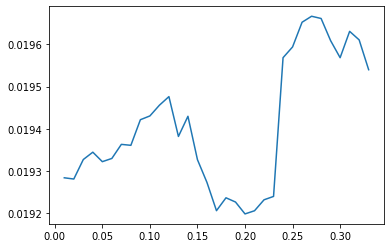

In [210]:
plt.plot(X1,Y1, label='Train Line')


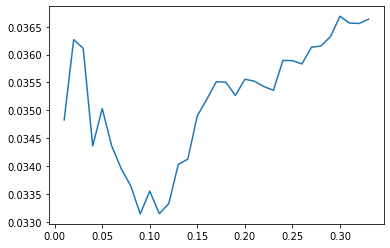

In [211]:
Y2=ytst
plt.plot(X1,Y2)

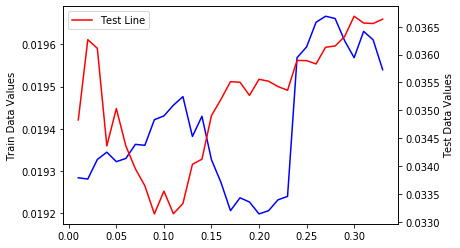

In [212]:
fig= plt.figure()
ax1= fig.add_subplot(111)
ax1.plot(X1, ytr,'b-', label='Train Line')
ax1.set_label('Train Line')
ax1.set_ylabel("Train Data Values")


ax2=ax1.twinx()
ax2.plot(X1, ytst,'r-', label='Test Line')
ax2.set_label('Test Line')
ax2.set_ylabel('Test Data Values')
plt.legend()
plt.show()